In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =3 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


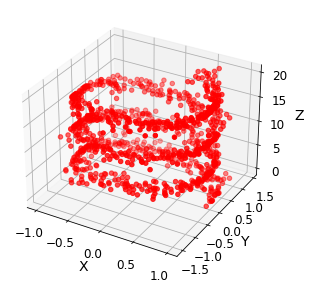

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                90        
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 740       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,301
Trainable params: 3,201
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


## Training

In [8]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 35.231041 - generator: 0.034043 - 2s
Epoch 2/50000
critic: 15.892089 - generator: 0.020281 - 0s
Epoch 3/50000
critic: 7.148408 - generator: 0.025447 - 0s
Epoch 4/50000
critic: 3.313845 - generator: 0.035715 - 0s
Epoch 5/50000
critic: 1.188648 - generator: 0.049913 - 0s
Epoch 6/50000
critic: 0.332004 - generator: 0.063169 - 0s
Epoch 7/50000
critic: 0.049263 - generator: 0.069418 - 0s
Epoch 8/50000
critic: 0.015232 - generator: 0.071418 - 0s
Epoch 9/50000
critic: 0.007221 - generator: 0.076191 - 0s
Epoch 10/50000
critic: 0.010043 - generator: 0.078721 - 0s
Epoch 11/50000
critic: 0.013710 - generator: 0.081763 - 0s
Epoch 12/50000
critic: 0.005066 - generator: 0.081570 - 0s
Epoch 13/50000
critic: 0.013683 - generator: 0.081810 - 0s
Epoch 14/50000
critic: 0.003492 - generator: 0.081541 - 0s
Epoch 15/50000
critic: 0.003327 - generator: 0.074390 - 0s
Epoch 16/50000
critic: 0.008075 - generator: 0.075991 - 0s
Epoch 17/50000
critic: 0.006300 - generator: 0.076570 - 0s
Epoc

critic: 0.017472 - generator: -0.010155 - 0s
Epoch 140/50000
critic: 0.021386 - generator: -0.009656 - 0s
Epoch 141/50000
critic: 0.017741 - generator: -0.008527 - 0s
Epoch 142/50000
critic: 0.015233 - generator: -0.005002 - 0s
Epoch 143/50000
critic: 0.016586 - generator: -0.004670 - 0s
Epoch 144/50000
critic: 0.019692 - generator: -0.007845 - 0s
Epoch 145/50000
critic: 0.011257 - generator: -0.009620 - 0s
Epoch 146/50000
critic: 0.023093 - generator: -0.009047 - 0s
Epoch 147/50000
critic: 0.015643 - generator: -0.008699 - 0s
Epoch 148/50000
critic: 0.015197 - generator: -0.005938 - 0s
Epoch 149/50000
critic: 0.019205 - generator: -0.005501 - 0s
Epoch 150/50000
critic: 0.009174 - generator: -0.005894 - 0s
Epoch 151/50000
critic: 0.023042 - generator: -0.005776 - 0s
Epoch 152/50000
critic: 0.016088 - generator: -0.008941 - 0s
Epoch 153/50000
critic: 0.016561 - generator: -0.010737 - 0s
Epoch 154/50000
critic: 0.013763 - generator: -0.015195 - 0s
Epoch 155/50000
critic: 0.014294 - gener

critic: 0.017728 - generator: -0.041737 - 0s
Epoch 276/50000
critic: 0.014977 - generator: -0.033323 - 0s
Epoch 277/50000
critic: 0.013038 - generator: -0.025211 - 0s
Epoch 278/50000
critic: 0.013737 - generator: -0.026264 - 0s
Epoch 279/50000
critic: 0.019205 - generator: -0.022912 - 0s
Epoch 280/50000
critic: 0.020953 - generator: -0.027573 - 0s
Epoch 281/50000
critic: 0.019498 - generator: -0.026186 - 0s
Epoch 282/50000
critic: 0.016931 - generator: -0.025523 - 0s
Epoch 283/50000
critic: 0.017187 - generator: -0.025532 - 0s
Epoch 284/50000
critic: 0.012687 - generator: -0.025201 - 0s
Epoch 285/50000
critic: 0.020986 - generator: -0.025093 - 0s
Epoch 286/50000
critic: 0.018416 - generator: -0.020738 - 0s
Epoch 287/50000
critic: 0.018463 - generator: -0.019841 - 0s
Epoch 288/50000
critic: 0.015730 - generator: -0.022881 - 0s
Epoch 289/50000
critic: 0.014975 - generator: -0.017707 - 0s
Epoch 290/50000
critic: 0.013280 - generator: -0.020791 - 0s
Epoch 291/50000
critic: 0.019701 - gener

critic: 0.015710 - generator: 0.004222 - 0s
Epoch 412/50000
critic: 0.014584 - generator: 0.004636 - 0s
Epoch 413/50000
critic: 0.019586 - generator: 0.003960 - 0s
Epoch 414/50000
critic: 0.016765 - generator: 0.005688 - 0s
Epoch 415/50000
critic: 0.018484 - generator: 0.005448 - 0s
Epoch 416/50000
critic: 0.010900 - generator: 0.008286 - 0s
Epoch 417/50000
critic: 0.020647 - generator: 0.009457 - 0s
Epoch 418/50000
critic: 0.015742 - generator: 0.009756 - 0s
Epoch 419/50000
critic: 0.014661 - generator: 0.008196 - 0s
Epoch 420/50000
critic: 0.010943 - generator: 0.007768 - 0s
Epoch 421/50000
critic: 0.014740 - generator: 0.006563 - 0s
Epoch 422/50000
critic: 0.020393 - generator: 0.001909 - 0s
Epoch 423/50000
critic: 0.016016 - generator: 0.001825 - 0s
Epoch 424/50000
critic: 0.014813 - generator: -0.001089 - 0s
Epoch 425/50000
critic: 0.015222 - generator: -0.004703 - 0s
Epoch 426/50000
critic: 0.014077 - generator: -0.003121 - 0s
Epoch 427/50000
critic: 0.012473 - generator: -0.0014

critic: 0.011301 - generator: 0.019921 - 0s
Epoch 550/50000
critic: 0.011796 - generator: 0.012752 - 0s
Epoch 551/50000
critic: 0.012052 - generator: 0.015875 - 0s
Epoch 552/50000
critic: 0.014061 - generator: 0.013622 - 0s
Epoch 553/50000
critic: 0.014005 - generator: 0.010941 - 0s
Epoch 554/50000
critic: 0.014944 - generator: 0.006482 - 0s
Epoch 555/50000
critic: 0.010840 - generator: 0.007559 - 0s
Epoch 556/50000
critic: 0.015199 - generator: 0.011053 - 0s
Epoch 557/50000
critic: 0.021989 - generator: 0.011311 - 0s
Epoch 558/50000
critic: 0.014060 - generator: 0.007281 - 0s
Epoch 559/50000
critic: 0.012357 - generator: 0.009484 - 0s
Epoch 560/50000
critic: 0.009676 - generator: 0.012928 - 0s
Epoch 561/50000
critic: 0.020488 - generator: 0.012607 - 0s
Epoch 562/50000
critic: 0.022313 - generator: 0.010707 - 0s
Epoch 563/50000
critic: 0.011513 - generator: 0.013878 - 0s
Epoch 564/50000
critic: 0.013276 - generator: 0.017676 - 0s
Epoch 565/50000
critic: 0.018236 - generator: 0.009220 -

critic: 0.013618 - generator: 0.021385 - 0s
Epoch 688/50000
critic: 0.015580 - generator: 0.023526 - 0s
Epoch 689/50000
critic: 0.015653 - generator: 0.026375 - 0s
Epoch 690/50000
critic: 0.012634 - generator: 0.022325 - 0s
Epoch 691/50000
critic: 0.011848 - generator: 0.027013 - 0s
Epoch 692/50000
critic: 0.020018 - generator: 0.023340 - 0s
Epoch 693/50000
critic: 0.009060 - generator: 0.024771 - 0s
Epoch 694/50000
critic: 0.015377 - generator: 0.024966 - 0s
Epoch 695/50000
critic: 0.018469 - generator: 0.024911 - 0s
Epoch 696/50000
critic: 0.017691 - generator: 0.023684 - 0s
Epoch 697/50000
critic: 0.013650 - generator: 0.024484 - 0s
Epoch 698/50000
critic: 0.008842 - generator: 0.025208 - 0s
Epoch 699/50000
critic: 0.010953 - generator: 0.021942 - 0s
Epoch 700/50000
critic: 0.021348 - generator: 0.025916 - 0s
Epoch 701/50000
critic: 0.017852 - generator: 0.027608 - 0s
Epoch 702/50000
critic: 0.015307 - generator: 0.027664 - 0s
Epoch 703/50000
critic: 0.017241 - generator: 0.029271 -

critic: 0.014806 - generator: 0.047028 - 0s
Epoch 826/50000
critic: 0.012848 - generator: 0.050131 - 0s
Epoch 827/50000
critic: 0.012812 - generator: 0.045919 - 0s
Epoch 828/50000
critic: 0.010643 - generator: 0.048694 - 0s
Epoch 829/50000
critic: 0.017967 - generator: 0.051709 - 0s
Epoch 830/50000
critic: 0.013894 - generator: 0.052008 - 0s
Epoch 831/50000
critic: 0.012393 - generator: 0.049209 - 0s
Epoch 832/50000
critic: 0.015044 - generator: 0.045113 - 0s
Epoch 833/50000
critic: 0.011336 - generator: 0.043569 - 0s
Epoch 834/50000
critic: 0.017282 - generator: 0.042727 - 0s
Epoch 835/50000
critic: 0.012526 - generator: 0.040382 - 0s
Epoch 836/50000
critic: 0.011578 - generator: 0.040378 - 0s
Epoch 837/50000
critic: 0.012206 - generator: 0.040832 - 0s
Epoch 838/50000
critic: 0.014002 - generator: 0.038502 - 0s
Epoch 839/50000
critic: 0.014818 - generator: 0.042386 - 0s
Epoch 840/50000
critic: 0.016789 - generator: 0.038632 - 0s
Epoch 841/50000
critic: 0.015689 - generator: 0.040840 -

critic: 0.015299 - generator: 0.058815 - 0s
Epoch 964/50000
critic: 0.010393 - generator: 0.054205 - 0s
Epoch 965/50000
critic: 0.011510 - generator: 0.058953 - 0s
Epoch 966/50000
critic: 0.014150 - generator: 0.055874 - 0s
Epoch 967/50000
critic: 0.016850 - generator: 0.051357 - 0s
Epoch 968/50000
critic: 0.011844 - generator: 0.052397 - 0s
Epoch 969/50000
critic: 0.019314 - generator: 0.048192 - 0s
Epoch 970/50000
critic: 0.016377 - generator: 0.052090 - 0s
Epoch 971/50000
critic: 0.013543 - generator: 0.048491 - 0s
Epoch 972/50000
critic: 0.015715 - generator: 0.044739 - 0s
Epoch 973/50000
critic: 0.010787 - generator: 0.042450 - 0s
Epoch 974/50000
critic: 0.013477 - generator: 0.047885 - 0s
Epoch 975/50000
critic: 0.011681 - generator: 0.043927 - 0s
Epoch 976/50000
critic: 0.014389 - generator: 0.044996 - 0s
Epoch 977/50000
critic: 0.017402 - generator: 0.045305 - 0s
Epoch 978/50000
critic: 0.008289 - generator: 0.045052 - 0s
Epoch 979/50000
critic: 0.012287 - generator: 0.046479 -

critic: 0.013441 - generator: 0.047870 - 0s
Epoch 1100/50000
critic: 0.015498 - generator: 0.046476 - 0s
Epoch 1101/50000
critic: 0.010363 - generator: 0.048119 - 0s
Epoch 1102/50000
critic: 0.013108 - generator: 0.043678 - 0s
Epoch 1103/50000
critic: 0.016007 - generator: 0.039859 - 0s
Epoch 1104/50000
critic: 0.014232 - generator: 0.038568 - 0s
Epoch 1105/50000
critic: 0.009686 - generator: 0.037327 - 0s
Epoch 1106/50000
critic: 0.014551 - generator: 0.038227 - 0s
Epoch 1107/50000
critic: 0.007741 - generator: 0.046087 - 0s
Epoch 1108/50000
critic: 0.006894 - generator: 0.045228 - 0s
Epoch 1109/50000
critic: 0.014221 - generator: 0.042980 - 0s
Epoch 1110/50000
critic: 0.009289 - generator: 0.042437 - 0s
Epoch 1111/50000
critic: 0.012112 - generator: 0.040680 - 0s
Epoch 1112/50000
critic: 0.012773 - generator: 0.038462 - 0s
Epoch 1113/50000
critic: 0.009940 - generator: 0.041934 - 0s
Epoch 1114/50000
critic: 0.015763 - generator: 0.042351 - 0s
Epoch 1115/50000
critic: 0.012877 - gener

critic: 0.020868 - generator: 0.053160 - 0s
Epoch 1236/50000
critic: 0.012364 - generator: 0.055121 - 0s
Epoch 1237/50000
critic: 0.014027 - generator: 0.056478 - 0s
Epoch 1238/50000
critic: 0.017336 - generator: 0.050309 - 0s
Epoch 1239/50000
critic: 0.010447 - generator: 0.054348 - 0s
Epoch 1240/50000
critic: 0.011593 - generator: 0.058472 - 0s
Epoch 1241/50000
critic: 0.013272 - generator: 0.061429 - 0s
Epoch 1242/50000
critic: 0.008920 - generator: 0.066261 - 0s
Epoch 1243/50000
critic: 0.016248 - generator: 0.059084 - 0s
Epoch 1244/50000
critic: 0.019362 - generator: 0.060188 - 0s
Epoch 1245/50000
critic: 0.012174 - generator: 0.059639 - 0s
Epoch 1246/50000
critic: 0.013779 - generator: 0.057870 - 0s
Epoch 1247/50000
critic: 0.015775 - generator: 0.055128 - 0s
Epoch 1248/50000
critic: 0.013641 - generator: 0.057710 - 0s
Epoch 1249/50000
critic: 0.013477 - generator: 0.058887 - 0s
Epoch 1250/50000
critic: 0.014677 - generator: 0.057488 - 0s
Epoch 1251/50000
critic: 0.015136 - gener

critic: 0.013117 - generator: 0.056040 - 0s
Epoch 1372/50000
critic: 0.006332 - generator: 0.052283 - 0s
Epoch 1373/50000
critic: 0.008090 - generator: 0.057037 - 0s
Epoch 1374/50000
critic: 0.010619 - generator: 0.049231 - 0s
Epoch 1375/50000
critic: 0.006210 - generator: 0.052443 - 0s
Epoch 1376/50000
critic: 0.005997 - generator: 0.055714 - 0s
Epoch 1377/50000
critic: 0.012728 - generator: 0.053845 - 0s
Epoch 1378/50000
critic: 0.017218 - generator: 0.053719 - 0s
Epoch 1379/50000
critic: 0.010342 - generator: 0.056304 - 0s
Epoch 1380/50000
critic: 0.006014 - generator: 0.056709 - 0s
Epoch 1381/50000
critic: 0.014846 - generator: 0.055095 - 0s
Epoch 1382/50000
critic: 0.012624 - generator: 0.052921 - 0s
Epoch 1383/50000
critic: 0.012873 - generator: 0.053627 - 0s
Epoch 1384/50000
critic: 0.015345 - generator: 0.048213 - 0s
Epoch 1385/50000
critic: 0.007046 - generator: 0.050612 - 0s
Epoch 1386/50000
critic: 0.008557 - generator: 0.049061 - 0s
Epoch 1387/50000
critic: 0.012623 - gener

critic: 0.011800 - generator: 0.036706 - 0s
Epoch 1508/50000
critic: 0.010612 - generator: 0.035242 - 0s
Epoch 1509/50000
critic: 0.010246 - generator: 0.039708 - 0s
Epoch 1510/50000
critic: 0.010846 - generator: 0.038604 - 0s
Epoch 1511/50000
critic: 0.010373 - generator: 0.040565 - 0s
Epoch 1512/50000
critic: 0.015277 - generator: 0.038744 - 0s
Epoch 1513/50000
critic: 0.010737 - generator: 0.040390 - 0s
Epoch 1514/50000
critic: 0.015281 - generator: 0.036533 - 0s
Epoch 1515/50000
critic: 0.012893 - generator: 0.036946 - 0s
Epoch 1516/50000
critic: 0.013007 - generator: 0.040185 - 0s
Epoch 1517/50000
critic: 0.013308 - generator: 0.040815 - 0s
Epoch 1518/50000
critic: 0.013824 - generator: 0.043481 - 0s
Epoch 1519/50000
critic: 0.015693 - generator: 0.039560 - 0s
Epoch 1520/50000
critic: 0.016642 - generator: 0.040676 - 0s
Epoch 1521/50000
critic: 0.011129 - generator: 0.038857 - 0s
Epoch 1522/50000
critic: 0.010050 - generator: 0.040338 - 0s
Epoch 1523/50000
critic: 0.013166 - gener

critic: 0.007235 - generator: 0.040955 - 0s
Epoch 1644/50000
critic: 0.010987 - generator: 0.039490 - 0s
Epoch 1645/50000
critic: 0.009387 - generator: 0.035752 - 0s
Epoch 1646/50000
critic: 0.014936 - generator: 0.036983 - 0s
Epoch 1647/50000
critic: 0.009492 - generator: 0.038095 - 0s
Epoch 1648/50000
critic: 0.009125 - generator: 0.033095 - 0s
Epoch 1649/50000
critic: 0.013681 - generator: 0.035015 - 0s
Epoch 1650/50000
critic: 0.012635 - generator: 0.034146 - 0s
Epoch 1651/50000
critic: 0.009391 - generator: 0.031880 - 0s
Epoch 1652/50000
critic: 0.011039 - generator: 0.036141 - 0s
Epoch 1653/50000
critic: 0.011677 - generator: 0.031896 - 0s
Epoch 1654/50000
critic: 0.008756 - generator: 0.035427 - 0s
Epoch 1655/50000
critic: 0.012192 - generator: 0.035107 - 0s
Epoch 1656/50000
critic: 0.010247 - generator: 0.031320 - 0s
Epoch 1657/50000
critic: 0.005159 - generator: 0.027858 - 0s
Epoch 1658/50000
critic: 0.012306 - generator: 0.021869 - 0s
Epoch 1659/50000
critic: 0.008427 - gener

critic: 0.013012 - generator: 0.045472 - 0s
Epoch 1780/50000
critic: 0.011141 - generator: 0.047019 - 0s
Epoch 1781/50000
critic: 0.009745 - generator: 0.048373 - 0s
Epoch 1782/50000
critic: 0.004483 - generator: 0.043745 - 0s
Epoch 1783/50000
critic: 0.008637 - generator: 0.050433 - 0s
Epoch 1784/50000
critic: 0.013600 - generator: 0.051157 - 0s
Epoch 1785/50000
critic: 0.009408 - generator: 0.050303 - 0s
Epoch 1786/50000
critic: 0.016983 - generator: 0.049506 - 0s
Epoch 1787/50000
critic: 0.010700 - generator: 0.050751 - 0s
Epoch 1788/50000
critic: 0.012934 - generator: 0.050344 - 0s
Epoch 1789/50000
critic: 0.010248 - generator: 0.043551 - 0s
Epoch 1790/50000
critic: 0.006372 - generator: 0.046515 - 0s
Epoch 1791/50000
critic: 0.009235 - generator: 0.044526 - 0s
Epoch 1792/50000
critic: 0.007177 - generator: 0.044896 - 0s
Epoch 1793/50000
critic: 0.012668 - generator: 0.044494 - 0s
Epoch 1794/50000
critic: 0.012917 - generator: 0.040019 - 0s
Epoch 1795/50000
critic: 0.011710 - gener

critic: 0.011268 - generator: 0.041233 - 0s
Epoch 1916/50000
critic: 0.013038 - generator: 0.050577 - 0s
Epoch 1917/50000
critic: 0.012366 - generator: 0.051353 - 0s
Epoch 1918/50000
critic: 0.013791 - generator: 0.053058 - 0s
Epoch 1919/50000
critic: 0.006030 - generator: 0.055132 - 0s
Epoch 1920/50000
critic: 0.012905 - generator: 0.055161 - 0s
Epoch 1921/50000
critic: 0.009100 - generator: 0.051985 - 0s
Epoch 1922/50000
critic: 0.010888 - generator: 0.053826 - 0s
Epoch 1923/50000
critic: 0.004079 - generator: 0.052579 - 0s
Epoch 1924/50000
critic: 0.008101 - generator: 0.049411 - 0s
Epoch 1925/50000
critic: 0.013096 - generator: 0.051945 - 0s
Epoch 1926/50000
critic: 0.014974 - generator: 0.049116 - 0s
Epoch 1927/50000
critic: 0.014312 - generator: 0.050422 - 0s
Epoch 1928/50000
critic: 0.018968 - generator: 0.051052 - 0s
Epoch 1929/50000
critic: 0.010134 - generator: 0.047471 - 0s
Epoch 1930/50000
critic: 0.009351 - generator: 0.048991 - 0s
Epoch 1931/50000
critic: 0.007377 - gener

critic: 0.016189 - generator: 0.052252 - 0s
Epoch 2052/50000
critic: 0.011745 - generator: 0.050735 - 0s
Epoch 2053/50000
critic: 0.013812 - generator: 0.052139 - 0s
Epoch 2054/50000
critic: 0.008701 - generator: 0.057086 - 0s
Epoch 2055/50000
critic: 0.009181 - generator: 0.059005 - 0s
Epoch 2056/50000
critic: 0.010832 - generator: 0.059843 - 0s
Epoch 2057/50000
critic: 0.006642 - generator: 0.060334 - 0s
Epoch 2058/50000
critic: 0.008341 - generator: 0.060250 - 0s
Epoch 2059/50000
critic: 0.010957 - generator: 0.064485 - 0s
Epoch 2060/50000
critic: 0.014097 - generator: 0.061277 - 0s
Epoch 2061/50000
critic: 0.010151 - generator: 0.062041 - 0s
Epoch 2062/50000
critic: 0.007142 - generator: 0.059642 - 0s
Epoch 2063/50000
critic: 0.008601 - generator: 0.059871 - 0s
Epoch 2064/50000
critic: 0.011417 - generator: 0.056999 - 0s
Epoch 2065/50000
critic: 0.011887 - generator: 0.059933 - 0s
Epoch 2066/50000
critic: 0.010919 - generator: 0.064482 - 0s
Epoch 2067/50000
critic: 0.004751 - gener

critic: 0.009860 - generator: 0.056903 - 0s
Epoch 2188/50000
critic: 0.011483 - generator: 0.054481 - 0s
Epoch 2189/50000
critic: 0.005957 - generator: 0.056426 - 0s
Epoch 2190/50000
critic: 0.009108 - generator: 0.053373 - 0s
Epoch 2191/50000
critic: 0.010372 - generator: 0.061091 - 0s
Epoch 2192/50000
critic: 0.011023 - generator: 0.054632 - 0s
Epoch 2193/50000
critic: 0.012490 - generator: 0.060579 - 0s
Epoch 2194/50000
critic: 0.011221 - generator: 0.058748 - 0s
Epoch 2195/50000
critic: 0.008927 - generator: 0.061062 - 0s
Epoch 2196/50000
critic: 0.011068 - generator: 0.058341 - 0s
Epoch 2197/50000
critic: 0.010605 - generator: 0.063024 - 0s
Epoch 2198/50000
critic: 0.009728 - generator: 0.062811 - 0s
Epoch 2199/50000
critic: 0.009972 - generator: 0.066213 - 0s
Epoch 2200/50000
critic: 0.010573 - generator: 0.064863 - 0s
Epoch 2201/50000
critic: 0.012655 - generator: 0.064260 - 0s
Epoch 2202/50000
critic: 0.016621 - generator: 0.064489 - 0s
Epoch 2203/50000
critic: 0.013458 - gener

critic: 0.011197 - generator: 0.042550 - 0s
Epoch 2324/50000
critic: 0.012196 - generator: 0.048470 - 0s
Epoch 2325/50000
critic: 0.009782 - generator: 0.045250 - 0s
Epoch 2326/50000
critic: 0.006152 - generator: 0.045611 - 0s
Epoch 2327/50000
critic: 0.009374 - generator: 0.048441 - 0s
Epoch 2328/50000
critic: 0.016376 - generator: 0.052344 - 0s
Epoch 2329/50000
critic: 0.008768 - generator: 0.051475 - 0s
Epoch 2330/50000
critic: 0.011915 - generator: 0.049445 - 0s
Epoch 2331/50000
critic: 0.010320 - generator: 0.049452 - 0s
Epoch 2332/50000
critic: 0.006173 - generator: 0.047943 - 0s
Epoch 2333/50000
critic: 0.012293 - generator: 0.042592 - 0s
Epoch 2334/50000
critic: 0.009413 - generator: 0.048346 - 0s
Epoch 2335/50000
critic: 0.010235 - generator: 0.045371 - 0s
Epoch 2336/50000
critic: 0.009461 - generator: 0.042511 - 0s
Epoch 2337/50000
critic: 0.007696 - generator: 0.051537 - 0s
Epoch 2338/50000
critic: 0.010825 - generator: 0.047545 - 0s
Epoch 2339/50000
critic: 0.005226 - gener

critic: 0.007323 - generator: 0.038570 - 0s
Epoch 2460/50000
critic: 0.010528 - generator: 0.039801 - 0s
Epoch 2461/50000
critic: 0.012806 - generator: 0.040964 - 0s
Epoch 2462/50000
critic: 0.011561 - generator: 0.042604 - 0s
Epoch 2463/50000
critic: 0.006773 - generator: 0.040707 - 0s
Epoch 2464/50000
critic: 0.012386 - generator: 0.046281 - 0s
Epoch 2465/50000
critic: 0.009366 - generator: 0.043489 - 0s
Epoch 2466/50000
critic: 0.005261 - generator: 0.047822 - 0s
Epoch 2467/50000
critic: 0.006555 - generator: 0.047799 - 0s
Epoch 2468/50000
critic: 0.007259 - generator: 0.044370 - 0s
Epoch 2469/50000
critic: 0.006890 - generator: 0.049411 - 0s
Epoch 2470/50000
critic: 0.009699 - generator: 0.048205 - 0s
Epoch 2471/50000
critic: 0.014204 - generator: 0.042905 - 0s
Epoch 2472/50000
critic: 0.011946 - generator: 0.042715 - 0s
Epoch 2473/50000
critic: 0.008802 - generator: 0.038509 - 0s
Epoch 2474/50000
critic: 0.008777 - generator: 0.043140 - 0s
Epoch 2475/50000
critic: 0.004487 - gener

critic: 0.012848 - generator: 0.061013 - 0s
Epoch 2596/50000
critic: 0.004748 - generator: 0.058366 - 0s
Epoch 2597/50000
critic: 0.007983 - generator: 0.064962 - 0s
Epoch 2598/50000
critic: 0.007530 - generator: 0.070243 - 0s
Epoch 2599/50000
critic: 0.012911 - generator: 0.072839 - 0s
Epoch 2600/50000
critic: 0.007279 - generator: 0.070533 - 0s
Epoch 2601/50000
critic: 0.009799 - generator: 0.068323 - 0s
Epoch 2602/50000
critic: 0.005863 - generator: 0.068402 - 0s
Epoch 2603/50000
critic: 0.005486 - generator: 0.066308 - 0s
Epoch 2604/50000
critic: 0.005329 - generator: 0.064338 - 0s
Epoch 2605/50000
critic: 0.010680 - generator: 0.060403 - 0s
Epoch 2606/50000
critic: 0.009075 - generator: 0.062106 - 0s
Epoch 2607/50000
critic: 0.009276 - generator: 0.054917 - 0s
Epoch 2608/50000
critic: 0.010606 - generator: 0.058484 - 0s
Epoch 2609/50000
critic: 0.013544 - generator: 0.057640 - 0s
Epoch 2610/50000
critic: 0.010463 - generator: 0.058400 - 0s
Epoch 2611/50000
critic: 0.009559 - gener

critic: 0.006858 - generator: 0.054321 - 0s
Epoch 2732/50000
critic: 0.008671 - generator: 0.052715 - 0s
Epoch 2733/50000
critic: 0.004202 - generator: 0.049912 - 0s
Epoch 2734/50000
critic: 0.005786 - generator: 0.049119 - 0s
Epoch 2735/50000
critic: 0.005530 - generator: 0.052455 - 0s
Epoch 2736/50000
critic: 0.008481 - generator: 0.052514 - 0s
Epoch 2737/50000
critic: 0.012811 - generator: 0.053842 - 0s
Epoch 2738/50000
critic: 0.008984 - generator: 0.054256 - 0s
Epoch 2739/50000
critic: 0.010223 - generator: 0.051286 - 0s
Epoch 2740/50000
critic: 0.008715 - generator: 0.051055 - 0s
Epoch 2741/50000
critic: 0.015968 - generator: 0.053540 - 0s
Epoch 2742/50000
critic: 0.002408 - generator: 0.043814 - 0s
Epoch 2743/50000
critic: 0.008063 - generator: 0.056134 - 0s
Epoch 2744/50000
critic: 0.008875 - generator: 0.056479 - 0s
Epoch 2745/50000
critic: 0.006906 - generator: 0.059906 - 0s
Epoch 2746/50000
critic: 0.009028 - generator: 0.054649 - 0s
Epoch 2747/50000
critic: 0.002694 - gener

critic: 0.013791 - generator: 0.060163 - 0s
Epoch 2867/50000
critic: 0.006786 - generator: 0.054149 - 0s
Epoch 2868/50000
critic: 0.002566 - generator: 0.059433 - 0s
Epoch 2869/50000
critic: 0.008502 - generator: 0.055937 - 0s
Epoch 2870/50000
critic: 0.006879 - generator: 0.055225 - 0s
Epoch 2871/50000
critic: 0.009730 - generator: 0.057879 - 0s
Epoch 2872/50000
critic: 0.009988 - generator: 0.064666 - 0s
Epoch 2873/50000
critic: 0.013998 - generator: 0.054320 - 0s
Epoch 2874/50000
critic: 0.013886 - generator: 0.054852 - 0s
Epoch 2875/50000
critic: 0.011299 - generator: 0.054777 - 0s
Epoch 2876/50000
critic: 0.008093 - generator: 0.056538 - 0s
Epoch 2877/50000
critic: 0.015285 - generator: 0.053488 - 0s
Epoch 2878/50000
critic: 0.004161 - generator: 0.057617 - 0s
Epoch 2879/50000
critic: 0.009534 - generator: 0.057577 - 0s
Epoch 2880/50000
critic: 0.008576 - generator: 0.050409 - 0s
Epoch 2881/50000
critic: 0.008027 - generator: 0.051382 - 0s
Epoch 2882/50000
critic: 0.006469 - gener

critic: 0.005733 - generator: 0.058365 - 0s
Epoch 3002/50000
critic: 0.011951 - generator: 0.060963 - 0s
Epoch 3003/50000
critic: 0.009372 - generator: 0.057959 - 0s
Epoch 3004/50000
critic: 0.007776 - generator: 0.058915 - 0s
Epoch 3005/50000
critic: 0.005559 - generator: 0.061250 - 0s
Epoch 3006/50000
critic: 0.011890 - generator: 0.066031 - 0s
Epoch 3007/50000
critic: 0.006888 - generator: 0.066315 - 0s
Epoch 3008/50000
critic: 0.013379 - generator: 0.058950 - 0s
Epoch 3009/50000
critic: 0.008595 - generator: 0.059744 - 0s
Epoch 3010/50000
critic: 0.009339 - generator: 0.065013 - 0s
Epoch 3011/50000
critic: 0.008375 - generator: 0.062228 - 0s
Epoch 3012/50000
critic: 0.006689 - generator: 0.060020 - 0s
Epoch 3013/50000
critic: 0.005669 - generator: 0.061836 - 0s
Epoch 3014/50000
critic: 0.009974 - generator: 0.058874 - 0s
Epoch 3015/50000
critic: 0.012531 - generator: 0.057120 - 0s
Epoch 3016/50000
critic: 0.010784 - generator: 0.057333 - 0s
Epoch 3017/50000
critic: 0.007828 - gener

critic: 0.007763 - generator: 0.062340 - 0s
Epoch 3138/50000
critic: 0.004624 - generator: 0.053495 - 0s
Epoch 3139/50000
critic: 0.010400 - generator: 0.055820 - 0s
Epoch 3140/50000
critic: 0.012159 - generator: 0.057525 - 0s
Epoch 3141/50000
critic: 0.008640 - generator: 0.054687 - 0s
Epoch 3142/50000
critic: 0.002497 - generator: 0.053091 - 0s
Epoch 3143/50000
critic: 0.010253 - generator: 0.057064 - 0s
Epoch 3144/50000
critic: 0.006600 - generator: 0.058173 - 0s
Epoch 3145/50000
critic: 0.009523 - generator: 0.064972 - 0s
Epoch 3146/50000
critic: 0.009179 - generator: 0.065883 - 0s
Epoch 3147/50000
critic: 0.011543 - generator: 0.057583 - 0s
Epoch 3148/50000
critic: 0.009084 - generator: 0.058440 - 0s
Epoch 3149/50000
critic: 0.005381 - generator: 0.060142 - 0s
Epoch 3150/50000
critic: 0.010626 - generator: 0.060844 - 0s
Epoch 3151/50000
critic: 0.010396 - generator: 0.061968 - 0s
Epoch 3152/50000
critic: 0.004386 - generator: 0.061918 - 0s
Epoch 3153/50000
critic: 0.008926 - gener

critic: 0.007177 - generator: 0.054371 - 0s
Epoch 3274/50000
critic: 0.006349 - generator: 0.054139 - 0s
Epoch 3275/50000
critic: 0.007389 - generator: 0.060373 - 0s
Epoch 3276/50000
critic: 0.014523 - generator: 0.058130 - 0s
Epoch 3277/50000
critic: 0.008544 - generator: 0.055812 - 0s
Epoch 3278/50000
critic: 0.008381 - generator: 0.053126 - 0s
Epoch 3279/50000
critic: 0.009014 - generator: 0.054350 - 0s
Epoch 3280/50000
critic: 0.008799 - generator: 0.050249 - 0s
Epoch 3281/50000
critic: 0.007149 - generator: 0.051884 - 0s
Epoch 3282/50000
critic: 0.005308 - generator: 0.048921 - 0s
Epoch 3283/50000
critic: 0.010077 - generator: 0.057778 - 0s
Epoch 3284/50000
critic: 0.006742 - generator: 0.055726 - 0s
Epoch 3285/50000
critic: 0.009759 - generator: 0.057912 - 0s
Epoch 3286/50000
critic: 0.007471 - generator: 0.058285 - 0s
Epoch 3287/50000
critic: 0.005968 - generator: 0.055507 - 0s
Epoch 3288/50000
critic: 0.008968 - generator: 0.058831 - 0s
Epoch 3289/50000
critic: 0.006229 - gener

critic: 0.008218 - generator: 0.058297 - 0s
Epoch 3410/50000
critic: 0.012872 - generator: 0.059245 - 0s
Epoch 3411/50000
critic: 0.004803 - generator: 0.056786 - 0s
Epoch 3412/50000
critic: 0.007972 - generator: 0.055364 - 0s
Epoch 3413/50000
critic: 0.009325 - generator: 0.059744 - 0s
Epoch 3414/50000
critic: 0.007165 - generator: 0.055359 - 0s
Epoch 3415/50000
critic: 0.007701 - generator: 0.058621 - 0s
Epoch 3416/50000
critic: 0.007760 - generator: 0.054098 - 0s
Epoch 3417/50000
critic: 0.012305 - generator: 0.051419 - 0s
Epoch 3418/50000
critic: 0.007471 - generator: 0.056835 - 0s
Epoch 3419/50000
critic: 0.006282 - generator: 0.056610 - 0s
Epoch 3420/50000
critic: 0.008755 - generator: 0.058118 - 0s
Epoch 3421/50000
critic: 0.007868 - generator: 0.053319 - 0s
Epoch 3422/50000
critic: 0.010865 - generator: 0.053068 - 0s
Epoch 3423/50000
critic: 0.007116 - generator: 0.051251 - 0s
Epoch 3424/50000
critic: 0.014588 - generator: 0.052719 - 0s
Epoch 3425/50000
critic: 0.006096 - gener

critic: 0.005217 - generator: 0.066215 - 0s
Epoch 3546/50000
critic: 0.010078 - generator: 0.066624 - 0s
Epoch 3547/50000
critic: 0.005419 - generator: 0.065014 - 0s
Epoch 3548/50000
critic: 0.007652 - generator: 0.065973 - 0s
Epoch 3549/50000
critic: 0.009977 - generator: 0.064195 - 0s
Epoch 3550/50000
critic: 0.004423 - generator: 0.073057 - 0s
Epoch 3551/50000
critic: 0.009043 - generator: 0.074028 - 0s
Epoch 3552/50000
critic: 0.004777 - generator: 0.076771 - 0s
Epoch 3553/50000
critic: 0.007884 - generator: 0.076838 - 0s
Epoch 3554/50000
critic: 0.003718 - generator: 0.071741 - 0s
Epoch 3555/50000
critic: 0.008577 - generator: 0.067536 - 0s
Epoch 3556/50000
critic: 0.007023 - generator: 0.068316 - 0s
Epoch 3557/50000
critic: 0.008178 - generator: 0.072063 - 0s
Epoch 3558/50000
critic: 0.010094 - generator: 0.070014 - 0s
Epoch 3559/50000
critic: 0.010233 - generator: 0.075210 - 0s
Epoch 3560/50000
critic: 0.008535 - generator: 0.067910 - 0s
Epoch 3561/50000
critic: 0.009915 - gener

critic: 0.003500 - generator: 0.060481 - 0s
Epoch 3682/50000
critic: 0.006205 - generator: 0.061923 - 0s
Epoch 3683/50000
critic: 0.006208 - generator: 0.063742 - 0s
Epoch 3684/50000
critic: 0.007677 - generator: 0.060737 - 0s
Epoch 3685/50000
critic: 0.007470 - generator: 0.059085 - 0s
Epoch 3686/50000
critic: 0.007467 - generator: 0.062885 - 0s
Epoch 3687/50000
critic: 0.003727 - generator: 0.061569 - 0s
Epoch 3688/50000
critic: 0.009087 - generator: 0.062511 - 0s
Epoch 3689/50000
critic: 0.007235 - generator: 0.067009 - 0s
Epoch 3690/50000
critic: 0.008949 - generator: 0.060411 - 0s
Epoch 3691/50000
critic: 0.008345 - generator: 0.071390 - 0s
Epoch 3692/50000
critic: 0.005763 - generator: 0.067512 - 0s
Epoch 3693/50000
critic: 0.009338 - generator: 0.060400 - 0s
Epoch 3694/50000
critic: 0.012005 - generator: 0.063616 - 0s
Epoch 3695/50000
critic: 0.002821 - generator: 0.064794 - 0s
Epoch 3696/50000
critic: 0.007433 - generator: 0.066450 - 0s
Epoch 3697/50000
critic: 0.007677 - gener

critic: 0.011782 - generator: 0.041173 - 0s
Epoch 3818/50000
critic: 0.006369 - generator: 0.044013 - 0s
Epoch 3819/50000
critic: 0.004637 - generator: 0.045386 - 0s
Epoch 3820/50000
critic: 0.004816 - generator: 0.049674 - 0s
Epoch 3821/50000
critic: 0.005616 - generator: 0.050213 - 0s
Epoch 3822/50000
critic: 0.004414 - generator: 0.045864 - 0s
Epoch 3823/50000
critic: 0.006882 - generator: 0.046975 - 0s
Epoch 3824/50000
critic: 0.006515 - generator: 0.044045 - 0s
Epoch 3825/50000
critic: 0.007700 - generator: 0.038325 - 0s
Epoch 3826/50000
critic: 0.011359 - generator: 0.045580 - 0s
Epoch 3827/50000
critic: 0.009463 - generator: 0.042643 - 0s
Epoch 3828/50000
critic: 0.008857 - generator: 0.040338 - 0s
Epoch 3829/50000
critic: 0.008838 - generator: 0.046434 - 0s
Epoch 3830/50000
critic: 0.011256 - generator: 0.042856 - 0s
Epoch 3831/50000
critic: 0.006211 - generator: 0.035435 - 0s
Epoch 3832/50000
critic: 0.006076 - generator: 0.044905 - 0s
Epoch 3833/50000
critic: 0.008770 - gener

critic: 0.003399 - generator: 0.042897 - 0s
Epoch 3954/50000
critic: 0.008645 - generator: 0.046200 - 0s
Epoch 3955/50000
critic: 0.008020 - generator: 0.047138 - 0s
Epoch 3956/50000
critic: 0.008394 - generator: 0.042923 - 0s
Epoch 3957/50000
critic: 0.008009 - generator: 0.042178 - 0s
Epoch 3958/50000
critic: 0.009043 - generator: 0.043478 - 0s
Epoch 3959/50000
critic: 0.008438 - generator: 0.045682 - 0s
Epoch 3960/50000
critic: 0.002094 - generator: 0.049362 - 0s
Epoch 3961/50000
critic: 0.004251 - generator: 0.048166 - 0s
Epoch 3962/50000
critic: 0.007765 - generator: 0.047712 - 0s
Epoch 3963/50000
critic: 0.007583 - generator: 0.047281 - 0s
Epoch 3964/50000
critic: 0.006107 - generator: 0.043841 - 0s
Epoch 3965/50000
critic: 0.004821 - generator: 0.051546 - 0s
Epoch 3966/50000
critic: 0.008401 - generator: 0.045802 - 0s
Epoch 3967/50000
critic: 0.008045 - generator: 0.044703 - 0s
Epoch 3968/50000
critic: 0.006015 - generator: 0.045095 - 0s
Epoch 3969/50000
critic: 0.004930 - gener

critic: 0.012209 - generator: 0.062547 - 0s
Epoch 4090/50000
critic: 0.008104 - generator: 0.058795 - 0s
Epoch 4091/50000
critic: 0.012247 - generator: 0.061615 - 0s
Epoch 4092/50000
critic: 0.009359 - generator: 0.054219 - 0s
Epoch 4093/50000
critic: 0.006257 - generator: 0.060542 - 0s
Epoch 4094/50000
critic: 0.007455 - generator: 0.056259 - 0s
Epoch 4095/50000
critic: 0.005514 - generator: 0.063501 - 0s
Epoch 4096/50000
critic: 0.003950 - generator: 0.063107 - 0s
Epoch 4097/50000
critic: 0.011884 - generator: 0.057753 - 0s
Epoch 4098/50000
critic: 0.006410 - generator: 0.061459 - 0s
Epoch 4099/50000
critic: 0.003083 - generator: 0.064293 - 0s
Epoch 4100/50000
critic: 0.004921 - generator: 0.056840 - 0s
Epoch 4101/50000
critic: 0.003833 - generator: 0.055289 - 0s
Epoch 4102/50000
critic: 0.009519 - generator: 0.056215 - 0s
Epoch 4103/50000
critic: 0.007381 - generator: 0.061012 - 0s
Epoch 4104/50000
critic: 0.005551 - generator: 0.062431 - 0s
Epoch 4105/50000
critic: 0.008382 - gener

critic: 0.006371 - generator: 0.070359 - 0s
Epoch 4226/50000
critic: 0.010285 - generator: 0.067752 - 0s
Epoch 4227/50000
critic: 0.003417 - generator: 0.071031 - 0s
Epoch 4228/50000
critic: 0.006593 - generator: 0.071538 - 0s
Epoch 4229/50000
critic: 0.003689 - generator: 0.071052 - 0s
Epoch 4230/50000
critic: 0.008505 - generator: 0.068411 - 0s
Epoch 4231/50000
critic: 0.006571 - generator: 0.066538 - 0s
Epoch 4232/50000
critic: 0.003081 - generator: 0.072845 - 0s
Epoch 4233/50000
critic: 0.007279 - generator: 0.071187 - 0s
Epoch 4234/50000
critic: 0.007484 - generator: 0.072793 - 0s
Epoch 4235/50000
critic: 0.009957 - generator: 0.072868 - 0s
Epoch 4236/50000
critic: 0.004997 - generator: 0.072844 - 0s
Epoch 4237/50000
critic: 0.008733 - generator: 0.071149 - 0s
Epoch 4238/50000
critic: 0.004575 - generator: 0.067902 - 0s
Epoch 4239/50000
critic: 0.010739 - generator: 0.071475 - 0s
Epoch 4240/50000
critic: 0.008596 - generator: 0.074137 - 0s
Epoch 4241/50000
critic: 0.001081 - gener

critic: 0.004180 - generator: 0.078808 - 0s
Epoch 4362/50000
critic: 0.004540 - generator: 0.068457 - 0s
Epoch 4363/50000
critic: 0.005578 - generator: 0.072972 - 0s
Epoch 4364/50000
critic: 0.006303 - generator: 0.068312 - 0s
Epoch 4365/50000
critic: 0.004750 - generator: 0.070455 - 0s
Epoch 4366/50000
critic: 0.008298 - generator: 0.073035 - 0s
Epoch 4367/50000
critic: 0.008294 - generator: 0.072042 - 0s
Epoch 4368/50000
critic: 0.007660 - generator: 0.069391 - 0s
Epoch 4369/50000
critic: 0.010159 - generator: 0.075080 - 0s
Epoch 4370/50000
critic: 0.004778 - generator: 0.072315 - 0s
Epoch 4371/50000
critic: 0.006297 - generator: 0.071742 - 0s
Epoch 4372/50000
critic: 0.003736 - generator: 0.082825 - 0s
Epoch 4373/50000
critic: 0.006515 - generator: 0.074827 - 0s
Epoch 4374/50000
critic: 0.003175 - generator: 0.076535 - 0s
Epoch 4375/50000
critic: 0.011368 - generator: 0.075208 - 0s
Epoch 4376/50000
critic: 0.005808 - generator: 0.080713 - 0s
Epoch 4377/50000
critic: 0.007089 - gener

critic: 0.003779 - generator: 0.081198 - 0s
Epoch 4498/50000
critic: 0.003098 - generator: 0.081564 - 0s
Epoch 4499/50000
critic: 0.008279 - generator: 0.082348 - 0s
Epoch 4500/50000
critic: 0.007473 - generator: 0.079071 - 0s
Epoch 4501/50000
critic: 0.005760 - generator: 0.080550 - 0s
Epoch 4502/50000
critic: 0.009149 - generator: 0.079297 - 0s
Epoch 4503/50000
critic: 0.003243 - generator: 0.080220 - 0s
Epoch 4504/50000
critic: 0.002393 - generator: 0.080491 - 0s
Epoch 4505/50000
critic: 0.006900 - generator: 0.079067 - 0s
Epoch 4506/50000
critic: 0.006977 - generator: 0.079578 - 0s
Epoch 4507/50000
critic: 0.004780 - generator: 0.083729 - 0s
Epoch 4508/50000
critic: 0.007587 - generator: 0.088101 - 0s
Epoch 4509/50000
critic: 0.007906 - generator: 0.087244 - 0s
Epoch 4510/50000
critic: 0.010745 - generator: 0.086120 - 0s
Epoch 4511/50000
critic: 0.004978 - generator: 0.084419 - 0s
Epoch 4512/50000
critic: 0.008329 - generator: 0.083610 - 0s
Epoch 4513/50000
critic: 0.004838 - gener

critic: 0.005444 - generator: 0.078793 - 0s
Epoch 4634/50000
critic: 0.007864 - generator: 0.080803 - 0s
Epoch 4635/50000
critic: 0.005997 - generator: 0.085490 - 0s
Epoch 4636/50000
critic: 0.003299 - generator: 0.083771 - 0s
Epoch 4637/50000
critic: 0.005370 - generator: 0.083309 - 0s
Epoch 4638/50000
critic: 0.003627 - generator: 0.087533 - 0s
Epoch 4639/50000
critic: 0.007118 - generator: 0.087330 - 0s
Epoch 4640/50000
critic: 0.008999 - generator: 0.093743 - 0s
Epoch 4641/50000
critic: 0.002887 - generator: 0.090085 - 0s
Epoch 4642/50000
critic: 0.005277 - generator: 0.093117 - 0s
Epoch 4643/50000
critic: 0.007083 - generator: 0.089817 - 0s
Epoch 4644/50000
critic: 0.003320 - generator: 0.088919 - 0s
Epoch 4645/50000
critic: 0.007090 - generator: 0.083626 - 0s
Epoch 4646/50000
critic: 0.010585 - generator: 0.089007 - 0s
Epoch 4647/50000
critic: 0.004728 - generator: 0.091311 - 0s
Epoch 4648/50000
critic: 0.008126 - generator: 0.092998 - 0s
Epoch 4649/50000
critic: 0.009427 - gener

critic: 0.010026 - generator: 0.073066 - 0s
Epoch 4770/50000
critic: 0.003952 - generator: 0.067543 - 0s
Epoch 4771/50000
critic: 0.003608 - generator: 0.072162 - 0s
Epoch 4772/50000
critic: 0.004168 - generator: 0.071146 - 0s
Epoch 4773/50000
critic: 0.007716 - generator: 0.073039 - 0s
Epoch 4774/50000
critic: 0.009741 - generator: 0.070319 - 0s
Epoch 4775/50000
critic: 0.006879 - generator: 0.069472 - 0s
Epoch 4776/50000
critic: 0.006919 - generator: 0.072135 - 0s
Epoch 4777/50000
critic: 0.010420 - generator: 0.073982 - 0s
Epoch 4778/50000
critic: 0.006005 - generator: 0.075403 - 0s
Epoch 4779/50000
critic: 0.006445 - generator: 0.074155 - 0s
Epoch 4780/50000
critic: 0.007269 - generator: 0.077172 - 0s
Epoch 4781/50000
critic: 0.005725 - generator: 0.071019 - 0s
Epoch 4782/50000
critic: 0.008261 - generator: 0.074925 - 0s
Epoch 4783/50000
critic: 0.005377 - generator: 0.075469 - 0s
Epoch 4784/50000
critic: 0.008976 - generator: 0.072126 - 0s
Epoch 4785/50000
critic: 0.005126 - gener

critic: 0.005417 - generator: 0.083132 - 0s
Epoch 4906/50000
critic: 0.010782 - generator: 0.079133 - 0s
Epoch 4907/50000
critic: 0.011805 - generator: 0.086739 - 0s
Epoch 4908/50000
critic: 0.010753 - generator: 0.081008 - 0s
Epoch 4909/50000
critic: 0.004546 - generator: 0.083575 - 0s
Epoch 4910/50000
critic: 0.004492 - generator: 0.083229 - 0s
Epoch 4911/50000
critic: 0.008973 - generator: 0.083786 - 0s
Epoch 4912/50000
critic: 0.006599 - generator: 0.078324 - 0s
Epoch 4913/50000
critic: 0.004797 - generator: 0.077129 - 0s
Epoch 4914/50000
critic: 0.005334 - generator: 0.075573 - 0s
Epoch 4915/50000
critic: 0.009540 - generator: 0.081639 - 0s
Epoch 4916/50000
critic: 0.005986 - generator: 0.075809 - 0s
Epoch 4917/50000
critic: 0.004611 - generator: 0.079599 - 0s
Epoch 4918/50000
critic: 0.007977 - generator: 0.078873 - 0s
Epoch 4919/50000
critic: 0.007326 - generator: 0.079232 - 0s
Epoch 4920/50000
critic: 0.005357 - generator: 0.082359 - 0s
Epoch 4921/50000
critic: 0.004789 - gener

critic: 0.004353 - generator: 0.090242 - 0s
Epoch 5042/50000
critic: 0.006682 - generator: 0.085092 - 0s
Epoch 5043/50000
critic: 0.007036 - generator: 0.087993 - 0s
Epoch 5044/50000
critic: 0.007022 - generator: 0.081639 - 0s
Epoch 5045/50000
critic: 0.000995 - generator: 0.085522 - 0s
Epoch 5046/50000
critic: 0.002980 - generator: 0.083466 - 0s
Epoch 5047/50000
critic: 0.003872 - generator: 0.083091 - 0s
Epoch 5048/50000
critic: 0.007737 - generator: 0.086705 - 0s
Epoch 5049/50000
critic: 0.007442 - generator: 0.083826 - 0s
Epoch 5050/50000
critic: 0.006763 - generator: 0.083860 - 0s
Epoch 5051/50000
critic: 0.009591 - generator: 0.084411 - 0s
Epoch 5052/50000
critic: 0.001592 - generator: 0.085680 - 0s
Epoch 5053/50000
critic: 0.004358 - generator: 0.080178 - 0s
Epoch 5054/50000
critic: 0.001741 - generator: 0.084485 - 0s
Epoch 5055/50000
critic: 0.006525 - generator: 0.089084 - 0s
Epoch 5056/50000
critic: 0.000976 - generator: 0.087019 - 0s
Epoch 5057/50000
critic: 0.007399 - gener

critic: 0.007070 - generator: 0.107259 - 0s
Epoch 5178/50000
critic: 0.007913 - generator: 0.108158 - 0s
Epoch 5179/50000
critic: 0.009143 - generator: 0.104711 - 0s
Epoch 5180/50000
critic: 0.004493 - generator: 0.111174 - 0s
Epoch 5181/50000
critic: 0.000949 - generator: 0.108903 - 0s
Epoch 5182/50000
critic: 0.006967 - generator: 0.103532 - 0s
Epoch 5183/50000
critic: 0.004397 - generator: 0.105697 - 0s
Epoch 5184/50000
critic: 0.002316 - generator: 0.105194 - 0s
Epoch 5185/50000
critic: 0.007659 - generator: 0.100524 - 0s
Epoch 5186/50000
critic: 0.007058 - generator: 0.102526 - 0s
Epoch 5187/50000
critic: 0.008179 - generator: 0.112497 - 0s
Epoch 5188/50000
critic: 0.004074 - generator: 0.112764 - 0s
Epoch 5189/50000
critic: 0.011860 - generator: 0.105251 - 0s
Epoch 5190/50000
critic: 0.005394 - generator: 0.110991 - 0s
Epoch 5191/50000
critic: 0.003119 - generator: 0.109675 - 0s
Epoch 5192/50000
critic: 0.006060 - generator: 0.112272 - 0s
Epoch 5193/50000
critic: 0.004931 - gener

critic: 0.000537 - generator: 0.101427 - 0s
Epoch 5314/50000
critic: 0.008592 - generator: 0.103057 - 0s
Epoch 5315/50000
critic: 0.007905 - generator: 0.106381 - 0s
Epoch 5316/50000
critic: 0.009523 - generator: 0.106143 - 0s
Epoch 5317/50000
critic: 0.010610 - generator: 0.105630 - 0s
Epoch 5318/50000
critic: 0.005230 - generator: 0.103459 - 0s
Epoch 5319/50000
critic: 0.007632 - generator: 0.107446 - 0s
Epoch 5320/50000
critic: 0.005594 - generator: 0.113155 - 0s
Epoch 5321/50000
critic: 0.001136 - generator: 0.108770 - 0s
Epoch 5322/50000
critic: 0.008016 - generator: 0.106418 - 0s
Epoch 5323/50000
critic: 0.002758 - generator: 0.107447 - 0s
Epoch 5324/50000
critic: 0.003622 - generator: 0.111257 - 0s
Epoch 5325/50000
critic: 0.002917 - generator: 0.120108 - 0s
Epoch 5326/50000
critic: 0.008960 - generator: 0.117314 - 0s
Epoch 5327/50000
critic: 0.001253 - generator: 0.114308 - 0s
Epoch 5328/50000
critic: 0.006094 - generator: 0.119672 - 0s
Epoch 5329/50000
critic: 0.005147 - gener

critic: 0.004473 - generator: 0.113347 - 0s
Epoch 5450/50000
critic: 0.005536 - generator: 0.115753 - 0s
Epoch 5451/50000
critic: 0.005467 - generator: 0.114034 - 0s
Epoch 5452/50000
critic: 0.005326 - generator: 0.116187 - 0s
Epoch 5453/50000
critic: 0.009698 - generator: 0.125217 - 0s
Epoch 5454/50000
critic: 0.006630 - generator: 0.115996 - 0s
Epoch 5455/50000
critic: 0.005308 - generator: 0.116607 - 0s
Epoch 5456/50000
critic: 0.007180 - generator: 0.114501 - 0s
Epoch 5457/50000
critic: 0.005405 - generator: 0.114905 - 0s
Epoch 5458/50000
critic: 0.009018 - generator: 0.116502 - 0s
Epoch 5459/50000
critic: 0.001412 - generator: 0.114366 - 0s
Epoch 5460/50000
critic: 0.004547 - generator: 0.118224 - 0s
Epoch 5461/50000
critic: 0.005110 - generator: 0.122427 - 0s
Epoch 5462/50000
critic: 0.003549 - generator: 0.121285 - 0s
Epoch 5463/50000
critic: 0.007454 - generator: 0.121163 - 0s
Epoch 5464/50000
critic: 0.001674 - generator: 0.126020 - 0s
Epoch 5465/50000
critic: 0.002875 - gener

critic: 0.009377 - generator: 0.103468 - 0s
Epoch 5586/50000
critic: 0.010021 - generator: 0.109939 - 0s
Epoch 5587/50000
critic: 0.008963 - generator: 0.108767 - 0s
Epoch 5588/50000
critic: 0.005542 - generator: 0.106719 - 0s
Epoch 5589/50000
critic: 0.005867 - generator: 0.112930 - 0s
Epoch 5590/50000
critic: 0.002384 - generator: 0.111342 - 0s
Epoch 5591/50000
critic: 0.004071 - generator: 0.113418 - 0s
Epoch 5592/50000
critic: 0.008987 - generator: 0.120680 - 0s
Epoch 5593/50000
critic: 0.002816 - generator: 0.119034 - 0s
Epoch 5594/50000
critic: 0.008162 - generator: 0.115064 - 0s
Epoch 5595/50000
critic: 0.005522 - generator: 0.112511 - 0s
Epoch 5596/50000
critic: 0.011848 - generator: 0.116518 - 0s
Epoch 5597/50000
critic: 0.007280 - generator: 0.117943 - 0s
Epoch 5598/50000
critic: 0.004478 - generator: 0.115206 - 0s
Epoch 5599/50000
critic: 0.004262 - generator: 0.118404 - 0s
Epoch 5600/50000
critic: 0.008885 - generator: 0.114390 - 0s
Epoch 5601/50000
critic: 0.006787 - gener

critic: 0.006307 - generator: 0.109253 - 0s
Epoch 5722/50000
critic: 0.004681 - generator: 0.115180 - 0s
Epoch 5723/50000
critic: 0.006418 - generator: 0.110465 - 0s
Epoch 5724/50000
critic: 0.007300 - generator: 0.108853 - 0s
Epoch 5725/50000
critic: 0.006868 - generator: 0.114595 - 0s
Epoch 5726/50000
critic: 0.003896 - generator: 0.111326 - 0s
Epoch 5727/50000
critic: 0.006061 - generator: 0.114813 - 0s
Epoch 5728/50000
critic: 0.004695 - generator: 0.110538 - 0s
Epoch 5729/50000
critic: 0.004213 - generator: 0.108260 - 0s
Epoch 5730/50000
critic: 0.007256 - generator: 0.108595 - 0s
Epoch 5731/50000
critic: 0.005585 - generator: 0.112846 - 0s
Epoch 5732/50000
critic: 0.007335 - generator: 0.112887 - 0s
Epoch 5733/50000
critic: 0.006034 - generator: 0.113911 - 0s
Epoch 5734/50000
critic: 0.005470 - generator: 0.108268 - 0s
Epoch 5735/50000
critic: 0.007188 - generator: 0.110469 - 0s
Epoch 5736/50000
critic: 0.005740 - generator: 0.109139 - 0s
Epoch 5737/50000
critic: 0.000114 - gener

critic: 0.006063 - generator: 0.124575 - 0s
Epoch 5858/50000
critic: 0.007968 - generator: 0.124480 - 0s
Epoch 5859/50000
critic: 0.010098 - generator: 0.120878 - 0s
Epoch 5860/50000
critic: 0.010428 - generator: 0.121395 - 0s
Epoch 5861/50000
critic: 0.004572 - generator: 0.118736 - 0s
Epoch 5862/50000
critic: 0.002848 - generator: 0.117935 - 0s
Epoch 5863/50000
critic: 0.009991 - generator: 0.115236 - 0s
Epoch 5864/50000
critic: 0.008015 - generator: 0.117543 - 0s
Epoch 5865/50000
critic: 0.004646 - generator: 0.124702 - 0s
Epoch 5866/50000
critic: 0.002423 - generator: 0.128952 - 0s
Epoch 5867/50000
critic: 0.006165 - generator: 0.120247 - 0s
Epoch 5868/50000
critic: 0.003444 - generator: 0.121230 - 0s
Epoch 5869/50000
critic: 0.004565 - generator: 0.123392 - 0s
Epoch 5870/50000
critic: 0.006294 - generator: 0.123283 - 0s
Epoch 5871/50000
critic: 0.006888 - generator: 0.125177 - 0s
Epoch 5872/50000
critic: 0.007874 - generator: 0.122822 - 0s
Epoch 5873/50000
critic: 0.007849 - gener

critic: 0.004816 - generator: 0.120571 - 0s
Epoch 5994/50000
critic: 0.004038 - generator: 0.121078 - 0s
Epoch 5995/50000
critic: 0.000843 - generator: 0.120363 - 0s
Epoch 5996/50000
critic: 0.003283 - generator: 0.123749 - 0s
Epoch 5997/50000
critic: 0.008201 - generator: 0.124836 - 0s
Epoch 5998/50000
critic: 0.006443 - generator: 0.128315 - 0s
Epoch 5999/50000
critic: 0.005283 - generator: 0.126001 - 0s
Epoch 6000/50000
critic: 0.001189 - generator: 0.119307 - 0s
Epoch 6001/50000
critic: 0.008514 - generator: 0.124766 - 0s
Epoch 6002/50000
critic: 0.003496 - generator: 0.121301 - 0s
Epoch 6003/50000
critic: 0.008919 - generator: 0.123438 - 0s
Epoch 6004/50000
critic: 0.007900 - generator: 0.125240 - 0s
Epoch 6005/50000
critic: 0.006987 - generator: 0.122790 - 0s
Epoch 6006/50000
critic: 0.005155 - generator: 0.123058 - 0s
Epoch 6007/50000
critic: 0.008265 - generator: 0.128289 - 0s
Epoch 6008/50000
critic: 0.008808 - generator: 0.128991 - 0s
Epoch 6009/50000
critic: 0.006062 - gener

critic: 0.006946 - generator: 0.135362 - 0s
Epoch 6130/50000
critic: 0.005487 - generator: 0.137850 - 0s
Epoch 6131/50000
critic: 0.011541 - generator: 0.138301 - 0s
Epoch 6132/50000
critic: 0.009066 - generator: 0.141249 - 0s
Epoch 6133/50000
critic: 0.007561 - generator: 0.142292 - 0s
Epoch 6134/50000
critic: 0.004280 - generator: 0.139638 - 0s
Epoch 6135/50000
critic: 0.006864 - generator: 0.137890 - 0s
Epoch 6136/50000
critic: 0.005713 - generator: 0.142015 - 0s
Epoch 6137/50000
critic: 0.000160 - generator: 0.138532 - 0s
Epoch 6138/50000
critic: 0.004675 - generator: 0.137994 - 0s
Epoch 6139/50000
critic: 0.006136 - generator: 0.131467 - 0s
Epoch 6140/50000
critic: 0.005454 - generator: 0.135404 - 0s
Epoch 6141/50000
critic: 0.006958 - generator: 0.136737 - 0s
Epoch 6142/50000
critic: 0.008353 - generator: 0.134310 - 0s
Epoch 6143/50000
critic: 0.005301 - generator: 0.142354 - 0s
Epoch 6144/50000
critic: 0.002944 - generator: 0.135249 - 0s
Epoch 6145/50000
critic: 0.006615 - gener

critic: 0.001750 - generator: 0.135955 - 0s
Epoch 6266/50000
critic: 0.002703 - generator: 0.141316 - 0s
Epoch 6267/50000
critic: 0.001893 - generator: 0.138385 - 0s
Epoch 6268/50000
critic: 0.003812 - generator: 0.135908 - 0s
Epoch 6269/50000
critic: 0.007786 - generator: 0.137432 - 0s
Epoch 6270/50000
critic: 0.006968 - generator: 0.140185 - 0s
Epoch 6271/50000
critic: 0.004295 - generator: 0.134692 - 0s
Epoch 6272/50000
critic: 0.004281 - generator: 0.134017 - 0s
Epoch 6273/50000
critic: 0.003266 - generator: 0.141577 - 0s
Epoch 6274/50000
critic: 0.003341 - generator: 0.138925 - 0s
Epoch 6275/50000
critic: 0.000468 - generator: 0.133604 - 0s
Epoch 6276/50000
critic: 0.009737 - generator: 0.130353 - 0s
Epoch 6277/50000
critic: 0.002449 - generator: 0.132612 - 0s
Epoch 6278/50000
critic: 0.005587 - generator: 0.130293 - 0s
Epoch 6279/50000
critic: 0.008568 - generator: 0.139888 - 0s
Epoch 6280/50000
critic: 0.005444 - generator: 0.142529 - 0s
Epoch 6281/50000
critic: 0.007700 - gener

critic: 0.006122 - generator: 0.135461 - 0s
Epoch 6402/50000
critic: 0.008010 - generator: 0.134423 - 0s
Epoch 6403/50000
critic: 0.002188 - generator: 0.136198 - 0s
Epoch 6404/50000
critic: 0.006815 - generator: 0.134564 - 0s
Epoch 6405/50000
critic: 0.005777 - generator: 0.129747 - 0s
Epoch 6406/50000
critic: 0.004168 - generator: 0.135599 - 0s
Epoch 6407/50000
critic: 0.001679 - generator: 0.136913 - 0s
Epoch 6408/50000
critic: 0.005279 - generator: 0.132505 - 0s
Epoch 6409/50000
critic: 0.007480 - generator: 0.137715 - 0s
Epoch 6410/50000
critic: 0.008688 - generator: 0.136177 - 0s
Epoch 6411/50000
critic: 0.004671 - generator: 0.135891 - 0s
Epoch 6412/50000
critic: 0.005831 - generator: 0.136267 - 0s
Epoch 6413/50000
critic: 0.008622 - generator: 0.137260 - 0s
Epoch 6414/50000
critic: 0.005701 - generator: 0.132065 - 0s
Epoch 6415/50000
critic: 0.000706 - generator: 0.132456 - 0s
Epoch 6416/50000
critic: 0.006649 - generator: 0.136893 - 0s
Epoch 6417/50000
critic: 0.007513 - gener

critic: 0.007045 - generator: 0.125405 - 0s
Epoch 6538/50000
critic: 0.003666 - generator: 0.125200 - 0s
Epoch 6539/50000
critic: 0.006066 - generator: 0.122002 - 0s
Epoch 6540/50000
critic: 0.003568 - generator: 0.125770 - 0s
Epoch 6541/50000
critic: 0.006721 - generator: 0.124347 - 0s
Epoch 6542/50000
critic: 0.005042 - generator: 0.118352 - 0s
Epoch 6543/50000
critic: 0.006539 - generator: 0.128051 - 0s
Epoch 6544/50000
critic: 0.007723 - generator: 0.121813 - 0s
Epoch 6545/50000
critic: 0.003967 - generator: 0.127609 - 0s
Epoch 6546/50000
critic: 0.007749 - generator: 0.125674 - 0s
Epoch 6547/50000
critic: 0.003042 - generator: 0.125303 - 0s
Epoch 6548/50000
critic: 0.006028 - generator: 0.127234 - 0s
Epoch 6549/50000
critic: 0.002588 - generator: 0.127279 - 0s
Epoch 6550/50000
critic: 0.000404 - generator: 0.124920 - 0s
Epoch 6551/50000
critic: 0.007180 - generator: 0.126937 - 0s
Epoch 6552/50000
critic: 0.004180 - generator: 0.130751 - 0s
Epoch 6553/50000
critic: 0.007070 - gener

critic: 0.005014 - generator: 0.125317 - 0s
Epoch 6674/50000
critic: 0.007993 - generator: 0.129699 - 0s
Epoch 6675/50000
critic: 0.000741 - generator: 0.134348 - 0s
Epoch 6676/50000
critic: 0.006202 - generator: 0.132375 - 0s
Epoch 6677/50000
critic: 0.005367 - generator: 0.130528 - 0s
Epoch 6678/50000
critic: 0.004126 - generator: 0.130141 - 0s
Epoch 6679/50000
critic: 0.005937 - generator: 0.130038 - 0s
Epoch 6680/50000
critic: 0.005338 - generator: 0.123925 - 0s
Epoch 6681/50000
critic: 0.003305 - generator: 0.134100 - 0s
Epoch 6682/50000
critic: 0.005355 - generator: 0.125133 - 0s
Epoch 6683/50000
critic: 0.004612 - generator: 0.122827 - 0s
Epoch 6684/50000
critic: 0.009236 - generator: 0.127276 - 0s
Epoch 6685/50000
critic: 0.006292 - generator: 0.131369 - 0s
Epoch 6686/50000
critic: 0.001912 - generator: 0.128093 - 0s
Epoch 6687/50000
critic: 0.006128 - generator: 0.137537 - 0s
Epoch 6688/50000
critic: 0.007302 - generator: 0.135184 - 0s
Epoch 6689/50000
critic: 0.007003 - gener

critic: 0.008508 - generator: 0.131444 - 0s
Epoch 6809/50000
critic: 0.005631 - generator: 0.132523 - 0s
Epoch 6810/50000
critic: -0.000645 - generator: 0.137368 - 0s
Epoch 6811/50000
critic: 0.004681 - generator: 0.129960 - 0s
Epoch 6812/50000
critic: 0.006524 - generator: 0.129574 - 0s
Epoch 6813/50000
critic: 0.003555 - generator: 0.128479 - 0s
Epoch 6814/50000
critic: 0.006254 - generator: 0.133940 - 0s
Epoch 6815/50000
critic: 0.003044 - generator: 0.133127 - 0s
Epoch 6816/50000
critic: 0.009680 - generator: 0.133295 - 0s
Epoch 6817/50000
critic: 0.004532 - generator: 0.131250 - 0s
Epoch 6818/50000
critic: 0.006354 - generator: 0.134467 - 0s
Epoch 6819/50000
critic: 0.002937 - generator: 0.129750 - 0s
Epoch 6820/50000
critic: 0.006808 - generator: 0.133001 - 0s
Epoch 6821/50000
critic: 0.006551 - generator: 0.133687 - 0s
Epoch 6822/50000
critic: 0.007720 - generator: 0.136247 - 0s
Epoch 6823/50000
critic: 0.005945 - generator: 0.137322 - 0s
Epoch 6824/50000
critic: 0.006766 - gene

critic: 0.008401 - generator: 0.138618 - 0s
Epoch 6945/50000
critic: 0.002703 - generator: 0.130083 - 0s
Epoch 6946/50000
critic: 0.003904 - generator: 0.133620 - 0s
Epoch 6947/50000
critic: 0.007637 - generator: 0.132276 - 0s
Epoch 6948/50000
critic: 0.006681 - generator: 0.136880 - 0s
Epoch 6949/50000
critic: 0.004468 - generator: 0.133314 - 0s
Epoch 6950/50000
critic: 0.012471 - generator: 0.137747 - 0s
Epoch 6951/50000
critic: 0.011513 - generator: 0.137770 - 0s
Epoch 6952/50000
critic: 0.003862 - generator: 0.137200 - 0s
Epoch 6953/50000
critic: 0.002680 - generator: 0.134379 - 0s
Epoch 6954/50000
critic: 0.004319 - generator: 0.136328 - 0s
Epoch 6955/50000
critic: 0.005870 - generator: 0.131295 - 0s
Epoch 6956/50000
critic: 0.004147 - generator: 0.135555 - 0s
Epoch 6957/50000
critic: 0.006403 - generator: 0.133686 - 0s
Epoch 6958/50000
critic: 0.001765 - generator: 0.130257 - 0s
Epoch 6959/50000
critic: 0.001864 - generator: 0.131170 - 0s
Epoch 6960/50000
critic: 0.003167 - gener

critic: 0.001048 - generator: 0.132460 - 0s
Epoch 7081/50000
critic: 0.001649 - generator: 0.139707 - 0s
Epoch 7082/50000
critic: 0.005583 - generator: 0.139494 - 0s
Epoch 7083/50000
critic: 0.007309 - generator: 0.142783 - 0s
Epoch 7084/50000
critic: 0.004639 - generator: 0.141077 - 0s
Epoch 7085/50000
critic: 0.005726 - generator: 0.143013 - 0s
Epoch 7086/50000
critic: 0.005469 - generator: 0.149389 - 0s
Epoch 7087/50000
critic: 0.001620 - generator: 0.147343 - 0s
Epoch 7088/50000
critic: 0.003153 - generator: 0.146883 - 0s
Epoch 7089/50000
critic: 0.009847 - generator: 0.143327 - 0s
Epoch 7090/50000
critic: 0.002432 - generator: 0.145805 - 0s
Epoch 7091/50000
critic: 0.010847 - generator: 0.144769 - 0s
Epoch 7092/50000
critic: 0.000880 - generator: 0.149234 - 0s
Epoch 7093/50000
critic: 0.008052 - generator: 0.144006 - 0s
Epoch 7094/50000
critic: 0.006872 - generator: 0.151239 - 0s
Epoch 7095/50000
critic: 0.003248 - generator: 0.153103 - 0s
Epoch 7096/50000
critic: 0.006769 - gener

critic: 0.005579 - generator: 0.144443 - 0s
Epoch 7217/50000
critic: 0.005450 - generator: 0.134149 - 0s
Epoch 7218/50000
critic: 0.005711 - generator: 0.137843 - 0s
Epoch 7219/50000
critic: 0.006630 - generator: 0.136954 - 0s
Epoch 7220/50000
critic: 0.004395 - generator: 0.141407 - 0s
Epoch 7221/50000
critic: 0.005421 - generator: 0.133048 - 0s
Epoch 7222/50000
critic: 0.007767 - generator: 0.134835 - 0s
Epoch 7223/50000
critic: 0.009225 - generator: 0.134895 - 0s
Epoch 7224/50000
critic: 0.008036 - generator: 0.135918 - 0s
Epoch 7225/50000
critic: 0.004376 - generator: 0.141964 - 0s
Epoch 7226/50000
critic: 0.003108 - generator: 0.139609 - 0s
Epoch 7227/50000
critic: 0.002811 - generator: 0.143266 - 0s
Epoch 7228/50000
critic: 0.008537 - generator: 0.140665 - 0s
Epoch 7229/50000
critic: 0.004570 - generator: 0.142063 - 0s
Epoch 7230/50000
critic: 0.006696 - generator: 0.145338 - 0s
Epoch 7231/50000
critic: 0.001589 - generator: 0.143674 - 0s
Epoch 7232/50000
critic: 0.010771 - gener

critic: -0.000808 - generator: 0.137218 - 0s
Epoch 7353/50000
critic: 0.007218 - generator: 0.143472 - 0s
Epoch 7354/50000
critic: 0.002675 - generator: 0.142244 - 0s
Epoch 7355/50000
critic: 0.000160 - generator: 0.136928 - 0s
Epoch 7356/50000
critic: 0.002186 - generator: 0.133983 - 0s
Epoch 7357/50000
critic: 0.001303 - generator: 0.136542 - 0s
Epoch 7358/50000
critic: 0.004952 - generator: 0.142230 - 0s
Epoch 7359/50000
critic: 0.002871 - generator: 0.139668 - 0s
Epoch 7360/50000
critic: 0.002705 - generator: 0.139293 - 0s
Epoch 7361/50000
critic: 0.003059 - generator: 0.144143 - 0s
Epoch 7362/50000
critic: 0.007808 - generator: 0.139897 - 0s
Epoch 7363/50000
critic: 0.005708 - generator: 0.150128 - 0s
Epoch 7364/50000
critic: 0.008166 - generator: 0.145311 - 0s
Epoch 7365/50000
critic: 0.006827 - generator: 0.145500 - 0s
Epoch 7366/50000
critic: 0.005852 - generator: 0.147646 - 0s
Epoch 7367/50000
critic: 0.004538 - generator: 0.144096 - 0s
Epoch 7368/50000
critic: 0.005049 - gene

critic: 0.001916 - generator: 0.150203 - 0s
Epoch 7489/50000
critic: 0.009288 - generator: 0.151354 - 0s
Epoch 7490/50000
critic: 0.006242 - generator: 0.147039 - 0s
Epoch 7491/50000
critic: 0.007333 - generator: 0.149069 - 0s
Epoch 7492/50000
critic: 0.003565 - generator: 0.142517 - 0s
Epoch 7493/50000
critic: 0.006361 - generator: 0.143092 - 0s
Epoch 7494/50000
critic: 0.003343 - generator: 0.148707 - 0s
Epoch 7495/50000
critic: 0.003648 - generator: 0.143648 - 0s
Epoch 7496/50000
critic: 0.008183 - generator: 0.145744 - 0s
Epoch 7497/50000
critic: 0.004471 - generator: 0.150004 - 0s
Epoch 7498/50000
critic: 0.009823 - generator: 0.153838 - 0s
Epoch 7499/50000
critic: 0.006161 - generator: 0.148936 - 0s
Epoch 7500/50000
critic: 0.006317 - generator: 0.142225 - 0s
Epoch 7501/50000
critic: 0.008562 - generator: 0.145089 - 0s
Epoch 7502/50000
critic: 0.004438 - generator: 0.149716 - 0s
Epoch 7503/50000
critic: 0.002894 - generator: 0.150593 - 0s
Epoch 7504/50000
critic: 0.001964 - gener

critic: 0.004813 - generator: 0.154392 - 0s
Epoch 7625/50000
critic: 0.005318 - generator: 0.148986 - 0s
Epoch 7626/50000
critic: 0.004488 - generator: 0.155569 - 0s
Epoch 7627/50000
critic: 0.002827 - generator: 0.147930 - 0s
Epoch 7628/50000
critic: 0.010784 - generator: 0.153883 - 0s
Epoch 7629/50000
critic: 0.004002 - generator: 0.151402 - 0s
Epoch 7630/50000
critic: 0.004437 - generator: 0.156554 - 0s
Epoch 7631/50000
critic: 0.010926 - generator: 0.154922 - 0s
Epoch 7632/50000
critic: 0.003341 - generator: 0.153239 - 0s
Epoch 7633/50000
critic: 0.007791 - generator: 0.152059 - 0s
Epoch 7634/50000
critic: 0.005509 - generator: 0.150624 - 0s
Epoch 7635/50000
critic: 0.002599 - generator: 0.153112 - 0s
Epoch 7636/50000
critic: 0.008239 - generator: 0.146437 - 0s
Epoch 7637/50000
critic: 0.008964 - generator: 0.147601 - 0s
Epoch 7638/50000
critic: 0.005723 - generator: 0.146960 - 0s
Epoch 7639/50000
critic: 0.001039 - generator: 0.149707 - 0s
Epoch 7640/50000
critic: 0.006085 - gener

critic: 0.004486 - generator: 0.138642 - 0s
Epoch 7761/50000
critic: 0.007431 - generator: 0.138351 - 0s
Epoch 7762/50000
critic: 0.007080 - generator: 0.139346 - 0s
Epoch 7763/50000
critic: 0.006448 - generator: 0.137464 - 0s
Epoch 7764/50000
critic: 0.007462 - generator: 0.134512 - 0s
Epoch 7765/50000
critic: 0.009465 - generator: 0.137618 - 0s
Epoch 7766/50000
critic: 0.006820 - generator: 0.132230 - 0s
Epoch 7767/50000
critic: 0.005068 - generator: 0.132136 - 0s
Epoch 7768/50000
critic: 0.004351 - generator: 0.132111 - 0s
Epoch 7769/50000
critic: 0.010370 - generator: 0.127364 - 0s
Epoch 7770/50000
critic: 0.004815 - generator: 0.120530 - 0s
Epoch 7771/50000
critic: 0.004232 - generator: 0.134730 - 0s
Epoch 7772/50000
critic: 0.003942 - generator: 0.127237 - 0s
Epoch 7773/50000
critic: 0.006663 - generator: 0.126811 - 0s
Epoch 7774/50000
critic: 0.008031 - generator: 0.129552 - 0s
Epoch 7775/50000
critic: 0.007103 - generator: 0.127567 - 0s
Epoch 7776/50000
critic: 0.004867 - gener

critic: 0.003003 - generator: 0.133706 - 0s
Epoch 7897/50000
critic: 0.006870 - generator: 0.128913 - 0s
Epoch 7898/50000
critic: 0.006922 - generator: 0.132726 - 0s
Epoch 7899/50000
critic: 0.008310 - generator: 0.127724 - 0s
Epoch 7900/50000
critic: 0.004295 - generator: 0.129419 - 0s
Epoch 7901/50000
critic: 0.004669 - generator: 0.124594 - 0s
Epoch 7902/50000
critic: 0.007564 - generator: 0.130395 - 0s
Epoch 7903/50000
critic: 0.009563 - generator: 0.127579 - 0s
Epoch 7904/50000
critic: 0.009478 - generator: 0.125590 - 0s
Epoch 7905/50000
critic: 0.005527 - generator: 0.125333 - 0s
Epoch 7906/50000
critic: 0.001023 - generator: 0.123938 - 0s
Epoch 7907/50000
critic: 0.008100 - generator: 0.123488 - 0s
Epoch 7908/50000
critic: 0.004259 - generator: 0.125301 - 0s
Epoch 7909/50000
critic: 0.007942 - generator: 0.127969 - 0s
Epoch 7910/50000
critic: 0.003513 - generator: 0.119727 - 0s
Epoch 7911/50000
critic: 0.003988 - generator: 0.121930 - 0s
Epoch 7912/50000
critic: 0.004717 - gener

critic: 0.005948 - generator: 0.129011 - 0s
Epoch 8033/50000
critic: 0.004329 - generator: 0.128272 - 0s
Epoch 8034/50000
critic: 0.008533 - generator: 0.122388 - 0s
Epoch 8035/50000
critic: -0.001267 - generator: 0.129567 - 0s
Epoch 8036/50000
critic: 0.005454 - generator: 0.119141 - 0s
Epoch 8037/50000
critic: 0.004998 - generator: 0.135488 - 0s
Epoch 8038/50000
critic: 0.005972 - generator: 0.130352 - 0s
Epoch 8039/50000
critic: 0.009777 - generator: 0.135033 - 0s
Epoch 8040/50000
critic: 0.005875 - generator: 0.133205 - 0s
Epoch 8041/50000
critic: 0.013466 - generator: 0.133651 - 0s
Epoch 8042/50000
critic: 0.008151 - generator: 0.123395 - 0s
Epoch 8043/50000
critic: 0.007215 - generator: 0.129946 - 0s
Epoch 8044/50000
critic: 0.003089 - generator: 0.132991 - 0s
Epoch 8045/50000
critic: 0.009282 - generator: 0.130581 - 0s
Epoch 8046/50000
critic: 0.007457 - generator: 0.135524 - 0s
Epoch 8047/50000
critic: 0.007376 - generator: 0.133137 - 0s
Epoch 8048/50000
critic: 0.006253 - gene

critic: 0.006290 - generator: 0.133395 - 0s
Epoch 8169/50000
critic: 0.002139 - generator: 0.134733 - 0s
Epoch 8170/50000
critic: 0.008003 - generator: 0.130115 - 0s
Epoch 8171/50000
critic: 0.006487 - generator: 0.133474 - 0s
Epoch 8172/50000
critic: 0.006314 - generator: 0.132696 - 0s
Epoch 8173/50000
critic: 0.008699 - generator: 0.120868 - 0s
Epoch 8174/50000
critic: 0.007316 - generator: 0.130892 - 0s
Epoch 8175/50000
critic: 0.003931 - generator: 0.130989 - 0s
Epoch 8176/50000
critic: 0.007707 - generator: 0.136006 - 0s
Epoch 8177/50000
critic: 0.004197 - generator: 0.129622 - 0s
Epoch 8178/50000
critic: 0.006301 - generator: 0.123396 - 0s
Epoch 8179/50000
critic: 0.006885 - generator: 0.125433 - 0s
Epoch 8180/50000
critic: 0.008168 - generator: 0.128294 - 0s
Epoch 8181/50000
critic: 0.003527 - generator: 0.126096 - 0s
Epoch 8182/50000
critic: 0.006034 - generator: 0.127946 - 0s
Epoch 8183/50000
critic: 0.004606 - generator: 0.126029 - 0s
Epoch 8184/50000
critic: 0.004210 - gener

critic: 0.009116 - generator: 0.135754 - 0s
Epoch 8305/50000
critic: 0.005773 - generator: 0.130085 - 0s
Epoch 8306/50000
critic: 0.004386 - generator: 0.135377 - 0s
Epoch 8307/50000
critic: 0.005086 - generator: 0.134874 - 0s
Epoch 8308/50000
critic: 0.003306 - generator: 0.131971 - 0s
Epoch 8309/50000
critic: 0.002526 - generator: 0.126680 - 0s
Epoch 8310/50000
critic: 0.002918 - generator: 0.133492 - 0s
Epoch 8311/50000
critic: 0.007552 - generator: 0.130224 - 0s
Epoch 8312/50000
critic: 0.002750 - generator: 0.130707 - 0s
Epoch 8313/50000
critic: 0.007380 - generator: 0.135606 - 0s
Epoch 8314/50000
critic: 0.006730 - generator: 0.132003 - 0s
Epoch 8315/50000
critic: 0.006909 - generator: 0.128332 - 0s
Epoch 8316/50000
critic: 0.004095 - generator: 0.126708 - 0s
Epoch 8317/50000
critic: 0.006231 - generator: 0.136477 - 0s
Epoch 8318/50000
critic: 0.007219 - generator: 0.139673 - 0s
Epoch 8319/50000
critic: -0.001130 - generator: 0.133326 - 0s
Epoch 8320/50000
critic: 0.009141 - gene

critic: 0.007390 - generator: 0.133972 - 0s
Epoch 8441/50000
critic: 0.004206 - generator: 0.135990 - 0s
Epoch 8442/50000
critic: 0.002469 - generator: 0.141018 - 0s
Epoch 8443/50000
critic: 0.000303 - generator: 0.139142 - 0s
Epoch 8444/50000
critic: 0.012245 - generator: 0.139245 - 0s
Epoch 8445/50000
critic: 0.007304 - generator: 0.134585 - 0s
Epoch 8446/50000
critic: -0.000072 - generator: 0.136189 - 0s
Epoch 8447/50000
critic: 0.009545 - generator: 0.143031 - 0s
Epoch 8448/50000
critic: 0.008410 - generator: 0.136250 - 0s
Epoch 8449/50000
critic: 0.003446 - generator: 0.131198 - 0s
Epoch 8450/50000
critic: 0.002671 - generator: 0.139305 - 0s
Epoch 8451/50000
critic: 0.000855 - generator: 0.136610 - 0s
Epoch 8452/50000
critic: 0.002888 - generator: 0.134864 - 0s
Epoch 8453/50000
critic: 0.003106 - generator: 0.139131 - 0s
Epoch 8454/50000
critic: 0.000457 - generator: 0.141823 - 0s
Epoch 8455/50000
critic: 0.004293 - generator: 0.138902 - 0s
Epoch 8456/50000
critic: 0.003335 - gene

critic: 0.005827 - generator: 0.143325 - 0s
Epoch 8577/50000
critic: 0.001513 - generator: 0.147182 - 0s
Epoch 8578/50000
critic: 0.010880 - generator: 0.143766 - 0s
Epoch 8579/50000
critic: 0.003648 - generator: 0.143411 - 0s
Epoch 8580/50000
critic: 0.000956 - generator: 0.154837 - 0s
Epoch 8581/50000
critic: 0.005113 - generator: 0.146731 - 0s
Epoch 8582/50000
critic: 0.005466 - generator: 0.152054 - 0s
Epoch 8583/50000
critic: 0.002432 - generator: 0.153074 - 0s
Epoch 8584/50000
critic: 0.006638 - generator: 0.154018 - 0s
Epoch 8585/50000
critic: 0.005266 - generator: 0.153642 - 0s
Epoch 8586/50000
critic: 0.007833 - generator: 0.147312 - 0s
Epoch 8587/50000
critic: 0.005140 - generator: 0.156404 - 0s
Epoch 8588/50000
critic: 0.006284 - generator: 0.156255 - 0s
Epoch 8589/50000
critic: 0.006599 - generator: 0.149840 - 0s
Epoch 8590/50000
critic: 0.002700 - generator: 0.152887 - 0s
Epoch 8591/50000
critic: 0.005456 - generator: 0.154880 - 0s
Epoch 8592/50000
critic: 0.007535 - gener

critic: 0.005938 - generator: 0.154473 - 0s
Epoch 8713/50000
critic: 0.003068 - generator: 0.154679 - 0s
Epoch 8714/50000
critic: 0.006634 - generator: 0.158558 - 0s
Epoch 8715/50000
critic: 0.001738 - generator: 0.153671 - 0s
Epoch 8716/50000
critic: 0.005020 - generator: 0.156015 - 0s
Epoch 8717/50000
critic: 0.005640 - generator: 0.149649 - 0s
Epoch 8718/50000
critic: 0.007557 - generator: 0.151579 - 0s
Epoch 8719/50000
critic: 0.004100 - generator: 0.151892 - 0s
Epoch 8720/50000
critic: -0.000086 - generator: 0.158771 - 0s
Epoch 8721/50000
critic: 0.004043 - generator: 0.152114 - 0s
Epoch 8722/50000
critic: 0.008654 - generator: 0.158596 - 0s
Epoch 8723/50000
critic: 0.005646 - generator: 0.153687 - 0s
Epoch 8724/50000
critic: 0.005490 - generator: 0.155517 - 0s
Epoch 8725/50000
critic: 0.003753 - generator: 0.154537 - 0s
Epoch 8726/50000
critic: 0.004894 - generator: 0.158425 - 0s
Epoch 8727/50000
critic: 0.002842 - generator: 0.155459 - 0s
Epoch 8728/50000
critic: 0.006430 - gene

critic: 0.004756 - generator: 0.132577 - 0s
Epoch 8849/50000
critic: 0.005535 - generator: 0.129185 - 0s
Epoch 8850/50000
critic: 0.005441 - generator: 0.133016 - 0s
Epoch 8851/50000
critic: 0.002551 - generator: 0.124845 - 0s
Epoch 8852/50000
critic: 0.003446 - generator: 0.126672 - 0s
Epoch 8853/50000
critic: 0.004305 - generator: 0.131788 - 0s
Epoch 8854/50000
critic: 0.004168 - generator: 0.128545 - 0s
Epoch 8855/50000
critic: 0.006157 - generator: 0.130768 - 0s
Epoch 8856/50000
critic: 0.005489 - generator: 0.131746 - 0s
Epoch 8857/50000
critic: 0.003235 - generator: 0.132632 - 0s
Epoch 8858/50000
critic: 0.008523 - generator: 0.131955 - 0s
Epoch 8859/50000
critic: 0.008983 - generator: 0.133280 - 0s
Epoch 8860/50000
critic: 0.004169 - generator: 0.129574 - 0s
Epoch 8861/50000
critic: 0.006145 - generator: 0.126439 - 0s
Epoch 8862/50000
critic: 0.007239 - generator: 0.126156 - 0s
Epoch 8863/50000
critic: -0.000376 - generator: 0.129897 - 0s
Epoch 8864/50000
critic: 0.004594 - gene

critic: 0.009042 - generator: 0.123703 - 0s
Epoch 8985/50000
critic: 0.010762 - generator: 0.120617 - 0s
Epoch 8986/50000
critic: 0.005097 - generator: 0.124809 - 0s
Epoch 8987/50000
critic: 0.003008 - generator: 0.125360 - 0s
Epoch 8988/50000
critic: 0.004502 - generator: 0.124070 - 0s
Epoch 8989/50000
critic: 0.010807 - generator: 0.130210 - 0s
Epoch 8990/50000
critic: 0.009386 - generator: 0.119844 - 0s
Epoch 8991/50000
critic: 0.001658 - generator: 0.124146 - 0s
Epoch 8992/50000
critic: 0.006655 - generator: 0.125387 - 0s
Epoch 8993/50000
critic: 0.000668 - generator: 0.120411 - 0s
Epoch 8994/50000
critic: 0.004882 - generator: 0.123565 - 0s
Epoch 8995/50000
critic: 0.005235 - generator: 0.120422 - 0s
Epoch 8996/50000
critic: 0.005916 - generator: 0.124335 - 0s
Epoch 8997/50000
critic: 0.004498 - generator: 0.127322 - 0s
Epoch 8998/50000
critic: 0.006960 - generator: 0.125942 - 0s
Epoch 8999/50000
critic: 0.005330 - generator: 0.121657 - 0s
Epoch 9000/50000
critic: 0.004656 - gener

critic: 0.006388 - generator: 0.105910 - 0s
Epoch 9121/50000
critic: 0.003259 - generator: 0.108251 - 0s
Epoch 9122/50000
critic: 0.004340 - generator: 0.106757 - 0s
Epoch 9123/50000
critic: 0.008178 - generator: 0.110636 - 0s
Epoch 9124/50000
critic: 0.002748 - generator: 0.107989 - 0s
Epoch 9125/50000
critic: 0.004817 - generator: 0.107262 - 0s
Epoch 9126/50000
critic: 0.005556 - generator: 0.111134 - 0s
Epoch 9127/50000
critic: 0.003391 - generator: 0.108135 - 0s
Epoch 9128/50000
critic: 0.007789 - generator: 0.111022 - 0s
Epoch 9129/50000
critic: 0.003486 - generator: 0.113904 - 0s
Epoch 9130/50000
critic: 0.002891 - generator: 0.113607 - 0s
Epoch 9131/50000
critic: 0.009699 - generator: 0.114886 - 0s
Epoch 9132/50000
critic: 0.003829 - generator: 0.113810 - 0s
Epoch 9133/50000
critic: 0.006397 - generator: 0.116734 - 0s
Epoch 9134/50000
critic: 0.003901 - generator: 0.116615 - 0s
Epoch 9135/50000
critic: 0.003517 - generator: 0.115394 - 0s
Epoch 9136/50000
critic: 0.001318 - gener

critic: 0.004397 - generator: 0.121122 - 0s
Epoch 9257/50000
critic: 0.004235 - generator: 0.130514 - 0s
Epoch 9258/50000
critic: 0.008667 - generator: 0.135725 - 0s
Epoch 9259/50000
critic: 0.006008 - generator: 0.125118 - 0s
Epoch 9260/50000
critic: 0.002689 - generator: 0.126201 - 0s
Epoch 9261/50000
critic: 0.003887 - generator: 0.130213 - 0s
Epoch 9262/50000
critic: -0.000456 - generator: 0.126402 - 0s
Epoch 9263/50000
critic: 0.007657 - generator: 0.126053 - 0s
Epoch 9264/50000
critic: 0.006028 - generator: 0.122778 - 0s
Epoch 9265/50000
critic: 0.007088 - generator: 0.126441 - 0s
Epoch 9266/50000
critic: 0.002605 - generator: 0.126670 - 0s
Epoch 9267/50000
critic: 0.006462 - generator: 0.119883 - 0s
Epoch 9268/50000
critic: 0.003653 - generator: 0.122869 - 0s
Epoch 9269/50000
critic: 0.006179 - generator: 0.124101 - 0s
Epoch 9270/50000
critic: 0.006444 - generator: 0.126805 - 0s
Epoch 9271/50000
critic: 0.004137 - generator: 0.124830 - 0s
Epoch 9272/50000
critic: 0.001801 - gene

critic: 0.008082 - generator: 0.141648 - 0s
Epoch 9393/50000
critic: 0.004463 - generator: 0.138585 - 0s
Epoch 9394/50000
critic: 0.005188 - generator: 0.136918 - 0s
Epoch 9395/50000
critic: 0.003212 - generator: 0.141735 - 0s
Epoch 9396/50000
critic: 0.008173 - generator: 0.138814 - 0s
Epoch 9397/50000
critic: 0.005823 - generator: 0.137084 - 0s
Epoch 9398/50000
critic: 0.004128 - generator: 0.137412 - 0s
Epoch 9399/50000
critic: 0.002518 - generator: 0.144160 - 0s
Epoch 9400/50000
critic: 0.005415 - generator: 0.140516 - 0s
Epoch 9401/50000
critic: 0.007325 - generator: 0.143387 - 0s
Epoch 9402/50000
critic: 0.010761 - generator: 0.135179 - 0s
Epoch 9403/50000
critic: 0.004373 - generator: 0.137066 - 0s
Epoch 9404/50000
critic: 0.008923 - generator: 0.138549 - 0s
Epoch 9405/50000
critic: 0.007696 - generator: 0.140576 - 0s
Epoch 9406/50000
critic: 0.004852 - generator: 0.139849 - 0s
Epoch 9407/50000
critic: 0.005124 - generator: 0.137201 - 0s
Epoch 9408/50000
critic: 0.006322 - gener

critic: 0.005013 - generator: 0.131563 - 0s
Epoch 9529/50000
critic: 0.002481 - generator: 0.127933 - 0s
Epoch 9530/50000
critic: 0.004123 - generator: 0.126031 - 0s
Epoch 9531/50000
critic: 0.007685 - generator: 0.130632 - 0s
Epoch 9532/50000
critic: 0.002656 - generator: 0.124824 - 0s
Epoch 9533/50000
critic: 0.004563 - generator: 0.131228 - 0s
Epoch 9534/50000
critic: 0.007756 - generator: 0.128403 - 0s
Epoch 9535/50000
critic: 0.004525 - generator: 0.137690 - 0s
Epoch 9536/50000
critic: 0.005943 - generator: 0.137939 - 0s
Epoch 9537/50000
critic: 0.004487 - generator: 0.129465 - 0s
Epoch 9538/50000
critic: 0.006125 - generator: 0.130559 - 0s
Epoch 9539/50000
critic: 0.007207 - generator: 0.139475 - 0s
Epoch 9540/50000
critic: 0.005401 - generator: 0.130216 - 0s
Epoch 9541/50000
critic: 0.008536 - generator: 0.126887 - 0s
Epoch 9542/50000
critic: 0.005487 - generator: 0.127447 - 0s
Epoch 9543/50000
critic: 0.004550 - generator: 0.126491 - 0s
Epoch 9544/50000
critic: 0.002132 - gener

critic: 0.007061 - generator: 0.138555 - 0s
Epoch 9665/50000
critic: 0.002592 - generator: 0.139707 - 0s
Epoch 9666/50000
critic: 0.004995 - generator: 0.131324 - 0s
Epoch 9667/50000
critic: 0.004640 - generator: 0.140270 - 0s
Epoch 9668/50000
critic: 0.001727 - generator: 0.138908 - 0s
Epoch 9669/50000
critic: 0.004604 - generator: 0.134833 - 0s
Epoch 9670/50000
critic: 0.004348 - generator: 0.138594 - 0s
Epoch 9671/50000
critic: 0.005446 - generator: 0.136875 - 0s
Epoch 9672/50000
critic: 0.006949 - generator: 0.142838 - 0s
Epoch 9673/50000
critic: 0.006135 - generator: 0.136020 - 0s
Epoch 9674/50000
critic: 0.006300 - generator: 0.138755 - 0s
Epoch 9675/50000
critic: -0.000326 - generator: 0.135514 - 0s
Epoch 9676/50000
critic: 0.007007 - generator: 0.142214 - 0s
Epoch 9677/50000
critic: 0.001437 - generator: 0.139875 - 0s
Epoch 9678/50000
critic: 0.006931 - generator: 0.147914 - 0s
Epoch 9679/50000
critic: 0.006412 - generator: 0.140971 - 0s
Epoch 9680/50000
critic: 0.003849 - gene

critic: 0.004408 - generator: 0.137790 - 0s
Epoch 9801/50000
critic: 0.005971 - generator: 0.134558 - 0s
Epoch 9802/50000
critic: 0.000938 - generator: 0.134945 - 0s
Epoch 9803/50000
critic: 0.005282 - generator: 0.134965 - 0s
Epoch 9804/50000
critic: 0.003348 - generator: 0.138318 - 0s
Epoch 9805/50000
critic: 0.003941 - generator: 0.139268 - 0s
Epoch 9806/50000
critic: 0.005102 - generator: 0.140450 - 0s
Epoch 9807/50000
critic: 0.000389 - generator: 0.136012 - 0s
Epoch 9808/50000
critic: 0.000354 - generator: 0.145367 - 0s
Epoch 9809/50000
critic: 0.000264 - generator: 0.143924 - 0s
Epoch 9810/50000
critic: 0.002635 - generator: 0.135456 - 0s
Epoch 9811/50000
critic: 0.000852 - generator: 0.144174 - 0s
Epoch 9812/50000
critic: 0.002688 - generator: 0.146026 - 0s
Epoch 9813/50000
critic: 0.003760 - generator: 0.140189 - 0s
Epoch 9814/50000
critic: 0.001285 - generator: 0.148253 - 0s
Epoch 9815/50000
critic: 0.003729 - generator: 0.141378 - 0s
Epoch 9816/50000
critic: 0.008050 - gener

critic: 0.004452 - generator: 0.132362 - 0s
Epoch 9937/50000
critic: 0.002864 - generator: 0.131293 - 0s
Epoch 9938/50000
critic: 0.009643 - generator: 0.137884 - 0s
Epoch 9939/50000
critic: 0.006781 - generator: 0.132342 - 0s
Epoch 9940/50000
critic: 0.007167 - generator: 0.127713 - 0s
Epoch 9941/50000
critic: 0.008416 - generator: 0.127181 - 0s
Epoch 9942/50000
critic: 0.005888 - generator: 0.134024 - 0s
Epoch 9943/50000
critic: 0.005257 - generator: 0.133237 - 0s
Epoch 9944/50000
critic: 0.004442 - generator: 0.130869 - 0s
Epoch 9945/50000
critic: 0.004497 - generator: 0.129388 - 0s
Epoch 9946/50000
critic: 0.006215 - generator: 0.129840 - 0s
Epoch 9947/50000
critic: 0.005459 - generator: 0.129987 - 0s
Epoch 9948/50000
critic: 0.000548 - generator: 0.133201 - 0s
Epoch 9949/50000
critic: 0.002591 - generator: 0.130303 - 0s
Epoch 9950/50000
critic: 0.001027 - generator: 0.131814 - 0s
Epoch 9951/50000
critic: 0.002481 - generator: 0.131857 - 0s
Epoch 9952/50000
critic: 0.006649 - gener

critic: 0.008402 - generator: 0.133994 - 0s
Epoch 10071/50000
critic: 0.000254 - generator: 0.127576 - 0s
Epoch 10072/50000
critic: 0.006187 - generator: 0.133173 - 0s
Epoch 10073/50000
critic: 0.009030 - generator: 0.136525 - 0s
Epoch 10074/50000
critic: 0.004405 - generator: 0.131852 - 0s
Epoch 10075/50000
critic: 0.006028 - generator: 0.133574 - 0s
Epoch 10076/50000
critic: 0.004353 - generator: 0.137786 - 0s
Epoch 10077/50000
critic: 0.005527 - generator: 0.135873 - 0s
Epoch 10078/50000
critic: 0.005558 - generator: 0.136263 - 0s
Epoch 10079/50000
critic: 0.004727 - generator: 0.131191 - 0s
Epoch 10080/50000
critic: 0.003750 - generator: 0.133442 - 0s
Epoch 10081/50000
critic: 0.003211 - generator: 0.131582 - 0s
Epoch 10082/50000
critic: 0.004779 - generator: 0.132225 - 0s
Epoch 10083/50000
critic: 0.002521 - generator: 0.134623 - 0s
Epoch 10084/50000
critic: 0.006732 - generator: 0.132863 - 0s
Epoch 10085/50000
critic: 0.007167 - generator: 0.135117 - 0s
Epoch 10086/50000
critic: 

critic: 0.005436 - generator: 0.114663 - 0s
Epoch 10205/50000
critic: 0.007639 - generator: 0.110720 - 0s
Epoch 10206/50000
critic: 0.006499 - generator: 0.113081 - 0s
Epoch 10207/50000
critic: 0.006715 - generator: 0.116113 - 0s
Epoch 10208/50000
critic: 0.003764 - generator: 0.118719 - 0s
Epoch 10209/50000
critic: 0.005514 - generator: 0.114593 - 0s
Epoch 10210/50000
critic: 0.002276 - generator: 0.118709 - 0s
Epoch 10211/50000
critic: 0.008754 - generator: 0.119237 - 0s
Epoch 10212/50000
critic: 0.006702 - generator: 0.117597 - 0s
Epoch 10213/50000
critic: 0.004662 - generator: 0.125432 - 0s
Epoch 10214/50000
critic: 0.001222 - generator: 0.121356 - 0s
Epoch 10215/50000
critic: 0.003487 - generator: 0.121735 - 0s
Epoch 10216/50000
critic: 0.007865 - generator: 0.122289 - 0s
Epoch 10217/50000
critic: 0.000493 - generator: 0.117628 - 0s
Epoch 10218/50000
critic: 0.005222 - generator: 0.119337 - 0s
Epoch 10219/50000
critic: 0.001913 - generator: 0.126483 - 0s
Epoch 10220/50000
critic: 

critic: 0.001673 - generator: 0.126262 - 0s
Epoch 10339/50000
critic: 0.002303 - generator: 0.125117 - 0s
Epoch 10340/50000
critic: 0.006711 - generator: 0.123560 - 0s
Epoch 10341/50000
critic: 0.003792 - generator: 0.124943 - 0s
Epoch 10342/50000
critic: 0.004936 - generator: 0.124161 - 0s
Epoch 10343/50000
critic: 0.002718 - generator: 0.127584 - 0s
Epoch 10344/50000
critic: 0.004196 - generator: 0.127573 - 0s
Epoch 10345/50000
critic: 0.006485 - generator: 0.126131 - 0s
Epoch 10346/50000
critic: 0.002137 - generator: 0.122724 - 0s
Epoch 10347/50000
critic: 0.005688 - generator: 0.135384 - 0s
Epoch 10348/50000
critic: 0.003597 - generator: 0.127625 - 0s
Epoch 10349/50000
critic: 0.004205 - generator: 0.132899 - 0s
Epoch 10350/50000
critic: 0.008917 - generator: 0.129010 - 0s
Epoch 10351/50000
critic: 0.004216 - generator: 0.128689 - 0s
Epoch 10352/50000
critic: 0.003202 - generator: 0.128837 - 0s
Epoch 10353/50000
critic: 0.006827 - generator: 0.130548 - 0s
Epoch 10354/50000
critic: 

critic: 0.005186 - generator: 0.114394 - 0s
Epoch 10473/50000
critic: 0.002228 - generator: 0.116849 - 0s
Epoch 10474/50000
critic: 0.003014 - generator: 0.121363 - 0s
Epoch 10475/50000
critic: 0.002784 - generator: 0.115629 - 0s
Epoch 10476/50000
critic: 0.003840 - generator: 0.117286 - 0s
Epoch 10477/50000
critic: 0.002196 - generator: 0.112679 - 0s
Epoch 10478/50000
critic: 0.007479 - generator: 0.120154 - 0s
Epoch 10479/50000
critic: 0.005356 - generator: 0.121927 - 0s
Epoch 10480/50000
critic: 0.005547 - generator: 0.116177 - 0s
Epoch 10481/50000
critic: 0.003856 - generator: 0.117754 - 0s
Epoch 10482/50000
critic: 0.002355 - generator: 0.120059 - 0s
Epoch 10483/50000
critic: 0.002628 - generator: 0.122715 - 0s
Epoch 10484/50000
critic: 0.007529 - generator: 0.119355 - 0s
Epoch 10485/50000
critic: 0.002219 - generator: 0.119456 - 0s
Epoch 10486/50000
critic: 0.003192 - generator: 0.124079 - 0s
Epoch 10487/50000
critic: 0.001309 - generator: 0.120361 - 0s
Epoch 10488/50000
critic: 

critic: 0.007021 - generator: 0.112920 - 0s
Epoch 10607/50000
critic: 0.004011 - generator: 0.112260 - 0s
Epoch 10608/50000
critic: 0.005075 - generator: 0.115447 - 0s
Epoch 10609/50000
critic: 0.006014 - generator: 0.112287 - 0s
Epoch 10610/50000
critic: 0.004862 - generator: 0.112866 - 0s
Epoch 10611/50000
critic: 0.007545 - generator: 0.117668 - 0s
Epoch 10612/50000
critic: 0.004168 - generator: 0.114017 - 0s
Epoch 10613/50000
critic: 0.003107 - generator: 0.117922 - 0s
Epoch 10614/50000
critic: 0.004208 - generator: 0.116013 - 0s
Epoch 10615/50000
critic: 0.010263 - generator: 0.116055 - 0s
Epoch 10616/50000
critic: 0.002381 - generator: 0.115063 - 0s
Epoch 10617/50000
critic: 0.004831 - generator: 0.105482 - 0s
Epoch 10618/50000
critic: 0.002572 - generator: 0.116670 - 0s
Epoch 10619/50000
critic: 0.007175 - generator: 0.109852 - 0s
Epoch 10620/50000
critic: 0.004019 - generator: 0.114205 - 0s
Epoch 10621/50000
critic: 0.002543 - generator: 0.108145 - 0s
Epoch 10622/50000
critic: 

critic: 0.005892 - generator: 0.123616 - 0s
Epoch 10741/50000
critic: 0.005011 - generator: 0.122392 - 0s
Epoch 10742/50000
critic: 0.006691 - generator: 0.122030 - 0s
Epoch 10743/50000
critic: 0.001102 - generator: 0.120983 - 0s
Epoch 10744/50000
critic: 0.006836 - generator: 0.123793 - 0s
Epoch 10745/50000
critic: 0.004227 - generator: 0.119631 - 0s
Epoch 10746/50000
critic: 0.005432 - generator: 0.119451 - 0s
Epoch 10747/50000
critic: 0.006056 - generator: 0.124278 - 0s
Epoch 10748/50000
critic: 0.001671 - generator: 0.114457 - 0s
Epoch 10749/50000
critic: 0.007102 - generator: 0.118006 - 0s
Epoch 10750/50000
critic: 0.004938 - generator: 0.114329 - 0s
Epoch 10751/50000
critic: 0.008037 - generator: 0.117881 - 0s
Epoch 10752/50000
critic: 0.004858 - generator: 0.113231 - 0s
Epoch 10753/50000
critic: 0.007200 - generator: 0.116047 - 0s
Epoch 10754/50000
critic: 0.008157 - generator: 0.120718 - 0s
Epoch 10755/50000
critic: 0.003265 - generator: 0.113561 - 0s
Epoch 10756/50000
critic: 

critic: 0.004455 - generator: 0.103812 - 0s
Epoch 10875/50000
critic: 0.006349 - generator: 0.104431 - 0s
Epoch 10876/50000
critic: 0.005250 - generator: 0.099393 - 0s
Epoch 10877/50000
critic: 0.002544 - generator: 0.106251 - 0s
Epoch 10878/50000
critic: 0.005216 - generator: 0.100939 - 0s
Epoch 10879/50000
critic: 0.004274 - generator: 0.098812 - 0s
Epoch 10880/50000
critic: 0.007927 - generator: 0.097200 - 0s
Epoch 10881/50000
critic: 0.003419 - generator: 0.094989 - 0s
Epoch 10882/50000
critic: 0.005129 - generator: 0.100004 - 0s
Epoch 10883/50000
critic: 0.002226 - generator: 0.098357 - 0s
Epoch 10884/50000
critic: 0.005898 - generator: 0.091126 - 0s
Epoch 10885/50000
critic: 0.006813 - generator: 0.093133 - 0s
Epoch 10886/50000
critic: 0.004630 - generator: 0.097646 - 0s
Epoch 10887/50000
critic: 0.006800 - generator: 0.094561 - 0s
Epoch 10888/50000
critic: 0.005593 - generator: 0.096710 - 0s
Epoch 10889/50000
critic: 0.003472 - generator: 0.099278 - 0s
Epoch 10890/50000
critic: 

critic: 0.006205 - generator: 0.107052 - 0s
Epoch 11009/50000
critic: 0.006485 - generator: 0.105609 - 0s
Epoch 11010/50000
critic: 0.005087 - generator: 0.106322 - 0s
Epoch 11011/50000
critic: 0.009057 - generator: 0.105646 - 0s
Epoch 11012/50000
critic: 0.004356 - generator: 0.100379 - 0s
Epoch 11013/50000
critic: 0.005826 - generator: 0.103904 - 0s
Epoch 11014/50000
critic: 0.002101 - generator: 0.107885 - 0s
Epoch 11015/50000
critic: 0.004147 - generator: 0.104580 - 0s
Epoch 11016/50000
critic: 0.008746 - generator: 0.099480 - 0s
Epoch 11017/50000
critic: 0.003875 - generator: 0.095315 - 0s
Epoch 11018/50000
critic: 0.009147 - generator: 0.102938 - 0s
Epoch 11019/50000
critic: 0.008659 - generator: 0.099368 - 0s
Epoch 11020/50000
critic: 0.006888 - generator: 0.095089 - 0s
Epoch 11021/50000
critic: 0.005632 - generator: 0.101854 - 0s
Epoch 11022/50000
critic: 0.003654 - generator: 0.104528 - 0s
Epoch 11023/50000
critic: 0.004694 - generator: 0.094754 - 0s
Epoch 11024/50000
critic: 

critic: 0.004288 - generator: 0.111439 - 0s
Epoch 11143/50000
critic: 0.001920 - generator: 0.108371 - 0s
Epoch 11144/50000
critic: 0.005398 - generator: 0.120280 - 0s
Epoch 11145/50000
critic: 0.005051 - generator: 0.114548 - 0s
Epoch 11146/50000
critic: 0.002515 - generator: 0.113195 - 0s
Epoch 11147/50000
critic: 0.004952 - generator: 0.112063 - 0s
Epoch 11148/50000
critic: 0.006351 - generator: 0.109255 - 0s
Epoch 11149/50000
critic: 0.002777 - generator: 0.113260 - 0s
Epoch 11150/50000
critic: 0.005216 - generator: 0.112704 - 0s
Epoch 11151/50000
critic: 0.006576 - generator: 0.108772 - 0s
Epoch 11152/50000
critic: 0.004763 - generator: 0.115181 - 0s
Epoch 11153/50000
critic: 0.007436 - generator: 0.109530 - 0s
Epoch 11154/50000
critic: 0.001927 - generator: 0.107432 - 0s
Epoch 11155/50000
critic: 0.008205 - generator: 0.109791 - 0s
Epoch 11156/50000
critic: 0.004564 - generator: 0.106511 - 0s
Epoch 11157/50000
critic: 0.006006 - generator: 0.101561 - 0s
Epoch 11158/50000
critic: 

critic: 0.003700 - generator: 0.110568 - 0s
Epoch 11277/50000
critic: 0.004042 - generator: 0.105850 - 0s
Epoch 11278/50000
critic: 0.004944 - generator: 0.111648 - 0s
Epoch 11279/50000
critic: 0.004691 - generator: 0.113084 - 0s
Epoch 11280/50000
critic: 0.003298 - generator: 0.113413 - 0s
Epoch 11281/50000
critic: 0.006323 - generator: 0.112881 - 0s
Epoch 11282/50000
critic: 0.007922 - generator: 0.109352 - 0s
Epoch 11283/50000
critic: 0.006772 - generator: 0.113086 - 0s
Epoch 11284/50000
critic: 0.005234 - generator: 0.112709 - 0s
Epoch 11285/50000
critic: 0.002724 - generator: 0.111312 - 0s
Epoch 11286/50000
critic: 0.004059 - generator: 0.114406 - 0s
Epoch 11287/50000
critic: 0.005102 - generator: 0.106903 - 0s
Epoch 11288/50000
critic: 0.002823 - generator: 0.111388 - 0s
Epoch 11289/50000
critic: 0.003601 - generator: 0.111771 - 0s
Epoch 11290/50000
critic: 0.005960 - generator: 0.116909 - 0s
Epoch 11291/50000
critic: 0.001415 - generator: 0.111535 - 0s
Epoch 11292/50000
critic: 

critic: 0.003057 - generator: 0.112975 - 0s
Epoch 11411/50000
critic: 0.004753 - generator: 0.114525 - 0s
Epoch 11412/50000
critic: 0.003640 - generator: 0.111052 - 0s
Epoch 11413/50000
critic: 0.003580 - generator: 0.110878 - 0s
Epoch 11414/50000
critic: 0.002335 - generator: 0.111200 - 0s
Epoch 11415/50000
critic: 0.003553 - generator: 0.116491 - 0s
Epoch 11416/50000
critic: 0.003987 - generator: 0.115774 - 0s
Epoch 11417/50000
critic: 0.009580 - generator: 0.114832 - 0s
Epoch 11418/50000
critic: 0.002322 - generator: 0.111617 - 0s
Epoch 11419/50000
critic: 0.008203 - generator: 0.118419 - 0s
Epoch 11420/50000
critic: 0.002735 - generator: 0.120140 - 0s
Epoch 11421/50000
critic: 0.006719 - generator: 0.116364 - 0s
Epoch 11422/50000
critic: 0.001915 - generator: 0.120146 - 0s
Epoch 11423/50000
critic: 0.004496 - generator: 0.116115 - 0s
Epoch 11424/50000
critic: 0.006050 - generator: 0.119484 - 0s
Epoch 11425/50000
critic: 0.006146 - generator: 0.117798 - 0s
Epoch 11426/50000
critic: 

critic: 0.002688 - generator: 0.097870 - 0s
Epoch 11545/50000
critic: 0.006528 - generator: 0.098453 - 0s
Epoch 11546/50000
critic: 0.002061 - generator: 0.100942 - 0s
Epoch 11547/50000
critic: 0.004732 - generator: 0.105107 - 0s
Epoch 11548/50000
critic: 0.001944 - generator: 0.104377 - 0s
Epoch 11549/50000
critic: 0.008308 - generator: 0.104189 - 0s
Epoch 11550/50000
critic: 0.004703 - generator: 0.105157 - 0s
Epoch 11551/50000
critic: 0.002174 - generator: 0.106341 - 0s
Epoch 11552/50000
critic: 0.004264 - generator: 0.106329 - 0s
Epoch 11553/50000
critic: 0.007909 - generator: 0.100938 - 0s
Epoch 11554/50000
critic: 0.004314 - generator: 0.101242 - 0s
Epoch 11555/50000
critic: 0.004987 - generator: 0.101850 - 0s
Epoch 11556/50000
critic: 0.006135 - generator: 0.101339 - 0s
Epoch 11557/50000
critic: 0.004199 - generator: 0.097498 - 0s
Epoch 11558/50000
critic: 0.005811 - generator: 0.098026 - 0s
Epoch 11559/50000
critic: 0.008163 - generator: 0.095778 - 0s
Epoch 11560/50000
critic: 

critic: 0.003645 - generator: 0.097408 - 0s
Epoch 11679/50000
critic: 0.001997 - generator: 0.094836 - 0s
Epoch 11680/50000
critic: 0.006424 - generator: 0.093346 - 0s
Epoch 11681/50000
critic: 0.002865 - generator: 0.093502 - 0s
Epoch 11682/50000
critic: 0.005142 - generator: 0.094076 - 0s
Epoch 11683/50000
critic: 0.006449 - generator: 0.092418 - 0s
Epoch 11684/50000
critic: 0.000648 - generator: 0.096488 - 0s
Epoch 11685/50000
critic: 0.002933 - generator: 0.094786 - 0s
Epoch 11686/50000
critic: 0.004354 - generator: 0.098251 - 0s
Epoch 11687/50000
critic: 0.005321 - generator: 0.098291 - 0s
Epoch 11688/50000
critic: 0.006677 - generator: 0.104442 - 0s
Epoch 11689/50000
critic: 0.005726 - generator: 0.100134 - 0s
Epoch 11690/50000
critic: 0.005435 - generator: 0.100972 - 0s
Epoch 11691/50000
critic: 0.004673 - generator: 0.098034 - 0s
Epoch 11692/50000
critic: 0.005233 - generator: 0.099378 - 0s
Epoch 11693/50000
critic: 0.008447 - generator: 0.095860 - 0s
Epoch 11694/50000
critic: 

critic: 0.002857 - generator: 0.105847 - 0s
Epoch 11813/50000
critic: 0.010354 - generator: 0.101322 - 0s
Epoch 11814/50000
critic: 0.004047 - generator: 0.100389 - 0s
Epoch 11815/50000
critic: 0.002535 - generator: 0.100682 - 0s
Epoch 11816/50000
critic: 0.005756 - generator: 0.100840 - 0s
Epoch 11817/50000
critic: 0.005738 - generator: 0.104768 - 0s
Epoch 11818/50000
critic: 0.004806 - generator: 0.099243 - 0s
Epoch 11819/50000
critic: 0.005735 - generator: 0.097467 - 0s
Epoch 11820/50000
critic: 0.004618 - generator: 0.093983 - 0s
Epoch 11821/50000
critic: 0.004935 - generator: 0.101012 - 0s
Epoch 11822/50000
critic: 0.005839 - generator: 0.093951 - 0s
Epoch 11823/50000
critic: 0.003993 - generator: 0.102171 - 0s
Epoch 11824/50000
critic: 0.004734 - generator: 0.104009 - 0s
Epoch 11825/50000
critic: 0.006366 - generator: 0.098531 - 0s
Epoch 11826/50000
critic: 0.001045 - generator: 0.102979 - 0s
Epoch 11827/50000
critic: 0.008112 - generator: 0.104546 - 0s
Epoch 11828/50000
critic: 

critic: 0.004501 - generator: 0.098464 - 0s
Epoch 11947/50000
critic: 0.005575 - generator: 0.095711 - 0s
Epoch 11948/50000
critic: 0.004214 - generator: 0.093547 - 0s
Epoch 11949/50000
critic: 0.003630 - generator: 0.092217 - 0s
Epoch 11950/50000
critic: 0.003389 - generator: 0.095207 - 0s
Epoch 11951/50000
critic: 0.005146 - generator: 0.094073 - 0s
Epoch 11952/50000
critic: 0.003172 - generator: 0.095048 - 0s
Epoch 11953/50000
critic: 0.004025 - generator: 0.095703 - 0s
Epoch 11954/50000
critic: 0.004272 - generator: 0.097951 - 0s
Epoch 11955/50000
critic: 0.006797 - generator: 0.100771 - 0s
Epoch 11956/50000
critic: 0.004630 - generator: 0.096957 - 0s
Epoch 11957/50000
critic: 0.005070 - generator: 0.097246 - 0s
Epoch 11958/50000
critic: 0.005758 - generator: 0.093234 - 0s
Epoch 11959/50000
critic: 0.004331 - generator: 0.097579 - 0s
Epoch 11960/50000
critic: 0.007240 - generator: 0.099176 - 0s
Epoch 11961/50000
critic: 0.005465 - generator: 0.097443 - 0s
Epoch 11962/50000
critic: 

critic: 0.005292 - generator: 0.079140 - 0s
Epoch 12081/50000
critic: 0.005390 - generator: 0.080726 - 0s
Epoch 12082/50000
critic: 0.005049 - generator: 0.083811 - 0s
Epoch 12083/50000
critic: 0.004934 - generator: 0.078561 - 0s
Epoch 12084/50000
critic: 0.003960 - generator: 0.089740 - 0s
Epoch 12085/50000
critic: 0.006267 - generator: 0.080054 - 0s
Epoch 12086/50000
critic: 0.006562 - generator: 0.087287 - 0s
Epoch 12087/50000
critic: 0.009061 - generator: 0.076634 - 0s
Epoch 12088/50000
critic: 0.004698 - generator: 0.083064 - 0s
Epoch 12089/50000
critic: 0.005844 - generator: 0.085020 - 0s
Epoch 12090/50000
critic: 0.005282 - generator: 0.076911 - 0s
Epoch 12091/50000
critic: 0.005725 - generator: 0.084309 - 0s
Epoch 12092/50000
critic: 0.002727 - generator: 0.078815 - 0s
Epoch 12093/50000
critic: 0.003874 - generator: 0.085425 - 0s
Epoch 12094/50000
critic: 0.004885 - generator: 0.083099 - 0s
Epoch 12095/50000
critic: 0.001004 - generator: 0.076661 - 0s
Epoch 12096/50000
critic: 

critic: 0.002158 - generator: 0.083984 - 0s
Epoch 12215/50000
critic: 0.003961 - generator: 0.081684 - 0s
Epoch 12216/50000
critic: 0.003290 - generator: 0.085620 - 0s
Epoch 12217/50000
critic: 0.007971 - generator: 0.078607 - 0s
Epoch 12218/50000
critic: 0.009086 - generator: 0.081133 - 0s
Epoch 12219/50000
critic: 0.002417 - generator: 0.083321 - 0s
Epoch 12220/50000
critic: 0.004589 - generator: 0.081274 - 0s
Epoch 12221/50000
critic: 0.002359 - generator: 0.083865 - 0s
Epoch 12222/50000
critic: 0.005564 - generator: 0.081941 - 0s
Epoch 12223/50000
critic: 0.004446 - generator: 0.082734 - 0s
Epoch 12224/50000
critic: 0.006522 - generator: 0.078666 - 0s
Epoch 12225/50000
critic: 0.003373 - generator: 0.080256 - 0s
Epoch 12226/50000
critic: 0.004585 - generator: 0.081945 - 0s
Epoch 12227/50000
critic: 0.004240 - generator: 0.080829 - 0s
Epoch 12228/50000
critic: 0.005459 - generator: 0.085475 - 0s
Epoch 12229/50000
critic: 0.003961 - generator: 0.086471 - 0s
Epoch 12230/50000
critic: 

critic: 0.002749 - generator: 0.093183 - 0s
Epoch 12349/50000
critic: 0.004275 - generator: 0.090149 - 0s
Epoch 12350/50000
critic: 0.004366 - generator: 0.092234 - 0s
Epoch 12351/50000
critic: 0.004283 - generator: 0.091353 - 0s
Epoch 12352/50000
critic: 0.010375 - generator: 0.096563 - 0s
Epoch 12353/50000
critic: 0.002769 - generator: 0.097595 - 0s
Epoch 12354/50000
critic: 0.006052 - generator: 0.095796 - 0s
Epoch 12355/50000
critic: 0.003636 - generator: 0.092738 - 0s
Epoch 12356/50000
critic: 0.002759 - generator: 0.092190 - 0s
Epoch 12357/50000
critic: 0.002727 - generator: 0.084562 - 0s
Epoch 12358/50000
critic: 0.005121 - generator: 0.086810 - 0s
Epoch 12359/50000
critic: 0.005643 - generator: 0.092249 - 0s
Epoch 12360/50000
critic: 0.003544 - generator: 0.089371 - 0s
Epoch 12361/50000
critic: 0.006548 - generator: 0.089988 - 0s
Epoch 12362/50000
critic: 0.003330 - generator: 0.088626 - 0s
Epoch 12363/50000
critic: 0.004875 - generator: 0.090696 - 0s
Epoch 12364/50000
critic: 

critic: 0.005527 - generator: 0.088214 - 0s
Epoch 12483/50000
critic: 0.003968 - generator: 0.090671 - 0s
Epoch 12484/50000
critic: 0.002634 - generator: 0.091237 - 0s
Epoch 12485/50000
critic: 0.005815 - generator: 0.093113 - 0s
Epoch 12486/50000
critic: 0.003695 - generator: 0.087588 - 0s
Epoch 12487/50000
critic: 0.005622 - generator: 0.090856 - 0s
Epoch 12488/50000
critic: 0.002350 - generator: 0.092956 - 0s
Epoch 12489/50000
critic: 0.005557 - generator: 0.093501 - 0s
Epoch 12490/50000
critic: 0.006182 - generator: 0.087383 - 0s
Epoch 12491/50000
critic: 0.005484 - generator: 0.093476 - 0s
Epoch 12492/50000
critic: 0.006088 - generator: 0.092599 - 0s
Epoch 12493/50000
critic: 0.001298 - generator: 0.087954 - 0s
Epoch 12494/50000
critic: 0.004651 - generator: 0.085722 - 0s
Epoch 12495/50000
critic: 0.004753 - generator: 0.087126 - 0s
Epoch 12496/50000
critic: 0.006671 - generator: 0.090115 - 0s
Epoch 12497/50000
critic: 0.004251 - generator: 0.091828 - 0s
Epoch 12498/50000
critic: 

critic: 0.003147 - generator: 0.091049 - 0s
Epoch 12617/50000
critic: 0.006516 - generator: 0.095200 - 0s
Epoch 12618/50000
critic: 0.005064 - generator: 0.091271 - 0s
Epoch 12619/50000
critic: 0.002055 - generator: 0.091284 - 0s
Epoch 12620/50000
critic: 0.007355 - generator: 0.092159 - 0s
Epoch 12621/50000
critic: 0.004251 - generator: 0.089085 - 0s
Epoch 12622/50000
critic: 0.003990 - generator: 0.089714 - 0s
Epoch 12623/50000
critic: 0.000965 - generator: 0.089528 - 0s
Epoch 12624/50000
critic: 0.003071 - generator: 0.092727 - 0s
Epoch 12625/50000
critic: 0.005176 - generator: 0.087728 - 0s
Epoch 12626/50000
critic: 0.003006 - generator: 0.087474 - 0s
Epoch 12627/50000
critic: 0.005022 - generator: 0.089687 - 0s
Epoch 12628/50000
critic: 0.002214 - generator: 0.093710 - 0s
Epoch 12629/50000
critic: 0.008543 - generator: 0.087217 - 0s
Epoch 12630/50000
critic: 0.002162 - generator: 0.087073 - 0s
Epoch 12631/50000
critic: 0.006975 - generator: 0.088799 - 0s
Epoch 12632/50000
critic: 

critic: 0.006451 - generator: 0.086387 - 0s
Epoch 12751/50000
critic: 0.002845 - generator: 0.088575 - 0s
Epoch 12752/50000
critic: 0.003097 - generator: 0.086988 - 0s
Epoch 12753/50000
critic: 0.008352 - generator: 0.084001 - 0s
Epoch 12754/50000
critic: 0.002942 - generator: 0.078149 - 0s
Epoch 12755/50000
critic: 0.002224 - generator: 0.078544 - 0s
Epoch 12756/50000
critic: 0.002721 - generator: 0.080401 - 0s
Epoch 12757/50000
critic: 0.006064 - generator: 0.077805 - 0s
Epoch 12758/50000
critic: 0.004640 - generator: 0.082711 - 0s
Epoch 12759/50000
critic: 0.003668 - generator: 0.079591 - 0s
Epoch 12760/50000
critic: 0.005188 - generator: 0.080297 - 0s
Epoch 12761/50000
critic: 0.003855 - generator: 0.083531 - 0s
Epoch 12762/50000
critic: 0.009700 - generator: 0.082869 - 0s
Epoch 12763/50000
critic: 0.002074 - generator: 0.085857 - 0s
Epoch 12764/50000
critic: 0.005164 - generator: 0.085473 - 0s
Epoch 12765/50000
critic: 0.001428 - generator: 0.086687 - 0s
Epoch 12766/50000
critic: 

critic: 0.006717 - generator: 0.083295 - 0s
Epoch 12885/50000
critic: 0.007461 - generator: 0.082670 - 0s
Epoch 12886/50000
critic: 0.008112 - generator: 0.083404 - 0s
Epoch 12887/50000
critic: 0.003352 - generator: 0.083919 - 0s
Epoch 12888/50000
critic: 0.001670 - generator: 0.084908 - 0s
Epoch 12889/50000
critic: 0.002205 - generator: 0.080926 - 0s
Epoch 12890/50000
critic: 0.004182 - generator: 0.083506 - 0s
Epoch 12891/50000
critic: 0.002489 - generator: 0.080884 - 0s
Epoch 12892/50000
critic: 0.004214 - generator: 0.084513 - 0s
Epoch 12893/50000
critic: 0.003732 - generator: 0.088841 - 0s
Epoch 12894/50000
critic: -0.000517 - generator: 0.089737 - 0s
Epoch 12895/50000
critic: 0.006396 - generator: 0.092032 - 0s
Epoch 12896/50000
critic: 0.001375 - generator: 0.086648 - 0s
Epoch 12897/50000
critic: 0.003084 - generator: 0.088623 - 0s
Epoch 12898/50000
critic: 0.007328 - generator: 0.084517 - 0s
Epoch 12899/50000
critic: 0.002741 - generator: 0.081415 - 0s
Epoch 12900/50000
critic:

critic: 0.003494 - generator: 0.085860 - 0s
Epoch 13019/50000
critic: 0.007585 - generator: 0.078608 - 0s
Epoch 13020/50000
critic: 0.002802 - generator: 0.090305 - 0s
Epoch 13021/50000
critic: 0.008122 - generator: 0.081574 - 0s
Epoch 13022/50000
critic: 0.008101 - generator: 0.080325 - 0s
Epoch 13023/50000
critic: 0.008014 - generator: 0.081107 - 0s
Epoch 13024/50000
critic: 0.005598 - generator: 0.086129 - 0s
Epoch 13025/50000
critic: 0.005213 - generator: 0.089040 - 0s
Epoch 13026/50000
critic: 0.004067 - generator: 0.082992 - 0s
Epoch 13027/50000
critic: 0.000907 - generator: 0.077754 - 0s
Epoch 13028/50000
critic: 0.005750 - generator: 0.075366 - 0s
Epoch 13029/50000
critic: 0.003871 - generator: 0.078199 - 0s
Epoch 13030/50000
critic: 0.003039 - generator: 0.077384 - 0s
Epoch 13031/50000
critic: 0.006483 - generator: 0.082424 - 0s
Epoch 13032/50000
critic: 0.001011 - generator: 0.081279 - 0s
Epoch 13033/50000
critic: 0.006514 - generator: 0.076486 - 0s
Epoch 13034/50000
critic: 

critic: 0.003568 - generator: 0.069494 - 0s
Epoch 13153/50000
critic: 0.002862 - generator: 0.070256 - 0s
Epoch 13154/50000
critic: 0.005482 - generator: 0.076086 - 0s
Epoch 13155/50000
critic: 0.002896 - generator: 0.076529 - 0s
Epoch 13156/50000
critic: 0.006141 - generator: 0.080341 - 0s
Epoch 13157/50000
critic: 0.004503 - generator: 0.083289 - 0s
Epoch 13158/50000
critic: 0.007719 - generator: 0.080513 - 0s
Epoch 13159/50000
critic: 0.004287 - generator: 0.076283 - 0s
Epoch 13160/50000
critic: 0.004320 - generator: 0.078662 - 0s
Epoch 13161/50000
critic: 0.007401 - generator: 0.079814 - 0s
Epoch 13162/50000
critic: 0.002526 - generator: 0.087253 - 0s
Epoch 13163/50000
critic: 0.001422 - generator: 0.082833 - 0s
Epoch 13164/50000
critic: 0.003844 - generator: 0.083662 - 0s
Epoch 13165/50000
critic: 0.005679 - generator: 0.080769 - 0s
Epoch 13166/50000
critic: 0.004617 - generator: 0.081998 - 0s
Epoch 13167/50000
critic: 0.007209 - generator: 0.081298 - 0s
Epoch 13168/50000
critic: 

critic: 0.007263 - generator: 0.084413 - 0s
Epoch 13287/50000
critic: 0.005071 - generator: 0.085435 - 0s
Epoch 13288/50000
critic: 0.004067 - generator: 0.076693 - 0s
Epoch 13289/50000
critic: 0.004016 - generator: 0.090855 - 0s
Epoch 13290/50000
critic: 0.006872 - generator: 0.089100 - 0s
Epoch 13291/50000
critic: 0.001306 - generator: 0.083340 - 0s
Epoch 13292/50000
critic: 0.002857 - generator: 0.080919 - 0s
Epoch 13293/50000
critic: 0.005215 - generator: 0.079791 - 0s
Epoch 13294/50000
critic: 0.004796 - generator: 0.077258 - 0s
Epoch 13295/50000
critic: 0.004706 - generator: 0.077003 - 0s
Epoch 13296/50000
critic: 0.004747 - generator: 0.069929 - 0s
Epoch 13297/50000
critic: 0.003685 - generator: 0.083030 - 0s
Epoch 13298/50000
critic: 0.004830 - generator: 0.075929 - 0s
Epoch 13299/50000
critic: 0.004903 - generator: 0.080823 - 0s
Epoch 13300/50000
critic: 0.006893 - generator: 0.074058 - 0s
Epoch 13301/50000
critic: 0.005627 - generator: 0.085034 - 0s
Epoch 13302/50000
critic: 

critic: 0.003361 - generator: 0.083806 - 0s
Epoch 13421/50000
critic: 0.004666 - generator: 0.077481 - 0s
Epoch 13422/50000
critic: 0.005829 - generator: 0.077507 - 0s
Epoch 13423/50000
critic: 0.005515 - generator: 0.080359 - 0s
Epoch 13424/50000
critic: 0.001245 - generator: 0.079765 - 0s
Epoch 13425/50000
critic: 0.003266 - generator: 0.081048 - 0s
Epoch 13426/50000
critic: 0.007192 - generator: 0.074860 - 0s
Epoch 13427/50000
critic: 0.006754 - generator: 0.080547 - 0s
Epoch 13428/50000
critic: 0.006813 - generator: 0.071394 - 0s
Epoch 13429/50000
critic: 0.003198 - generator: 0.079160 - 0s
Epoch 13430/50000
critic: 0.006084 - generator: 0.076415 - 0s
Epoch 13431/50000
critic: 0.002611 - generator: 0.076670 - 0s
Epoch 13432/50000
critic: 0.006456 - generator: 0.077503 - 0s
Epoch 13433/50000
critic: 0.008790 - generator: 0.076617 - 0s
Epoch 13434/50000
critic: 0.006291 - generator: 0.072889 - 0s
Epoch 13435/50000
critic: 0.004563 - generator: 0.074134 - 0s
Epoch 13436/50000
critic: 

critic: 0.001257 - generator: 0.067857 - 0s
Epoch 13554/50000
critic: 0.001046 - generator: 0.072950 - 0s
Epoch 13555/50000
critic: 0.000368 - generator: 0.071469 - 0s
Epoch 13556/50000
critic: 0.007582 - generator: 0.068729 - 0s
Epoch 13557/50000
critic: 0.008246 - generator: 0.073464 - 0s
Epoch 13558/50000
critic: 0.005108 - generator: 0.076325 - 0s
Epoch 13559/50000
critic: 0.003263 - generator: 0.078201 - 0s
Epoch 13560/50000
critic: 0.004828 - generator: 0.071349 - 0s
Epoch 13561/50000
critic: 0.005611 - generator: 0.084705 - 0s
Epoch 13562/50000
critic: 0.003972 - generator: 0.077833 - 0s
Epoch 13563/50000
critic: 0.004413 - generator: 0.075306 - 0s
Epoch 13564/50000
critic: 0.001577 - generator: 0.077056 - 0s
Epoch 13565/50000
critic: 0.002606 - generator: 0.079207 - 0s
Epoch 13566/50000
critic: 0.007198 - generator: 0.071328 - 0s
Epoch 13567/50000
critic: 0.005119 - generator: 0.071614 - 0s
Epoch 13568/50000
critic: 0.005869 - generator: 0.069409 - 0s
Epoch 13569/50000
critic: 

critic: 0.003123 - generator: 0.078774 - 0s
Epoch 13688/50000
critic: 0.005103 - generator: 0.076872 - 0s
Epoch 13689/50000
critic: 0.003789 - generator: 0.073486 - 0s
Epoch 13690/50000
critic: 0.002165 - generator: 0.072940 - 0s
Epoch 13691/50000
critic: 0.001992 - generator: 0.074653 - 0s
Epoch 13692/50000
critic: 0.004341 - generator: 0.075976 - 0s
Epoch 13693/50000
critic: 0.004498 - generator: 0.075181 - 0s
Epoch 13694/50000
critic: 0.003818 - generator: 0.077971 - 0s
Epoch 13695/50000
critic: 0.005370 - generator: 0.083304 - 0s
Epoch 13696/50000
critic: 0.007871 - generator: 0.077797 - 0s
Epoch 13697/50000
critic: 0.001810 - generator: 0.073530 - 0s
Epoch 13698/50000
critic: 0.005135 - generator: 0.071327 - 0s
Epoch 13699/50000
critic: 0.002490 - generator: 0.073070 - 0s
Epoch 13700/50000
critic: 0.008244 - generator: 0.071436 - 0s
Epoch 13701/50000
critic: 0.000251 - generator: 0.071579 - 0s
Epoch 13702/50000
critic: 0.005383 - generator: 0.073613 - 0s
Epoch 13703/50000
critic: 

critic: 0.004029 - generator: 0.069828 - 0s
Epoch 13822/50000
critic: 0.002750 - generator: 0.072810 - 0s
Epoch 13823/50000
critic: 0.002707 - generator: 0.072142 - 0s
Epoch 13824/50000
critic: 0.006208 - generator: 0.069109 - 0s
Epoch 13825/50000
critic: 0.005430 - generator: 0.068851 - 0s
Epoch 13826/50000
critic: 0.008294 - generator: 0.069560 - 0s
Epoch 13827/50000
critic: 0.004375 - generator: 0.071477 - 0s
Epoch 13828/50000
critic: 0.003950 - generator: 0.069174 - 0s
Epoch 13829/50000
critic: 0.002685 - generator: 0.066976 - 0s
Epoch 13830/50000
critic: 0.007020 - generator: 0.062133 - 0s
Epoch 13831/50000
critic: 0.003996 - generator: 0.060251 - 0s
Epoch 13832/50000
critic: 0.004692 - generator: 0.066346 - 0s
Epoch 13833/50000
critic: 0.005561 - generator: 0.063607 - 0s
Epoch 13834/50000
critic: 0.004625 - generator: 0.061752 - 0s
Epoch 13835/50000
critic: 0.004554 - generator: 0.063786 - 0s
Epoch 13836/50000
critic: 0.003535 - generator: 0.066167 - 0s
Epoch 13837/50000
critic: 

critic: 0.006262 - generator: 0.070229 - 0s
Epoch 13956/50000
critic: 0.002712 - generator: 0.063993 - 0s
Epoch 13957/50000
critic: 0.005189 - generator: 0.064062 - 0s
Epoch 13958/50000
critic: 0.003541 - generator: 0.063623 - 0s
Epoch 13959/50000
critic: 0.005557 - generator: 0.064947 - 0s
Epoch 13960/50000
critic: 0.005218 - generator: 0.066091 - 0s
Epoch 13961/50000
critic: 0.004581 - generator: 0.062344 - 0s
Epoch 13962/50000
critic: 0.001412 - generator: 0.067084 - 0s
Epoch 13963/50000
critic: 0.004591 - generator: 0.067298 - 0s
Epoch 13964/50000
critic: 0.001740 - generator: 0.063730 - 0s
Epoch 13965/50000
critic: 0.000716 - generator: 0.065325 - 0s
Epoch 13966/50000
critic: 0.003159 - generator: 0.070425 - 0s
Epoch 13967/50000
critic: 0.004821 - generator: 0.066596 - 0s
Epoch 13968/50000
critic: 0.002058 - generator: 0.068774 - 0s
Epoch 13969/50000
critic: 0.005284 - generator: 0.070416 - 0s
Epoch 13970/50000
critic: 0.003605 - generator: 0.071269 - 0s
Epoch 13971/50000
critic: 

critic: -0.001063 - generator: 0.071906 - 0s
Epoch 14090/50000
critic: 0.005912 - generator: 0.069879 - 0s
Epoch 14091/50000
critic: 0.002261 - generator: 0.074317 - 0s
Epoch 14092/50000
critic: -0.000894 - generator: 0.070466 - 0s
Epoch 14093/50000
critic: 0.003249 - generator: 0.076565 - 0s
Epoch 14094/50000
critic: 0.002701 - generator: 0.072738 - 0s
Epoch 14095/50000
critic: 0.008960 - generator: 0.072519 - 0s
Epoch 14096/50000
critic: 0.006644 - generator: 0.076715 - 0s
Epoch 14097/50000
critic: 0.006596 - generator: 0.074750 - 0s
Epoch 14098/50000
critic: 0.000356 - generator: 0.071477 - 0s
Epoch 14099/50000
critic: 0.002316 - generator: 0.070632 - 0s
Epoch 14100/50000
critic: 0.004531 - generator: 0.074441 - 0s
Epoch 14101/50000
critic: 0.004804 - generator: 0.081859 - 0s
Epoch 14102/50000
critic: 0.004658 - generator: 0.077895 - 0s
Epoch 14103/50000
critic: 0.004167 - generator: 0.072439 - 0s
Epoch 14104/50000
critic: -0.000968 - generator: 0.075203 - 0s
Epoch 14105/50000
criti

critic: 0.003170 - generator: 0.085904 - 0s
Epoch 14224/50000
critic: 0.006450 - generator: 0.082774 - 0s
Epoch 14225/50000
critic: 0.002424 - generator: 0.084675 - 0s
Epoch 14226/50000
critic: 0.005009 - generator: 0.080422 - 0s
Epoch 14227/50000
critic: 0.003240 - generator: 0.083050 - 0s
Epoch 14228/50000
critic: 0.004784 - generator: 0.084953 - 0s
Epoch 14229/50000
critic: 0.003511 - generator: 0.084787 - 0s
Epoch 14230/50000
critic: 0.001026 - generator: 0.081111 - 0s
Epoch 14231/50000
critic: 0.004158 - generator: 0.090961 - 0s
Epoch 14232/50000
critic: 0.008932 - generator: 0.079731 - 0s
Epoch 14233/50000
critic: 0.003834 - generator: 0.086655 - 0s
Epoch 14234/50000
critic: 0.005563 - generator: 0.080524 - 0s
Epoch 14235/50000
critic: 0.005905 - generator: 0.077667 - 0s
Epoch 14236/50000
critic: 0.005344 - generator: 0.080017 - 0s
Epoch 14237/50000
critic: 0.005292 - generator: 0.080864 - 0s
Epoch 14238/50000
critic: 0.001477 - generator: 0.084785 - 0s
Epoch 14239/50000
critic: 

critic: 0.007234 - generator: 0.075665 - 0s
Epoch 14358/50000
critic: 0.006330 - generator: 0.075625 - 0s
Epoch 14359/50000
critic: 0.004908 - generator: 0.078595 - 0s
Epoch 14360/50000
critic: 0.007647 - generator: 0.073701 - 0s
Epoch 14361/50000
critic: 0.004964 - generator: 0.082535 - 0s
Epoch 14362/50000
critic: 0.009171 - generator: 0.069835 - 0s
Epoch 14363/50000
critic: 0.003241 - generator: 0.071899 - 0s
Epoch 14364/50000
critic: 0.006260 - generator: 0.071270 - 0s
Epoch 14365/50000
critic: 0.003722 - generator: 0.078527 - 0s
Epoch 14366/50000
critic: 0.007178 - generator: 0.079175 - 0s
Epoch 14367/50000
critic: 0.004654 - generator: 0.070621 - 0s
Epoch 14368/50000
critic: 0.001361 - generator: 0.070206 - 0s
Epoch 14369/50000
critic: 0.004564 - generator: 0.076581 - 0s
Epoch 14370/50000
critic: 0.001077 - generator: 0.076645 - 0s
Epoch 14371/50000
critic: 0.002614 - generator: 0.073827 - 0s
Epoch 14372/50000
critic: 0.005741 - generator: 0.074223 - 0s
Epoch 14373/50000
critic: 

critic: 0.004681 - generator: 0.084092 - 0s
Epoch 14492/50000
critic: 0.002892 - generator: 0.078524 - 0s
Epoch 14493/50000
critic: 0.008311 - generator: 0.079274 - 0s
Epoch 14494/50000
critic: 0.004196 - generator: 0.076603 - 0s
Epoch 14495/50000
critic: 0.006208 - generator: 0.077850 - 0s
Epoch 14496/50000
critic: 0.001499 - generator: 0.074505 - 0s
Epoch 14497/50000
critic: 0.001957 - generator: 0.080041 - 0s
Epoch 14498/50000
critic: 0.004898 - generator: 0.082234 - 0s
Epoch 14499/50000
critic: 0.004399 - generator: 0.086579 - 0s
Epoch 14500/50000
critic: 0.004730 - generator: 0.080722 - 0s
Epoch 14501/50000
critic: 0.003890 - generator: 0.073902 - 0s
Epoch 14502/50000
critic: 0.003159 - generator: 0.086393 - 0s
Epoch 14503/50000
critic: 0.003039 - generator: 0.075344 - 0s
Epoch 14504/50000
critic: 0.007284 - generator: 0.081921 - 0s
Epoch 14505/50000
critic: 0.007313 - generator: 0.077634 - 0s
Epoch 14506/50000
critic: 0.002742 - generator: 0.077862 - 0s
Epoch 14507/50000
critic: 

critic: 0.002570 - generator: 0.070105 - 0s
Epoch 14626/50000
critic: 0.005360 - generator: 0.071551 - 0s
Epoch 14627/50000
critic: 0.005244 - generator: 0.070710 - 0s
Epoch 14628/50000
critic: 0.002241 - generator: 0.073704 - 0s
Epoch 14629/50000
critic: 0.001745 - generator: 0.069752 - 0s
Epoch 14630/50000
critic: 0.003456 - generator: 0.073379 - 0s
Epoch 14631/50000
critic: 0.001193 - generator: 0.072020 - 0s
Epoch 14632/50000
critic: 0.003170 - generator: 0.071514 - 0s
Epoch 14633/50000
critic: 0.003657 - generator: 0.073462 - 0s
Epoch 14634/50000
critic: 0.001870 - generator: 0.071351 - 0s
Epoch 14635/50000
critic: 0.001652 - generator: 0.076809 - 0s
Epoch 14636/50000
critic: 0.005445 - generator: 0.073340 - 0s
Epoch 14637/50000
critic: 0.001449 - generator: 0.076565 - 0s
Epoch 14638/50000
critic: 0.002232 - generator: 0.073107 - 0s
Epoch 14639/50000
critic: 0.000962 - generator: 0.073057 - 0s
Epoch 14640/50000
critic: 0.004304 - generator: 0.068681 - 0s
Epoch 14641/50000
critic: 

critic: 0.005395 - generator: 0.061753 - 0s
Epoch 14760/50000
critic: 0.003551 - generator: 0.062541 - 0s
Epoch 14761/50000
critic: 0.004306 - generator: 0.065054 - 0s
Epoch 14762/50000
critic: -0.000363 - generator: 0.065426 - 0s
Epoch 14763/50000
critic: 0.005687 - generator: 0.069207 - 0s
Epoch 14764/50000
critic: 0.005119 - generator: 0.068425 - 0s
Epoch 14765/50000
critic: 0.003358 - generator: 0.064647 - 0s
Epoch 14766/50000
critic: 0.006841 - generator: 0.070687 - 0s
Epoch 14767/50000
critic: 0.003975 - generator: 0.067000 - 0s
Epoch 14768/50000
critic: 0.006735 - generator: 0.063256 - 0s
Epoch 14769/50000
critic: 0.002291 - generator: 0.061670 - 0s
Epoch 14770/50000
critic: 0.004050 - generator: 0.066480 - 0s
Epoch 14771/50000
critic: 0.004810 - generator: 0.064383 - 0s
Epoch 14772/50000
critic: 0.002206 - generator: 0.063920 - 0s
Epoch 14773/50000
critic: 0.004675 - generator: 0.069073 - 0s
Epoch 14774/50000
critic: 0.003212 - generator: 0.061441 - 0s
Epoch 14775/50000
critic:

critic: 0.005019 - generator: 0.054505 - 0s
Epoch 14894/50000
critic: 0.002702 - generator: 0.057038 - 0s
Epoch 14895/50000
critic: 0.005829 - generator: 0.051796 - 0s
Epoch 14896/50000
critic: 0.000759 - generator: 0.058616 - 0s
Epoch 14897/50000
critic: 0.003514 - generator: 0.055176 - 0s
Epoch 14898/50000
critic: 0.006162 - generator: 0.058899 - 0s
Epoch 14899/50000
critic: 0.001177 - generator: 0.061937 - 0s
Epoch 14900/50000
critic: 0.001956 - generator: 0.051657 - 0s
Epoch 14901/50000
critic: 0.002412 - generator: 0.066906 - 0s
Epoch 14902/50000
critic: 0.002087 - generator: 0.060777 - 0s
Epoch 14903/50000
critic: 0.003150 - generator: 0.067896 - 0s
Epoch 14904/50000
critic: 0.005103 - generator: 0.063583 - 0s
Epoch 14905/50000
critic: 0.004074 - generator: 0.061554 - 0s
Epoch 14906/50000
critic: 0.000832 - generator: 0.067565 - 0s
Epoch 14907/50000
critic: 0.003866 - generator: 0.064548 - 0s
Epoch 14908/50000
critic: 0.005016 - generator: 0.068521 - 0s
Epoch 14909/50000
critic: 

critic: 0.004159 - generator: 0.079452 - 0s
Epoch 15028/50000
critic: 0.003327 - generator: 0.081376 - 0s
Epoch 15029/50000
critic: 0.005530 - generator: 0.082088 - 0s
Epoch 15030/50000
critic: 0.002995 - generator: 0.078118 - 0s
Epoch 15031/50000
critic: 0.006061 - generator: 0.079958 - 0s
Epoch 15032/50000
critic: 0.004153 - generator: 0.075894 - 0s
Epoch 15033/50000
critic: 0.002400 - generator: 0.077563 - 0s
Epoch 15034/50000
critic: 0.006513 - generator: 0.077511 - 0s
Epoch 15035/50000
critic: 0.003787 - generator: 0.081416 - 0s
Epoch 15036/50000
critic: 0.004616 - generator: 0.075312 - 0s
Epoch 15037/50000
critic: 0.005078 - generator: 0.082458 - 0s
Epoch 15038/50000
critic: 0.007108 - generator: 0.074370 - 0s
Epoch 15039/50000
critic: 0.002854 - generator: 0.075224 - 0s
Epoch 15040/50000
critic: 0.002876 - generator: 0.074377 - 0s
Epoch 15041/50000
critic: 0.002230 - generator: 0.078631 - 0s
Epoch 15042/50000
critic: 0.002316 - generator: 0.071636 - 0s
Epoch 15043/50000
critic: 

critic: 0.001779 - generator: 0.073227 - 0s
Epoch 15162/50000
critic: 0.004954 - generator: 0.061020 - 0s
Epoch 15163/50000
critic: 0.001738 - generator: 0.062121 - 0s
Epoch 15164/50000
critic: -0.000543 - generator: 0.070872 - 0s
Epoch 15165/50000
critic: 0.004157 - generator: 0.070849 - 0s
Epoch 15166/50000
critic: 0.005316 - generator: 0.065153 - 0s
Epoch 15167/50000
critic: 0.004380 - generator: 0.073247 - 0s
Epoch 15168/50000
critic: 0.003188 - generator: 0.066329 - 0s
Epoch 15169/50000
critic: 0.006099 - generator: 0.071467 - 0s
Epoch 15170/50000
critic: 0.006328 - generator: 0.067762 - 0s
Epoch 15171/50000
critic: 0.001102 - generator: 0.070602 - 0s
Epoch 15172/50000
critic: 0.005650 - generator: 0.068743 - 0s
Epoch 15173/50000
critic: 0.005038 - generator: 0.073759 - 0s
Epoch 15174/50000
critic: 0.006009 - generator: 0.070956 - 0s
Epoch 15175/50000
critic: 0.005391 - generator: 0.074206 - 0s
Epoch 15176/50000
critic: 0.004503 - generator: 0.069451 - 0s
Epoch 15177/50000
critic:

critic: 0.002172 - generator: 0.074217 - 0s
Epoch 15296/50000
critic: 0.005157 - generator: 0.069666 - 0s
Epoch 15297/50000
critic: 0.005114 - generator: 0.074887 - 0s
Epoch 15298/50000
critic: 0.007621 - generator: 0.079025 - 0s
Epoch 15299/50000
critic: 0.006521 - generator: 0.077314 - 0s
Epoch 15300/50000
critic: 0.005575 - generator: 0.075514 - 0s
Epoch 15301/50000
critic: 0.003807 - generator: 0.077459 - 0s
Epoch 15302/50000
critic: 0.000579 - generator: 0.072813 - 0s
Epoch 15303/50000
critic: 0.006731 - generator: 0.077331 - 0s
Epoch 15304/50000
critic: 0.007424 - generator: 0.073462 - 0s
Epoch 15305/50000
critic: 0.006744 - generator: 0.072272 - 0s
Epoch 15306/50000
critic: 0.005313 - generator: 0.076107 - 0s
Epoch 15307/50000
critic: 0.005007 - generator: 0.075762 - 0s
Epoch 15308/50000
critic: 0.006520 - generator: 0.067023 - 0s
Epoch 15309/50000
critic: 0.004911 - generator: 0.072315 - 0s
Epoch 15310/50000
critic: 0.008794 - generator: 0.066378 - 0s
Epoch 15311/50000
critic: 

critic: 0.006723 - generator: 0.063755 - 0s
Epoch 15430/50000
critic: 0.007280 - generator: 0.062378 - 0s
Epoch 15431/50000
critic: 0.000990 - generator: 0.066373 - 0s
Epoch 15432/50000
critic: 0.002097 - generator: 0.070200 - 0s
Epoch 15433/50000
critic: -0.000271 - generator: 0.065353 - 0s
Epoch 15434/50000
critic: 0.006526 - generator: 0.061925 - 0s
Epoch 15435/50000
critic: 0.006930 - generator: 0.067874 - 0s
Epoch 15436/50000
critic: 0.001723 - generator: 0.068119 - 0s
Epoch 15437/50000
critic: 0.002171 - generator: 0.068858 - 0s
Epoch 15438/50000
critic: 0.007970 - generator: 0.066008 - 0s
Epoch 15439/50000
critic: 0.006488 - generator: 0.067078 - 0s
Epoch 15440/50000
critic: 0.006953 - generator: 0.065411 - 0s
Epoch 15441/50000
critic: 0.002693 - generator: 0.065015 - 0s
Epoch 15442/50000
critic: 0.003344 - generator: 0.069118 - 0s
Epoch 15443/50000
critic: 0.000103 - generator: 0.066847 - 0s
Epoch 15444/50000
critic: 0.004193 - generator: 0.070330 - 0s
Epoch 15445/50000
critic:

critic: 0.003237 - generator: 0.064106 - 0s
Epoch 15564/50000
critic: 0.005265 - generator: 0.059674 - 0s
Epoch 15565/50000
critic: -0.000401 - generator: 0.062107 - 0s
Epoch 15566/50000
critic: 0.003408 - generator: 0.061833 - 0s
Epoch 15567/50000
critic: 0.002982 - generator: 0.058106 - 0s
Epoch 15568/50000
critic: 0.006964 - generator: 0.057551 - 0s
Epoch 15569/50000
critic: 0.006643 - generator: 0.066452 - 0s
Epoch 15570/50000
critic: 0.008098 - generator: 0.058413 - 0s
Epoch 15571/50000
critic: 0.004611 - generator: 0.059319 - 0s
Epoch 15572/50000
critic: 0.002881 - generator: 0.065471 - 0s
Epoch 15573/50000
critic: 0.004364 - generator: 0.063529 - 0s
Epoch 15574/50000
critic: 0.000804 - generator: 0.061423 - 0s
Epoch 15575/50000
critic: 0.006681 - generator: 0.070670 - 0s
Epoch 15576/50000
critic: 0.003477 - generator: 0.067859 - 0s
Epoch 15577/50000
critic: 0.007881 - generator: 0.069955 - 0s
Epoch 15578/50000
critic: 0.004150 - generator: 0.071092 - 0s
Epoch 15579/50000
critic:

critic: 0.003631 - generator: 0.058908 - 0s
Epoch 15698/50000
critic: 0.002981 - generator: 0.057715 - 0s
Epoch 15699/50000
critic: 0.004515 - generator: 0.054102 - 0s
Epoch 15700/50000
critic: 0.003534 - generator: 0.052070 - 0s
Epoch 15701/50000
critic: 0.004037 - generator: 0.055840 - 0s
Epoch 15702/50000
critic: 0.003465 - generator: 0.050988 - 0s
Epoch 15703/50000
critic: 0.005806 - generator: 0.054738 - 0s
Epoch 15704/50000
critic: 0.000987 - generator: 0.059183 - 0s
Epoch 15705/50000
critic: 0.004412 - generator: 0.058094 - 0s
Epoch 15706/50000
critic: 0.002483 - generator: 0.053331 - 0s
Epoch 15707/50000
critic: 0.007678 - generator: 0.053159 - 0s
Epoch 15708/50000
critic: 0.002731 - generator: 0.050035 - 0s
Epoch 15709/50000
critic: 0.004450 - generator: 0.047996 - 0s
Epoch 15710/50000
critic: 0.002529 - generator: 0.050565 - 0s
Epoch 15711/50000
critic: 0.001057 - generator: 0.055493 - 0s
Epoch 15712/50000
critic: 0.006513 - generator: 0.056578 - 0s
Epoch 15713/50000
critic: 

critic: 0.004527 - generator: 0.066157 - 0s
Epoch 15832/50000
critic: 0.004105 - generator: 0.070149 - 0s
Epoch 15833/50000
critic: 0.000612 - generator: 0.071486 - 0s
Epoch 15834/50000
critic: 0.003485 - generator: 0.071858 - 0s
Epoch 15835/50000
critic: 0.001375 - generator: 0.075553 - 0s
Epoch 15836/50000
critic: 0.000972 - generator: 0.073920 - 0s
Epoch 15837/50000
critic: 0.005388 - generator: 0.075011 - 0s
Epoch 15838/50000
critic: 0.003832 - generator: 0.071201 - 0s
Epoch 15839/50000
critic: 0.005284 - generator: 0.066448 - 0s
Epoch 15840/50000
critic: 0.005020 - generator: 0.072890 - 0s
Epoch 15841/50000
critic: -0.000594 - generator: 0.068767 - 0s
Epoch 15842/50000
critic: 0.003815 - generator: 0.072301 - 0s
Epoch 15843/50000
critic: 0.001817 - generator: 0.072311 - 0s
Epoch 15844/50000
critic: 0.001659 - generator: 0.067503 - 0s
Epoch 15845/50000
critic: 0.002382 - generator: 0.069542 - 0s
Epoch 15846/50000
critic: 0.002522 - generator: 0.068510 - 0s
Epoch 15847/50000
critic:

critic: 0.003566 - generator: 0.062665 - 0s
Epoch 15966/50000
critic: 0.004739 - generator: 0.066062 - 0s
Epoch 15967/50000
critic: 0.005211 - generator: 0.062284 - 0s
Epoch 15968/50000
critic: -0.000027 - generator: 0.066097 - 0s
Epoch 15969/50000
critic: 0.006526 - generator: 0.065067 - 0s
Epoch 15970/50000
critic: 0.004046 - generator: 0.067958 - 0s
Epoch 15971/50000
critic: 0.004589 - generator: 0.064480 - 0s
Epoch 15972/50000
critic: 0.000344 - generator: 0.070214 - 0s
Epoch 15973/50000
critic: 0.003057 - generator: 0.066697 - 0s
Epoch 15974/50000
critic: 0.004770 - generator: 0.065339 - 0s
Epoch 15975/50000
critic: 0.002239 - generator: 0.068290 - 0s
Epoch 15976/50000
critic: 0.002108 - generator: 0.064946 - 0s
Epoch 15977/50000
critic: 0.005566 - generator: 0.067674 - 0s
Epoch 15978/50000
critic: 0.006301 - generator: 0.064458 - 0s
Epoch 15979/50000
critic: 0.002124 - generator: 0.062933 - 0s
Epoch 15980/50000
critic: 0.002073 - generator: 0.061542 - 0s
Epoch 15981/50000
critic:

critic: 0.005604 - generator: 0.059089 - 0s
Epoch 16100/50000
critic: 0.004065 - generator: 0.053912 - 0s
Epoch 16101/50000
critic: 0.006042 - generator: 0.054411 - 0s
Epoch 16102/50000
critic: 0.009771 - generator: 0.056830 - 0s
Epoch 16103/50000
critic: 0.002630 - generator: 0.054838 - 0s
Epoch 16104/50000
critic: 0.002416 - generator: 0.058636 - 0s
Epoch 16105/50000
critic: 0.005663 - generator: 0.055848 - 0s
Epoch 16106/50000
critic: 0.000645 - generator: 0.049057 - 0s
Epoch 16107/50000
critic: 0.003173 - generator: 0.045921 - 0s
Epoch 16108/50000
critic: 0.003462 - generator: 0.055600 - 0s
Epoch 16109/50000
critic: 0.004169 - generator: 0.056838 - 0s
Epoch 16110/50000
critic: 0.002993 - generator: 0.057324 - 0s
Epoch 16111/50000
critic: 0.004748 - generator: 0.051093 - 0s
Epoch 16112/50000
critic: 0.003294 - generator: 0.052159 - 0s
Epoch 16113/50000
critic: 0.007682 - generator: 0.048979 - 0s
Epoch 16114/50000
critic: 0.003160 - generator: 0.050363 - 0s
Epoch 16115/50000
critic: 

critic: 0.005252 - generator: 0.057042 - 0s
Epoch 16234/50000
critic: 0.005077 - generator: 0.056314 - 0s
Epoch 16235/50000
critic: 0.002362 - generator: 0.050822 - 0s
Epoch 16236/50000
critic: 0.002906 - generator: 0.053111 - 0s
Epoch 16237/50000
critic: 0.003944 - generator: 0.050635 - 0s
Epoch 16238/50000
critic: 0.001628 - generator: 0.053504 - 0s
Epoch 16239/50000
critic: 0.001259 - generator: 0.046569 - 0s
Epoch 16240/50000
critic: 0.006683 - generator: 0.058640 - 0s
Epoch 16241/50000
critic: 0.002864 - generator: 0.054816 - 0s
Epoch 16242/50000
critic: -0.000736 - generator: 0.046513 - 0s
Epoch 16243/50000
critic: 0.003863 - generator: 0.049742 - 0s
Epoch 16244/50000
critic: 0.007021 - generator: 0.048118 - 0s
Epoch 16245/50000
critic: 0.005722 - generator: 0.048303 - 0s
Epoch 16246/50000
critic: 0.004655 - generator: 0.050364 - 0s
Epoch 16247/50000
critic: 0.001787 - generator: 0.048693 - 0s
Epoch 16248/50000
critic: 0.007311 - generator: 0.048836 - 0s
Epoch 16249/50000
critic:

critic: 0.001072 - generator: 0.051653 - 0s
Epoch 16368/50000
critic: 0.001954 - generator: 0.049536 - 0s
Epoch 16369/50000
critic: 0.004955 - generator: 0.052042 - 0s
Epoch 16370/50000
critic: 0.004369 - generator: 0.048332 - 0s
Epoch 16371/50000
critic: 0.004353 - generator: 0.050462 - 0s
Epoch 16372/50000
critic: 0.005233 - generator: 0.049354 - 0s
Epoch 16373/50000
critic: 0.004080 - generator: 0.045437 - 0s
Epoch 16374/50000
critic: 0.003402 - generator: 0.045984 - 0s
Epoch 16375/50000
critic: 0.002109 - generator: 0.042326 - 0s
Epoch 16376/50000
critic: 0.006293 - generator: 0.043269 - 0s
Epoch 16377/50000
critic: 0.007525 - generator: 0.047028 - 0s
Epoch 16378/50000
critic: 0.003440 - generator: 0.047371 - 0s
Epoch 16379/50000
critic: 0.002216 - generator: 0.050908 - 0s
Epoch 16380/50000
critic: 0.003637 - generator: 0.045946 - 0s
Epoch 16381/50000
critic: 0.003647 - generator: 0.054772 - 0s
Epoch 16382/50000
critic: 0.005755 - generator: 0.052736 - 0s
Epoch 16383/50000
critic: 

critic: 0.001468 - generator: 0.050698 - 0s
Epoch 16502/50000
critic: 0.002171 - generator: 0.051080 - 0s
Epoch 16503/50000
critic: 0.005693 - generator: 0.060748 - 0s
Epoch 16504/50000
critic: 0.003622 - generator: 0.051048 - 0s
Epoch 16505/50000
critic: 0.003631 - generator: 0.046384 - 0s
Epoch 16506/50000
critic: 0.003376 - generator: 0.053453 - 0s
Epoch 16507/50000
critic: 0.005696 - generator: 0.047278 - 0s
Epoch 16508/50000
critic: 0.006301 - generator: 0.043865 - 0s
Epoch 16509/50000
critic: 0.002369 - generator: 0.045372 - 0s
Epoch 16510/50000
critic: 0.006366 - generator: 0.041854 - 0s
Epoch 16511/50000
critic: 0.003149 - generator: 0.039238 - 0s
Epoch 16512/50000
critic: 0.003960 - generator: 0.043832 - 0s
Epoch 16513/50000
critic: 0.004176 - generator: 0.040530 - 0s
Epoch 16514/50000
critic: 0.004071 - generator: 0.043594 - 0s
Epoch 16515/50000
critic: 0.007745 - generator: 0.043166 - 0s
Epoch 16516/50000
critic: 0.003504 - generator: 0.050289 - 0s
Epoch 16517/50000
critic: 

critic: 0.005294 - generator: 0.042182 - 0s
Epoch 16636/50000
critic: 0.002845 - generator: 0.035114 - 0s
Epoch 16637/50000
critic: 0.005287 - generator: 0.040951 - 0s
Epoch 16638/50000
critic: 0.004018 - generator: 0.036006 - 0s
Epoch 16639/50000
critic: 0.004742 - generator: 0.036010 - 0s
Epoch 16640/50000
critic: 0.006198 - generator: 0.036544 - 0s
Epoch 16641/50000
critic: 0.006212 - generator: 0.031180 - 0s
Epoch 16642/50000
critic: 0.002927 - generator: 0.033138 - 0s
Epoch 16643/50000
critic: 0.006909 - generator: 0.033141 - 0s
Epoch 16644/50000
critic: 0.002961 - generator: 0.036199 - 0s
Epoch 16645/50000
critic: 0.001302 - generator: 0.036848 - 0s
Epoch 16646/50000
critic: 0.004724 - generator: 0.035960 - 0s
Epoch 16647/50000
critic: 0.004957 - generator: 0.031219 - 0s
Epoch 16648/50000
critic: 0.005856 - generator: 0.032808 - 0s
Epoch 16649/50000
critic: 0.005316 - generator: 0.037633 - 0s
Epoch 16650/50000
critic: 0.004768 - generator: 0.029330 - 0s
Epoch 16651/50000
critic: 

critic: 0.003775 - generator: 0.003179 - 0s
Epoch 16770/50000
critic: 0.003515 - generator: 0.007749 - 0s
Epoch 16771/50000
critic: 0.003915 - generator: 0.006291 - 0s
Epoch 16772/50000
critic: 0.001629 - generator: 0.005573 - 0s
Epoch 16773/50000
critic: 0.001096 - generator: 0.004792 - 0s
Epoch 16774/50000
critic: 0.003717 - generator: 0.002306 - 0s
Epoch 16775/50000
critic: 0.000883 - generator: 0.002953 - 0s
Epoch 16776/50000
critic: 0.006368 - generator: 0.005713 - 0s
Epoch 16777/50000
critic: 0.005470 - generator: 0.005013 - 0s
Epoch 16778/50000
critic: 0.002308 - generator: 0.004199 - 0s
Epoch 16779/50000
critic: 0.003347 - generator: 0.009309 - 0s
Epoch 16780/50000
critic: 0.003587 - generator: 0.005912 - 0s
Epoch 16781/50000
critic: 0.002619 - generator: 0.014853 - 0s
Epoch 16782/50000
critic: 0.004443 - generator: 0.007143 - 0s
Epoch 16783/50000
critic: 0.005486 - generator: 0.008849 - 0s
Epoch 16784/50000
critic: 0.002853 - generator: 0.014914 - 0s
Epoch 16785/50000
critic: 

critic: 0.005366 - generator: 0.028499 - 0s
Epoch 16902/50000
critic: 0.003606 - generator: 0.030743 - 0s
Epoch 16903/50000
critic: 0.004619 - generator: 0.024217 - 0s
Epoch 16904/50000
critic: 0.004647 - generator: 0.020760 - 0s
Epoch 16905/50000
critic: 0.004866 - generator: 0.029116 - 0s
Epoch 16906/50000
critic: 0.003680 - generator: 0.026549 - 0s
Epoch 16907/50000
critic: 0.004296 - generator: 0.024299 - 0s
Epoch 16908/50000
critic: 0.002768 - generator: 0.022988 - 0s
Epoch 16909/50000
critic: 0.002432 - generator: 0.019251 - 0s
Epoch 16910/50000
critic: 0.001109 - generator: 0.022305 - 0s
Epoch 16911/50000
critic: 0.001902 - generator: 0.024117 - 0s
Epoch 16912/50000
critic: 0.003914 - generator: 0.024820 - 0s
Epoch 16913/50000
critic: 0.003874 - generator: 0.025529 - 0s
Epoch 16914/50000
critic: 0.003739 - generator: 0.029871 - 0s
Epoch 16915/50000
critic: 0.002845 - generator: 0.029238 - 0s
Epoch 16916/50000
critic: 0.001185 - generator: 0.028552 - 0s
Epoch 16917/50000
critic: 

critic: 0.003170 - generator: 0.045622 - 0s
Epoch 17036/50000
critic: 0.003039 - generator: 0.043056 - 0s
Epoch 17037/50000
critic: 0.000896 - generator: 0.043545 - 0s
Epoch 17038/50000
critic: 0.004018 - generator: 0.044234 - 0s
Epoch 17039/50000
critic: 0.006100 - generator: 0.035713 - 0s
Epoch 17040/50000
critic: 0.001825 - generator: 0.044565 - 0s
Epoch 17041/50000
critic: 0.005837 - generator: 0.039967 - 0s
Epoch 17042/50000
critic: 0.004446 - generator: 0.042044 - 0s
Epoch 17043/50000
critic: 0.006527 - generator: 0.036710 - 0s
Epoch 17044/50000
critic: 0.007532 - generator: 0.039334 - 0s
Epoch 17045/50000
critic: 0.002072 - generator: 0.045244 - 0s
Epoch 17046/50000
critic: 0.006805 - generator: 0.046466 - 0s
Epoch 17047/50000
critic: 0.001527 - generator: 0.050451 - 0s
Epoch 17048/50000
critic: 0.008726 - generator: 0.047556 - 0s
Epoch 17049/50000
critic: 0.000523 - generator: 0.043865 - 0s
Epoch 17050/50000
critic: 0.004717 - generator: 0.039293 - 0s
Epoch 17051/50000
critic: 

critic: 0.004118 - generator: 0.055331 - 0s
Epoch 17170/50000
critic: 0.002404 - generator: 0.055811 - 0s
Epoch 17171/50000
critic: 0.000061 - generator: 0.044868 - 0s
Epoch 17172/50000
critic: 0.002556 - generator: 0.056135 - 0s
Epoch 17173/50000
critic: 0.006978 - generator: 0.051259 - 0s
Epoch 17174/50000
critic: 0.001987 - generator: 0.057457 - 0s
Epoch 17175/50000
critic: 0.005287 - generator: 0.059126 - 0s
Epoch 17176/50000
critic: 0.004577 - generator: 0.061739 - 0s
Epoch 17177/50000
critic: 0.005017 - generator: 0.050246 - 0s
Epoch 17178/50000
critic: 0.006151 - generator: 0.049071 - 0s
Epoch 17179/50000
critic: 0.005604 - generator: 0.049341 - 0s
Epoch 17180/50000
critic: 0.000925 - generator: 0.056550 - 0s
Epoch 17181/50000
critic: 0.008839 - generator: 0.056708 - 0s
Epoch 17182/50000
critic: 0.003047 - generator: 0.055368 - 0s
Epoch 17183/50000
critic: 0.001413 - generator: 0.060832 - 0s
Epoch 17184/50000
critic: -0.000448 - generator: 0.052871 - 0s
Epoch 17185/50000
critic:

critic: 0.004797 - generator: 0.049480 - 0s
Epoch 17304/50000
critic: 0.003941 - generator: 0.047099 - 0s
Epoch 17305/50000
critic: -0.000090 - generator: 0.048752 - 0s
Epoch 17306/50000
critic: 0.000395 - generator: 0.045730 - 0s
Epoch 17307/50000
critic: 0.000108 - generator: 0.052238 - 0s
Epoch 17308/50000
critic: 0.000938 - generator: 0.052601 - 0s
Epoch 17309/50000
critic: 0.005261 - generator: 0.043071 - 0s
Epoch 17310/50000
critic: 0.004539 - generator: 0.049515 - 0s
Epoch 17311/50000
critic: 0.003922 - generator: 0.055224 - 0s
Epoch 17312/50000
critic: 0.008591 - generator: 0.048930 - 0s
Epoch 17313/50000
critic: 0.004339 - generator: 0.043698 - 0s
Epoch 17314/50000
critic: 0.004016 - generator: 0.045117 - 0s
Epoch 17315/50000
critic: 0.003841 - generator: 0.040880 - 0s
Epoch 17316/50000
critic: 0.004234 - generator: 0.045093 - 0s
Epoch 17317/50000
critic: -0.000521 - generator: 0.056762 - 0s
Epoch 17318/50000
critic: 0.005645 - generator: 0.049641 - 0s
Epoch 17319/50000
critic

critic: 0.002496 - generator: 0.049923 - 0s
Epoch 17438/50000
critic: 0.004698 - generator: 0.053846 - 0s
Epoch 17439/50000
critic: 0.005447 - generator: 0.052669 - 0s
Epoch 17440/50000
critic: 0.005848 - generator: 0.058951 - 0s
Epoch 17441/50000
critic: 0.004957 - generator: 0.060393 - 0s
Epoch 17442/50000
critic: 0.000721 - generator: 0.050730 - 0s
Epoch 17443/50000
critic: 0.003962 - generator: 0.057810 - 0s
Epoch 17444/50000
critic: 0.007408 - generator: 0.053126 - 0s
Epoch 17445/50000
critic: 0.002474 - generator: 0.061444 - 0s
Epoch 17446/50000
critic: 0.003258 - generator: 0.061641 - 0s
Epoch 17447/50000
critic: 0.004707 - generator: 0.059111 - 0s
Epoch 17448/50000
critic: 0.003790 - generator: 0.066554 - 0s
Epoch 17449/50000
critic: 0.004220 - generator: 0.066658 - 0s
Epoch 17450/50000
critic: 0.002650 - generator: 0.056901 - 0s
Epoch 17451/50000
critic: 0.003438 - generator: 0.062437 - 0s
Epoch 17452/50000
critic: 0.005176 - generator: 0.059446 - 0s
Epoch 17453/50000
critic: 

critic: 0.002393 - generator: 0.056955 - 0s
Epoch 17572/50000
critic: 0.003858 - generator: 0.053812 - 0s
Epoch 17573/50000
critic: 0.005809 - generator: 0.054981 - 0s
Epoch 17574/50000
critic: 0.004295 - generator: 0.058474 - 0s
Epoch 17575/50000
critic: 0.001933 - generator: 0.052600 - 0s
Epoch 17576/50000
critic: 0.005126 - generator: 0.053521 - 0s
Epoch 17577/50000
critic: 0.004365 - generator: 0.056494 - 0s
Epoch 17578/50000
critic: 0.002401 - generator: 0.055776 - 0s
Epoch 17579/50000
critic: 0.006263 - generator: 0.054966 - 0s
Epoch 17580/50000
critic: 0.003493 - generator: 0.056805 - 0s
Epoch 17581/50000
critic: 0.005978 - generator: 0.054890 - 0s
Epoch 17582/50000
critic: 0.005874 - generator: 0.054325 - 0s
Epoch 17583/50000
critic: 0.005713 - generator: 0.054169 - 0s
Epoch 17584/50000
critic: 0.005953 - generator: 0.052633 - 0s
Epoch 17585/50000
critic: 0.004329 - generator: 0.059781 - 0s
Epoch 17586/50000
critic: 0.004417 - generator: 0.055176 - 0s
Epoch 17587/50000
critic: 

critic: 0.005877 - generator: 0.059824 - 0s
Epoch 17706/50000
critic: 0.004893 - generator: 0.059938 - 0s
Epoch 17707/50000
critic: 0.004836 - generator: 0.062444 - 0s
Epoch 17708/50000
critic: 0.004215 - generator: 0.059799 - 0s
Epoch 17709/50000
critic: 0.000377 - generator: 0.065680 - 0s
Epoch 17710/50000
critic: 0.002585 - generator: 0.066738 - 0s
Epoch 17711/50000
critic: 0.003971 - generator: 0.064760 - 0s
Epoch 17712/50000
critic: 0.004679 - generator: 0.069354 - 0s
Epoch 17713/50000
critic: 0.004732 - generator: 0.070269 - 0s
Epoch 17714/50000
critic: 0.004849 - generator: 0.068323 - 0s
Epoch 17715/50000
critic: 0.002857 - generator: 0.065986 - 0s
Epoch 17716/50000
critic: 0.004355 - generator: 0.072873 - 0s
Epoch 17717/50000
critic: 0.004569 - generator: 0.065676 - 0s
Epoch 17718/50000
critic: 0.002270 - generator: 0.074510 - 0s
Epoch 17719/50000
critic: 0.006579 - generator: 0.063481 - 0s
Epoch 17720/50000
critic: 0.008425 - generator: 0.065821 - 0s
Epoch 17721/50000
critic: 

critic: 0.001936 - generator: 0.081238 - 0s
Epoch 17840/50000
critic: -0.000759 - generator: 0.073287 - 0s
Epoch 17841/50000
critic: 0.002602 - generator: 0.083847 - 0s
Epoch 17842/50000
critic: 0.006121 - generator: 0.076368 - 0s
Epoch 17843/50000
critic: 0.002817 - generator: 0.077787 - 0s
Epoch 17844/50000
critic: 0.003626 - generator: 0.073059 - 0s
Epoch 17845/50000
critic: 0.000867 - generator: 0.074874 - 0s
Epoch 17846/50000
critic: 0.005369 - generator: 0.074432 - 0s
Epoch 17847/50000
critic: 0.004222 - generator: 0.070733 - 0s
Epoch 17848/50000
critic: 0.003760 - generator: 0.073664 - 0s
Epoch 17849/50000
critic: 0.003582 - generator: 0.061455 - 0s
Epoch 17850/50000
critic: 0.004597 - generator: 0.071638 - 0s
Epoch 17851/50000
critic: 0.005103 - generator: 0.071631 - 0s
Epoch 17852/50000
critic: 0.007758 - generator: 0.067358 - 0s
Epoch 17853/50000
critic: 0.002927 - generator: 0.072473 - 0s
Epoch 17854/50000
critic: 0.006791 - generator: 0.068275 - 0s
Epoch 17855/50000
critic:

critic: 0.000990 - generator: 0.068782 - 0s
Epoch 17972/50000
critic: 0.001708 - generator: 0.065577 - 0s
Epoch 17973/50000
critic: 0.003015 - generator: 0.070621 - 0s
Epoch 17974/50000
critic: 0.003782 - generator: 0.063877 - 0s
Epoch 17975/50000
critic: 0.000732 - generator: 0.069847 - 0s
Epoch 17976/50000
critic: 0.003212 - generator: 0.072484 - 0s
Epoch 17977/50000
critic: 0.001573 - generator: 0.059978 - 0s
Epoch 17978/50000
critic: 0.006981 - generator: 0.064848 - 0s
Epoch 17979/50000
critic: 0.002531 - generator: 0.070383 - 0s
Epoch 17980/50000
critic: 0.000762 - generator: 0.062382 - 0s
Epoch 17981/50000
critic: 0.001349 - generator: 0.069839 - 0s
Epoch 17982/50000
critic: 0.000766 - generator: 0.065015 - 0s
Epoch 17983/50000
critic: 0.003366 - generator: 0.063264 - 0s
Epoch 17984/50000
critic: 0.002273 - generator: 0.065867 - 0s
Epoch 17985/50000
critic: 0.006282 - generator: 0.066096 - 0s
Epoch 17986/50000
critic: 0.005027 - generator: 0.070000 - 0s
Epoch 17987/50000
critic: 

critic: 0.003081 - generator: 0.060201 - 0s
Epoch 18106/50000
critic: 0.005185 - generator: 0.058565 - 0s
Epoch 18107/50000
critic: 0.000645 - generator: 0.056812 - 0s
Epoch 18108/50000
critic: 0.002060 - generator: 0.047535 - 0s
Epoch 18109/50000
critic: 0.006336 - generator: 0.053190 - 0s
Epoch 18110/50000
critic: 0.001230 - generator: 0.051676 - 0s
Epoch 18111/50000
critic: 0.003756 - generator: 0.050789 - 0s
Epoch 18112/50000
critic: 0.003213 - generator: 0.052048 - 0s
Epoch 18113/50000
critic: 0.002638 - generator: 0.055814 - 0s
Epoch 18114/50000
critic: 0.010004 - generator: 0.056391 - 0s
Epoch 18115/50000
critic: 0.005398 - generator: 0.053322 - 0s
Epoch 18116/50000
critic: 0.005518 - generator: 0.059527 - 0s
Epoch 18117/50000
critic: 0.004952 - generator: 0.055843 - 0s
Epoch 18118/50000
critic: 0.002633 - generator: 0.054610 - 0s
Epoch 18119/50000
critic: 0.005054 - generator: 0.054200 - 0s
Epoch 18120/50000
critic: 0.003738 - generator: 0.049666 - 0s
Epoch 18121/50000
critic: 

critic: 0.003935 - generator: 0.044750 - 0s
Epoch 18240/50000
critic: 0.003752 - generator: 0.043331 - 0s
Epoch 18241/50000
critic: 0.002333 - generator: 0.045355 - 0s
Epoch 18242/50000
critic: 0.004977 - generator: 0.036388 - 0s
Epoch 18243/50000
critic: 0.000780 - generator: 0.046821 - 0s
Epoch 18244/50000
critic: 0.005883 - generator: 0.044227 - 0s
Epoch 18245/50000
critic: 0.002824 - generator: 0.046622 - 0s
Epoch 18246/50000
critic: 0.004677 - generator: 0.044390 - 0s
Epoch 18247/50000
critic: 0.003011 - generator: 0.036772 - 0s
Epoch 18248/50000
critic: 0.005486 - generator: 0.042760 - 0s
Epoch 18249/50000
critic: 0.004078 - generator: 0.039882 - 0s
Epoch 18250/50000
critic: 0.004255 - generator: 0.043340 - 0s
Epoch 18251/50000
critic: 0.004182 - generator: 0.045203 - 0s
Epoch 18252/50000
critic: 0.001160 - generator: 0.040010 - 0s
Epoch 18253/50000
critic: 0.005262 - generator: 0.046960 - 0s
Epoch 18254/50000
critic: 0.003789 - generator: 0.046051 - 0s
Epoch 18255/50000
critic: 

critic: 0.003931 - generator: 0.034015 - 0s
Epoch 18374/50000
critic: 0.001672 - generator: 0.038105 - 0s
Epoch 18375/50000
critic: 0.004251 - generator: 0.040501 - 0s
Epoch 18376/50000
critic: 0.004610 - generator: 0.039847 - 0s
Epoch 18377/50000
critic: 0.003251 - generator: 0.036814 - 0s
Epoch 18378/50000
critic: 0.005811 - generator: 0.031883 - 0s
Epoch 18379/50000
critic: 0.006979 - generator: 0.032158 - 0s
Epoch 18380/50000
critic: 0.005370 - generator: 0.041205 - 0s
Epoch 18381/50000
critic: 0.004717 - generator: 0.039678 - 0s
Epoch 18382/50000
critic: 0.002334 - generator: 0.038452 - 0s
Epoch 18383/50000
critic: 0.004562 - generator: 0.042097 - 0s
Epoch 18384/50000
critic: 0.004086 - generator: 0.029451 - 0s
Epoch 18385/50000
critic: 0.003437 - generator: 0.034481 - 0s
Epoch 18386/50000
critic: -0.000198 - generator: 0.028376 - 0s
Epoch 18387/50000
critic: 0.004853 - generator: 0.027533 - 0s
Epoch 18388/50000
critic: 0.007633 - generator: 0.027983 - 0s
Epoch 18389/50000
critic:

critic: 0.003417 - generator: 0.038040 - 0s
Epoch 18508/50000
critic: 0.003448 - generator: 0.036541 - 0s
Epoch 18509/50000
critic: 0.002405 - generator: 0.038186 - 0s
Epoch 18510/50000
critic: 0.001722 - generator: 0.034389 - 0s
Epoch 18511/50000
critic: 0.004188 - generator: 0.042360 - 0s
Epoch 18512/50000
critic: 0.002535 - generator: 0.036288 - 0s
Epoch 18513/50000
critic: 0.002762 - generator: 0.028049 - 0s
Epoch 18514/50000
critic: 0.005260 - generator: 0.032105 - 0s
Epoch 18515/50000
critic: 0.002563 - generator: 0.028609 - 0s
Epoch 18516/50000
critic: 0.002523 - generator: 0.030214 - 0s
Epoch 18517/50000
critic: 0.005558 - generator: 0.025023 - 0s
Epoch 18518/50000
critic: 0.004331 - generator: 0.025488 - 0s
Epoch 18519/50000
critic: 0.007115 - generator: 0.033813 - 0s
Epoch 18520/50000
critic: 0.001769 - generator: 0.029515 - 0s
Epoch 18521/50000
critic: 0.000066 - generator: 0.029007 - 0s
Epoch 18522/50000
critic: 0.008247 - generator: 0.023352 - 0s
Epoch 18523/50000
critic: 

critic: 0.003001 - generator: 0.022222 - 0s
Epoch 18642/50000
critic: 0.003517 - generator: 0.019236 - 0s
Epoch 18643/50000
critic: 0.006205 - generator: 0.022381 - 0s
Epoch 18644/50000
critic: 0.004625 - generator: 0.026622 - 0s
Epoch 18645/50000
critic: 0.003613 - generator: 0.025538 - 0s
Epoch 18646/50000
critic: 0.002773 - generator: 0.026481 - 0s
Epoch 18647/50000
critic: 0.003087 - generator: 0.027465 - 0s
Epoch 18648/50000
critic: 0.004575 - generator: 0.024800 - 0s
Epoch 18649/50000
critic: 0.002361 - generator: 0.028428 - 0s
Epoch 18650/50000
critic: 0.002802 - generator: 0.027298 - 0s
Epoch 18651/50000
critic: 0.005153 - generator: 0.019787 - 0s
Epoch 18652/50000
critic: 0.001916 - generator: 0.024361 - 0s
Epoch 18653/50000
critic: 0.002568 - generator: 0.023689 - 0s
Epoch 18654/50000
critic: 0.006424 - generator: 0.021725 - 0s
Epoch 18655/50000
critic: 0.001748 - generator: 0.026382 - 0s
Epoch 18656/50000
critic: 0.002854 - generator: 0.021924 - 0s
Epoch 18657/50000
critic: 

critic: 0.006702 - generator: 0.027692 - 0s
Epoch 18776/50000
critic: 0.003198 - generator: 0.025295 - 0s
Epoch 18777/50000
critic: -0.000155 - generator: 0.029902 - 0s
Epoch 18778/50000
critic: 0.005953 - generator: 0.026541 - 0s
Epoch 18779/50000
critic: 0.004946 - generator: 0.032026 - 0s
Epoch 18780/50000
critic: 0.001022 - generator: 0.030620 - 0s
Epoch 18781/50000
critic: 0.003740 - generator: 0.028754 - 0s
Epoch 18782/50000
critic: 0.004390 - generator: 0.027269 - 0s
Epoch 18783/50000
critic: 0.003479 - generator: 0.033807 - 0s
Epoch 18784/50000
critic: 0.004457 - generator: 0.034649 - 0s
Epoch 18785/50000
critic: 0.004497 - generator: 0.037269 - 0s
Epoch 18786/50000
critic: -0.001036 - generator: 0.037761 - 0s
Epoch 18787/50000
critic: 0.004959 - generator: 0.042547 - 0s
Epoch 18788/50000
critic: 0.003594 - generator: 0.042266 - 0s
Epoch 18789/50000
critic: 0.000867 - generator: 0.035784 - 0s
Epoch 18790/50000
critic: 0.006653 - generator: 0.038649 - 0s
Epoch 18791/50000
critic

critic: 0.004748 - generator: 0.027648 - 0s
Epoch 18910/50000
critic: 0.005257 - generator: 0.035932 - 0s
Epoch 18911/50000
critic: 0.002841 - generator: 0.036804 - 0s
Epoch 18912/50000
critic: 0.001266 - generator: 0.037258 - 0s
Epoch 18913/50000
critic: 0.002331 - generator: 0.032877 - 0s
Epoch 18914/50000
critic: 0.003841 - generator: 0.032883 - 0s
Epoch 18915/50000
critic: 0.003685 - generator: 0.042800 - 0s
Epoch 18916/50000
critic: 0.006922 - generator: 0.043722 - 0s
Epoch 18917/50000
critic: 0.003521 - generator: 0.038613 - 0s
Epoch 18918/50000
critic: 0.004673 - generator: 0.046114 - 0s
Epoch 18919/50000
critic: 0.004069 - generator: 0.043407 - 0s
Epoch 18920/50000
critic: 0.003128 - generator: 0.041927 - 0s
Epoch 18921/50000
critic: 0.007266 - generator: 0.041988 - 0s
Epoch 18922/50000
critic: 0.004798 - generator: 0.043176 - 0s
Epoch 18923/50000
critic: 0.002371 - generator: 0.041367 - 0s
Epoch 18924/50000
critic: 0.005275 - generator: 0.037683 - 0s
Epoch 18925/50000
critic: 

critic: 0.006373 - generator: 0.041856 - 0s
Epoch 19044/50000
critic: -0.000232 - generator: 0.040760 - 0s
Epoch 19045/50000
critic: 0.003225 - generator: 0.036793 - 0s
Epoch 19046/50000
critic: 0.008366 - generator: 0.039894 - 0s
Epoch 19047/50000
critic: 0.004080 - generator: 0.043495 - 0s
Epoch 19048/50000
critic: 0.004979 - generator: 0.033547 - 0s
Epoch 19049/50000
critic: 0.001510 - generator: 0.032528 - 0s
Epoch 19050/50000
critic: 0.007767 - generator: 0.037094 - 0s
Epoch 19051/50000
critic: 0.004226 - generator: 0.045322 - 0s
Epoch 19052/50000
critic: 0.007187 - generator: 0.034707 - 0s
Epoch 19053/50000
critic: 0.003551 - generator: 0.032206 - 0s
Epoch 19054/50000
critic: 0.007427 - generator: 0.035735 - 0s
Epoch 19055/50000
critic: 0.002313 - generator: 0.032474 - 0s
Epoch 19056/50000
critic: 0.005628 - generator: 0.042209 - 0s
Epoch 19057/50000
critic: -0.001393 - generator: 0.039632 - 0s
Epoch 19058/50000
critic: 0.003723 - generator: 0.034249 - 0s
Epoch 19059/50000
critic

critic: 0.007180 - generator: 0.042754 - 0s
Epoch 19178/50000
critic: 0.001871 - generator: 0.045932 - 0s
Epoch 19179/50000
critic: 0.005967 - generator: 0.042323 - 0s
Epoch 19180/50000
critic: 0.003863 - generator: 0.047504 - 0s
Epoch 19181/50000
critic: 0.004153 - generator: 0.041557 - 0s
Epoch 19182/50000
critic: 0.008221 - generator: 0.047291 - 0s
Epoch 19183/50000
critic: 0.002141 - generator: 0.041082 - 0s
Epoch 19184/50000
critic: 0.002167 - generator: 0.035580 - 0s
Epoch 19185/50000
critic: 0.000309 - generator: 0.039322 - 0s
Epoch 19186/50000
critic: 0.004461 - generator: 0.047231 - 0s
Epoch 19187/50000
critic: 0.002446 - generator: 0.045448 - 0s
Epoch 19188/50000
critic: 0.006056 - generator: 0.044948 - 0s
Epoch 19189/50000
critic: 0.005610 - generator: 0.046200 - 0s
Epoch 19190/50000
critic: 0.003473 - generator: 0.035603 - 0s
Epoch 19191/50000
critic: 0.003065 - generator: 0.040164 - 0s
Epoch 19192/50000
critic: 0.003018 - generator: 0.042412 - 0s
Epoch 19193/50000
critic: 

critic: 0.006712 - generator: 0.033337 - 0s
Epoch 19312/50000
critic: 0.002693 - generator: 0.034232 - 0s
Epoch 19313/50000
critic: 0.006642 - generator: 0.034877 - 0s
Epoch 19314/50000
critic: 0.003092 - generator: 0.038701 - 0s
Epoch 19315/50000
critic: 0.005427 - generator: 0.032880 - 0s
Epoch 19316/50000
critic: 0.002633 - generator: 0.034030 - 0s
Epoch 19317/50000
critic: 0.004908 - generator: 0.032968 - 0s
Epoch 19318/50000
critic: -0.001682 - generator: 0.034618 - 0s
Epoch 19319/50000
critic: 0.003575 - generator: 0.033314 - 0s
Epoch 19320/50000
critic: 0.001626 - generator: 0.037424 - 0s
Epoch 19321/50000
critic: 0.005665 - generator: 0.033746 - 0s
Epoch 19322/50000
critic: 0.003089 - generator: 0.038111 - 0s
Epoch 19323/50000
critic: 0.004739 - generator: 0.036147 - 0s
Epoch 19324/50000
critic: 0.001136 - generator: 0.038682 - 0s
Epoch 19325/50000
critic: 0.002171 - generator: 0.038356 - 0s
Epoch 19326/50000
critic: 0.007121 - generator: 0.035782 - 0s
Epoch 19327/50000
critic:

critic: 0.004614 - generator: 0.041261 - 0s
Epoch 19446/50000
critic: 0.008251 - generator: 0.045081 - 0s
Epoch 19447/50000
critic: 0.004998 - generator: 0.043960 - 0s
Epoch 19448/50000
critic: 0.001136 - generator: 0.037962 - 0s
Epoch 19449/50000
critic: 0.004900 - generator: 0.045427 - 0s
Epoch 19450/50000
critic: 0.002926 - generator: 0.044857 - 0s
Epoch 19451/50000
critic: 0.006678 - generator: 0.039480 - 0s
Epoch 19452/50000
critic: 0.000954 - generator: 0.035956 - 0s
Epoch 19453/50000
critic: 0.001774 - generator: 0.042526 - 0s
Epoch 19454/50000
critic: 0.006090 - generator: 0.040496 - 0s
Epoch 19455/50000
critic: 0.004088 - generator: 0.048199 - 0s
Epoch 19456/50000
critic: 0.005596 - generator: 0.042642 - 0s
Epoch 19457/50000
critic: 0.002607 - generator: 0.048688 - 0s
Epoch 19458/50000
critic: 0.000395 - generator: 0.045952 - 0s
Epoch 19459/50000
critic: 0.004772 - generator: 0.048284 - 0s
Epoch 19460/50000
critic: 0.004408 - generator: 0.044494 - 0s
Epoch 19461/50000
critic: 

critic: 0.003903 - generator: 0.051967 - 0s
Epoch 19580/50000
critic: 0.002685 - generator: 0.045903 - 0s
Epoch 19581/50000
critic: 0.000996 - generator: 0.052231 - 0s
Epoch 19582/50000
critic: 0.004652 - generator: 0.058046 - 0s
Epoch 19583/50000
critic: 0.002420 - generator: 0.055852 - 0s
Epoch 19584/50000
critic: 0.005517 - generator: 0.062626 - 0s
Epoch 19585/50000
critic: 0.005469 - generator: 0.059616 - 0s
Epoch 19586/50000
critic: 0.002029 - generator: 0.062512 - 0s
Epoch 19587/50000
critic: 0.004086 - generator: 0.059148 - 0s
Epoch 19588/50000
critic: 0.005492 - generator: 0.057091 - 0s
Epoch 19589/50000
critic: 0.007155 - generator: 0.061948 - 0s
Epoch 19590/50000
critic: 0.003085 - generator: 0.063715 - 0s
Epoch 19591/50000
critic: 0.002690 - generator: 0.065163 - 0s
Epoch 19592/50000
critic: 0.001660 - generator: 0.059774 - 0s
Epoch 19593/50000
critic: 0.003997 - generator: 0.064524 - 0s
Epoch 19594/50000
critic: 0.005857 - generator: 0.060935 - 0s
Epoch 19595/50000
critic: 

critic: 0.004933 - generator: 0.053137 - 0s
Epoch 19714/50000
critic: 0.001385 - generator: 0.060376 - 0s
Epoch 19715/50000
critic: 0.000247 - generator: 0.055872 - 0s
Epoch 19716/50000
critic: 0.003204 - generator: 0.064334 - 0s
Epoch 19717/50000
critic: 0.005627 - generator: 0.063001 - 0s
Epoch 19718/50000
critic: 0.002455 - generator: 0.059585 - 0s
Epoch 19719/50000
critic: 0.005800 - generator: 0.059999 - 0s
Epoch 19720/50000
critic: 0.004435 - generator: 0.054965 - 0s
Epoch 19721/50000
critic: 0.007451 - generator: 0.056291 - 0s
Epoch 19722/50000
critic: 0.005485 - generator: 0.064859 - 0s
Epoch 19723/50000
critic: 0.002723 - generator: 0.055468 - 0s
Epoch 19724/50000
critic: 0.004531 - generator: 0.059637 - 0s
Epoch 19725/50000
critic: 0.001978 - generator: 0.059804 - 0s
Epoch 19726/50000
critic: 0.003351 - generator: 0.064985 - 0s
Epoch 19727/50000
critic: 0.002887 - generator: 0.063282 - 0s
Epoch 19728/50000
critic: 0.004154 - generator: 0.063181 - 0s
Epoch 19729/50000
critic: 

critic: 0.002444 - generator: 0.054288 - 0s
Epoch 19848/50000
critic: 0.006137 - generator: 0.059970 - 0s
Epoch 19849/50000
critic: 0.001222 - generator: 0.056251 - 0s
Epoch 19850/50000
critic: 0.004746 - generator: 0.060711 - 0s
Epoch 19851/50000
critic: 0.000752 - generator: 0.053459 - 0s
Epoch 19852/50000
critic: 0.005196 - generator: 0.065694 - 0s
Epoch 19853/50000
critic: 0.005306 - generator: 0.055933 - 0s
Epoch 19854/50000
critic: -0.002707 - generator: 0.067607 - 0s
Epoch 19855/50000
critic: 0.001690 - generator: 0.063683 - 0s
Epoch 19856/50000
critic: 0.005046 - generator: 0.060923 - 0s
Epoch 19857/50000
critic: 0.005918 - generator: 0.059778 - 0s
Epoch 19858/50000
critic: 0.002757 - generator: 0.061216 - 0s
Epoch 19859/50000
critic: 0.002212 - generator: 0.062160 - 0s
Epoch 19860/50000
critic: 0.004805 - generator: 0.064982 - 0s
Epoch 19861/50000
critic: 0.001925 - generator: 0.069548 - 0s
Epoch 19862/50000
critic: 0.002954 - generator: 0.060379 - 0s
Epoch 19863/50000
critic:

critic: 0.003710 - generator: 0.042635 - 0s
Epoch 19982/50000
critic: 0.003128 - generator: 0.046220 - 0s
Epoch 19983/50000
critic: 0.004669 - generator: 0.048217 - 0s
Epoch 19984/50000
critic: 0.007171 - generator: 0.043603 - 0s
Epoch 19985/50000
critic: 0.003818 - generator: 0.045317 - 0s
Epoch 19986/50000
critic: 0.004363 - generator: 0.049137 - 0s
Epoch 19987/50000
critic: 0.003971 - generator: 0.046690 - 0s
Epoch 19988/50000
critic: 0.005286 - generator: 0.047695 - 0s
Epoch 19989/50000
critic: 0.007356 - generator: 0.043991 - 0s
Epoch 19990/50000
critic: 0.002743 - generator: 0.044613 - 0s
Epoch 19991/50000
critic: 0.003608 - generator: 0.050106 - 0s
Epoch 19992/50000
critic: 0.001110 - generator: 0.042961 - 0s
Epoch 19993/50000
critic: 0.004649 - generator: 0.037512 - 0s
Epoch 19994/50000
critic: 0.004242 - generator: 0.045841 - 0s
Epoch 19995/50000
critic: 0.004614 - generator: 0.042273 - 0s
Epoch 19996/50000
critic: 0.003990 - generator: 0.043522 - 0s
Epoch 19997/50000
critic: 

critic: 0.003606 - generator: 0.044190 - 0s
Epoch 20116/50000
critic: 0.005789 - generator: 0.048675 - 0s
Epoch 20117/50000
critic: 0.004013 - generator: 0.049590 - 0s
Epoch 20118/50000
critic: 0.002932 - generator: 0.044974 - 0s
Epoch 20119/50000
critic: 0.005713 - generator: 0.048375 - 0s
Epoch 20120/50000
critic: 0.005040 - generator: 0.044155 - 0s
Epoch 20121/50000
critic: 0.003851 - generator: 0.040240 - 0s
Epoch 20122/50000
critic: 0.005211 - generator: 0.043605 - 0s
Epoch 20123/50000
critic: 0.003506 - generator: 0.039365 - 0s
Epoch 20124/50000
critic: 0.004874 - generator: 0.040690 - 0s
Epoch 20125/50000
critic: 0.005547 - generator: 0.037914 - 0s
Epoch 20126/50000
critic: 0.000736 - generator: 0.040474 - 0s
Epoch 20127/50000
critic: 0.003568 - generator: 0.042959 - 0s
Epoch 20128/50000
critic: 0.003809 - generator: 0.038385 - 0s
Epoch 20129/50000
critic: 0.004722 - generator: 0.038640 - 0s
Epoch 20130/50000
critic: 0.003466 - generator: 0.038771 - 0s
Epoch 20131/50000
critic: 

critic: 0.005150 - generator: 0.055179 - 0s
Epoch 20250/50000
critic: 0.003025 - generator: 0.047845 - 0s
Epoch 20251/50000
critic: 0.003757 - generator: 0.050086 - 0s
Epoch 20252/50000
critic: -0.000144 - generator: 0.053566 - 0s
Epoch 20253/50000
critic: 0.000906 - generator: 0.060169 - 0s
Epoch 20254/50000
critic: 0.003992 - generator: 0.054658 - 0s
Epoch 20255/50000
critic: 0.004047 - generator: 0.062092 - 0s
Epoch 20256/50000
critic: 0.006260 - generator: 0.059447 - 0s
Epoch 20257/50000
critic: 0.005793 - generator: 0.055994 - 0s
Epoch 20258/50000
critic: 0.001694 - generator: 0.056035 - 0s
Epoch 20259/50000
critic: 0.003098 - generator: 0.056118 - 0s
Epoch 20260/50000
critic: 0.003153 - generator: 0.052977 - 0s
Epoch 20261/50000
critic: 0.006858 - generator: 0.055956 - 0s
Epoch 20262/50000
critic: 0.004057 - generator: 0.058005 - 0s
Epoch 20263/50000
critic: 0.002453 - generator: 0.058171 - 0s
Epoch 20264/50000
critic: 0.008450 - generator: 0.062030 - 0s
Epoch 20265/50000
critic:

critic: 0.004749 - generator: 0.053017 - 0s
Epoch 20384/50000
critic: 0.002564 - generator: 0.047190 - 0s
Epoch 20385/50000
critic: 0.003725 - generator: 0.048961 - 0s
Epoch 20386/50000
critic: 0.002430 - generator: 0.050126 - 0s
Epoch 20387/50000
critic: 0.005702 - generator: 0.054734 - 0s
Epoch 20388/50000
critic: 0.007394 - generator: 0.053539 - 0s
Epoch 20389/50000
critic: 0.004874 - generator: 0.056863 - 0s
Epoch 20390/50000
critic: 0.004437 - generator: 0.050168 - 0s
Epoch 20391/50000
critic: 0.003837 - generator: 0.051315 - 0s
Epoch 20392/50000
critic: 0.001471 - generator: 0.048072 - 0s
Epoch 20393/50000
critic: 0.001494 - generator: 0.052969 - 0s
Epoch 20394/50000
critic: 0.004215 - generator: 0.056461 - 0s
Epoch 20395/50000
critic: 0.000109 - generator: 0.055081 - 0s
Epoch 20396/50000
critic: 0.002796 - generator: 0.055838 - 0s
Epoch 20397/50000
critic: 0.003244 - generator: 0.049768 - 0s
Epoch 20398/50000
critic: 0.004226 - generator: 0.057372 - 0s
Epoch 20399/50000
critic: 

critic: 0.002311 - generator: 0.041948 - 0s
Epoch 20518/50000
critic: 0.001617 - generator: 0.040691 - 0s
Epoch 20519/50000
critic: 0.004773 - generator: 0.050564 - 0s
Epoch 20520/50000
critic: 0.004038 - generator: 0.043274 - 0s
Epoch 20521/50000
critic: 0.003567 - generator: 0.039055 - 0s
Epoch 20522/50000
critic: 0.007199 - generator: 0.042655 - 0s
Epoch 20523/50000
critic: 0.003887 - generator: 0.044094 - 0s
Epoch 20524/50000
critic: 0.003543 - generator: 0.044774 - 0s
Epoch 20525/50000
critic: 0.004469 - generator: 0.045793 - 0s
Epoch 20526/50000
critic: 0.006253 - generator: 0.042812 - 0s
Epoch 20527/50000
critic: 0.004219 - generator: 0.042500 - 0s
Epoch 20528/50000
critic: 0.003426 - generator: 0.043909 - 0s
Epoch 20529/50000
critic: 0.000899 - generator: 0.050463 - 0s
Epoch 20530/50000
critic: 0.003211 - generator: 0.045535 - 0s
Epoch 20531/50000
critic: 0.004234 - generator: 0.047366 - 0s
Epoch 20532/50000
critic: 0.000848 - generator: 0.044246 - 0s
Epoch 20533/50000
critic: 

critic: 0.005072 - generator: 0.054229 - 0s
Epoch 20652/50000
critic: 0.003962 - generator: 0.053760 - 0s
Epoch 20653/50000
critic: 0.005648 - generator: 0.055081 - 0s
Epoch 20654/50000
critic: 0.004199 - generator: 0.054524 - 0s
Epoch 20655/50000
critic: 0.005968 - generator: 0.053458 - 0s
Epoch 20656/50000
critic: 0.003140 - generator: 0.058523 - 0s
Epoch 20657/50000
critic: 0.005707 - generator: 0.054264 - 0s
Epoch 20658/50000
critic: 0.001261 - generator: 0.047688 - 0s
Epoch 20659/50000
critic: 0.003019 - generator: 0.049673 - 0s
Epoch 20660/50000
critic: 0.003270 - generator: 0.056123 - 0s
Epoch 20661/50000
critic: 0.002423 - generator: 0.049829 - 0s
Epoch 20662/50000
critic: 0.003544 - generator: 0.052712 - 0s
Epoch 20663/50000
critic: 0.003372 - generator: 0.045265 - 0s
Epoch 20664/50000
critic: 0.000904 - generator: 0.051623 - 0s
Epoch 20665/50000
critic: 0.005916 - generator: 0.050819 - 0s
Epoch 20666/50000
critic: 0.002969 - generator: 0.047589 - 0s
Epoch 20667/50000
critic: 

critic: 0.002998 - generator: 0.053900 - 0s
Epoch 20786/50000
critic: 0.001077 - generator: 0.059057 - 0s
Epoch 20787/50000
critic: 0.002794 - generator: 0.059363 - 0s
Epoch 20788/50000
critic: 0.003797 - generator: 0.055793 - 0s
Epoch 20789/50000
critic: 0.004307 - generator: 0.059001 - 0s
Epoch 20790/50000
critic: 0.001052 - generator: 0.061265 - 0s
Epoch 20791/50000
critic: 0.002616 - generator: 0.065730 - 0s
Epoch 20792/50000
critic: 0.004912 - generator: 0.057769 - 0s
Epoch 20793/50000
critic: 0.003747 - generator: 0.056296 - 0s
Epoch 20794/50000
critic: 0.005082 - generator: 0.057816 - 0s
Epoch 20795/50000
critic: 0.005494 - generator: 0.054532 - 0s
Epoch 20796/50000
critic: 0.003658 - generator: 0.056170 - 0s
Epoch 20797/50000
critic: 0.004539 - generator: 0.049895 - 0s
Epoch 20798/50000
critic: 0.003512 - generator: 0.053711 - 0s
Epoch 20799/50000
critic: 0.003593 - generator: 0.051260 - 0s
Epoch 20800/50000
critic: 0.001701 - generator: 0.046805 - 0s
Epoch 20801/50000
critic: 

critic: -0.001125 - generator: 0.053338 - 0s
Epoch 20920/50000
critic: 0.001496 - generator: 0.051914 - 0s
Epoch 20921/50000
critic: 0.001688 - generator: 0.059446 - 0s
Epoch 20922/50000
critic: 0.003287 - generator: 0.052675 - 0s
Epoch 20923/50000
critic: 0.001908 - generator: 0.056045 - 0s
Epoch 20924/50000
critic: 0.004700 - generator: 0.054843 - 0s
Epoch 20925/50000
critic: 0.002110 - generator: 0.061810 - 0s
Epoch 20926/50000
critic: 0.003588 - generator: 0.063887 - 0s
Epoch 20927/50000
critic: 0.001853 - generator: 0.060203 - 0s
Epoch 20928/50000
critic: -0.000911 - generator: 0.059243 - 0s
Epoch 20929/50000
critic: 0.004820 - generator: 0.058359 - 0s
Epoch 20930/50000
critic: 0.003459 - generator: 0.056241 - 0s
Epoch 20931/50000
critic: 0.004655 - generator: 0.055589 - 0s
Epoch 20932/50000
critic: 0.002142 - generator: 0.053568 - 0s
Epoch 20933/50000
critic: 0.005349 - generator: 0.052732 - 0s
Epoch 20934/50000
critic: 0.002756 - generator: 0.061104 - 0s
Epoch 20935/50000
critic

critic: 0.003527 - generator: 0.058162 - 0s
Epoch 21054/50000
critic: 0.007103 - generator: 0.058239 - 0s
Epoch 21055/50000
critic: -0.002610 - generator: 0.061741 - 0s
Epoch 21056/50000
critic: 0.001169 - generator: 0.062720 - 0s
Epoch 21057/50000
critic: 0.001344 - generator: 0.066267 - 0s
Epoch 21058/50000
critic: 0.005411 - generator: 0.067531 - 0s
Epoch 21059/50000
critic: 0.004642 - generator: 0.060263 - 0s
Epoch 21060/50000
critic: 0.004716 - generator: 0.055274 - 0s
Epoch 21061/50000
critic: 0.004739 - generator: 0.061737 - 0s
Epoch 21062/50000
critic: 0.004911 - generator: 0.058769 - 0s
Epoch 21063/50000
critic: 0.003949 - generator: 0.056100 - 0s
Epoch 21064/50000
critic: 0.002977 - generator: 0.058587 - 0s
Epoch 21065/50000
critic: 0.004005 - generator: 0.061281 - 0s
Epoch 21066/50000
critic: 0.004309 - generator: 0.060315 - 0s
Epoch 21067/50000
critic: 0.001522 - generator: 0.052631 - 0s
Epoch 21068/50000
critic: 0.001765 - generator: 0.055250 - 0s
Epoch 21069/50000
critic:

critic: 0.004994 - generator: 0.053679 - 0s
Epoch 21188/50000
critic: 0.003232 - generator: 0.058123 - 0s
Epoch 21189/50000
critic: 0.006277 - generator: 0.061278 - 0s
Epoch 21190/50000
critic: 0.002626 - generator: 0.051663 - 0s
Epoch 21191/50000
critic: 0.005734 - generator: 0.052189 - 0s
Epoch 21192/50000
critic: 0.005402 - generator: 0.057211 - 0s
Epoch 21193/50000
critic: 0.002376 - generator: 0.055327 - 0s
Epoch 21194/50000
critic: 0.001702 - generator: 0.060783 - 0s
Epoch 21195/50000
critic: 0.001836 - generator: 0.053545 - 0s
Epoch 21196/50000
critic: 0.006303 - generator: 0.054441 - 0s
Epoch 21197/50000
critic: 0.005983 - generator: 0.052094 - 0s
Epoch 21198/50000
critic: 0.003577 - generator: 0.054924 - 0s
Epoch 21199/50000
critic: 0.000482 - generator: 0.056499 - 0s
Epoch 21200/50000
critic: 0.002575 - generator: 0.061775 - 0s
Epoch 21201/50000
critic: 0.002549 - generator: 0.062711 - 0s
Epoch 21202/50000
critic: 0.004315 - generator: 0.054095 - 0s
Epoch 21203/50000
critic: 

critic: 0.002906 - generator: 0.049291 - 0s
Epoch 21322/50000
critic: 0.001017 - generator: 0.042819 - 0s
Epoch 21323/50000
critic: 0.005957 - generator: 0.049801 - 0s
Epoch 21324/50000
critic: 0.000632 - generator: 0.052833 - 0s
Epoch 21325/50000
critic: 0.001163 - generator: 0.056496 - 0s
Epoch 21326/50000
critic: 0.005283 - generator: 0.055706 - 0s
Epoch 21327/50000
critic: 0.002582 - generator: 0.059221 - 0s
Epoch 21328/50000
critic: 0.005633 - generator: 0.057899 - 0s
Epoch 21329/50000
critic: 0.005071 - generator: 0.054750 - 0s
Epoch 21330/50000
critic: 0.004425 - generator: 0.048015 - 0s
Epoch 21331/50000
critic: 0.005106 - generator: 0.056559 - 0s
Epoch 21332/50000
critic: 0.001967 - generator: 0.052171 - 0s
Epoch 21333/50000
critic: 0.008252 - generator: 0.051944 - 0s
Epoch 21334/50000
critic: 0.005688 - generator: 0.052373 - 0s
Epoch 21335/50000
critic: 0.003104 - generator: 0.055813 - 0s
Epoch 21336/50000
critic: 0.003481 - generator: 0.058479 - 0s
Epoch 21337/50000
critic: 

critic: -0.002318 - generator: 0.059292 - 0s
Epoch 21456/50000
critic: 0.000665 - generator: 0.057987 - 0s
Epoch 21457/50000
critic: 0.002865 - generator: 0.054307 - 0s
Epoch 21458/50000
critic: 0.006588 - generator: 0.056321 - 0s
Epoch 21459/50000
critic: 0.001319 - generator: 0.057927 - 0s
Epoch 21460/50000
critic: 0.005422 - generator: 0.059877 - 0s
Epoch 21461/50000
critic: 0.002867 - generator: 0.054825 - 0s
Epoch 21462/50000
critic: 0.003496 - generator: 0.055289 - 0s
Epoch 21463/50000
critic: 0.004260 - generator: 0.059571 - 0s
Epoch 21464/50000
critic: 0.007347 - generator: 0.051561 - 0s
Epoch 21465/50000
critic: 0.004786 - generator: 0.056289 - 0s
Epoch 21466/50000
critic: 0.001803 - generator: 0.053468 - 0s
Epoch 21467/50000
critic: -0.000078 - generator: 0.056606 - 0s
Epoch 21468/50000
critic: 0.001397 - generator: 0.059248 - 0s
Epoch 21469/50000
critic: 0.004041 - generator: 0.055000 - 0s
Epoch 21470/50000
critic: 0.002323 - generator: 0.059083 - 0s
Epoch 21471/50000
critic

critic: 0.004842 - generator: 0.046628 - 0s
Epoch 21590/50000
critic: 0.002847 - generator: 0.044660 - 0s
Epoch 21591/50000
critic: 0.001681 - generator: 0.043024 - 0s
Epoch 21592/50000
critic: 0.002938 - generator: 0.046778 - 0s
Epoch 21593/50000
critic: 0.006225 - generator: 0.044781 - 0s
Epoch 21594/50000
critic: 0.005377 - generator: 0.051583 - 0s
Epoch 21595/50000
critic: 0.001770 - generator: 0.049222 - 0s
Epoch 21596/50000
critic: -0.000021 - generator: 0.037825 - 0s
Epoch 21597/50000
critic: 0.006436 - generator: 0.046551 - 0s
Epoch 21598/50000
critic: 0.003825 - generator: 0.044700 - 0s
Epoch 21599/50000
critic: 0.002379 - generator: 0.044096 - 0s
Epoch 21600/50000
critic: 0.003767 - generator: 0.053385 - 0s
Epoch 21601/50000
critic: 0.002939 - generator: 0.047642 - 0s
Epoch 21602/50000
critic: 0.006273 - generator: 0.042000 - 0s
Epoch 21603/50000
critic: 0.002958 - generator: 0.048549 - 0s
Epoch 21604/50000
critic: -0.000449 - generator: 0.047026 - 0s
Epoch 21605/50000
critic

critic: 0.001799 - generator: 0.058159 - 0s
Epoch 21724/50000
critic: 0.002217 - generator: 0.057617 - 0s
Epoch 21725/50000
critic: 0.001508 - generator: 0.053330 - 0s
Epoch 21726/50000
critic: 0.004340 - generator: 0.055271 - 0s
Epoch 21727/50000
critic: 0.001196 - generator: 0.059862 - 0s
Epoch 21728/50000
critic: 0.005928 - generator: 0.047109 - 0s
Epoch 21729/50000
critic: 0.001479 - generator: 0.054480 - 0s
Epoch 21730/50000
critic: 0.004012 - generator: 0.055241 - 0s
Epoch 21731/50000
critic: 0.003261 - generator: 0.051987 - 0s
Epoch 21732/50000
critic: 0.003756 - generator: 0.055163 - 0s
Epoch 21733/50000
critic: 0.001861 - generator: 0.055299 - 0s
Epoch 21734/50000
critic: 0.004769 - generator: 0.062981 - 0s
Epoch 21735/50000
critic: 0.002245 - generator: 0.059255 - 0s
Epoch 21736/50000
critic: 0.003778 - generator: 0.056142 - 0s
Epoch 21737/50000
critic: 0.006215 - generator: 0.061108 - 0s
Epoch 21738/50000
critic: 0.006098 - generator: 0.058911 - 0s
Epoch 21739/50000
critic: 

critic: 0.003475 - generator: 0.054672 - 0s
Epoch 21858/50000
critic: 0.002220 - generator: 0.045482 - 0s
Epoch 21859/50000
critic: 0.001800 - generator: 0.043164 - 0s
Epoch 21860/50000
critic: 0.001694 - generator: 0.043915 - 0s
Epoch 21861/50000
critic: 0.003664 - generator: 0.043500 - 0s
Epoch 21862/50000
critic: 0.003801 - generator: 0.046409 - 0s
Epoch 21863/50000
critic: 0.008532 - generator: 0.050232 - 0s
Epoch 21864/50000
critic: 0.003415 - generator: 0.047762 - 0s
Epoch 21865/50000
critic: 0.007253 - generator: 0.052447 - 0s
Epoch 21866/50000
critic: 0.005864 - generator: 0.048640 - 0s
Epoch 21867/50000
critic: 0.006991 - generator: 0.045794 - 0s
Epoch 21868/50000
critic: 0.002900 - generator: 0.053995 - 0s
Epoch 21869/50000
critic: 0.002345 - generator: 0.046284 - 0s
Epoch 21870/50000
critic: 0.005768 - generator: 0.045298 - 0s
Epoch 21871/50000
critic: 0.001972 - generator: 0.044684 - 0s
Epoch 21872/50000
critic: 0.005483 - generator: 0.050602 - 0s
Epoch 21873/50000
critic: 

critic: 0.003334 - generator: 0.068535 - 0s
Epoch 21992/50000
critic: 0.003762 - generator: 0.069207 - 0s
Epoch 21993/50000
critic: 0.002545 - generator: 0.064608 - 0s
Epoch 21994/50000
critic: 0.003771 - generator: 0.068782 - 0s
Epoch 21995/50000
critic: 0.006283 - generator: 0.069807 - 0s
Epoch 21996/50000
critic: 0.004828 - generator: 0.067232 - 0s
Epoch 21997/50000
critic: 0.005969 - generator: 0.064681 - 0s
Epoch 21998/50000
critic: 0.002418 - generator: 0.071122 - 0s
Epoch 21999/50000
critic: 0.002558 - generator: 0.071319 - 0s
Epoch 22000/50000
critic: 0.007958 - generator: 0.072738 - 0s
Epoch 22001/50000
critic: 0.006944 - generator: 0.072957 - 0s
Epoch 22002/50000
critic: 0.006569 - generator: 0.069362 - 0s
Epoch 22003/50000
critic: 0.009530 - generator: 0.068369 - 0s
Epoch 22004/50000
critic: 0.002060 - generator: 0.064093 - 0s
Epoch 22005/50000
critic: 0.002934 - generator: 0.076278 - 0s
Epoch 22006/50000
critic: 0.003804 - generator: 0.070176 - 0s
Epoch 22007/50000
critic: 

critic: 0.003710 - generator: 0.081172 - 0s
Epoch 22126/50000
critic: 0.006653 - generator: 0.086412 - 0s
Epoch 22127/50000
critic: 0.001780 - generator: 0.084641 - 0s
Epoch 22128/50000
critic: 0.002334 - generator: 0.084367 - 0s
Epoch 22129/50000
critic: 0.006356 - generator: 0.077725 - 0s
Epoch 22130/50000
critic: 0.005029 - generator: 0.081841 - 0s
Epoch 22131/50000
critic: 0.001266 - generator: 0.084747 - 0s
Epoch 22132/50000
critic: 0.003610 - generator: 0.084492 - 0s
Epoch 22133/50000
critic: -0.001174 - generator: 0.083011 - 0s
Epoch 22134/50000
critic: 0.003317 - generator: 0.083268 - 0s
Epoch 22135/50000
critic: 0.005280 - generator: 0.084394 - 0s
Epoch 22136/50000
critic: 0.003123 - generator: 0.085194 - 0s
Epoch 22137/50000
critic: 0.001459 - generator: 0.084146 - 0s
Epoch 22138/50000
critic: 0.006469 - generator: 0.085164 - 0s
Epoch 22139/50000
critic: 0.004969 - generator: 0.080842 - 0s
Epoch 22140/50000
critic: -0.000024 - generator: 0.079288 - 0s
Epoch 22141/50000
critic

critic: 0.004792 - generator: 0.080192 - 0s
Epoch 22258/50000
critic: 0.001444 - generator: 0.076020 - 0s
Epoch 22259/50000
critic: 0.005011 - generator: 0.077992 - 0s
Epoch 22260/50000
critic: 0.004596 - generator: 0.077725 - 0s
Epoch 22261/50000
critic: 0.004273 - generator: 0.082326 - 0s
Epoch 22262/50000
critic: 0.005268 - generator: 0.085160 - 0s
Epoch 22263/50000
critic: 0.009459 - generator: 0.083744 - 0s
Epoch 22264/50000
critic: 0.005114 - generator: 0.078494 - 0s
Epoch 22265/50000
critic: 0.004493 - generator: 0.078858 - 0s
Epoch 22266/50000
critic: 0.004822 - generator: 0.082659 - 0s
Epoch 22267/50000
critic: 0.004678 - generator: 0.079564 - 0s
Epoch 22268/50000
critic: 0.003869 - generator: 0.076746 - 0s
Epoch 22269/50000
critic: 0.001924 - generator: 0.080003 - 0s
Epoch 22270/50000
critic: 0.003053 - generator: 0.079993 - 0s
Epoch 22271/50000
critic: 0.004692 - generator: 0.087997 - 0s
Epoch 22272/50000
critic: 0.004158 - generator: 0.080299 - 0s
Epoch 22273/50000
critic: 

critic: 0.000039 - generator: 0.084670 - 0s
Epoch 22392/50000
critic: 0.002239 - generator: 0.076218 - 0s
Epoch 22393/50000
critic: 0.003914 - generator: 0.077050 - 0s
Epoch 22394/50000
critic: 0.000600 - generator: 0.075631 - 0s
Epoch 22395/50000
critic: 0.002767 - generator: 0.080952 - 0s
Epoch 22396/50000
critic: 0.001097 - generator: 0.084329 - 0s
Epoch 22397/50000
critic: 0.002138 - generator: 0.086543 - 0s
Epoch 22398/50000
critic: 0.000560 - generator: 0.086695 - 0s
Epoch 22399/50000
critic: 0.006241 - generator: 0.086967 - 0s
Epoch 22400/50000
critic: 0.001041 - generator: 0.089455 - 0s
Epoch 22401/50000
critic: 0.001027 - generator: 0.083952 - 0s
Epoch 22402/50000
critic: 0.003347 - generator: 0.083908 - 0s
Epoch 22403/50000
critic: 0.003106 - generator: 0.080964 - 0s
Epoch 22404/50000
critic: 0.002567 - generator: 0.096200 - 0s
Epoch 22405/50000
critic: -0.000698 - generator: 0.087488 - 0s
Epoch 22406/50000
critic: 0.005716 - generator: 0.090366 - 0s
Epoch 22407/50000
critic:

critic: 0.001372 - generator: 0.084810 - 0s
Epoch 22526/50000
critic: 0.005697 - generator: 0.082243 - 0s
Epoch 22527/50000
critic: 0.006631 - generator: 0.082550 - 0s
Epoch 22528/50000
critic: 0.003262 - generator: 0.077795 - 0s
Epoch 22529/50000
critic: 0.005915 - generator: 0.087568 - 0s
Epoch 22530/50000
critic: 0.003166 - generator: 0.085482 - 0s
Epoch 22531/50000
critic: 0.006682 - generator: 0.081698 - 0s
Epoch 22532/50000
critic: 0.009194 - generator: 0.081506 - 0s
Epoch 22533/50000
critic: 0.007397 - generator: 0.090528 - 0s
Epoch 22534/50000
critic: 0.003996 - generator: 0.083809 - 0s
Epoch 22535/50000
critic: 0.004858 - generator: 0.084795 - 0s
Epoch 22536/50000
critic: 0.006283 - generator: 0.083034 - 0s
Epoch 22537/50000
critic: 0.005941 - generator: 0.083422 - 0s
Epoch 22538/50000
critic: 0.008266 - generator: 0.086506 - 0s
Epoch 22539/50000
critic: 0.001089 - generator: 0.080681 - 0s
Epoch 22540/50000
critic: 0.004753 - generator: 0.081308 - 0s
Epoch 22541/50000
critic: 

critic: 0.006705 - generator: 0.072160 - 0s
Epoch 22660/50000
critic: 0.005657 - generator: 0.068071 - 0s
Epoch 22661/50000
critic: 0.002994 - generator: 0.066970 - 0s
Epoch 22662/50000
critic: 0.005288 - generator: 0.069749 - 0s
Epoch 22663/50000
critic: 0.003856 - generator: 0.075857 - 0s
Epoch 22664/50000
critic: 0.006260 - generator: 0.072158 - 0s
Epoch 22665/50000
critic: 0.003162 - generator: 0.073721 - 0s
Epoch 22666/50000
critic: 0.002488 - generator: 0.073734 - 0s
Epoch 22667/50000
critic: 0.005808 - generator: 0.071536 - 0s
Epoch 22668/50000
critic: 0.003897 - generator: 0.071993 - 0s
Epoch 22669/50000
critic: 0.004939 - generator: 0.076959 - 0s
Epoch 22670/50000
critic: 0.002689 - generator: 0.073579 - 0s
Epoch 22671/50000
critic: 0.007525 - generator: 0.071491 - 0s
Epoch 22672/50000
critic: 0.000758 - generator: 0.071701 - 0s
Epoch 22673/50000
critic: 0.004373 - generator: 0.075276 - 0s
Epoch 22674/50000
critic: 0.005108 - generator: 0.073848 - 0s
Epoch 22675/50000
critic: 

critic: 0.004324 - generator: 0.076745 - 0s
Epoch 22794/50000
critic: 0.004323 - generator: 0.083228 - 0s
Epoch 22795/50000
critic: 0.006472 - generator: 0.072126 - 0s
Epoch 22796/50000
critic: 0.009554 - generator: 0.077570 - 0s
Epoch 22797/50000
critic: 0.004014 - generator: 0.081171 - 0s
Epoch 22798/50000
critic: 0.005827 - generator: 0.083269 - 0s
Epoch 22799/50000
critic: 0.005970 - generator: 0.080412 - 0s
Epoch 22800/50000
critic: 0.007527 - generator: 0.078667 - 0s
Epoch 22801/50000
critic: 0.004189 - generator: 0.077711 - 0s
Epoch 22802/50000
critic: 0.001196 - generator: 0.074249 - 0s
Epoch 22803/50000
critic: 0.004465 - generator: 0.069448 - 0s
Epoch 22804/50000
critic: 0.002945 - generator: 0.076857 - 0s
Epoch 22805/50000
critic: 0.002558 - generator: 0.079748 - 0s
Epoch 22806/50000
critic: 0.002460 - generator: 0.075864 - 0s
Epoch 22807/50000
critic: 0.002867 - generator: 0.073756 - 0s
Epoch 22808/50000
critic: 0.005652 - generator: 0.074826 - 0s
Epoch 22809/50000
critic: 

critic: 0.005336 - generator: 0.082719 - 0s
Epoch 22928/50000
critic: 0.000516 - generator: 0.080851 - 0s
Epoch 22929/50000
critic: 0.004746 - generator: 0.078615 - 0s
Epoch 22930/50000
critic: 0.007909 - generator: 0.078702 - 0s
Epoch 22931/50000
critic: 0.001918 - generator: 0.080148 - 0s
Epoch 22932/50000
critic: 0.000302 - generator: 0.080916 - 0s
Epoch 22933/50000
critic: 0.002477 - generator: 0.084946 - 0s
Epoch 22934/50000
critic: 0.003515 - generator: 0.085211 - 0s
Epoch 22935/50000
critic: 0.000126 - generator: 0.083458 - 0s
Epoch 22936/50000
critic: 0.005901 - generator: 0.085489 - 0s
Epoch 22937/50000
critic: 0.002958 - generator: 0.086155 - 0s
Epoch 22938/50000
critic: 0.006018 - generator: 0.088527 - 0s
Epoch 22939/50000
critic: 0.005016 - generator: 0.081989 - 0s
Epoch 22940/50000
critic: 0.005048 - generator: 0.088996 - 0s
Epoch 22941/50000
critic: 0.003210 - generator: 0.094179 - 0s
Epoch 22942/50000
critic: 0.005686 - generator: 0.090494 - 0s
Epoch 22943/50000
critic: 

critic: 0.004032 - generator: 0.084250 - 0s
Epoch 23062/50000
critic: 0.005670 - generator: 0.086832 - 0s
Epoch 23063/50000
critic: 0.005718 - generator: 0.079165 - 0s
Epoch 23064/50000
critic: 0.007467 - generator: 0.078162 - 0s
Epoch 23065/50000
critic: 0.006676 - generator: 0.085301 - 0s
Epoch 23066/50000
critic: 0.000276 - generator: 0.081451 - 0s
Epoch 23067/50000
critic: 0.002920 - generator: 0.077115 - 0s
Epoch 23068/50000
critic: 0.003702 - generator: 0.081002 - 0s
Epoch 23069/50000
critic: 0.006120 - generator: 0.076587 - 0s
Epoch 23070/50000
critic: 0.007097 - generator: 0.080590 - 0s
Epoch 23071/50000
critic: 0.004226 - generator: 0.080857 - 0s
Epoch 23072/50000
critic: 0.000586 - generator: 0.084886 - 0s
Epoch 23073/50000
critic: 0.001610 - generator: 0.080536 - 0s
Epoch 23074/50000
critic: 0.005438 - generator: 0.080717 - 0s
Epoch 23075/50000
critic: 0.005721 - generator: 0.077801 - 0s
Epoch 23076/50000
critic: 0.000551 - generator: 0.074530 - 0s
Epoch 23077/50000
critic: 

critic: 0.003919 - generator: 0.085414 - 0s
Epoch 23196/50000
critic: 0.003937 - generator: 0.087366 - 0s
Epoch 23197/50000
critic: 0.003760 - generator: 0.094644 - 0s
Epoch 23198/50000
critic: 0.003167 - generator: 0.086905 - 0s
Epoch 23199/50000
critic: 0.003386 - generator: 0.093330 - 0s
Epoch 23200/50000
critic: 0.002190 - generator: 0.084186 - 0s
Epoch 23201/50000
critic: 0.007297 - generator: 0.085454 - 0s
Epoch 23202/50000
critic: 0.006227 - generator: 0.087293 - 0s
Epoch 23203/50000
critic: 0.001701 - generator: 0.091964 - 0s
Epoch 23204/50000
critic: 0.005100 - generator: 0.093622 - 0s
Epoch 23205/50000
critic: 0.002306 - generator: 0.096743 - 0s
Epoch 23206/50000
critic: 0.003212 - generator: 0.091796 - 0s
Epoch 23207/50000
critic: 0.003127 - generator: 0.095138 - 0s
Epoch 23208/50000
critic: 0.004908 - generator: 0.096407 - 0s
Epoch 23209/50000
critic: 0.002662 - generator: 0.095973 - 0s
Epoch 23210/50000
critic: 0.006392 - generator: 0.094531 - 0s
Epoch 23211/50000
critic: 

critic: 0.003308 - generator: 0.075664 - 0s
Epoch 23330/50000
critic: 0.004734 - generator: 0.072825 - 0s
Epoch 23331/50000
critic: 0.003516 - generator: 0.074857 - 0s
Epoch 23332/50000
critic: 0.000039 - generator: 0.069067 - 0s
Epoch 23333/50000
critic: 0.005007 - generator: 0.077353 - 0s
Epoch 23334/50000
critic: 0.006055 - generator: 0.077342 - 0s
Epoch 23335/50000
critic: -0.000390 - generator: 0.074722 - 0s
Epoch 23336/50000
critic: 0.002602 - generator: 0.081245 - 0s
Epoch 23337/50000
critic: 0.005001 - generator: 0.082145 - 0s
Epoch 23338/50000
critic: 0.005165 - generator: 0.079771 - 0s
Epoch 23339/50000
critic: 0.004026 - generator: 0.079136 - 0s
Epoch 23340/50000
critic: 0.003059 - generator: 0.083511 - 0s
Epoch 23341/50000
critic: 0.005141 - generator: 0.079234 - 0s
Epoch 23342/50000
critic: 0.001239 - generator: 0.067075 - 0s
Epoch 23343/50000
critic: 0.001820 - generator: 0.082965 - 0s
Epoch 23344/50000
critic: 0.002801 - generator: 0.079432 - 0s
Epoch 23345/50000
critic:

critic: 0.005146 - generator: 0.091818 - 0s
Epoch 23464/50000
critic: 0.009166 - generator: 0.089107 - 0s
Epoch 23465/50000
critic: 0.003723 - generator: 0.089934 - 0s
Epoch 23466/50000
critic: 0.004116 - generator: 0.092848 - 0s
Epoch 23467/50000
critic: 0.006258 - generator: 0.083738 - 0s
Epoch 23468/50000
critic: 0.001930 - generator: 0.088550 - 0s
Epoch 23469/50000
critic: 0.007619 - generator: 0.093214 - 0s
Epoch 23470/50000
critic: 0.002179 - generator: 0.093823 - 0s
Epoch 23471/50000
critic: 0.000844 - generator: 0.095890 - 0s
Epoch 23472/50000
critic: 0.002096 - generator: 0.086838 - 0s
Epoch 23473/50000
critic: 0.005658 - generator: 0.083175 - 0s
Epoch 23474/50000
critic: 0.004096 - generator: 0.091676 - 0s
Epoch 23475/50000
critic: 0.004666 - generator: 0.088317 - 0s
Epoch 23476/50000
critic: 0.002768 - generator: 0.091292 - 0s
Epoch 23477/50000
critic: 0.007395 - generator: 0.087690 - 0s
Epoch 23478/50000
critic: 0.004459 - generator: 0.086191 - 0s
Epoch 23479/50000
critic: 

critic: 0.002853 - generator: 0.098101 - 0s
Epoch 23598/50000
critic: 0.004854 - generator: 0.103580 - 0s
Epoch 23599/50000
critic: 0.000680 - generator: 0.102392 - 0s
Epoch 23600/50000
critic: 0.002933 - generator: 0.107843 - 0s
Epoch 23601/50000
critic: 0.002891 - generator: 0.105004 - 0s
Epoch 23602/50000
critic: 0.008271 - generator: 0.105528 - 0s
Epoch 23603/50000
critic: 0.003987 - generator: 0.102226 - 0s
Epoch 23604/50000
critic: 0.003184 - generator: 0.104359 - 0s
Epoch 23605/50000
critic: 0.005509 - generator: 0.098605 - 0s
Epoch 23606/50000
critic: 0.000036 - generator: 0.099446 - 0s
Epoch 23607/50000
critic: 0.006616 - generator: 0.096326 - 0s
Epoch 23608/50000
critic: 0.002358 - generator: 0.097884 - 0s
Epoch 23609/50000
critic: 0.006946 - generator: 0.100396 - 0s
Epoch 23610/50000
critic: 0.002457 - generator: 0.098476 - 0s
Epoch 23611/50000
critic: 0.004105 - generator: 0.092919 - 0s
Epoch 23612/50000
critic: 0.005650 - generator: 0.098359 - 0s
Epoch 23613/50000
critic: 

critic: 0.002936 - generator: 0.086107 - 0s
Epoch 23732/50000
critic: 0.005019 - generator: 0.087259 - 0s
Epoch 23733/50000
critic: 0.008877 - generator: 0.094817 - 0s
Epoch 23734/50000
critic: 0.001148 - generator: 0.086990 - 0s
Epoch 23735/50000
critic: 0.002010 - generator: 0.083961 - 0s
Epoch 23736/50000
critic: 0.003438 - generator: 0.088096 - 0s
Epoch 23737/50000
critic: 0.007367 - generator: 0.087210 - 0s
Epoch 23738/50000
critic: 0.004871 - generator: 0.092881 - 0s
Epoch 23739/50000
critic: 0.000402 - generator: 0.088889 - 0s
Epoch 23740/50000
critic: 0.004252 - generator: 0.082793 - 0s
Epoch 23741/50000
critic: 0.005580 - generator: 0.086802 - 0s
Epoch 23742/50000
critic: 0.005038 - generator: 0.082357 - 0s
Epoch 23743/50000
critic: 0.003571 - generator: 0.082290 - 0s
Epoch 23744/50000
critic: 0.008943 - generator: 0.079829 - 0s
Epoch 23745/50000
critic: 0.003311 - generator: 0.083196 - 0s
Epoch 23746/50000
critic: 0.001903 - generator: 0.081692 - 0s
Epoch 23747/50000
critic: 

critic: 0.002825 - generator: 0.073199 - 0s
Epoch 23866/50000
critic: 0.000893 - generator: 0.071695 - 0s
Epoch 23867/50000
critic: 0.001149 - generator: 0.077972 - 0s
Epoch 23868/50000
critic: 0.003122 - generator: 0.071896 - 0s
Epoch 23869/50000
critic: 0.001694 - generator: 0.079554 - 0s
Epoch 23870/50000
critic: 0.006850 - generator: 0.077473 - 0s
Epoch 23871/50000
critic: 0.002034 - generator: 0.073279 - 0s
Epoch 23872/50000
critic: 0.006304 - generator: 0.073079 - 0s
Epoch 23873/50000
critic: 0.004753 - generator: 0.076755 - 0s
Epoch 23874/50000
critic: 0.003142 - generator: 0.076500 - 0s
Epoch 23875/50000
critic: 0.002513 - generator: 0.076559 - 0s
Epoch 23876/50000
critic: 0.006472 - generator: 0.075434 - 0s
Epoch 23877/50000
critic: 0.002797 - generator: 0.078678 - 0s
Epoch 23878/50000
critic: 0.006246 - generator: 0.080875 - 0s
Epoch 23879/50000
critic: 0.000178 - generator: 0.073447 - 0s
Epoch 23880/50000
critic: 0.004296 - generator: 0.075704 - 0s
Epoch 23881/50000
critic: 

critic: 0.006257 - generator: 0.078728 - 0s
Epoch 24000/50000
critic: 0.000599 - generator: 0.081568 - 0s
Epoch 24001/50000
critic: 0.003999 - generator: 0.081079 - 0s
Epoch 24002/50000
critic: 0.001726 - generator: 0.084080 - 0s
Epoch 24003/50000
critic: 0.003041 - generator: 0.079454 - 0s
Epoch 24004/50000
critic: 0.002993 - generator: 0.081942 - 0s
Epoch 24005/50000
critic: -0.001391 - generator: 0.082266 - 0s
Epoch 24006/50000
critic: 0.001607 - generator: 0.089948 - 0s
Epoch 24007/50000
critic: 0.004002 - generator: 0.095802 - 0s
Epoch 24008/50000
critic: 0.002647 - generator: 0.088727 - 0s
Epoch 24009/50000
critic: 0.005517 - generator: 0.092276 - 0s
Epoch 24010/50000
critic: 0.003517 - generator: 0.084735 - 0s
Epoch 24011/50000
critic: 0.004140 - generator: 0.090805 - 0s
Epoch 24012/50000
critic: 0.004293 - generator: 0.083468 - 0s
Epoch 24013/50000
critic: 0.004935 - generator: 0.085736 - 0s
Epoch 24014/50000
critic: 0.003674 - generator: 0.089310 - 0s
Epoch 24015/50000
critic:

critic: 0.004102 - generator: 0.083280 - 0s
Epoch 24134/50000
critic: 0.004192 - generator: 0.082305 - 0s
Epoch 24135/50000
critic: 0.003996 - generator: 0.078784 - 0s
Epoch 24136/50000
critic: 0.005697 - generator: 0.074288 - 0s
Epoch 24137/50000
critic: 0.002424 - generator: 0.077910 - 0s
Epoch 24138/50000
critic: 0.004768 - generator: 0.074888 - 0s
Epoch 24139/50000
critic: 0.007360 - generator: 0.075407 - 0s
Epoch 24140/50000
critic: 0.001443 - generator: 0.074370 - 0s
Epoch 24141/50000
critic: 0.007193 - generator: 0.070256 - 0s
Epoch 24142/50000
critic: 0.005270 - generator: 0.072149 - 0s
Epoch 24143/50000
critic: 0.001113 - generator: 0.074878 - 0s
Epoch 24144/50000
critic: -0.000965 - generator: 0.076956 - 0s
Epoch 24145/50000
critic: 0.005301 - generator: 0.082756 - 0s
Epoch 24146/50000
critic: 0.006867 - generator: 0.076238 - 0s
Epoch 24147/50000
critic: 0.004674 - generator: 0.082566 - 0s
Epoch 24148/50000
critic: 0.004697 - generator: 0.071321 - 0s
Epoch 24149/50000
critic:

critic: 0.005334 - generator: 0.087425 - 0s
Epoch 24266/50000
critic: 0.002255 - generator: 0.090688 - 0s
Epoch 24267/50000
critic: 0.002065 - generator: 0.085758 - 0s
Epoch 24268/50000
critic: 0.003155 - generator: 0.086220 - 0s
Epoch 24269/50000
critic: 0.001999 - generator: 0.089320 - 0s
Epoch 24270/50000
critic: 0.007062 - generator: 0.086410 - 0s
Epoch 24271/50000
critic: 0.006343 - generator: 0.089747 - 0s
Epoch 24272/50000
critic: 0.000294 - generator: 0.085819 - 0s
Epoch 24273/50000
critic: 0.006242 - generator: 0.086998 - 0s
Epoch 24274/50000
critic: 0.004989 - generator: 0.085194 - 0s
Epoch 24275/50000
critic: 0.004605 - generator: 0.088996 - 0s
Epoch 24276/50000
critic: 0.004210 - generator: 0.086599 - 0s
Epoch 24277/50000
critic: 0.005960 - generator: 0.082958 - 0s
Epoch 24278/50000
critic: 0.003758 - generator: 0.078589 - 0s
Epoch 24279/50000
critic: 0.005441 - generator: 0.080991 - 0s
Epoch 24280/50000
critic: 0.000822 - generator: 0.083752 - 0s
Epoch 24281/50000
critic: 

critic: 0.000898 - generator: 0.074391 - 0s
Epoch 24400/50000
critic: 0.005646 - generator: 0.076968 - 0s
Epoch 24401/50000
critic: 0.000904 - generator: 0.073737 - 0s
Epoch 24402/50000
critic: 0.001880 - generator: 0.080514 - 0s
Epoch 24403/50000
critic: 0.005695 - generator: 0.085087 - 0s
Epoch 24404/50000
critic: 0.004459 - generator: 0.084537 - 0s
Epoch 24405/50000
critic: 0.001603 - generator: 0.081769 - 0s
Epoch 24406/50000
critic: 0.004914 - generator: 0.082175 - 0s
Epoch 24407/50000
critic: 0.005928 - generator: 0.081819 - 0s
Epoch 24408/50000
critic: 0.003643 - generator: 0.084969 - 0s
Epoch 24409/50000
critic: 0.007028 - generator: 0.085719 - 0s
Epoch 24410/50000
critic: 0.003423 - generator: 0.080767 - 0s
Epoch 24411/50000
critic: 0.006393 - generator: 0.085013 - 0s
Epoch 24412/50000
critic: 0.002768 - generator: 0.080389 - 0s
Epoch 24413/50000
critic: 0.004328 - generator: 0.083205 - 0s
Epoch 24414/50000
critic: 0.002165 - generator: 0.084556 - 0s
Epoch 24415/50000
critic: 

critic: 0.002507 - generator: 0.089384 - 0s
Epoch 24532/50000
critic: 0.003337 - generator: 0.090310 - 0s
Epoch 24533/50000
critic: 0.004618 - generator: 0.097648 - 0s
Epoch 24534/50000
critic: 0.008098 - generator: 0.093523 - 0s
Epoch 24535/50000
critic: 0.001596 - generator: 0.091805 - 0s
Epoch 24536/50000
critic: 0.001182 - generator: 0.095916 - 0s
Epoch 24537/50000
critic: 0.004708 - generator: 0.090412 - 0s
Epoch 24538/50000
critic: 0.001532 - generator: 0.085829 - 0s
Epoch 24539/50000
critic: 0.004282 - generator: 0.087196 - 0s
Epoch 24540/50000
critic: 0.000408 - generator: 0.085911 - 0s
Epoch 24541/50000
critic: 0.002873 - generator: 0.095098 - 0s
Epoch 24542/50000
critic: -0.000654 - generator: 0.088466 - 0s
Epoch 24543/50000
critic: 0.005280 - generator: 0.093304 - 0s
Epoch 24544/50000
critic: 0.000347 - generator: 0.088916 - 0s
Epoch 24545/50000
critic: 0.002867 - generator: 0.091339 - 0s
Epoch 24546/50000
critic: 0.005300 - generator: 0.096244 - 0s
Epoch 24547/50000
critic:

critic: 0.004762 - generator: 0.088737 - 0s
Epoch 24666/50000
critic: 0.006632 - generator: 0.092305 - 0s
Epoch 24667/50000
critic: 0.001584 - generator: 0.099100 - 0s
Epoch 24668/50000
critic: 0.006341 - generator: 0.098462 - 0s
Epoch 24669/50000
critic: 0.001362 - generator: 0.096277 - 0s
Epoch 24670/50000
critic: 0.001709 - generator: 0.096519 - 0s
Epoch 24671/50000
critic: 0.004816 - generator: 0.094022 - 0s
Epoch 24672/50000
critic: 0.004424 - generator: 0.095937 - 0s
Epoch 24673/50000
critic: 0.002274 - generator: 0.091506 - 0s
Epoch 24674/50000
critic: 0.001729 - generator: 0.097785 - 0s
Epoch 24675/50000
critic: 0.001224 - generator: 0.085884 - 0s
Epoch 24676/50000
critic: 0.004619 - generator: 0.088713 - 0s
Epoch 24677/50000
critic: 0.001797 - generator: 0.095176 - 0s
Epoch 24678/50000
critic: 0.004971 - generator: 0.094389 - 0s
Epoch 24679/50000
critic: 0.002396 - generator: 0.093350 - 0s
Epoch 24680/50000
critic: 0.001977 - generator: 0.096480 - 0s
Epoch 24681/50000
critic: 

critic: 0.005867 - generator: 0.097778 - 0s
Epoch 24800/50000
critic: 0.004814 - generator: 0.096626 - 0s
Epoch 24801/50000
critic: 0.006658 - generator: 0.096330 - 0s
Epoch 24802/50000
critic: 0.005832 - generator: 0.096550 - 0s
Epoch 24803/50000
critic: 0.002292 - generator: 0.094980 - 0s
Epoch 24804/50000
critic: 0.000642 - generator: 0.090708 - 0s
Epoch 24805/50000
critic: 0.006353 - generator: 0.092351 - 0s
Epoch 24806/50000
critic: 0.003496 - generator: 0.096306 - 0s
Epoch 24807/50000
critic: 0.001710 - generator: 0.097946 - 0s
Epoch 24808/50000
critic: 0.006652 - generator: 0.093544 - 0s
Epoch 24809/50000
critic: 0.003990 - generator: 0.097303 - 0s
Epoch 24810/50000
critic: 0.002623 - generator: 0.092677 - 0s
Epoch 24811/50000
critic: 0.001162 - generator: 0.091199 - 0s
Epoch 24812/50000
critic: 0.004224 - generator: 0.090931 - 0s
Epoch 24813/50000
critic: 0.005992 - generator: 0.099959 - 0s
Epoch 24814/50000
critic: -0.001060 - generator: 0.090448 - 0s
Epoch 24815/50000
critic:

critic: 0.004447 - generator: 0.089572 - 0s
Epoch 24934/50000
critic: 0.002125 - generator: 0.085558 - 0s
Epoch 24935/50000
critic: 0.002240 - generator: 0.085650 - 0s
Epoch 24936/50000
critic: 0.002774 - generator: 0.084748 - 0s
Epoch 24937/50000
critic: 0.006402 - generator: 0.086683 - 0s
Epoch 24938/50000
critic: 0.007086 - generator: 0.089051 - 0s
Epoch 24939/50000
critic: 0.005197 - generator: 0.086241 - 0s
Epoch 24940/50000
critic: 0.003414 - generator: 0.090881 - 0s
Epoch 24941/50000
critic: 0.003200 - generator: 0.085248 - 0s
Epoch 24942/50000
critic: 0.005520 - generator: 0.090922 - 0s
Epoch 24943/50000
critic: 0.002326 - generator: 0.086461 - 0s
Epoch 24944/50000
critic: 0.008775 - generator: 0.092965 - 0s
Epoch 24945/50000
critic: 0.001019 - generator: 0.091394 - 0s
Epoch 24946/50000
critic: 0.001378 - generator: 0.089952 - 0s
Epoch 24947/50000
critic: 0.003070 - generator: 0.086325 - 0s
Epoch 24948/50000
critic: 0.004149 - generator: 0.083914 - 0s
Epoch 24949/50000
critic: 

critic: 0.000994 - generator: 0.083317 - 0s
Epoch 25068/50000
critic: 0.004080 - generator: 0.083027 - 0s
Epoch 25069/50000
critic: -0.000698 - generator: 0.083179 - 0s
Epoch 25070/50000
critic: 0.004611 - generator: 0.083275 - 0s
Epoch 25071/50000
critic: 0.002695 - generator: 0.081836 - 0s
Epoch 25072/50000
critic: 0.002274 - generator: 0.079005 - 0s
Epoch 25073/50000
critic: 0.004238 - generator: 0.087204 - 0s
Epoch 25074/50000
critic: 0.003715 - generator: 0.090930 - 0s
Epoch 25075/50000
critic: 0.005038 - generator: 0.086302 - 0s
Epoch 25076/50000
critic: 0.006870 - generator: 0.084932 - 0s
Epoch 25077/50000
critic: 0.003435 - generator: 0.086592 - 0s
Epoch 25078/50000
critic: 0.006910 - generator: 0.083472 - 0s
Epoch 25079/50000
critic: 0.008087 - generator: 0.081685 - 0s
Epoch 25080/50000
critic: 0.006776 - generator: 0.081934 - 0s
Epoch 25081/50000
critic: 0.002421 - generator: 0.079926 - 0s
Epoch 25082/50000
critic: 0.004134 - generator: 0.086789 - 0s
Epoch 25083/50000
critic:

critic: 0.004221 - generator: 0.086506 - 0s
Epoch 25202/50000
critic: 0.002946 - generator: 0.088146 - 0s
Epoch 25203/50000
critic: 0.004019 - generator: 0.083886 - 0s
Epoch 25204/50000
critic: 0.007142 - generator: 0.083577 - 0s
Epoch 25205/50000
critic: 0.003437 - generator: 0.090643 - 0s
Epoch 25206/50000
critic: 0.004908 - generator: 0.087870 - 0s
Epoch 25207/50000
critic: 0.004858 - generator: 0.086334 - 0s
Epoch 25208/50000
critic: 0.003539 - generator: 0.084815 - 0s
Epoch 25209/50000
critic: 0.003854 - generator: 0.081232 - 0s
Epoch 25210/50000
critic: 0.002822 - generator: 0.084811 - 0s
Epoch 25211/50000
critic: 0.006484 - generator: 0.089566 - 0s
Epoch 25212/50000
critic: 0.003213 - generator: 0.085116 - 0s
Epoch 25213/50000
critic: 0.005444 - generator: 0.086905 - 0s
Epoch 25214/50000
critic: 0.003665 - generator: 0.086492 - 0s
Epoch 25215/50000
critic: 0.004917 - generator: 0.086187 - 0s
Epoch 25216/50000
critic: 0.000594 - generator: 0.083189 - 0s
Epoch 25217/50000
critic: 

critic: 0.004485 - generator: 0.076918 - 0s
Epoch 25336/50000
critic: 0.004599 - generator: 0.070690 - 0s
Epoch 25337/50000
critic: 0.005252 - generator: 0.067788 - 0s
Epoch 25338/50000
critic: 0.002977 - generator: 0.075380 - 0s
Epoch 25339/50000
critic: 0.003901 - generator: 0.071276 - 0s
Epoch 25340/50000
critic: 0.001323 - generator: 0.070733 - 0s
Epoch 25341/50000
critic: 0.005215 - generator: 0.072059 - 0s
Epoch 25342/50000
critic: 0.002596 - generator: 0.073696 - 0s
Epoch 25343/50000
critic: 0.003405 - generator: 0.071640 - 0s
Epoch 25344/50000
critic: 0.000741 - generator: 0.066303 - 0s
Epoch 25345/50000
critic: 0.004586 - generator: 0.073371 - 0s
Epoch 25346/50000
critic: 0.002431 - generator: 0.074497 - 0s
Epoch 25347/50000
critic: 0.002701 - generator: 0.073659 - 0s
Epoch 25348/50000
critic: 0.004648 - generator: 0.072681 - 0s
Epoch 25349/50000
critic: 0.005147 - generator: 0.071387 - 0s
Epoch 25350/50000
critic: 0.001177 - generator: 0.065729 - 0s
Epoch 25351/50000
critic: 

critic: 0.004254 - generator: 0.077196 - 0s
Epoch 25470/50000
critic: 0.001885 - generator: 0.078448 - 0s
Epoch 25471/50000
critic: 0.005434 - generator: 0.082379 - 0s
Epoch 25472/50000
critic: 0.006339 - generator: 0.080146 - 0s
Epoch 25473/50000
critic: 0.005480 - generator: 0.072825 - 0s
Epoch 25474/50000
critic: -0.002607 - generator: 0.068335 - 0s
Epoch 25475/50000
critic: 0.001358 - generator: 0.078659 - 0s
Epoch 25476/50000
critic: 0.005651 - generator: 0.078401 - 0s
Epoch 25477/50000
critic: 0.004666 - generator: 0.076960 - 0s
Epoch 25478/50000
critic: 0.002695 - generator: 0.080856 - 0s
Epoch 25479/50000
critic: 0.002455 - generator: 0.078004 - 0s
Epoch 25480/50000
critic: 0.003596 - generator: 0.080660 - 0s
Epoch 25481/50000
critic: 0.007128 - generator: 0.084517 - 0s
Epoch 25482/50000
critic: 0.005895 - generator: 0.078423 - 0s
Epoch 25483/50000
critic: 0.003984 - generator: 0.076043 - 0s
Epoch 25484/50000
critic: 0.002688 - generator: 0.079115 - 0s
Epoch 25485/50000
critic:

critic: 0.002264 - generator: 0.076565 - 0s
Epoch 25604/50000
critic: 0.003868 - generator: 0.075281 - 0s
Epoch 25605/50000
critic: 0.003428 - generator: 0.077913 - 0s
Epoch 25606/50000
critic: 0.005559 - generator: 0.069984 - 0s
Epoch 25607/50000
critic: 0.006403 - generator: 0.070882 - 0s
Epoch 25608/50000
critic: 0.005426 - generator: 0.077817 - 0s
Epoch 25609/50000
critic: 0.003352 - generator: 0.075621 - 0s
Epoch 25610/50000
critic: 0.003530 - generator: 0.072491 - 0s
Epoch 25611/50000
critic: 0.004287 - generator: 0.075344 - 0s
Epoch 25612/50000
critic: -0.000892 - generator: 0.075046 - 0s
Epoch 25613/50000
critic: -0.000655 - generator: 0.070289 - 0s
Epoch 25614/50000
critic: 0.001263 - generator: 0.081453 - 0s
Epoch 25615/50000
critic: 0.001569 - generator: 0.076647 - 0s
Epoch 25616/50000
critic: 0.003437 - generator: 0.070904 - 0s
Epoch 25617/50000
critic: 0.003858 - generator: 0.075267 - 0s
Epoch 25618/50000
critic: 0.004749 - generator: 0.074990 - 0s
Epoch 25619/50000
critic

critic: 0.007910 - generator: 0.076503 - 0s
Epoch 25738/50000
critic: 0.005779 - generator: 0.079428 - 0s
Epoch 25739/50000
critic: 0.000691 - generator: 0.073377 - 0s
Epoch 25740/50000
critic: 0.002289 - generator: 0.074091 - 0s
Epoch 25741/50000
critic: 0.006668 - generator: 0.079982 - 0s
Epoch 25742/50000
critic: 0.003547 - generator: 0.080917 - 0s
Epoch 25743/50000
critic: 0.006339 - generator: 0.080448 - 0s
Epoch 25744/50000
critic: 0.003866 - generator: 0.088791 - 0s
Epoch 25745/50000
critic: 0.007078 - generator: 0.077397 - 0s
Epoch 25746/50000
critic: 0.001249 - generator: 0.079005 - 0s
Epoch 25747/50000
critic: 0.006395 - generator: 0.082298 - 0s
Epoch 25748/50000
critic: 0.003359 - generator: 0.077359 - 0s
Epoch 25749/50000
critic: 0.005810 - generator: 0.074898 - 0s
Epoch 25750/50000
critic: 0.005190 - generator: 0.076219 - 0s
Epoch 25751/50000
critic: 0.003458 - generator: 0.074150 - 0s
Epoch 25752/50000
critic: 0.003334 - generator: 0.077165 - 0s
Epoch 25753/50000
critic: 

critic: 0.001725 - generator: 0.077884 - 0s
Epoch 25872/50000
critic: 0.003975 - generator: 0.079689 - 0s
Epoch 25873/50000
critic: 0.000644 - generator: 0.083038 - 0s
Epoch 25874/50000
critic: 0.005097 - generator: 0.084951 - 0s
Epoch 25875/50000
critic: 0.002037 - generator: 0.075776 - 0s
Epoch 25876/50000
critic: 0.003568 - generator: 0.074201 - 0s
Epoch 25877/50000
critic: 0.004629 - generator: 0.077283 - 0s
Epoch 25878/50000
critic: 0.004817 - generator: 0.077908 - 0s
Epoch 25879/50000
critic: 0.004247 - generator: 0.075107 - 0s
Epoch 25880/50000
critic: 0.002126 - generator: 0.071142 - 0s
Epoch 25881/50000
critic: 0.001165 - generator: 0.069189 - 0s
Epoch 25882/50000
critic: -0.000533 - generator: 0.076498 - 0s
Epoch 25883/50000
critic: 0.004591 - generator: 0.072806 - 0s
Epoch 25884/50000
critic: 0.003453 - generator: 0.082471 - 0s
Epoch 25885/50000
critic: 0.007287 - generator: 0.085752 - 0s
Epoch 25886/50000
critic: 0.004430 - generator: 0.081125 - 0s
Epoch 25887/50000
critic:

critic: 0.000506 - generator: 0.084323 - 0s
Epoch 26006/50000
critic: 0.006422 - generator: 0.083894 - 0s
Epoch 26007/50000
critic: 0.001478 - generator: 0.087343 - 0s
Epoch 26008/50000
critic: 0.004023 - generator: 0.078293 - 0s
Epoch 26009/50000
critic: 0.005464 - generator: 0.080295 - 0s
Epoch 26010/50000
critic: 0.007157 - generator: 0.085777 - 0s
Epoch 26011/50000
critic: 0.004430 - generator: 0.084158 - 0s
Epoch 26012/50000
critic: 0.001599 - generator: 0.073631 - 0s
Epoch 26013/50000
critic: 0.002268 - generator: 0.082619 - 0s
Epoch 26014/50000
critic: 0.002771 - generator: 0.086085 - 0s
Epoch 26015/50000
critic: 0.003879 - generator: 0.084693 - 0s
Epoch 26016/50000
critic: 0.000802 - generator: 0.079293 - 0s
Epoch 26017/50000
critic: 0.001740 - generator: 0.080637 - 0s
Epoch 26018/50000
critic: 0.004150 - generator: 0.083331 - 0s
Epoch 26019/50000
critic: 0.005815 - generator: 0.089341 - 0s
Epoch 26020/50000
critic: 0.002746 - generator: 0.083558 - 0s
Epoch 26021/50000
critic: 

critic: 0.004265 - generator: 0.102567 - 0s
Epoch 26138/50000
critic: 0.002861 - generator: 0.103696 - 0s
Epoch 26139/50000
critic: 0.007287 - generator: 0.106904 - 0s
Epoch 26140/50000
critic: 0.002693 - generator: 0.101838 - 0s
Epoch 26141/50000
critic: 0.005070 - generator: 0.102297 - 0s
Epoch 26142/50000
critic: 0.000212 - generator: 0.106821 - 0s
Epoch 26143/50000
critic: 0.003060 - generator: 0.112529 - 0s
Epoch 26144/50000
critic: 0.001983 - generator: 0.108401 - 0s
Epoch 26145/50000
critic: 0.002191 - generator: 0.107433 - 0s
Epoch 26146/50000
critic: 0.000567 - generator: 0.103941 - 0s
Epoch 26147/50000
critic: 0.003224 - generator: 0.109854 - 0s
Epoch 26148/50000
critic: 0.000258 - generator: 0.113695 - 0s
Epoch 26149/50000
critic: 0.005584 - generator: 0.112177 - 0s
Epoch 26150/50000
critic: 0.003403 - generator: 0.112613 - 0s
Epoch 26151/50000
critic: 0.003267 - generator: 0.112791 - 0s
Epoch 26152/50000
critic: 0.000728 - generator: 0.114967 - 0s
Epoch 26153/50000
critic: 

critic: 0.002381 - generator: 0.117770 - 0s
Epoch 26272/50000
critic: 0.005766 - generator: 0.103976 - 0s
Epoch 26273/50000
critic: 0.006046 - generator: 0.104804 - 0s
Epoch 26274/50000
critic: 0.001014 - generator: 0.110086 - 0s
Epoch 26275/50000
critic: 0.002762 - generator: 0.111354 - 0s
Epoch 26276/50000
critic: 0.003581 - generator: 0.101338 - 0s
Epoch 26277/50000
critic: 0.008897 - generator: 0.112595 - 0s
Epoch 26278/50000
critic: 0.004455 - generator: 0.108158 - 0s
Epoch 26279/50000
critic: 0.005066 - generator: 0.115080 - 0s
Epoch 26280/50000
critic: 0.004980 - generator: 0.112027 - 0s
Epoch 26281/50000
critic: 0.004640 - generator: 0.112867 - 0s
Epoch 26282/50000
critic: 0.002572 - generator: 0.113906 - 0s
Epoch 26283/50000
critic: 0.004662 - generator: 0.111892 - 0s
Epoch 26284/50000
critic: 0.005458 - generator: 0.103232 - 0s
Epoch 26285/50000
critic: 0.004481 - generator: 0.100172 - 0s
Epoch 26286/50000
critic: 0.001090 - generator: 0.098842 - 0s
Epoch 26287/50000
critic: 

critic: 0.002659 - generator: 0.116040 - 0s
Epoch 26406/50000
critic: 0.003995 - generator: 0.115694 - 0s
Epoch 26407/50000
critic: 0.001733 - generator: 0.115073 - 0s
Epoch 26408/50000
critic: 0.002738 - generator: 0.121193 - 0s
Epoch 26409/50000
critic: 0.002267 - generator: 0.114158 - 0s
Epoch 26410/50000
critic: 0.003482 - generator: 0.111394 - 0s
Epoch 26411/50000
critic: 0.004733 - generator: 0.118793 - 0s
Epoch 26412/50000
critic: 0.001647 - generator: 0.118882 - 0s
Epoch 26413/50000
critic: 0.003413 - generator: 0.116687 - 0s
Epoch 26414/50000
critic: 0.005730 - generator: 0.114123 - 0s
Epoch 26415/50000
critic: 0.004771 - generator: 0.107019 - 0s
Epoch 26416/50000
critic: 0.005220 - generator: 0.120178 - 0s
Epoch 26417/50000
critic: 0.002657 - generator: 0.112801 - 0s
Epoch 26418/50000
critic: 0.003813 - generator: 0.120419 - 0s
Epoch 26419/50000
critic: 0.004577 - generator: 0.118381 - 0s
Epoch 26420/50000
critic: 0.006369 - generator: 0.119040 - 0s
Epoch 26421/50000
critic: 

critic: 0.006795 - generator: 0.124138 - 0s
Epoch 26538/50000
critic: 0.006349 - generator: 0.126406 - 0s
Epoch 26539/50000
critic: 0.007544 - generator: 0.131601 - 0s
Epoch 26540/50000
critic: 0.005542 - generator: 0.125197 - 0s
Epoch 26541/50000
critic: 0.002594 - generator: 0.132568 - 0s
Epoch 26542/50000
critic: 0.005516 - generator: 0.118463 - 0s
Epoch 26543/50000
critic: 0.001698 - generator: 0.123971 - 0s
Epoch 26544/50000
critic: 0.006331 - generator: 0.117864 - 0s
Epoch 26545/50000
critic: 0.005592 - generator: 0.124100 - 0s
Epoch 26546/50000
critic: 0.003183 - generator: 0.129472 - 0s
Epoch 26547/50000
critic: 0.006855 - generator: 0.121799 - 0s
Epoch 26548/50000
critic: 0.006224 - generator: 0.118819 - 0s
Epoch 26549/50000
critic: 0.008486 - generator: 0.119852 - 0s
Epoch 26550/50000
critic: -0.002026 - generator: 0.121076 - 0s
Epoch 26551/50000
critic: -0.001958 - generator: 0.109746 - 0s
Epoch 26552/50000
critic: 0.007379 - generator: 0.116957 - 0s
Epoch 26553/50000
critic

critic: 0.003669 - generator: 0.112482 - 0s
Epoch 26670/50000
critic: -0.000751 - generator: 0.114835 - 0s
Epoch 26671/50000
critic: 0.005555 - generator: 0.110789 - 0s
Epoch 26672/50000
critic: 0.003961 - generator: 0.111684 - 0s
Epoch 26673/50000
critic: 0.005799 - generator: 0.117313 - 0s
Epoch 26674/50000
critic: 0.002833 - generator: 0.118558 - 0s
Epoch 26675/50000
critic: 0.001274 - generator: 0.111574 - 0s
Epoch 26676/50000
critic: 0.003461 - generator: 0.117063 - 0s
Epoch 26677/50000
critic: 0.001879 - generator: 0.110431 - 0s
Epoch 26678/50000
critic: 0.002627 - generator: 0.114172 - 0s
Epoch 26679/50000
critic: 0.004135 - generator: 0.118360 - 0s
Epoch 26680/50000
critic: 0.003416 - generator: 0.109996 - 0s
Epoch 26681/50000
critic: 0.005320 - generator: 0.115389 - 0s
Epoch 26682/50000
critic: 0.007226 - generator: 0.112123 - 0s
Epoch 26683/50000
critic: 0.007299 - generator: 0.111846 - 0s
Epoch 26684/50000
critic: 0.006626 - generator: 0.109561 - 0s
Epoch 26685/50000
critic:

critic: 0.006630 - generator: 0.093955 - 0s
Epoch 26804/50000
critic: 0.006286 - generator: 0.095824 - 0s
Epoch 26805/50000
critic: 0.000307 - generator: 0.095733 - 0s
Epoch 26806/50000
critic: 0.005308 - generator: 0.102003 - 0s
Epoch 26807/50000
critic: 0.002760 - generator: 0.089120 - 0s
Epoch 26808/50000
critic: 0.005828 - generator: 0.092506 - 0s
Epoch 26809/50000
critic: 0.003671 - generator: 0.098875 - 0s
Epoch 26810/50000
critic: 0.005820 - generator: 0.095488 - 0s
Epoch 26811/50000
critic: 0.005590 - generator: 0.102103 - 0s
Epoch 26812/50000
critic: 0.004614 - generator: 0.095483 - 0s
Epoch 26813/50000
critic: 0.004503 - generator: 0.094564 - 0s
Epoch 26814/50000
critic: 0.002280 - generator: 0.092443 - 0s
Epoch 26815/50000
critic: 0.003191 - generator: 0.094174 - 0s
Epoch 26816/50000
critic: 0.003241 - generator: 0.092826 - 0s
Epoch 26817/50000
critic: 0.002604 - generator: 0.094438 - 0s
Epoch 26818/50000
critic: 0.005490 - generator: 0.098336 - 0s
Epoch 26819/50000
critic: 

critic: 0.001936 - generator: 0.109404 - 0s
Epoch 26936/50000
critic: 0.003905 - generator: 0.101391 - 0s
Epoch 26937/50000
critic: 0.005727 - generator: 0.107230 - 0s
Epoch 26938/50000
critic: 0.003674 - generator: 0.111213 - 0s
Epoch 26939/50000
critic: 0.004036 - generator: 0.112247 - 0s
Epoch 26940/50000
critic: 0.004718 - generator: 0.116960 - 0s
Epoch 26941/50000
critic: 0.004253 - generator: 0.108773 - 0s
Epoch 26942/50000
critic: 0.003078 - generator: 0.113797 - 0s
Epoch 26943/50000
critic: 0.002583 - generator: 0.105385 - 0s
Epoch 26944/50000
critic: 0.007239 - generator: 0.111116 - 0s
Epoch 26945/50000
critic: 0.003499 - generator: 0.110273 - 0s
Epoch 26946/50000
critic: 0.005220 - generator: 0.111457 - 0s
Epoch 26947/50000
critic: 0.004268 - generator: 0.111635 - 0s
Epoch 26948/50000
critic: 0.001525 - generator: 0.100664 - 0s
Epoch 26949/50000
critic: 0.008119 - generator: 0.103349 - 0s
Epoch 26950/50000
critic: 0.004946 - generator: 0.103430 - 0s
Epoch 26951/50000
critic: 

critic: 0.006012 - generator: 0.119038 - 0s
Epoch 27070/50000
critic: 0.001211 - generator: 0.115578 - 0s
Epoch 27071/50000
critic: 0.002488 - generator: 0.123848 - 0s
Epoch 27072/50000
critic: 0.007822 - generator: 0.125034 - 0s
Epoch 27073/50000
critic: 0.005670 - generator: 0.119747 - 0s
Epoch 27074/50000
critic: 0.000942 - generator: 0.131213 - 0s
Epoch 27075/50000
critic: 0.006187 - generator: 0.124282 - 0s
Epoch 27076/50000
critic: 0.004068 - generator: 0.125253 - 0s
Epoch 27077/50000
critic: 0.003214 - generator: 0.126119 - 0s
Epoch 27078/50000
critic: 0.002739 - generator: 0.115249 - 0s
Epoch 27079/50000
critic: 0.000833 - generator: 0.126671 - 0s
Epoch 27080/50000
critic: 0.001318 - generator: 0.123366 - 0s
Epoch 27081/50000
critic: 0.000053 - generator: 0.121979 - 0s
Epoch 27082/50000
critic: 0.000035 - generator: 0.119127 - 0s
Epoch 27083/50000
critic: 0.003724 - generator: 0.120856 - 0s
Epoch 27084/50000
critic: 0.003112 - generator: 0.121528 - 0s
Epoch 27085/50000
critic: 

critic: 0.006422 - generator: 0.112340 - 0s
Epoch 27204/50000
critic: 0.004396 - generator: 0.105202 - 0s
Epoch 27205/50000
critic: 0.005724 - generator: 0.111215 - 0s
Epoch 27206/50000
critic: 0.002812 - generator: 0.113464 - 0s
Epoch 27207/50000
critic: 0.005375 - generator: 0.113519 - 0s
Epoch 27208/50000
critic: 0.003783 - generator: 0.115646 - 0s
Epoch 27209/50000
critic: 0.005725 - generator: 0.114709 - 0s
Epoch 27210/50000
critic: 0.005630 - generator: 0.110624 - 0s
Epoch 27211/50000
critic: 0.002588 - generator: 0.112027 - 0s
Epoch 27212/50000
critic: 0.004747 - generator: 0.110647 - 0s
Epoch 27213/50000
critic: 0.002402 - generator: 0.111064 - 0s
Epoch 27214/50000
critic: 0.007941 - generator: 0.111368 - 0s
Epoch 27215/50000
critic: 0.003345 - generator: 0.110398 - 0s
Epoch 27216/50000
critic: 0.005444 - generator: 0.118667 - 0s
Epoch 27217/50000
critic: 0.002503 - generator: 0.117980 - 0s
Epoch 27218/50000
critic: 0.002794 - generator: 0.118778 - 0s
Epoch 27219/50000
critic: 

critic: 0.004160 - generator: 0.113782 - 0s
Epoch 27338/50000
critic: 0.003391 - generator: 0.120673 - 0s
Epoch 27339/50000
critic: 0.003939 - generator: 0.115529 - 0s
Epoch 27340/50000
critic: 0.006968 - generator: 0.105022 - 0s
Epoch 27341/50000
critic: 0.002682 - generator: 0.117502 - 0s
Epoch 27342/50000
critic: 0.007292 - generator: 0.115713 - 0s
Epoch 27343/50000
critic: 0.002568 - generator: 0.112440 - 0s
Epoch 27344/50000
critic: 0.005627 - generator: 0.115046 - 0s
Epoch 27345/50000
critic: 0.002327 - generator: 0.113440 - 0s
Epoch 27346/50000
critic: 0.001086 - generator: 0.113917 - 0s
Epoch 27347/50000
critic: 0.006067 - generator: 0.109782 - 0s
Epoch 27348/50000
critic: 0.003116 - generator: 0.110995 - 0s
Epoch 27349/50000
critic: 0.004546 - generator: 0.104599 - 0s
Epoch 27350/50000
critic: 0.005873 - generator: 0.115027 - 0s
Epoch 27351/50000
critic: 0.001041 - generator: 0.114200 - 0s
Epoch 27352/50000
critic: 0.001000 - generator: 0.109292 - 0s
Epoch 27353/50000
critic: 

critic: 0.005021 - generator: 0.105934 - 0s
Epoch 27472/50000
critic: 0.003331 - generator: 0.109044 - 0s
Epoch 27473/50000
critic: 0.002184 - generator: 0.113753 - 0s
Epoch 27474/50000
critic: 0.003536 - generator: 0.105970 - 0s
Epoch 27475/50000
critic: 0.003249 - generator: 0.105813 - 0s
Epoch 27476/50000
critic: 0.006140 - generator: 0.101660 - 0s
Epoch 27477/50000
critic: 0.005083 - generator: 0.097245 - 0s
Epoch 27478/50000
critic: 0.004631 - generator: 0.106773 - 0s
Epoch 27479/50000
critic: 0.006327 - generator: 0.106989 - 0s
Epoch 27480/50000
critic: -0.000404 - generator: 0.107257 - 0s
Epoch 27481/50000
critic: 0.006706 - generator: 0.110092 - 0s
Epoch 27482/50000
critic: -0.000307 - generator: 0.114158 - 0s
Epoch 27483/50000
critic: 0.003708 - generator: 0.108913 - 0s
Epoch 27484/50000
critic: 0.001858 - generator: 0.111178 - 0s
Epoch 27485/50000
critic: 0.004150 - generator: 0.107378 - 0s
Epoch 27486/50000
critic: 0.003464 - generator: 0.106559 - 0s
Epoch 27487/50000
critic

critic: 0.001857 - generator: 0.107027 - 0s
Epoch 27604/50000
critic: 0.004364 - generator: 0.103082 - 0s
Epoch 27605/50000
critic: 0.002957 - generator: 0.110300 - 0s
Epoch 27606/50000
critic: 0.004389 - generator: 0.097318 - 0s
Epoch 27607/50000
critic: 0.003295 - generator: 0.101074 - 0s
Epoch 27608/50000
critic: -0.000222 - generator: 0.108614 - 0s
Epoch 27609/50000
critic: 0.004325 - generator: 0.101370 - 0s
Epoch 27610/50000
critic: 0.005776 - generator: 0.113878 - 0s
Epoch 27611/50000
critic: 0.001892 - generator: 0.111507 - 0s
Epoch 27612/50000
critic: 0.002560 - generator: 0.111570 - 0s
Epoch 27613/50000
critic: 0.004401 - generator: 0.106970 - 0s
Epoch 27614/50000
critic: 0.002277 - generator: 0.113198 - 0s
Epoch 27615/50000
critic: 0.004491 - generator: 0.104799 - 0s
Epoch 27616/50000
critic: -0.000286 - generator: 0.108511 - 0s
Epoch 27617/50000
critic: -0.000630 - generator: 0.113648 - 0s
Epoch 27618/50000
critic: 0.001053 - generator: 0.109649 - 0s
Epoch 27619/50000
criti

critic: 0.003942 - generator: 0.118379 - 0s
Epoch 27738/50000
critic: 0.003352 - generator: 0.115185 - 0s
Epoch 27739/50000
critic: 0.005067 - generator: 0.111438 - 0s
Epoch 27740/50000
critic: 0.000670 - generator: 0.117085 - 0s
Epoch 27741/50000
critic: 0.007062 - generator: 0.117190 - 0s
Epoch 27742/50000
critic: 0.002208 - generator: 0.120212 - 0s
Epoch 27743/50000
critic: 0.002276 - generator: 0.122910 - 0s
Epoch 27744/50000
critic: 0.003553 - generator: 0.121084 - 0s
Epoch 27745/50000
critic: 0.001640 - generator: 0.114581 - 0s
Epoch 27746/50000
critic: -0.001312 - generator: 0.123176 - 0s
Epoch 27747/50000
critic: 0.003493 - generator: 0.115848 - 0s
Epoch 27748/50000
critic: 0.000080 - generator: 0.120774 - 0s
Epoch 27749/50000
critic: 0.001198 - generator: 0.115347 - 0s
Epoch 27750/50000
critic: 0.000242 - generator: 0.120837 - 0s
Epoch 27751/50000
critic: 0.008944 - generator: 0.116760 - 0s
Epoch 27752/50000
critic: 0.005775 - generator: 0.122335 - 0s
Epoch 27753/50000
critic:

critic: 0.004629 - generator: 0.123250 - 0s
Epoch 27870/50000
critic: -0.000369 - generator: 0.117190 - 0s
Epoch 27871/50000
critic: 0.000513 - generator: 0.116910 - 0s
Epoch 27872/50000
critic: 0.001476 - generator: 0.121264 - 0s
Epoch 27873/50000
critic: 0.005008 - generator: 0.118916 - 0s
Epoch 27874/50000
critic: 0.003257 - generator: 0.118700 - 0s
Epoch 27875/50000
critic: 0.001759 - generator: 0.122870 - 0s
Epoch 27876/50000
critic: 0.007410 - generator: 0.119113 - 0s
Epoch 27877/50000
critic: 0.007377 - generator: 0.122816 - 0s
Epoch 27878/50000
critic: 0.002826 - generator: 0.127908 - 0s
Epoch 27879/50000
critic: 0.004009 - generator: 0.123887 - 0s
Epoch 27880/50000
critic: 0.001586 - generator: 0.120312 - 0s
Epoch 27881/50000
critic: 0.001693 - generator: 0.130003 - 0s
Epoch 27882/50000
critic: 0.002861 - generator: 0.122351 - 0s
Epoch 27883/50000
critic: 0.006117 - generator: 0.131710 - 0s
Epoch 27884/50000
critic: 0.000922 - generator: 0.128154 - 0s
Epoch 27885/50000
critic:

critic: 0.008400 - generator: 0.121058 - 0s
Epoch 28004/50000
critic: 0.000877 - generator: 0.122692 - 0s
Epoch 28005/50000
critic: 0.001826 - generator: 0.125228 - 0s
Epoch 28006/50000
critic: 0.000772 - generator: 0.132668 - 0s
Epoch 28007/50000
critic: -0.001019 - generator: 0.128972 - 0s
Epoch 28008/50000
critic: 0.005589 - generator: 0.128247 - 0s
Epoch 28009/50000
critic: 0.003355 - generator: 0.128092 - 0s
Epoch 28010/50000
critic: 0.002607 - generator: 0.126631 - 0s
Epoch 28011/50000
critic: 0.006239 - generator: 0.133927 - 0s
Epoch 28012/50000
critic: 0.004603 - generator: 0.129433 - 0s
Epoch 28013/50000
critic: 0.000926 - generator: 0.128713 - 0s
Epoch 28014/50000
critic: 0.007314 - generator: 0.126991 - 0s
Epoch 28015/50000
critic: 0.001963 - generator: 0.127292 - 0s
Epoch 28016/50000
critic: 0.002621 - generator: 0.121836 - 0s
Epoch 28017/50000
critic: 0.002672 - generator: 0.128248 - 0s
Epoch 28018/50000
critic: 0.003571 - generator: 0.120985 - 0s
Epoch 28019/50000
critic:

critic: 0.003820 - generator: 0.118926 - 0s
Epoch 28136/50000
critic: 0.004810 - generator: 0.120190 - 0s
Epoch 28137/50000
critic: 0.006198 - generator: 0.119177 - 0s
Epoch 28138/50000
critic: -0.000460 - generator: 0.124354 - 0s
Epoch 28139/50000
critic: 0.004343 - generator: 0.114435 - 0s
Epoch 28140/50000
critic: 0.003283 - generator: 0.119615 - 0s
Epoch 28141/50000
critic: 0.002936 - generator: 0.116241 - 0s
Epoch 28142/50000
critic: 0.006107 - generator: 0.124232 - 0s
Epoch 28143/50000
critic: 0.006243 - generator: 0.113171 - 0s
Epoch 28144/50000
critic: 0.003391 - generator: 0.114255 - 0s
Epoch 28145/50000
critic: 0.003450 - generator: 0.118414 - 0s
Epoch 28146/50000
critic: -0.000271 - generator: 0.115845 - 0s
Epoch 28147/50000
critic: 0.003492 - generator: 0.118253 - 0s
Epoch 28148/50000
critic: 0.004084 - generator: 0.121570 - 0s
Epoch 28149/50000
critic: 0.006656 - generator: 0.115473 - 0s
Epoch 28150/50000
critic: 0.002047 - generator: 0.113656 - 0s
Epoch 28151/50000
critic

critic: 0.008859 - generator: 0.105294 - 0s
Epoch 28270/50000
critic: -0.000417 - generator: 0.111173 - 0s
Epoch 28271/50000
critic: 0.005357 - generator: 0.110749 - 0s
Epoch 28272/50000
critic: 0.006750 - generator: 0.110325 - 0s
Epoch 28273/50000
critic: 0.006356 - generator: 0.106082 - 0s
Epoch 28274/50000
critic: 0.005348 - generator: 0.110411 - 0s
Epoch 28275/50000
critic: 0.000720 - generator: 0.106488 - 0s
Epoch 28276/50000
critic: 0.007464 - generator: 0.107971 - 0s
Epoch 28277/50000
critic: -0.000943 - generator: 0.105533 - 0s
Epoch 28278/50000
critic: 0.004325 - generator: 0.114279 - 0s
Epoch 28279/50000
critic: 0.001569 - generator: 0.115053 - 0s
Epoch 28280/50000
critic: 0.003200 - generator: 0.113332 - 0s
Epoch 28281/50000
critic: 0.003055 - generator: 0.114535 - 0s
Epoch 28282/50000
critic: 0.001920 - generator: 0.112097 - 0s
Epoch 28283/50000
critic: 0.005686 - generator: 0.115855 - 0s
Epoch 28284/50000
critic: 0.001543 - generator: 0.117761 - 0s
Epoch 28285/50000
critic

critic: 0.006933 - generator: 0.116331 - 0s
Epoch 28404/50000
critic: 0.004668 - generator: 0.120998 - 0s
Epoch 28405/50000
critic: 0.001379 - generator: 0.122747 - 0s
Epoch 28406/50000
critic: 0.005633 - generator: 0.112662 - 0s
Epoch 28407/50000
critic: 0.005808 - generator: 0.111539 - 0s
Epoch 28408/50000
critic: 0.002684 - generator: 0.116854 - 0s
Epoch 28409/50000
critic: 0.004722 - generator: 0.117456 - 0s
Epoch 28410/50000
critic: 0.004077 - generator: 0.119381 - 0s
Epoch 28411/50000
critic: 0.000797 - generator: 0.116787 - 0s
Epoch 28412/50000
critic: 0.004041 - generator: 0.116797 - 0s
Epoch 28413/50000
critic: 0.005197 - generator: 0.112812 - 0s
Epoch 28414/50000
critic: 0.003392 - generator: 0.116069 - 0s
Epoch 28415/50000
critic: 0.003963 - generator: 0.110074 - 0s
Epoch 28416/50000
critic: 0.007969 - generator: 0.112129 - 0s
Epoch 28417/50000
critic: 0.001272 - generator: 0.114075 - 0s
Epoch 28418/50000
critic: 0.004394 - generator: 0.112962 - 0s
Epoch 28419/50000
critic: 

critic: 0.003919 - generator: 0.112241 - 0s
Epoch 28538/50000
critic: 0.005168 - generator: 0.116419 - 0s
Epoch 28539/50000
critic: 0.000923 - generator: 0.114467 - 0s
Epoch 28540/50000
critic: 0.005248 - generator: 0.111263 - 0s
Epoch 28541/50000
critic: 0.005963 - generator: 0.112739 - 0s
Epoch 28542/50000
critic: 0.001820 - generator: 0.113146 - 0s
Epoch 28543/50000
critic: 0.005121 - generator: 0.114813 - 0s
Epoch 28544/50000
critic: 0.003836 - generator: 0.113564 - 0s
Epoch 28545/50000
critic: 0.002926 - generator: 0.119282 - 0s
Epoch 28546/50000
critic: 0.003772 - generator: 0.124562 - 0s
Epoch 28547/50000
critic: 0.004309 - generator: 0.115256 - 0s
Epoch 28548/50000
critic: 0.003983 - generator: 0.115568 - 0s
Epoch 28549/50000
critic: 0.005882 - generator: 0.119286 - 0s
Epoch 28550/50000
critic: 0.002029 - generator: 0.122861 - 0s
Epoch 28551/50000
critic: 0.004473 - generator: 0.117327 - 0s
Epoch 28552/50000
critic: 0.000744 - generator: 0.121081 - 0s
Epoch 28553/50000
critic: 

critic: 0.005311 - generator: 0.100321 - 0s
Epoch 28672/50000
critic: 0.003320 - generator: 0.104144 - 0s
Epoch 28673/50000
critic: 0.002714 - generator: 0.109802 - 0s
Epoch 28674/50000
critic: 0.002938 - generator: 0.104580 - 0s
Epoch 28675/50000
critic: 0.003516 - generator: 0.102037 - 0s
Epoch 28676/50000
critic: 0.001613 - generator: 0.103010 - 0s
Epoch 28677/50000
critic: 0.006126 - generator: 0.109907 - 0s
Epoch 28678/50000
critic: 0.003017 - generator: 0.102697 - 0s
Epoch 28679/50000
critic: 0.006760 - generator: 0.098418 - 0s
Epoch 28680/50000
critic: 0.001803 - generator: 0.102330 - 0s
Epoch 28681/50000
critic: 0.004523 - generator: 0.103094 - 0s
Epoch 28682/50000
critic: 0.006951 - generator: 0.105567 - 0s
Epoch 28683/50000
critic: 0.006251 - generator: 0.104644 - 0s
Epoch 28684/50000
critic: 0.002219 - generator: 0.101858 - 0s
Epoch 28685/50000
critic: 0.005056 - generator: 0.111441 - 0s
Epoch 28686/50000
critic: 0.004595 - generator: 0.107028 - 0s
Epoch 28687/50000
critic: 

critic: 0.001514 - generator: 0.099669 - 0s
Epoch 28806/50000
critic: 0.006038 - generator: 0.100342 - 0s
Epoch 28807/50000
critic: 0.000348 - generator: 0.099775 - 0s
Epoch 28808/50000
critic: 0.003024 - generator: 0.094512 - 0s
Epoch 28809/50000
critic: 0.005308 - generator: 0.097580 - 0s
Epoch 28810/50000
critic: 0.002087 - generator: 0.098311 - 0s
Epoch 28811/50000
critic: 0.002959 - generator: 0.095869 - 0s
Epoch 28812/50000
critic: 0.004379 - generator: 0.099542 - 0s
Epoch 28813/50000
critic: 0.001323 - generator: 0.098752 - 0s
Epoch 28814/50000
critic: 0.007669 - generator: 0.100521 - 0s
Epoch 28815/50000
critic: -0.003495 - generator: 0.099706 - 0s
Epoch 28816/50000
critic: 0.004030 - generator: 0.102141 - 0s
Epoch 28817/50000
critic: 0.005396 - generator: 0.097365 - 0s
Epoch 28818/50000
critic: 0.002737 - generator: 0.100489 - 0s
Epoch 28819/50000
critic: 0.004349 - generator: 0.096992 - 0s
Epoch 28820/50000
critic: 0.005042 - generator: 0.102248 - 0s
Epoch 28821/50000
critic:

critic: 0.005410 - generator: 0.107846 - 0s
Epoch 28940/50000
critic: 0.000266 - generator: 0.107971 - 0s
Epoch 28941/50000
critic: -0.000589 - generator: 0.107623 - 0s
Epoch 28942/50000
critic: 0.002735 - generator: 0.108779 - 0s
Epoch 28943/50000
critic: 0.004023 - generator: 0.103440 - 0s
Epoch 28944/50000
critic: 0.004373 - generator: 0.106623 - 0s
Epoch 28945/50000
critic: 0.000859 - generator: 0.115773 - 0s
Epoch 28946/50000
critic: 0.005830 - generator: 0.102670 - 0s
Epoch 28947/50000
critic: 0.003888 - generator: 0.107934 - 0s
Epoch 28948/50000
critic: 0.002141 - generator: 0.114338 - 0s
Epoch 28949/50000
critic: 0.002641 - generator: 0.112255 - 0s
Epoch 28950/50000
critic: 0.006775 - generator: 0.107123 - 0s
Epoch 28951/50000
critic: 0.000479 - generator: 0.107886 - 0s
Epoch 28952/50000
critic: 0.004215 - generator: 0.105401 - 0s
Epoch 28953/50000
critic: 0.004530 - generator: 0.107555 - 0s
Epoch 28954/50000
critic: 0.004065 - generator: 0.106432 - 0s
Epoch 28955/50000
critic:

critic: 0.003169 - generator: 0.120286 - 0s
Epoch 29074/50000
critic: 0.001500 - generator: 0.120697 - 0s
Epoch 29075/50000
critic: 0.004457 - generator: 0.115144 - 0s
Epoch 29076/50000
critic: -0.000641 - generator: 0.121582 - 0s
Epoch 29077/50000
critic: 0.001034 - generator: 0.112930 - 0s
Epoch 29078/50000
critic: 0.006477 - generator: 0.118530 - 0s
Epoch 29079/50000
critic: 0.004445 - generator: 0.114648 - 0s
Epoch 29080/50000
critic: 0.002363 - generator: 0.110409 - 0s
Epoch 29081/50000
critic: 0.002295 - generator: 0.112314 - 0s
Epoch 29082/50000
critic: 0.005895 - generator: 0.113836 - 0s
Epoch 29083/50000
critic: 0.001862 - generator: 0.112127 - 0s
Epoch 29084/50000
critic: 0.009984 - generator: 0.110766 - 0s
Epoch 29085/50000
critic: 0.001276 - generator: 0.118948 - 0s
Epoch 29086/50000
critic: 0.004725 - generator: 0.113906 - 0s
Epoch 29087/50000
critic: 0.008705 - generator: 0.115074 - 0s
Epoch 29088/50000
critic: 0.002541 - generator: 0.112848 - 0s
Epoch 29089/50000
critic:

critic: 0.006150 - generator: 0.105161 - 0s
Epoch 29208/50000
critic: 0.005565 - generator: 0.109435 - 0s
Epoch 29209/50000
critic: 0.005523 - generator: 0.106895 - 0s
Epoch 29210/50000
critic: 0.001353 - generator: 0.103627 - 0s
Epoch 29211/50000
critic: 0.005378 - generator: 0.112130 - 0s
Epoch 29212/50000
critic: 0.003719 - generator: 0.106944 - 0s
Epoch 29213/50000
critic: 0.005916 - generator: 0.109410 - 0s
Epoch 29214/50000
critic: 0.007312 - generator: 0.104894 - 0s
Epoch 29215/50000
critic: 0.007783 - generator: 0.105067 - 0s
Epoch 29216/50000
critic: 0.002232 - generator: 0.111629 - 0s
Epoch 29217/50000
critic: 0.006187 - generator: 0.111788 - 0s
Epoch 29218/50000
critic: 0.001083 - generator: 0.106593 - 0s
Epoch 29219/50000
critic: 0.000917 - generator: 0.113899 - 0s
Epoch 29220/50000
critic: 0.005856 - generator: 0.104702 - 0s
Epoch 29221/50000
critic: 0.002376 - generator: 0.109083 - 0s
Epoch 29222/50000
critic: 0.004926 - generator: 0.106986 - 0s
Epoch 29223/50000
critic: 

critic: -0.000430 - generator: 0.111396 - 0s
Epoch 29342/50000
critic: 0.005696 - generator: 0.107250 - 0s
Epoch 29343/50000
critic: 0.001216 - generator: 0.106215 - 0s
Epoch 29344/50000
critic: 0.001781 - generator: 0.108427 - 0s
Epoch 29345/50000
critic: 0.004931 - generator: 0.109404 - 0s
Epoch 29346/50000
critic: 0.004188 - generator: 0.107813 - 0s
Epoch 29347/50000
critic: 0.004285 - generator: 0.103974 - 0s
Epoch 29348/50000
critic: -0.000699 - generator: 0.107407 - 0s
Epoch 29349/50000
critic: 0.002089 - generator: 0.110821 - 0s
Epoch 29350/50000
critic: 0.002362 - generator: 0.113804 - 0s
Epoch 29351/50000
critic: 0.004232 - generator: 0.111526 - 0s
Epoch 29352/50000
critic: 0.003689 - generator: 0.107269 - 0s
Epoch 29353/50000
critic: 0.005776 - generator: 0.109115 - 0s
Epoch 29354/50000
critic: 0.005066 - generator: 0.109722 - 0s
Epoch 29355/50000
critic: 0.004618 - generator: 0.112069 - 0s
Epoch 29356/50000
critic: 0.001882 - generator: 0.103016 - 0s
Epoch 29357/50000
critic

critic: 0.003209 - generator: 0.125084 - 0s
Epoch 29474/50000
critic: -0.000505 - generator: 0.119580 - 0s
Epoch 29475/50000
critic: 0.000217 - generator: 0.127471 - 0s
Epoch 29476/50000
critic: 0.004960 - generator: 0.131051 - 0s
Epoch 29477/50000
critic: 0.001496 - generator: 0.131121 - 0s
Epoch 29478/50000
critic: 0.002791 - generator: 0.120837 - 0s
Epoch 29479/50000
critic: 0.001603 - generator: 0.124039 - 0s
Epoch 29480/50000
critic: 0.004710 - generator: 0.117699 - 0s
Epoch 29481/50000
critic: 0.003311 - generator: 0.119524 - 0s
Epoch 29482/50000
critic: 0.001019 - generator: 0.121565 - 0s
Epoch 29483/50000
critic: 0.006627 - generator: 0.123078 - 0s
Epoch 29484/50000
critic: 0.002724 - generator: 0.118594 - 0s
Epoch 29485/50000
critic: 0.004272 - generator: 0.118976 - 0s
Epoch 29486/50000
critic: 0.001445 - generator: 0.118614 - 0s
Epoch 29487/50000
critic: 0.004336 - generator: 0.121468 - 0s
Epoch 29488/50000
critic: 0.008265 - generator: 0.114658 - 0s
Epoch 29489/50000
critic:

critic: 0.005002 - generator: 0.117554 - 0s
Epoch 29608/50000
critic: 0.003488 - generator: 0.114581 - 0s
Epoch 29609/50000
critic: 0.006281 - generator: 0.111846 - 0s
Epoch 29610/50000
critic: 0.002421 - generator: 0.115583 - 0s
Epoch 29611/50000
critic: 0.001673 - generator: 0.116659 - 0s
Epoch 29612/50000
critic: 0.003525 - generator: 0.118503 - 0s
Epoch 29613/50000
critic: -0.000719 - generator: 0.114034 - 0s
Epoch 29614/50000
critic: 0.003499 - generator: 0.121204 - 0s
Epoch 29615/50000
critic: 0.002289 - generator: 0.121119 - 0s
Epoch 29616/50000
critic: 0.006758 - generator: 0.123438 - 0s
Epoch 29617/50000
critic: 0.002431 - generator: 0.124814 - 0s
Epoch 29618/50000
critic: 0.001307 - generator: 0.118369 - 0s
Epoch 29619/50000
critic: 0.005337 - generator: 0.128642 - 0s
Epoch 29620/50000
critic: 0.003192 - generator: 0.120055 - 0s
Epoch 29621/50000
critic: 0.003124 - generator: 0.114951 - 0s
Epoch 29622/50000
critic: 0.005627 - generator: 0.115856 - 0s
Epoch 29623/50000
critic:

critic: 0.004473 - generator: 0.103524 - 0s
Epoch 29742/50000
critic: 0.000953 - generator: 0.107510 - 0s
Epoch 29743/50000
critic: 0.004697 - generator: 0.096714 - 0s
Epoch 29744/50000
critic: 0.002735 - generator: 0.104726 - 0s
Epoch 29745/50000
critic: 0.003807 - generator: 0.101995 - 0s
Epoch 29746/50000
critic: 0.004895 - generator: 0.101282 - 0s
Epoch 29747/50000
critic: 0.004685 - generator: 0.099159 - 0s
Epoch 29748/50000
critic: 0.005887 - generator: 0.104810 - 0s
Epoch 29749/50000
critic: 0.003241 - generator: 0.102775 - 0s
Epoch 29750/50000
critic: 0.004462 - generator: 0.099873 - 0s
Epoch 29751/50000
critic: 0.002637 - generator: 0.095528 - 0s
Epoch 29752/50000
critic: 0.002692 - generator: 0.099008 - 0s
Epoch 29753/50000
critic: 0.003912 - generator: 0.095791 - 0s
Epoch 29754/50000
critic: 0.004922 - generator: 0.102147 - 0s
Epoch 29755/50000
critic: 0.003700 - generator: 0.095203 - 0s
Epoch 29756/50000
critic: 0.005021 - generator: 0.093056 - 0s
Epoch 29757/50000
critic: 

critic: 0.001664 - generator: 0.098329 - 0s
Epoch 29876/50000
critic: 0.005429 - generator: 0.094199 - 0s
Epoch 29877/50000
critic: 0.004009 - generator: 0.097135 - 0s
Epoch 29878/50000
critic: 0.000959 - generator: 0.098183 - 0s
Epoch 29879/50000
critic: 0.000325 - generator: 0.100649 - 0s
Epoch 29880/50000
critic: 0.003516 - generator: 0.104708 - 0s
Epoch 29881/50000
critic: 0.003419 - generator: 0.095127 - 0s
Epoch 29882/50000
critic: 0.003812 - generator: 0.096861 - 0s
Epoch 29883/50000
critic: 0.005580 - generator: 0.104932 - 0s
Epoch 29884/50000
critic: -0.000257 - generator: 0.101631 - 0s
Epoch 29885/50000
critic: 0.001961 - generator: 0.100965 - 0s
Epoch 29886/50000
critic: 0.005237 - generator: 0.102604 - 0s
Epoch 29887/50000
critic: 0.005384 - generator: 0.100015 - 0s
Epoch 29888/50000
critic: 0.006381 - generator: 0.100022 - 0s
Epoch 29889/50000
critic: 0.006317 - generator: 0.099541 - 0s
Epoch 29890/50000
critic: 0.003908 - generator: 0.097717 - 0s
Epoch 29891/50000
critic:

critic: 0.003519 - generator: 0.095808 - 0s
Epoch 30010/50000
critic: 0.003487 - generator: 0.098148 - 0s
Epoch 30011/50000
critic: 0.004090 - generator: 0.094970 - 0s
Epoch 30012/50000
critic: 0.002668 - generator: 0.093360 - 0s
Epoch 30013/50000
critic: 0.005921 - generator: 0.091464 - 0s
Epoch 30014/50000
critic: 0.005694 - generator: 0.090239 - 0s
Epoch 30015/50000
critic: 0.006427 - generator: 0.093207 - 0s
Epoch 30016/50000
critic: 0.004232 - generator: 0.088272 - 0s
Epoch 30017/50000
critic: 0.001299 - generator: 0.091130 - 0s
Epoch 30018/50000
critic: 0.006034 - generator: 0.092498 - 0s
Epoch 30019/50000
critic: 0.007554 - generator: 0.091961 - 0s
Epoch 30020/50000
critic: 0.003053 - generator: 0.091431 - 0s
Epoch 30021/50000
critic: 0.002709 - generator: 0.087066 - 0s
Epoch 30022/50000
critic: 0.001629 - generator: 0.089536 - 0s
Epoch 30023/50000
critic: 0.003815 - generator: 0.096736 - 0s
Epoch 30024/50000
critic: 0.003570 - generator: 0.090867 - 0s
Epoch 30025/50000
critic: 

critic: 0.002013 - generator: 0.074128 - 0s
Epoch 30144/50000
critic: -0.000050 - generator: 0.071951 - 0s
Epoch 30145/50000
critic: 0.002935 - generator: 0.080006 - 0s
Epoch 30146/50000
critic: 0.004483 - generator: 0.081052 - 0s
Epoch 30147/50000
critic: 0.002737 - generator: 0.075066 - 0s
Epoch 30148/50000
critic: -0.000047 - generator: 0.081197 - 0s
Epoch 30149/50000
critic: 0.002862 - generator: 0.077408 - 0s
Epoch 30150/50000
critic: 0.001078 - generator: 0.079422 - 0s
Epoch 30151/50000
critic: 0.004823 - generator: 0.078401 - 0s
Epoch 30152/50000
critic: 0.006092 - generator: 0.075161 - 0s
Epoch 30153/50000
critic: 0.003819 - generator: 0.075549 - 0s
Epoch 30154/50000
critic: 0.002097 - generator: 0.077501 - 0s
Epoch 30155/50000
critic: 0.001428 - generator: 0.072648 - 0s
Epoch 30156/50000
critic: 0.002229 - generator: 0.077183 - 0s
Epoch 30157/50000
critic: 0.003258 - generator: 0.078428 - 0s
Epoch 30158/50000
critic: 0.001624 - generator: 0.077515 - 0s
Epoch 30159/50000
critic

critic: 0.004311 - generator: 0.085982 - 0s
Epoch 30278/50000
critic: 0.003436 - generator: 0.084351 - 0s
Epoch 30279/50000
critic: 0.000930 - generator: 0.086736 - 0s
Epoch 30280/50000
critic: 0.004768 - generator: 0.086257 - 0s
Epoch 30281/50000
critic: -0.000556 - generator: 0.084645 - 0s
Epoch 30282/50000
critic: 0.004079 - generator: 0.087725 - 0s
Epoch 30283/50000
critic: 0.003548 - generator: 0.087359 - 0s
Epoch 30284/50000
critic: 0.002469 - generator: 0.089689 - 0s
Epoch 30285/50000
critic: 0.004352 - generator: 0.090472 - 0s
Epoch 30286/50000
critic: 0.005607 - generator: 0.091767 - 0s
Epoch 30287/50000
critic: 0.004352 - generator: 0.089343 - 0s
Epoch 30288/50000
critic: 0.002747 - generator: 0.083363 - 0s
Epoch 30289/50000
critic: 0.000295 - generator: 0.091499 - 0s
Epoch 30290/50000
critic: 0.004130 - generator: 0.085936 - 0s
Epoch 30291/50000
critic: 0.000041 - generator: 0.089008 - 0s
Epoch 30292/50000
critic: 0.002652 - generator: 0.096223 - 0s
Epoch 30293/50000
critic:

critic: 0.004053 - generator: 0.100838 - 0s
Epoch 30412/50000
critic: 0.006211 - generator: 0.099125 - 0s
Epoch 30413/50000
critic: 0.004045 - generator: 0.094366 - 0s
Epoch 30414/50000
critic: 0.001071 - generator: 0.092376 - 0s
Epoch 30415/50000
critic: 0.002775 - generator: 0.097551 - 0s
Epoch 30416/50000
critic: 0.004718 - generator: 0.092074 - 0s
Epoch 30417/50000
critic: 0.000756 - generator: 0.091609 - 0s
Epoch 30418/50000
critic: 0.000789 - generator: 0.088607 - 0s
Epoch 30419/50000
critic: 0.003526 - generator: 0.093901 - 0s
Epoch 30420/50000
critic: 0.004334 - generator: 0.094267 - 0s
Epoch 30421/50000
critic: 0.002769 - generator: 0.100619 - 0s
Epoch 30422/50000
critic: 0.000562 - generator: 0.094144 - 0s
Epoch 30423/50000
critic: 0.001702 - generator: 0.094670 - 0s
Epoch 30424/50000
critic: 0.004876 - generator: 0.092205 - 0s
Epoch 30425/50000
critic: 0.003511 - generator: 0.095504 - 0s
Epoch 30426/50000
critic: 0.005058 - generator: 0.093209 - 0s
Epoch 30427/50000
critic: 

critic: 0.000360 - generator: 0.106296 - 0s
Epoch 30546/50000
critic: 0.004694 - generator: 0.105845 - 0s
Epoch 30547/50000
critic: 0.005060 - generator: 0.104946 - 0s
Epoch 30548/50000
critic: 0.001865 - generator: 0.099065 - 0s
Epoch 30549/50000
critic: 0.002611 - generator: 0.106045 - 0s
Epoch 30550/50000
critic: 0.003266 - generator: 0.101662 - 0s
Epoch 30551/50000
critic: 0.005108 - generator: 0.104067 - 0s
Epoch 30552/50000
critic: 0.002791 - generator: 0.091773 - 0s
Epoch 30553/50000
critic: 0.002245 - generator: 0.089653 - 0s
Epoch 30554/50000
critic: 0.003310 - generator: 0.096832 - 0s
Epoch 30555/50000
critic: 0.003695 - generator: 0.087597 - 0s
Epoch 30556/50000
critic: 0.003371 - generator: 0.090330 - 0s
Epoch 30557/50000
critic: 0.006227 - generator: 0.088003 - 0s
Epoch 30558/50000
critic: 0.003101 - generator: 0.096059 - 0s
Epoch 30559/50000
critic: 0.004425 - generator: 0.102798 - 0s
Epoch 30560/50000
critic: 0.001862 - generator: 0.099978 - 0s
Epoch 30561/50000
critic: 

critic: 0.002285 - generator: 0.102311 - 0s
Epoch 30680/50000
critic: 0.002143 - generator: 0.097729 - 0s
Epoch 30681/50000
critic: 0.003312 - generator: 0.094009 - 0s
Epoch 30682/50000
critic: 0.005090 - generator: 0.095832 - 0s
Epoch 30683/50000
critic: 0.003865 - generator: 0.097594 - 0s
Epoch 30684/50000
critic: 0.003842 - generator: 0.093453 - 0s
Epoch 30685/50000
critic: 0.001970 - generator: 0.097115 - 0s
Epoch 30686/50000
critic: 0.000238 - generator: 0.096435 - 0s
Epoch 30687/50000
critic: 0.005347 - generator: 0.100549 - 0s
Epoch 30688/50000
critic: 0.003949 - generator: 0.097832 - 0s
Epoch 30689/50000
critic: 0.002432 - generator: 0.096325 - 0s
Epoch 30690/50000
critic: 0.003886 - generator: 0.094811 - 0s
Epoch 30691/50000
critic: 0.003622 - generator: 0.096121 - 0s
Epoch 30692/50000
critic: 0.003763 - generator: 0.097914 - 0s
Epoch 30693/50000
critic: 0.002438 - generator: 0.099788 - 0s
Epoch 30694/50000
critic: 0.000571 - generator: 0.102532 - 0s
Epoch 30695/50000
critic: 

critic: 0.002180 - generator: 0.087715 - 0s
Epoch 30814/50000
critic: 0.004069 - generator: 0.086182 - 0s
Epoch 30815/50000
critic: 0.007218 - generator: 0.097115 - 0s
Epoch 30816/50000
critic: 0.005219 - generator: 0.095386 - 0s
Epoch 30817/50000
critic: 0.005668 - generator: 0.095497 - 0s
Epoch 30818/50000
critic: 0.005419 - generator: 0.095276 - 0s
Epoch 30819/50000
critic: 0.001272 - generator: 0.094266 - 0s
Epoch 30820/50000
critic: 0.001794 - generator: 0.091299 - 0s
Epoch 30821/50000
critic: 0.003053 - generator: 0.096573 - 0s
Epoch 30822/50000
critic: 0.002333 - generator: 0.098032 - 0s
Epoch 30823/50000
critic: 0.004635 - generator: 0.098595 - 0s
Epoch 30824/50000
critic: 0.007117 - generator: 0.095992 - 0s
Epoch 30825/50000
critic: 0.000213 - generator: 0.096940 - 0s
Epoch 30826/50000
critic: 0.002243 - generator: 0.096970 - 0s
Epoch 30827/50000
critic: 0.005356 - generator: 0.090679 - 0s
Epoch 30828/50000
critic: 0.006232 - generator: 0.088107 - 0s
Epoch 30829/50000
critic: 

critic: 0.003241 - generator: 0.102132 - 0s
Epoch 30948/50000
critic: 0.003220 - generator: 0.096769 - 0s
Epoch 30949/50000
critic: 0.003676 - generator: 0.096753 - 0s
Epoch 30950/50000
critic: 0.004273 - generator: 0.102444 - 0s
Epoch 30951/50000
critic: 0.003008 - generator: 0.099120 - 0s
Epoch 30952/50000
critic: 0.004314 - generator: 0.098962 - 0s
Epoch 30953/50000
critic: 0.001281 - generator: 0.101294 - 0s
Epoch 30954/50000
critic: 0.004273 - generator: 0.102841 - 0s
Epoch 30955/50000
critic: 0.002769 - generator: 0.101418 - 0s
Epoch 30956/50000
critic: 0.003804 - generator: 0.102763 - 0s
Epoch 30957/50000
critic: 0.002596 - generator: 0.106883 - 0s
Epoch 30958/50000
critic: 0.003023 - generator: 0.104742 - 0s
Epoch 30959/50000
critic: 0.007166 - generator: 0.101938 - 0s
Epoch 30960/50000
critic: 0.001801 - generator: 0.102310 - 0s
Epoch 30961/50000
critic: 0.002779 - generator: 0.101840 - 0s
Epoch 30962/50000
critic: 0.002557 - generator: 0.099074 - 0s
Epoch 30963/50000
critic: 

critic: 0.004840 - generator: 0.084688 - 0s
Epoch 31082/50000
critic: 0.003723 - generator: 0.083873 - 0s
Epoch 31083/50000
critic: 0.006115 - generator: 0.087765 - 0s
Epoch 31084/50000
critic: 0.001466 - generator: 0.086505 - 0s
Epoch 31085/50000
critic: 0.002553 - generator: 0.093681 - 0s
Epoch 31086/50000
critic: 0.005801 - generator: 0.092528 - 0s
Epoch 31087/50000
critic: 0.003194 - generator: 0.088182 - 0s
Epoch 31088/50000
critic: 0.004178 - generator: 0.087083 - 0s
Epoch 31089/50000
critic: 0.003805 - generator: 0.085073 - 0s
Epoch 31090/50000
critic: 0.003343 - generator: 0.089908 - 0s
Epoch 31091/50000
critic: 0.001684 - generator: 0.093480 - 0s
Epoch 31092/50000
critic: 0.003687 - generator: 0.084746 - 0s
Epoch 31093/50000
critic: 0.003474 - generator: 0.084609 - 0s
Epoch 31094/50000
critic: 0.002747 - generator: 0.086653 - 0s
Epoch 31095/50000
critic: 0.000625 - generator: 0.084646 - 0s
Epoch 31096/50000
critic: 0.000230 - generator: 0.091178 - 0s
Epoch 31097/50000
critic: 

critic: 0.004943 - generator: 0.098079 - 0s
Epoch 31216/50000
critic: 0.004993 - generator: 0.090685 - 0s
Epoch 31217/50000
critic: 0.001268 - generator: 0.097792 - 0s
Epoch 31218/50000
critic: 0.002659 - generator: 0.097401 - 0s
Epoch 31219/50000
critic: 0.005056 - generator: 0.098069 - 0s
Epoch 31220/50000
critic: 0.003873 - generator: 0.101049 - 0s
Epoch 31221/50000
critic: 0.003713 - generator: 0.097609 - 0s
Epoch 31222/50000
critic: 0.002310 - generator: 0.091938 - 0s
Epoch 31223/50000
critic: 0.004205 - generator: 0.092198 - 0s
Epoch 31224/50000
critic: 0.001544 - generator: 0.087489 - 0s
Epoch 31225/50000
critic: 0.004097 - generator: 0.094100 - 0s
Epoch 31226/50000
critic: 0.005365 - generator: 0.094853 - 0s
Epoch 31227/50000
critic: 0.005142 - generator: 0.089580 - 0s
Epoch 31228/50000
critic: 0.006108 - generator: 0.089730 - 0s
Epoch 31229/50000
critic: 0.004439 - generator: 0.095968 - 0s
Epoch 31230/50000
critic: 0.002079 - generator: 0.091172 - 0s
Epoch 31231/50000
critic: 

critic: 0.002254 - generator: 0.076543 - 0s
Epoch 31350/50000
critic: 0.005901 - generator: 0.075303 - 0s
Epoch 31351/50000
critic: 0.003878 - generator: 0.072899 - 0s
Epoch 31352/50000
critic: 0.004325 - generator: 0.069031 - 0s
Epoch 31353/50000
critic: 0.003429 - generator: 0.066745 - 0s
Epoch 31354/50000
critic: 0.007283 - generator: 0.064740 - 0s
Epoch 31355/50000
critic: 0.000191 - generator: 0.067389 - 0s
Epoch 31356/50000
critic: 0.002467 - generator: 0.067938 - 0s
Epoch 31357/50000
critic: 0.000984 - generator: 0.065939 - 0s
Epoch 31358/50000
critic: 0.002089 - generator: 0.072362 - 0s
Epoch 31359/50000
critic: 0.003581 - generator: 0.073540 - 0s
Epoch 31360/50000
critic: 0.002514 - generator: 0.065310 - 0s
Epoch 31361/50000
critic: 0.001062 - generator: 0.068260 - 0s
Epoch 31362/50000
critic: 0.005432 - generator: 0.071002 - 0s
Epoch 31363/50000
critic: 0.007745 - generator: 0.070328 - 0s
Epoch 31364/50000
critic: 0.000681 - generator: 0.067516 - 0s
Epoch 31365/50000
critic: 

critic: 0.002486 - generator: 0.083776 - 0s
Epoch 31484/50000
critic: 0.005455 - generator: 0.086800 - 0s
Epoch 31485/50000
critic: 0.002066 - generator: 0.083832 - 0s
Epoch 31486/50000
critic: 0.002698 - generator: 0.086463 - 0s
Epoch 31487/50000
critic: 0.004482 - generator: 0.085266 - 0s
Epoch 31488/50000
critic: 0.003929 - generator: 0.084222 - 0s
Epoch 31489/50000
critic: 0.002830 - generator: 0.084109 - 0s
Epoch 31490/50000
critic: 0.002636 - generator: 0.090452 - 0s
Epoch 31491/50000
critic: 0.004406 - generator: 0.087029 - 0s
Epoch 31492/50000
critic: 0.004711 - generator: 0.080833 - 0s
Epoch 31493/50000
critic: 0.001767 - generator: 0.079831 - 0s
Epoch 31494/50000
critic: -0.000212 - generator: 0.077271 - 0s
Epoch 31495/50000
critic: 0.003474 - generator: 0.077611 - 0s
Epoch 31496/50000
critic: 0.004669 - generator: 0.075961 - 0s
Epoch 31497/50000
critic: 0.004556 - generator: 0.078981 - 0s
Epoch 31498/50000
critic: 0.002382 - generator: 0.078941 - 0s
Epoch 31499/50000
critic:

critic: 0.003270 - generator: 0.079901 - 0s
Epoch 31618/50000
critic: 0.002745 - generator: 0.081068 - 0s
Epoch 31619/50000
critic: 0.002930 - generator: 0.083220 - 0s
Epoch 31620/50000
critic: 0.001902 - generator: 0.087923 - 0s
Epoch 31621/50000
critic: 0.000757 - generator: 0.085456 - 0s
Epoch 31622/50000
critic: -0.000337 - generator: 0.086007 - 0s
Epoch 31623/50000
critic: 0.003702 - generator: 0.086687 - 0s
Epoch 31624/50000
critic: 0.004500 - generator: 0.090242 - 0s
Epoch 31625/50000
critic: 0.005986 - generator: 0.089086 - 0s
Epoch 31626/50000
critic: 0.001455 - generator: 0.090810 - 0s
Epoch 31627/50000
critic: 0.000610 - generator: 0.082630 - 0s
Epoch 31628/50000
critic: 0.004805 - generator: 0.078082 - 0s
Epoch 31629/50000
critic: 0.001847 - generator: 0.084636 - 0s
Epoch 31630/50000
critic: -0.000768 - generator: 0.081263 - 0s
Epoch 31631/50000
critic: 0.003634 - generator: 0.086275 - 0s
Epoch 31632/50000
critic: 0.002869 - generator: 0.084026 - 0s
Epoch 31633/50000
critic

critic: 0.000180 - generator: 0.060904 - 0s
Epoch 31752/50000
critic: 0.004359 - generator: 0.057920 - 0s
Epoch 31753/50000
critic: 0.000830 - generator: 0.064967 - 0s
Epoch 31754/50000
critic: 0.000578 - generator: 0.056346 - 0s
Epoch 31755/50000
critic: 0.003935 - generator: 0.057086 - 0s
Epoch 31756/50000
critic: 0.005006 - generator: 0.063652 - 0s
Epoch 31757/50000
critic: 0.004100 - generator: 0.062971 - 0s
Epoch 31758/50000
critic: 0.000850 - generator: 0.066611 - 0s
Epoch 31759/50000
critic: 0.006539 - generator: 0.065962 - 0s
Epoch 31760/50000
critic: 0.003920 - generator: 0.058532 - 0s
Epoch 31761/50000
critic: 0.004835 - generator: 0.059803 - 0s
Epoch 31762/50000
critic: 0.000280 - generator: 0.068291 - 0s
Epoch 31763/50000
critic: 0.005094 - generator: 0.058591 - 0s
Epoch 31764/50000
critic: 0.003778 - generator: 0.063106 - 0s
Epoch 31765/50000
critic: 0.008466 - generator: 0.060792 - 0s
Epoch 31766/50000
critic: 0.004715 - generator: 0.061418 - 0s
Epoch 31767/50000
critic: 

critic: 0.004799 - generator: 0.069835 - 0s
Epoch 31886/50000
critic: 0.001254 - generator: 0.072060 - 0s
Epoch 31887/50000
critic: 0.002954 - generator: 0.068128 - 0s
Epoch 31888/50000
critic: 0.006034 - generator: 0.071959 - 0s
Epoch 31889/50000
critic: 0.001516 - generator: 0.076578 - 0s
Epoch 31890/50000
critic: 0.006819 - generator: 0.067812 - 0s
Epoch 31891/50000
critic: 0.002755 - generator: 0.077413 - 0s
Epoch 31892/50000
critic: 0.008883 - generator: 0.076294 - 0s
Epoch 31893/50000
critic: -0.001275 - generator: 0.069474 - 0s
Epoch 31894/50000
critic: 0.004873 - generator: 0.076877 - 0s
Epoch 31895/50000
critic: 0.004216 - generator: 0.072471 - 0s
Epoch 31896/50000
critic: 0.001416 - generator: 0.077136 - 0s
Epoch 31897/50000
critic: 0.006403 - generator: 0.074470 - 0s
Epoch 31898/50000
critic: 0.004076 - generator: 0.071628 - 0s
Epoch 31899/50000
critic: 0.004198 - generator: 0.074572 - 0s
Epoch 31900/50000
critic: 0.001108 - generator: 0.072598 - 0s
Epoch 31901/50000
critic:

critic: 0.006957 - generator: 0.074922 - 0s
Epoch 32020/50000
critic: 0.002488 - generator: 0.079995 - 0s
Epoch 32021/50000
critic: 0.006286 - generator: 0.072161 - 0s
Epoch 32022/50000
critic: 0.007026 - generator: 0.072220 - 0s
Epoch 32023/50000
critic: 0.003489 - generator: 0.076543 - 0s
Epoch 32024/50000
critic: 0.005227 - generator: 0.071623 - 0s
Epoch 32025/50000
critic: 0.004280 - generator: 0.069203 - 0s
Epoch 32026/50000
critic: -0.000528 - generator: 0.077975 - 0s
Epoch 32027/50000
critic: 0.006777 - generator: 0.077564 - 0s
Epoch 32028/50000
critic: 0.003581 - generator: 0.074305 - 0s
Epoch 32029/50000
critic: 0.006983 - generator: 0.075289 - 0s
Epoch 32030/50000
critic: 0.007227 - generator: 0.072008 - 0s
Epoch 32031/50000
critic: 0.000883 - generator: 0.071596 - 0s
Epoch 32032/50000
critic: 0.007236 - generator: 0.072286 - 0s
Epoch 32033/50000
critic: 0.003001 - generator: 0.072051 - 0s
Epoch 32034/50000
critic: 0.008146 - generator: 0.073254 - 0s
Epoch 32035/50000
critic:

critic: 0.003066 - generator: 0.075199 - 0s
Epoch 32154/50000
critic: 0.003453 - generator: 0.070964 - 0s
Epoch 32155/50000
critic: 0.004780 - generator: 0.070937 - 0s
Epoch 32156/50000
critic: 0.006807 - generator: 0.072395 - 0s
Epoch 32157/50000
critic: 0.003222 - generator: 0.067674 - 0s
Epoch 32158/50000
critic: 0.005190 - generator: 0.071132 - 0s
Epoch 32159/50000
critic: 0.004341 - generator: 0.068816 - 0s
Epoch 32160/50000
critic: 0.001092 - generator: 0.070423 - 0s
Epoch 32161/50000
critic: 0.007388 - generator: 0.071665 - 0s
Epoch 32162/50000
critic: 0.004036 - generator: 0.069908 - 0s
Epoch 32163/50000
critic: 0.005692 - generator: 0.068079 - 0s
Epoch 32164/50000
critic: 0.003940 - generator: 0.065726 - 0s
Epoch 32165/50000
critic: 0.002742 - generator: 0.063963 - 0s
Epoch 32166/50000
critic: 0.003372 - generator: 0.073460 - 0s
Epoch 32167/50000
critic: 0.002314 - generator: 0.071090 - 0s
Epoch 32168/50000
critic: 0.003349 - generator: 0.059587 - 0s
Epoch 32169/50000
critic: 

critic: 0.005058 - generator: 0.074796 - 0s
Epoch 32288/50000
critic: 0.006292 - generator: 0.070173 - 0s
Epoch 32289/50000
critic: 0.000466 - generator: 0.068355 - 0s
Epoch 32290/50000
critic: 0.003506 - generator: 0.076700 - 0s
Epoch 32291/50000
critic: 0.004582 - generator: 0.071431 - 0s
Epoch 32292/50000
critic: 0.003870 - generator: 0.067271 - 0s
Epoch 32293/50000
critic: 0.003979 - generator: 0.066265 - 0s
Epoch 32294/50000
critic: 0.005596 - generator: 0.068829 - 0s
Epoch 32295/50000
critic: 0.003338 - generator: 0.069657 - 0s
Epoch 32296/50000
critic: 0.002774 - generator: 0.076211 - 0s
Epoch 32297/50000
critic: 0.002773 - generator: 0.070452 - 0s
Epoch 32298/50000
critic: 0.006346 - generator: 0.077517 - 0s
Epoch 32299/50000
critic: 0.002800 - generator: 0.072889 - 0s
Epoch 32300/50000
critic: 0.004169 - generator: 0.076066 - 0s
Epoch 32301/50000
critic: 0.002857 - generator: 0.077686 - 0s
Epoch 32302/50000
critic: 0.006720 - generator: 0.082808 - 0s
Epoch 32303/50000
critic: 

critic: 0.006236 - generator: 0.085804 - 0s
Epoch 32422/50000
critic: 0.007076 - generator: 0.079025 - 0s
Epoch 32423/50000
critic: 0.002392 - generator: 0.083036 - 0s
Epoch 32424/50000
critic: 0.005611 - generator: 0.082375 - 0s
Epoch 32425/50000
critic: 0.002961 - generator: 0.073358 - 0s
Epoch 32426/50000
critic: 0.002420 - generator: 0.079829 - 0s
Epoch 32427/50000
critic: 0.002477 - generator: 0.073300 - 0s
Epoch 32428/50000
critic: 0.004503 - generator: 0.080962 - 0s
Epoch 32429/50000
critic: 0.005293 - generator: 0.077404 - 0s
Epoch 32430/50000
critic: 0.002828 - generator: 0.073560 - 0s
Epoch 32431/50000
critic: 0.003669 - generator: 0.082028 - 0s
Epoch 32432/50000
critic: 0.004329 - generator: 0.078479 - 0s
Epoch 32433/50000
critic: 0.004476 - generator: 0.081837 - 0s
Epoch 32434/50000
critic: 0.003075 - generator: 0.081178 - 0s
Epoch 32435/50000
critic: 0.000960 - generator: 0.082381 - 0s
Epoch 32436/50000
critic: 0.001555 - generator: 0.078653 - 0s
Epoch 32437/50000
critic: 

critic: 0.001956 - generator: 0.075074 - 0s
Epoch 32556/50000
critic: 0.006718 - generator: 0.078283 - 0s
Epoch 32557/50000
critic: 0.006711 - generator: 0.079694 - 0s
Epoch 32558/50000
critic: 0.003201 - generator: 0.081686 - 0s
Epoch 32559/50000
critic: 0.005796 - generator: 0.067394 - 0s
Epoch 32560/50000
critic: 0.001732 - generator: 0.070304 - 0s
Epoch 32561/50000
critic: -0.000670 - generator: 0.068545 - 0s
Epoch 32562/50000
critic: 0.005253 - generator: 0.071674 - 0s
Epoch 32563/50000
critic: 0.001645 - generator: 0.073900 - 0s
Epoch 32564/50000
critic: 0.003861 - generator: 0.071619 - 0s
Epoch 32565/50000
critic: 0.004590 - generator: 0.068709 - 0s
Epoch 32566/50000
critic: 0.002197 - generator: 0.069082 - 0s
Epoch 32567/50000
critic: 0.001082 - generator: 0.077627 - 0s
Epoch 32568/50000
critic: 0.003043 - generator: 0.072515 - 0s
Epoch 32569/50000
critic: 0.004394 - generator: 0.073569 - 0s
Epoch 32570/50000
critic: 0.005467 - generator: 0.071507 - 0s
Epoch 32571/50000
critic:

critic: 0.002676 - generator: 0.094623 - 0s
Epoch 32690/50000
critic: 0.003913 - generator: 0.093567 - 0s
Epoch 32691/50000
critic: 0.005749 - generator: 0.098701 - 0s
Epoch 32692/50000
critic: 0.000556 - generator: 0.098643 - 0s
Epoch 32693/50000
critic: 0.006778 - generator: 0.098238 - 0s
Epoch 32694/50000
critic: 0.003688 - generator: 0.093966 - 0s
Epoch 32695/50000
critic: 0.001147 - generator: 0.098066 - 0s
Epoch 32696/50000
critic: 0.002591 - generator: 0.096089 - 0s
Epoch 32697/50000
critic: 0.003083 - generator: 0.095696 - 0s
Epoch 32698/50000
critic: 0.004815 - generator: 0.097440 - 0s
Epoch 32699/50000
critic: 0.000950 - generator: 0.097725 - 0s
Epoch 32700/50000
critic: 0.000976 - generator: 0.091977 - 0s
Epoch 32701/50000
critic: 0.005792 - generator: 0.097702 - 0s
Epoch 32702/50000
critic: 0.004312 - generator: 0.093820 - 0s
Epoch 32703/50000
critic: 0.004432 - generator: 0.092710 - 0s
Epoch 32704/50000
critic: 0.000726 - generator: 0.096585 - 0s
Epoch 32705/50000
critic: 

critic: 0.005530 - generator: 0.080228 - 0s
Epoch 32824/50000
critic: 0.001229 - generator: 0.078595 - 0s
Epoch 32825/50000
critic: 0.005020 - generator: 0.085933 - 0s
Epoch 32826/50000
critic: 0.001142 - generator: 0.079049 - 0s
Epoch 32827/50000
critic: 0.005161 - generator: 0.083703 - 0s
Epoch 32828/50000
critic: 0.001884 - generator: 0.077065 - 0s
Epoch 32829/50000
critic: 0.006167 - generator: 0.073583 - 0s
Epoch 32830/50000
critic: 0.001360 - generator: 0.077843 - 0s
Epoch 32831/50000
critic: 0.002864 - generator: 0.079046 - 0s
Epoch 32832/50000
critic: 0.001216 - generator: 0.082083 - 0s
Epoch 32833/50000
critic: 0.003871 - generator: 0.079453 - 0s
Epoch 32834/50000
critic: 0.002864 - generator: 0.080760 - 0s
Epoch 32835/50000
critic: 0.004905 - generator: 0.091576 - 0s
Epoch 32836/50000
critic: 0.002052 - generator: 0.089446 - 0s
Epoch 32837/50000
critic: 0.005024 - generator: 0.089973 - 0s
Epoch 32838/50000
critic: 0.002558 - generator: 0.087542 - 0s
Epoch 32839/50000
critic: 

critic: 0.002547 - generator: 0.074461 - 0s
Epoch 32958/50000
critic: 0.007182 - generator: 0.074035 - 0s
Epoch 32959/50000
critic: 0.004133 - generator: 0.072266 - 0s
Epoch 32960/50000
critic: 0.001026 - generator: 0.077558 - 0s
Epoch 32961/50000
critic: 0.003034 - generator: 0.077373 - 0s
Epoch 32962/50000
critic: 0.002921 - generator: 0.073363 - 0s
Epoch 32963/50000
critic: 0.004218 - generator: 0.075782 - 0s
Epoch 32964/50000
critic: 0.001643 - generator: 0.075476 - 0s
Epoch 32965/50000
critic: 0.003881 - generator: 0.074794 - 0s
Epoch 32966/50000
critic: 0.003400 - generator: 0.076843 - 0s
Epoch 32967/50000
critic: 0.000957 - generator: 0.077534 - 0s
Epoch 32968/50000
critic: 0.002844 - generator: 0.076557 - 0s
Epoch 32969/50000
critic: 0.001589 - generator: 0.077271 - 0s
Epoch 32970/50000
critic: 0.000001 - generator: 0.073537 - 0s
Epoch 32971/50000
critic: 0.003715 - generator: 0.072490 - 0s
Epoch 32972/50000
critic: 0.005200 - generator: 0.075623 - 0s
Epoch 32973/50000
critic: 

critic: 0.000641 - generator: 0.059967 - 0s
Epoch 33092/50000
critic: 0.000451 - generator: 0.061996 - 0s
Epoch 33093/50000
critic: 0.005503 - generator: 0.062361 - 0s
Epoch 33094/50000
critic: -0.000371 - generator: 0.061697 - 0s
Epoch 33095/50000
critic: 0.005244 - generator: 0.063736 - 0s
Epoch 33096/50000
critic: 0.004387 - generator: 0.058109 - 0s
Epoch 33097/50000
critic: 0.002437 - generator: 0.059656 - 0s
Epoch 33098/50000
critic: 0.003581 - generator: 0.056467 - 0s
Epoch 33099/50000
critic: 0.003000 - generator: 0.056278 - 0s
Epoch 33100/50000
critic: 0.001985 - generator: 0.065336 - 0s
Epoch 33101/50000
critic: 0.002363 - generator: 0.057353 - 0s
Epoch 33102/50000
critic: 0.001676 - generator: 0.058860 - 0s
Epoch 33103/50000
critic: 0.001080 - generator: 0.061547 - 0s
Epoch 33104/50000
critic: 0.003828 - generator: 0.062293 - 0s
Epoch 33105/50000
critic: 0.006290 - generator: 0.063100 - 0s
Epoch 33106/50000
critic: 0.003580 - generator: 0.062792 - 0s
Epoch 33107/50000
critic:

critic: 0.005932 - generator: 0.066675 - 0s
Epoch 33226/50000
critic: 0.001024 - generator: 0.063738 - 0s
Epoch 33227/50000
critic: 0.003634 - generator: 0.068742 - 0s
Epoch 33228/50000
critic: 0.005040 - generator: 0.072496 - 0s
Epoch 33229/50000
critic: 0.006502 - generator: 0.074172 - 0s
Epoch 33230/50000
critic: 0.004808 - generator: 0.066874 - 0s
Epoch 33231/50000
critic: 0.001576 - generator: 0.066575 - 0s
Epoch 33232/50000
critic: 0.002911 - generator: 0.068658 - 0s
Epoch 33233/50000
critic: 0.004457 - generator: 0.064863 - 0s
Epoch 33234/50000
critic: -0.000574 - generator: 0.069214 - 0s
Epoch 33235/50000
critic: 0.006264 - generator: 0.076989 - 0s
Epoch 33236/50000
critic: 0.002682 - generator: 0.065084 - 0s
Epoch 33237/50000
critic: 0.004299 - generator: 0.068976 - 0s
Epoch 33238/50000
critic: 0.003200 - generator: 0.067580 - 0s
Epoch 33239/50000
critic: 0.005047 - generator: 0.065598 - 0s
Epoch 33240/50000
critic: 0.002810 - generator: 0.065141 - 0s
Epoch 33241/50000
critic:

critic: 0.002501 - generator: 0.074454 - 0s
Epoch 33360/50000
critic: 0.002417 - generator: 0.078437 - 0s
Epoch 33361/50000
critic: 0.006407 - generator: 0.078370 - 0s
Epoch 33362/50000
critic: 0.007923 - generator: 0.074829 - 0s
Epoch 33363/50000
critic: 0.006906 - generator: 0.085371 - 0s
Epoch 33364/50000
critic: 0.002047 - generator: 0.079411 - 0s
Epoch 33365/50000
critic: 0.002010 - generator: 0.076072 - 0s
Epoch 33366/50000
critic: 0.004627 - generator: 0.074920 - 0s
Epoch 33367/50000
critic: 0.006527 - generator: 0.070396 - 0s
Epoch 33368/50000
critic: 0.004621 - generator: 0.077247 - 0s
Epoch 33369/50000
critic: 0.003780 - generator: 0.070750 - 0s
Epoch 33370/50000
critic: 0.004145 - generator: 0.078925 - 0s
Epoch 33371/50000
critic: 0.004423 - generator: 0.076841 - 0s
Epoch 33372/50000
critic: 0.003031 - generator: 0.079851 - 0s
Epoch 33373/50000
critic: 0.003364 - generator: 0.075353 - 0s
Epoch 33374/50000
critic: 0.001776 - generator: 0.076123 - 0s
Epoch 33375/50000
critic: 

critic: 0.003625 - generator: 0.079773 - 0s
Epoch 33494/50000
critic: 0.004065 - generator: 0.073859 - 0s
Epoch 33495/50000
critic: 0.004661 - generator: 0.071138 - 0s
Epoch 33496/50000
critic: 0.007020 - generator: 0.070865 - 0s
Epoch 33497/50000
critic: 0.005846 - generator: 0.072116 - 0s
Epoch 33498/50000
critic: 0.003240 - generator: 0.067888 - 0s
Epoch 33499/50000
critic: 0.001598 - generator: 0.067296 - 0s
Epoch 33500/50000
critic: 0.004977 - generator: 0.071387 - 0s
Epoch 33501/50000
critic: 0.001352 - generator: 0.071988 - 0s
Epoch 33502/50000
critic: 0.004256 - generator: 0.079157 - 0s
Epoch 33503/50000
critic: 0.006019 - generator: 0.073418 - 0s
Epoch 33504/50000
critic: -0.000492 - generator: 0.068067 - 0s
Epoch 33505/50000
critic: -0.000604 - generator: 0.073609 - 0s
Epoch 33506/50000
critic: 0.005860 - generator: 0.077353 - 0s
Epoch 33507/50000
critic: 0.004550 - generator: 0.069875 - 0s
Epoch 33508/50000
critic: 0.003855 - generator: 0.064822 - 0s
Epoch 33509/50000
critic

critic: 0.004253 - generator: 0.070932 - 0s
Epoch 33628/50000
critic: 0.002565 - generator: 0.071018 - 0s
Epoch 33629/50000
critic: 0.003953 - generator: 0.073730 - 0s
Epoch 33630/50000
critic: 0.002307 - generator: 0.068152 - 0s
Epoch 33631/50000
critic: 0.003771 - generator: 0.071573 - 0s
Epoch 33632/50000
critic: 0.002489 - generator: 0.071674 - 0s
Epoch 33633/50000
critic: 0.006468 - generator: 0.069743 - 0s
Epoch 33634/50000
critic: 0.004247 - generator: 0.069989 - 0s
Epoch 33635/50000
critic: 0.005310 - generator: 0.067047 - 0s
Epoch 33636/50000
critic: 0.004042 - generator: 0.076233 - 0s
Epoch 33637/50000
critic: 0.002394 - generator: 0.077934 - 0s
Epoch 33638/50000
critic: 0.005522 - generator: 0.078631 - 0s
Epoch 33639/50000
critic: 0.004651 - generator: 0.071959 - 0s
Epoch 33640/50000
critic: 0.005114 - generator: 0.071780 - 0s
Epoch 33641/50000
critic: 0.002727 - generator: 0.071482 - 0s
Epoch 33642/50000
critic: 0.001943 - generator: 0.074168 - 0s
Epoch 33643/50000
critic: 

critic: 0.005224 - generator: 0.079241 - 0s
Epoch 33762/50000
critic: 0.002603 - generator: 0.076918 - 0s
Epoch 33763/50000
critic: 0.006205 - generator: 0.080399 - 0s
Epoch 33764/50000
critic: 0.004155 - generator: 0.086166 - 0s
Epoch 33765/50000
critic: 0.004312 - generator: 0.083124 - 0s
Epoch 33766/50000
critic: 0.005396 - generator: 0.077679 - 0s
Epoch 33767/50000
critic: 0.001505 - generator: 0.078959 - 0s
Epoch 33768/50000
critic: 0.003043 - generator: 0.082093 - 0s
Epoch 33769/50000
critic: 0.004529 - generator: 0.081703 - 0s
Epoch 33770/50000
critic: 0.004382 - generator: 0.081281 - 0s
Epoch 33771/50000
critic: 0.000695 - generator: 0.074711 - 0s
Epoch 33772/50000
critic: 0.008312 - generator: 0.084752 - 0s
Epoch 33773/50000
critic: 0.005650 - generator: 0.078946 - 0s
Epoch 33774/50000
critic: 0.006023 - generator: 0.079021 - 0s
Epoch 33775/50000
critic: 0.002979 - generator: 0.086706 - 0s
Epoch 33776/50000
critic: 0.003066 - generator: 0.082604 - 0s
Epoch 33777/50000
critic: 

critic: -0.000152 - generator: 0.081547 - 0s
Epoch 33896/50000
critic: 0.004606 - generator: 0.082801 - 0s
Epoch 33897/50000
critic: 0.002395 - generator: 0.079753 - 0s
Epoch 33898/50000
critic: 0.003727 - generator: 0.079025 - 0s
Epoch 33899/50000
critic: 0.003718 - generator: 0.078185 - 0s
Epoch 33900/50000
critic: 0.004535 - generator: 0.077657 - 0s
Epoch 33901/50000
critic: 0.002852 - generator: 0.080060 - 0s
Epoch 33902/50000
critic: 0.005178 - generator: 0.087946 - 0s
Epoch 33903/50000
critic: 0.003953 - generator: 0.082498 - 0s
Epoch 33904/50000
critic: 0.003282 - generator: 0.076809 - 0s
Epoch 33905/50000
critic: 0.003790 - generator: 0.082626 - 0s
Epoch 33906/50000
critic: 0.005689 - generator: 0.078624 - 0s
Epoch 33907/50000
critic: 0.005340 - generator: 0.080296 - 0s
Epoch 33908/50000
critic: 0.000588 - generator: 0.083767 - 0s
Epoch 33909/50000
critic: 0.004794 - generator: 0.082542 - 0s
Epoch 33910/50000
critic: 0.005199 - generator: 0.080760 - 0s
Epoch 33911/50000
critic:

critic: 0.004878 - generator: 0.081688 - 0s
Epoch 34030/50000
critic: 0.001218 - generator: 0.078764 - 0s
Epoch 34031/50000
critic: 0.001131 - generator: 0.078530 - 0s
Epoch 34032/50000
critic: 0.003883 - generator: 0.079632 - 0s
Epoch 34033/50000
critic: 0.001276 - generator: 0.079111 - 0s
Epoch 34034/50000
critic: 0.002915 - generator: 0.081496 - 0s
Epoch 34035/50000
critic: 0.001928 - generator: 0.080021 - 0s
Epoch 34036/50000
critic: 0.005043 - generator: 0.083025 - 0s
Epoch 34037/50000
critic: 0.002343 - generator: 0.086920 - 0s
Epoch 34038/50000
critic: 0.001873 - generator: 0.083317 - 0s
Epoch 34039/50000
critic: 0.001593 - generator: 0.086194 - 0s
Epoch 34040/50000
critic: 0.003569 - generator: 0.088019 - 0s
Epoch 34041/50000
critic: 0.002151 - generator: 0.080304 - 0s
Epoch 34042/50000
critic: 0.003825 - generator: 0.081699 - 0s
Epoch 34043/50000
critic: 0.006712 - generator: 0.077664 - 0s
Epoch 34044/50000
critic: 0.001866 - generator: 0.081069 - 0s
Epoch 34045/50000
critic: 

critic: 0.007907 - generator: 0.070786 - 0s
Epoch 34164/50000
critic: 0.003582 - generator: 0.064988 - 0s
Epoch 34165/50000
critic: 0.005756 - generator: 0.074094 - 0s
Epoch 34166/50000
critic: 0.002324 - generator: 0.066119 - 0s
Epoch 34167/50000
critic: 0.003397 - generator: 0.069094 - 0s
Epoch 34168/50000
critic: 0.003053 - generator: 0.072278 - 0s
Epoch 34169/50000
critic: 0.003876 - generator: 0.074369 - 0s
Epoch 34170/50000
critic: 0.003560 - generator: 0.070033 - 0s
Epoch 34171/50000
critic: 0.004116 - generator: 0.067840 - 0s
Epoch 34172/50000
critic: 0.005734 - generator: 0.069769 - 0s
Epoch 34173/50000
critic: 0.006682 - generator: 0.072415 - 0s
Epoch 34174/50000
critic: 0.003915 - generator: 0.066881 - 0s
Epoch 34175/50000
critic: 0.005777 - generator: 0.067993 - 0s
Epoch 34176/50000
critic: 0.001020 - generator: 0.072078 - 0s
Epoch 34177/50000
critic: 0.002735 - generator: 0.069928 - 0s
Epoch 34178/50000
critic: 0.005882 - generator: 0.069386 - 0s
Epoch 34179/50000
critic: 

critic: 0.002743 - generator: 0.083673 - 0s
Epoch 34298/50000
critic: 0.001422 - generator: 0.074584 - 0s
Epoch 34299/50000
critic: 0.003718 - generator: 0.080643 - 0s
Epoch 34300/50000
critic: 0.004950 - generator: 0.079165 - 0s
Epoch 34301/50000
critic: 0.000369 - generator: 0.080498 - 0s
Epoch 34302/50000
critic: 0.003825 - generator: 0.079790 - 0s
Epoch 34303/50000
critic: 0.002322 - generator: 0.085232 - 0s
Epoch 34304/50000
critic: 0.004437 - generator: 0.078180 - 0s
Epoch 34305/50000
critic: 0.003619 - generator: 0.073695 - 0s
Epoch 34306/50000
critic: 0.005893 - generator: 0.073110 - 0s
Epoch 34307/50000
critic: 0.005088 - generator: 0.073457 - 0s
Epoch 34308/50000
critic: 0.001397 - generator: 0.069785 - 0s
Epoch 34309/50000
critic: 0.000665 - generator: 0.077363 - 0s
Epoch 34310/50000
critic: 0.006277 - generator: 0.076409 - 0s
Epoch 34311/50000
critic: 0.002832 - generator: 0.074329 - 0s
Epoch 34312/50000
critic: 0.003186 - generator: 0.077527 - 0s
Epoch 34313/50000
critic: 

critic: 0.003400 - generator: 0.070380 - 0s
Epoch 34432/50000
critic: 0.004522 - generator: 0.072531 - 0s
Epoch 34433/50000
critic: 0.002237 - generator: 0.068385 - 0s
Epoch 34434/50000
critic: 0.005633 - generator: 0.069821 - 0s
Epoch 34435/50000
critic: 0.005432 - generator: 0.070396 - 0s
Epoch 34436/50000
critic: 0.006619 - generator: 0.072869 - 0s
Epoch 34437/50000
critic: -0.000514 - generator: 0.072667 - 0s
Epoch 34438/50000
critic: 0.001252 - generator: 0.069425 - 0s
Epoch 34439/50000
critic: 0.004060 - generator: 0.074480 - 0s
Epoch 34440/50000
critic: 0.001903 - generator: 0.070784 - 0s
Epoch 34441/50000
critic: -0.000326 - generator: 0.073786 - 0s
Epoch 34442/50000
critic: 0.002308 - generator: 0.074858 - 0s
Epoch 34443/50000
critic: 0.006548 - generator: 0.064411 - 0s
Epoch 34444/50000
critic: 0.001286 - generator: 0.065795 - 0s
Epoch 34445/50000
critic: 0.003694 - generator: 0.069759 - 0s
Epoch 34446/50000
critic: 0.001705 - generator: 0.066660 - 0s
Epoch 34447/50000
critic

critic: 0.002846 - generator: 0.075014 - 0s
Epoch 34566/50000
critic: 0.006684 - generator: 0.076558 - 0s
Epoch 34567/50000
critic: 0.002985 - generator: 0.073297 - 0s
Epoch 34568/50000
critic: 0.004254 - generator: 0.073551 - 0s
Epoch 34569/50000
critic: 0.002202 - generator: 0.065200 - 0s
Epoch 34570/50000
critic: 0.004809 - generator: 0.076065 - 0s
Epoch 34571/50000
critic: 0.003655 - generator: 0.072029 - 0s
Epoch 34572/50000
critic: 0.002356 - generator: 0.072891 - 0s
Epoch 34573/50000
critic: 0.003982 - generator: 0.074983 - 0s
Epoch 34574/50000
critic: 0.003912 - generator: 0.074831 - 0s
Epoch 34575/50000
critic: 0.004493 - generator: 0.076112 - 0s
Epoch 34576/50000
critic: 0.006130 - generator: 0.075239 - 0s
Epoch 34577/50000
critic: 0.003331 - generator: 0.070604 - 0s
Epoch 34578/50000
critic: 0.003875 - generator: 0.074329 - 0s
Epoch 34579/50000
critic: 0.003755 - generator: 0.073223 - 0s
Epoch 34580/50000
critic: 0.000063 - generator: 0.071756 - 0s
Epoch 34581/50000
critic: 

critic: 0.001458 - generator: 0.078832 - 0s
Epoch 34700/50000
critic: 0.001940 - generator: 0.079232 - 0s
Epoch 34701/50000
critic: 0.001539 - generator: 0.078976 - 0s
Epoch 34702/50000
critic: 0.006330 - generator: 0.074789 - 0s
Epoch 34703/50000
critic: 0.001999 - generator: 0.079996 - 0s
Epoch 34704/50000
critic: 0.004862 - generator: 0.081966 - 0s
Epoch 34705/50000
critic: 0.002512 - generator: 0.078083 - 0s
Epoch 34706/50000
critic: 0.004681 - generator: 0.074772 - 0s
Epoch 34707/50000
critic: 0.003732 - generator: 0.079902 - 0s
Epoch 34708/50000
critic: 0.002870 - generator: 0.083553 - 0s
Epoch 34709/50000
critic: 0.002159 - generator: 0.079267 - 0s
Epoch 34710/50000
critic: 0.002603 - generator: 0.079655 - 0s
Epoch 34711/50000
critic: 0.003740 - generator: 0.074537 - 0s
Epoch 34712/50000
critic: 0.002948 - generator: 0.075502 - 0s
Epoch 34713/50000
critic: 0.003613 - generator: 0.080981 - 0s
Epoch 34714/50000
critic: 0.002867 - generator: 0.082976 - 0s
Epoch 34715/50000
critic: 

critic: 0.002781 - generator: 0.091570 - 0s
Epoch 34834/50000
critic: 0.002716 - generator: 0.086652 - 0s
Epoch 34835/50000
critic: 0.004660 - generator: 0.088339 - 0s
Epoch 34836/50000
critic: 0.005952 - generator: 0.091825 - 0s
Epoch 34837/50000
critic: 0.001581 - generator: 0.092724 - 0s
Epoch 34838/50000
critic: 0.001336 - generator: 0.094585 - 0s
Epoch 34839/50000
critic: 0.005622 - generator: 0.090564 - 0s
Epoch 34840/50000
critic: 0.004477 - generator: 0.083419 - 0s
Epoch 34841/50000
critic: 0.003025 - generator: 0.085543 - 0s
Epoch 34842/50000
critic: 0.005945 - generator: 0.078228 - 0s
Epoch 34843/50000
critic: 0.004082 - generator: 0.088292 - 0s
Epoch 34844/50000
critic: 0.003303 - generator: 0.086424 - 0s
Epoch 34845/50000
critic: 0.001640 - generator: 0.083214 - 0s
Epoch 34846/50000
critic: 0.005572 - generator: 0.084209 - 0s
Epoch 34847/50000
critic: 0.004880 - generator: 0.081461 - 0s
Epoch 34848/50000
critic: 0.002774 - generator: 0.077693 - 0s
Epoch 34849/50000
critic: 

critic: 0.001880 - generator: 0.095273 - 0s
Epoch 34968/50000
critic: -0.001388 - generator: 0.096654 - 0s
Epoch 34969/50000
critic: 0.001520 - generator: 0.103455 - 0s
Epoch 34970/50000
critic: 0.001465 - generator: 0.097077 - 0s
Epoch 34971/50000
critic: 0.003408 - generator: 0.094676 - 0s
Epoch 34972/50000
critic: 0.009973 - generator: 0.098996 - 0s
Epoch 34973/50000
critic: 0.003926 - generator: 0.097121 - 0s
Epoch 34974/50000
critic: 0.003572 - generator: 0.102546 - 0s
Epoch 34975/50000
critic: 0.004121 - generator: 0.100992 - 0s
Epoch 34976/50000
critic: 0.003114 - generator: 0.100633 - 0s
Epoch 34977/50000
critic: 0.006130 - generator: 0.105084 - 0s
Epoch 34978/50000
critic: 0.003334 - generator: 0.096578 - 0s
Epoch 34979/50000
critic: 0.001933 - generator: 0.094364 - 0s
Epoch 34980/50000
critic: -0.001531 - generator: 0.096352 - 0s
Epoch 34981/50000
critic: 0.001359 - generator: 0.104299 - 0s
Epoch 34982/50000
critic: 0.002524 - generator: 0.103030 - 0s
Epoch 34983/50000
critic

critic: 0.003365 - generator: 0.098487 - 0s
Epoch 35102/50000
critic: 0.003198 - generator: 0.092762 - 0s
Epoch 35103/50000
critic: 0.002321 - generator: 0.095765 - 0s
Epoch 35104/50000
critic: 0.005881 - generator: 0.097967 - 0s
Epoch 35105/50000
critic: 0.005177 - generator: 0.102005 - 0s
Epoch 35106/50000
critic: 0.004957 - generator: 0.100104 - 0s
Epoch 35107/50000
critic: 0.003362 - generator: 0.102707 - 0s
Epoch 35108/50000
critic: 0.004745 - generator: 0.101435 - 0s
Epoch 35109/50000
critic: 0.003488 - generator: 0.105584 - 0s
Epoch 35110/50000
critic: 0.003345 - generator: 0.096614 - 0s
Epoch 35111/50000
critic: 0.006860 - generator: 0.101377 - 0s
Epoch 35112/50000
critic: -0.000690 - generator: 0.100721 - 0s
Epoch 35113/50000
critic: 0.006978 - generator: 0.099837 - 0s
Epoch 35114/50000
critic: 0.003680 - generator: 0.100163 - 0s
Epoch 35115/50000
critic: 0.006436 - generator: 0.099006 - 0s
Epoch 35116/50000
critic: 0.002283 - generator: 0.103432 - 0s
Epoch 35117/50000
critic:

critic: 0.000987 - generator: 0.098326 - 0s
Epoch 35236/50000
critic: 0.004456 - generator: 0.104067 - 0s
Epoch 35237/50000
critic: 0.001798 - generator: 0.096537 - 0s
Epoch 35238/50000
critic: 0.002682 - generator: 0.098820 - 0s
Epoch 35239/50000
critic: 0.000952 - generator: 0.092679 - 0s
Epoch 35240/50000
critic: 0.001999 - generator: 0.093937 - 0s
Epoch 35241/50000
critic: 0.004537 - generator: 0.092846 - 0s
Epoch 35242/50000
critic: 0.003534 - generator: 0.100263 - 0s
Epoch 35243/50000
critic: 0.002128 - generator: 0.090585 - 0s
Epoch 35244/50000
critic: 0.004769 - generator: 0.093523 - 0s
Epoch 35245/50000
critic: 0.003846 - generator: 0.092928 - 0s
Epoch 35246/50000
critic: 0.002237 - generator: 0.092963 - 0s
Epoch 35247/50000
critic: 0.003649 - generator: 0.095106 - 0s
Epoch 35248/50000
critic: 0.002559 - generator: 0.091859 - 0s
Epoch 35249/50000
critic: 0.006109 - generator: 0.097599 - 0s
Epoch 35250/50000
critic: 0.001430 - generator: 0.092341 - 0s
Epoch 35251/50000
critic: 

critic: 0.005425 - generator: 0.110668 - 0s
Epoch 35370/50000
critic: 0.001414 - generator: 0.105195 - 0s
Epoch 35371/50000
critic: 0.001259 - generator: 0.109321 - 0s
Epoch 35372/50000
critic: 0.005033 - generator: 0.113815 - 0s
Epoch 35373/50000
critic: 0.002046 - generator: 0.111160 - 0s
Epoch 35374/50000
critic: 0.005505 - generator: 0.109327 - 0s
Epoch 35375/50000
critic: 0.003321 - generator: 0.112464 - 0s
Epoch 35376/50000
critic: 0.005132 - generator: 0.106773 - 0s
Epoch 35377/50000
critic: 0.004737 - generator: 0.107948 - 0s
Epoch 35378/50000
critic: 0.002923 - generator: 0.109543 - 0s
Epoch 35379/50000
critic: 0.008557 - generator: 0.110082 - 0s
Epoch 35380/50000
critic: 0.008459 - generator: 0.109886 - 0s
Epoch 35381/50000
critic: 0.000929 - generator: 0.110960 - 0s
Epoch 35382/50000
critic: 0.001473 - generator: 0.108310 - 0s
Epoch 35383/50000
critic: 0.007487 - generator: 0.104706 - 0s
Epoch 35384/50000
critic: 0.002494 - generator: 0.106639 - 0s
Epoch 35385/50000
critic: 

critic: 0.002309 - generator: 0.108149 - 0s
Epoch 35504/50000
critic: 0.004939 - generator: 0.120409 - 0s
Epoch 35505/50000
critic: 0.002871 - generator: 0.117619 - 0s
Epoch 35506/50000
critic: 0.004544 - generator: 0.112432 - 0s
Epoch 35507/50000
critic: 0.002269 - generator: 0.111790 - 0s
Epoch 35508/50000
critic: 0.004210 - generator: 0.104874 - 0s
Epoch 35509/50000
critic: 0.003894 - generator: 0.108411 - 0s
Epoch 35510/50000
critic: 0.004148 - generator: 0.100543 - 0s
Epoch 35511/50000
critic: 0.002161 - generator: 0.099342 - 0s
Epoch 35512/50000
critic: 0.005368 - generator: 0.110835 - 0s
Epoch 35513/50000
critic: 0.005724 - generator: 0.107075 - 0s
Epoch 35514/50000
critic: 0.003689 - generator: 0.105549 - 0s
Epoch 35515/50000
critic: -0.000763 - generator: 0.109598 - 0s
Epoch 35516/50000
critic: 0.006188 - generator: 0.109890 - 0s
Epoch 35517/50000
critic: 0.000999 - generator: 0.109336 - 0s
Epoch 35518/50000
critic: 0.002479 - generator: 0.109840 - 0s
Epoch 35519/50000
critic:

critic: 0.007438 - generator: 0.091886 - 0s
Epoch 35638/50000
critic: 0.004871 - generator: 0.088799 - 0s
Epoch 35639/50000
critic: 0.002569 - generator: 0.089415 - 0s
Epoch 35640/50000
critic: 0.004609 - generator: 0.088187 - 0s
Epoch 35641/50000
critic: 0.002168 - generator: 0.083558 - 0s
Epoch 35642/50000
critic: 0.003321 - generator: 0.090198 - 0s
Epoch 35643/50000
critic: 0.004914 - generator: 0.087115 - 0s
Epoch 35644/50000
critic: 0.000865 - generator: 0.088626 - 0s
Epoch 35645/50000
critic: 0.003378 - generator: 0.093030 - 0s
Epoch 35646/50000
critic: 0.000896 - generator: 0.091880 - 0s
Epoch 35647/50000
critic: 0.006715 - generator: 0.090385 - 0s
Epoch 35648/50000
critic: 0.001731 - generator: 0.086946 - 0s
Epoch 35649/50000
critic: 0.002248 - generator: 0.088719 - 0s
Epoch 35650/50000
critic: 0.005045 - generator: 0.092800 - 0s
Epoch 35651/50000
critic: 0.004052 - generator: 0.093503 - 0s
Epoch 35652/50000
critic: 0.003031 - generator: 0.096596 - 0s
Epoch 35653/50000
critic: 

critic: 0.005239 - generator: 0.093582 - 0s
Epoch 35772/50000
critic: 0.003647 - generator: 0.097168 - 0s
Epoch 35773/50000
critic: 0.002521 - generator: 0.092345 - 0s
Epoch 35774/50000
critic: 0.001471 - generator: 0.086824 - 0s
Epoch 35775/50000
critic: 0.003613 - generator: 0.091796 - 0s
Epoch 35776/50000
critic: 0.005429 - generator: 0.096160 - 0s
Epoch 35777/50000
critic: 0.003567 - generator: 0.093481 - 0s
Epoch 35778/50000
critic: 0.004674 - generator: 0.089660 - 0s
Epoch 35779/50000
critic: -0.000706 - generator: 0.089188 - 0s
Epoch 35780/50000
critic: 0.003758 - generator: 0.094057 - 0s
Epoch 35781/50000
critic: 0.005012 - generator: 0.090563 - 0s
Epoch 35782/50000
critic: 0.000718 - generator: 0.096168 - 0s
Epoch 35783/50000
critic: 0.005234 - generator: 0.095114 - 0s
Epoch 35784/50000
critic: 0.001638 - generator: 0.092891 - 0s
Epoch 35785/50000
critic: 0.004592 - generator: 0.092053 - 0s
Epoch 35786/50000
critic: 0.004415 - generator: 0.096128 - 0s
Epoch 35787/50000
critic:

critic: 0.001210 - generator: 0.099778 - 0s
Epoch 35906/50000
critic: 0.003242 - generator: 0.094362 - 0s
Epoch 35907/50000
critic: 0.002881 - generator: 0.093666 - 0s
Epoch 35908/50000
critic: 0.001394 - generator: 0.100992 - 0s
Epoch 35909/50000
critic: 0.005578 - generator: 0.098058 - 0s
Epoch 35910/50000
critic: 0.002543 - generator: 0.093655 - 0s
Epoch 35911/50000
critic: 0.004549 - generator: 0.094797 - 0s
Epoch 35912/50000
critic: 0.002750 - generator: 0.089896 - 0s
Epoch 35913/50000
critic: 0.004844 - generator: 0.098007 - 0s
Epoch 35914/50000
critic: 0.004388 - generator: 0.091013 - 0s
Epoch 35915/50000
critic: 0.002853 - generator: 0.096177 - 0s
Epoch 35916/50000
critic: 0.002244 - generator: 0.095312 - 0s
Epoch 35917/50000
critic: 0.003237 - generator: 0.096552 - 0s
Epoch 35918/50000
critic: 0.006450 - generator: 0.098117 - 0s
Epoch 35919/50000
critic: 0.004658 - generator: 0.097353 - 0s
Epoch 35920/50000
critic: 0.002048 - generator: 0.096654 - 0s
Epoch 35921/50000
critic: 

critic: 0.003565 - generator: 0.092469 - 0s
Epoch 36040/50000
critic: 0.002213 - generator: 0.098042 - 0s
Epoch 36041/50000
critic: 0.003394 - generator: 0.097773 - 0s
Epoch 36042/50000
critic: 0.002740 - generator: 0.102041 - 0s
Epoch 36043/50000
critic: 0.005366 - generator: 0.103365 - 0s
Epoch 36044/50000
critic: 0.004126 - generator: 0.099636 - 0s
Epoch 36045/50000
critic: 0.006331 - generator: 0.104701 - 0s
Epoch 36046/50000
critic: 0.003655 - generator: 0.096927 - 0s
Epoch 36047/50000
critic: 0.004819 - generator: 0.100540 - 0s
Epoch 36048/50000
critic: 0.000527 - generator: 0.098451 - 0s
Epoch 36049/50000
critic: 0.001847 - generator: 0.095466 - 0s
Epoch 36050/50000
critic: 0.002373 - generator: 0.095889 - 0s
Epoch 36051/50000
critic: 0.003775 - generator: 0.102890 - 0s
Epoch 36052/50000
critic: 0.000152 - generator: 0.102650 - 0s
Epoch 36053/50000
critic: 0.005417 - generator: 0.093578 - 0s
Epoch 36054/50000
critic: 0.005217 - generator: 0.102796 - 0s
Epoch 36055/50000
critic: 

critic: 0.000377 - generator: 0.092635 - 0s
Epoch 36174/50000
critic: 0.005102 - generator: 0.094437 - 0s
Epoch 36175/50000
critic: 0.002720 - generator: 0.102142 - 0s
Epoch 36176/50000
critic: 0.006502 - generator: 0.097610 - 0s
Epoch 36177/50000
critic: 0.002344 - generator: 0.098567 - 0s
Epoch 36178/50000
critic: 0.003103 - generator: 0.096803 - 0s
Epoch 36179/50000
critic: 0.003796 - generator: 0.096696 - 0s
Epoch 36180/50000
critic: 0.003455 - generator: 0.100738 - 0s
Epoch 36181/50000
critic: 0.002397 - generator: 0.099806 - 0s
Epoch 36182/50000
critic: 0.006694 - generator: 0.098023 - 0s
Epoch 36183/50000
critic: 0.004025 - generator: 0.099348 - 0s
Epoch 36184/50000
critic: 0.002052 - generator: 0.092727 - 0s
Epoch 36185/50000
critic: -0.001329 - generator: 0.096065 - 0s
Epoch 36186/50000
critic: 0.001206 - generator: 0.099556 - 0s
Epoch 36187/50000
critic: 0.003658 - generator: 0.098680 - 0s
Epoch 36188/50000
critic: 0.003414 - generator: 0.097827 - 0s
Epoch 36189/50000
critic:

critic: 0.001802 - generator: 0.077949 - 0s
Epoch 36308/50000
critic: 0.002800 - generator: 0.075531 - 0s
Epoch 36309/50000
critic: 0.005087 - generator: 0.082516 - 0s
Epoch 36310/50000
critic: 0.002221 - generator: 0.078929 - 0s
Epoch 36311/50000
critic: 0.002528 - generator: 0.083225 - 0s
Epoch 36312/50000
critic: 0.006406 - generator: 0.083407 - 0s
Epoch 36313/50000
critic: 0.005950 - generator: 0.080072 - 0s
Epoch 36314/50000
critic: 0.003527 - generator: 0.078807 - 0s
Epoch 36315/50000
critic: 0.002700 - generator: 0.077580 - 0s
Epoch 36316/50000
critic: 0.000789 - generator: 0.072838 - 0s
Epoch 36317/50000
critic: 0.003681 - generator: 0.075338 - 0s
Epoch 36318/50000
critic: 0.002659 - generator: 0.078199 - 0s
Epoch 36319/50000
critic: 0.001872 - generator: 0.071958 - 0s
Epoch 36320/50000
critic: 0.005667 - generator: 0.076221 - 0s
Epoch 36321/50000
critic: 0.001017 - generator: 0.078247 - 0s
Epoch 36322/50000
critic: 0.004609 - generator: 0.080124 - 0s
Epoch 36323/50000
critic: 

critic: 0.002740 - generator: 0.078396 - 0s
Epoch 36441/50000
critic: 0.004400 - generator: 0.079254 - 0s
Epoch 36442/50000
critic: 0.004444 - generator: 0.075955 - 0s
Epoch 36443/50000
critic: 0.005245 - generator: 0.076817 - 0s
Epoch 36444/50000
critic: 0.005872 - generator: 0.080053 - 0s
Epoch 36445/50000
critic: 0.009003 - generator: 0.080388 - 0s
Epoch 36446/50000
critic: 0.003620 - generator: 0.076565 - 0s
Epoch 36447/50000
critic: 0.002593 - generator: 0.076110 - 0s
Epoch 36448/50000
critic: 0.002020 - generator: 0.075556 - 0s
Epoch 36449/50000
critic: 0.005039 - generator: 0.082463 - 0s
Epoch 36450/50000
critic: 0.008325 - generator: 0.075174 - 0s
Epoch 36451/50000
critic: 0.002783 - generator: 0.078675 - 0s
Epoch 36452/50000
critic: 0.003201 - generator: 0.078150 - 0s
Epoch 36453/50000
critic: 0.003234 - generator: 0.076466 - 0s
Epoch 36454/50000
critic: 0.003327 - generator: 0.078183 - 0s
Epoch 36455/50000
critic: 0.006931 - generator: 0.075676 - 0s
Epoch 36456/50000
critic: 

critic: 0.005007 - generator: 0.061330 - 0s
Epoch 36575/50000
critic: 0.001906 - generator: 0.061167 - 0s
Epoch 36576/50000
critic: 0.005878 - generator: 0.059702 - 0s
Epoch 36577/50000
critic: 0.004640 - generator: 0.066489 - 0s
Epoch 36578/50000
critic: 0.003555 - generator: 0.059049 - 0s
Epoch 36579/50000
critic: 0.003543 - generator: 0.058761 - 0s
Epoch 36580/50000
critic: 0.004204 - generator: 0.062426 - 0s
Epoch 36581/50000
critic: 0.004838 - generator: 0.059327 - 0s
Epoch 36582/50000
critic: 0.002513 - generator: 0.061220 - 0s
Epoch 36583/50000
critic: 0.003840 - generator: 0.060365 - 0s
Epoch 36584/50000
critic: 0.004171 - generator: 0.064055 - 0s
Epoch 36585/50000
critic: 0.000901 - generator: 0.062944 - 0s
Epoch 36586/50000
critic: 0.004365 - generator: 0.060893 - 0s
Epoch 36587/50000
critic: 0.001610 - generator: 0.066057 - 0s
Epoch 36588/50000
critic: 0.003316 - generator: 0.061056 - 0s
Epoch 36589/50000
critic: 0.007671 - generator: 0.064121 - 0s
Epoch 36590/50000
critic: 

critic: 0.003067 - generator: 0.070777 - 0s
Epoch 36709/50000
critic: 0.004282 - generator: 0.068316 - 0s
Epoch 36710/50000
critic: 0.005120 - generator: 0.069385 - 0s
Epoch 36711/50000
critic: 0.004005 - generator: 0.072237 - 0s
Epoch 36712/50000
critic: 0.002690 - generator: 0.067704 - 0s
Epoch 36713/50000
critic: 0.006027 - generator: 0.069998 - 0s
Epoch 36714/50000
critic: 0.003292 - generator: 0.073314 - 0s
Epoch 36715/50000
critic: 0.007431 - generator: 0.074492 - 0s
Epoch 36716/50000
critic: 0.003482 - generator: 0.064764 - 0s
Epoch 36717/50000
critic: 0.005289 - generator: 0.068060 - 0s
Epoch 36718/50000
critic: 0.003272 - generator: 0.064162 - 0s
Epoch 36719/50000
critic: 0.004137 - generator: 0.056125 - 0s
Epoch 36720/50000
critic: 0.004237 - generator: 0.067355 - 0s
Epoch 36721/50000
critic: 0.002866 - generator: 0.058928 - 0s
Epoch 36722/50000
critic: 0.004241 - generator: 0.064427 - 0s
Epoch 36723/50000
critic: 0.005506 - generator: 0.065638 - 0s
Epoch 36724/50000
critic: 

critic: 0.003890 - generator: 0.064908 - 0s
Epoch 36843/50000
critic: 0.003053 - generator: 0.064187 - 0s
Epoch 36844/50000
critic: 0.006751 - generator: 0.063104 - 0s
Epoch 36845/50000
critic: 0.005148 - generator: 0.058097 - 0s
Epoch 36846/50000
critic: 0.003162 - generator: 0.067147 - 0s
Epoch 36847/50000
critic: 0.002501 - generator: 0.059573 - 0s
Epoch 36848/50000
critic: 0.002405 - generator: 0.058782 - 0s
Epoch 36849/50000
critic: 0.003666 - generator: 0.063668 - 0s
Epoch 36850/50000
critic: 0.003333 - generator: 0.066595 - 0s
Epoch 36851/50000
critic: 0.008100 - generator: 0.059648 - 0s
Epoch 36852/50000
critic: 0.002947 - generator: 0.064418 - 0s
Epoch 36853/50000
critic: 0.004000 - generator: 0.059008 - 0s
Epoch 36854/50000
critic: 0.003197 - generator: 0.060148 - 0s
Epoch 36855/50000
critic: 0.006661 - generator: 0.063492 - 0s
Epoch 36856/50000
critic: 0.002035 - generator: 0.059742 - 0s
Epoch 36857/50000
critic: 0.004585 - generator: 0.055425 - 0s
Epoch 36858/50000
critic: 

critic: 0.002496 - generator: 0.071117 - 0s
Epoch 36977/50000
critic: 0.001824 - generator: 0.068886 - 0s
Epoch 36978/50000
critic: 0.003293 - generator: 0.071748 - 0s
Epoch 36979/50000
critic: 0.002941 - generator: 0.076581 - 0s
Epoch 36980/50000
critic: 0.003502 - generator: 0.064797 - 0s
Epoch 36981/50000
critic: 0.006808 - generator: 0.072371 - 0s
Epoch 36982/50000
critic: 0.001770 - generator: 0.070174 - 0s
Epoch 36983/50000
critic: 0.001983 - generator: 0.068865 - 0s
Epoch 36984/50000
critic: 0.002673 - generator: 0.076044 - 0s
Epoch 36985/50000
critic: 0.004591 - generator: 0.073261 - 0s
Epoch 36986/50000
critic: 0.003069 - generator: 0.074826 - 0s
Epoch 36987/50000
critic: 0.009136 - generator: 0.073232 - 0s
Epoch 36988/50000
critic: 0.000076 - generator: 0.070305 - 0s
Epoch 36989/50000
critic: 0.002798 - generator: 0.072979 - 0s
Epoch 36990/50000
critic: 0.002257 - generator: 0.077928 - 0s
Epoch 36991/50000
critic: 0.002367 - generator: 0.073676 - 0s
Epoch 36992/50000
critic: 

critic: 0.003495 - generator: 0.074269 - 0s
Epoch 37111/50000
critic: 0.008293 - generator: 0.071752 - 0s
Epoch 37112/50000
critic: 0.004231 - generator: 0.064405 - 0s
Epoch 37113/50000
critic: 0.004485 - generator: 0.075292 - 0s
Epoch 37114/50000
critic: 0.003368 - generator: 0.071179 - 0s
Epoch 37115/50000
critic: 0.003642 - generator: 0.071520 - 0s
Epoch 37116/50000
critic: 0.001555 - generator: 0.077456 - 0s
Epoch 37117/50000
critic: 0.004274 - generator: 0.074030 - 0s
Epoch 37118/50000
critic: 0.005906 - generator: 0.073324 - 0s
Epoch 37119/50000
critic: 0.004802 - generator: 0.078538 - 0s
Epoch 37120/50000
critic: 0.001016 - generator: 0.076518 - 0s
Epoch 37121/50000
critic: 0.001545 - generator: 0.073062 - 0s
Epoch 37122/50000
critic: 0.007509 - generator: 0.069982 - 0s
Epoch 37123/50000
critic: 0.004830 - generator: 0.064697 - 0s
Epoch 37124/50000
critic: 0.006383 - generator: 0.072175 - 0s
Epoch 37125/50000
critic: 0.003830 - generator: 0.069650 - 0s
Epoch 37126/50000
critic: 

critic: 0.005858 - generator: 0.068972 - 0s
Epoch 37245/50000
critic: 0.003738 - generator: 0.068173 - 0s
Epoch 37246/50000
critic: 0.005174 - generator: 0.066337 - 0s
Epoch 37247/50000
critic: 0.003072 - generator: 0.060003 - 0s
Epoch 37248/50000
critic: 0.001719 - generator: 0.061168 - 0s
Epoch 37249/50000
critic: 0.005433 - generator: 0.064442 - 0s
Epoch 37250/50000
critic: 0.003975 - generator: 0.063117 - 0s
Epoch 37251/50000
critic: 0.004401 - generator: 0.064848 - 0s
Epoch 37252/50000
critic: 0.005795 - generator: 0.065199 - 0s
Epoch 37253/50000
critic: 0.006556 - generator: 0.063432 - 0s
Epoch 37254/50000
critic: 0.004974 - generator: 0.064410 - 0s
Epoch 37255/50000
critic: 0.002485 - generator: 0.058518 - 0s
Epoch 37256/50000
critic: 0.000010 - generator: 0.055942 - 0s
Epoch 37257/50000
critic: 0.004233 - generator: 0.062347 - 0s
Epoch 37258/50000
critic: 0.005310 - generator: 0.061649 - 0s
Epoch 37259/50000
critic: 0.004999 - generator: 0.063831 - 0s
Epoch 37260/50000
critic: 

critic: 0.003631 - generator: 0.058629 - 0s
Epoch 37379/50000
critic: 0.000889 - generator: 0.059803 - 0s
Epoch 37380/50000
critic: 0.002452 - generator: 0.058330 - 0s
Epoch 37381/50000
critic: 0.004051 - generator: 0.059071 - 0s
Epoch 37382/50000
critic: 0.001200 - generator: 0.058639 - 0s
Epoch 37383/50000
critic: 0.004117 - generator: 0.064019 - 0s
Epoch 37384/50000
critic: 0.004313 - generator: 0.060730 - 0s
Epoch 37385/50000
critic: 0.003789 - generator: 0.059129 - 0s
Epoch 37386/50000
critic: 0.004314 - generator: 0.061707 - 0s
Epoch 37387/50000
critic: 0.006358 - generator: 0.058340 - 0s
Epoch 37388/50000
critic: 0.001967 - generator: 0.053467 - 0s
Epoch 37389/50000
critic: 0.002477 - generator: 0.056159 - 0s
Epoch 37390/50000
critic: 0.003380 - generator: 0.059236 - 0s
Epoch 37391/50000
critic: 0.001432 - generator: 0.057727 - 0s
Epoch 37392/50000
critic: 0.003014 - generator: 0.055471 - 0s
Epoch 37393/50000
critic: 0.000675 - generator: 0.060809 - 0s
Epoch 37394/50000
critic: 

critic: 0.003435 - generator: 0.073875 - 0s
Epoch 37513/50000
critic: 0.004335 - generator: 0.075786 - 0s
Epoch 37514/50000
critic: 0.002852 - generator: 0.075213 - 0s
Epoch 37515/50000
critic: 0.004133 - generator: 0.077084 - 0s
Epoch 37516/50000
critic: 0.005522 - generator: 0.078840 - 0s
Epoch 37517/50000
critic: 0.003972 - generator: 0.076007 - 0s
Epoch 37518/50000
critic: 0.002363 - generator: 0.074582 - 0s
Epoch 37519/50000
critic: 0.003241 - generator: 0.070828 - 0s
Epoch 37520/50000
critic: 0.002219 - generator: 0.078292 - 0s
Epoch 37521/50000
critic: 0.001520 - generator: 0.069895 - 0s
Epoch 37522/50000
critic: 0.000064 - generator: 0.074769 - 0s
Epoch 37523/50000
critic: 0.001849 - generator: 0.071534 - 0s
Epoch 37524/50000
critic: 0.004754 - generator: 0.078609 - 0s
Epoch 37525/50000
critic: 0.003235 - generator: 0.069590 - 0s
Epoch 37526/50000
critic: 0.002005 - generator: 0.075755 - 0s
Epoch 37527/50000
critic: 0.003707 - generator: 0.068531 - 0s
Epoch 37528/50000
critic: 

critic: 0.001863 - generator: 0.071540 - 0s
Epoch 37647/50000
critic: 0.004937 - generator: 0.071398 - 0s
Epoch 37648/50000
critic: 0.002887 - generator: 0.077662 - 0s
Epoch 37649/50000
critic: 0.000582 - generator: 0.073941 - 0s
Epoch 37650/50000
critic: 0.006932 - generator: 0.077797 - 0s
Epoch 37651/50000
critic: 0.002365 - generator: 0.073432 - 0s
Epoch 37652/50000
critic: 0.005121 - generator: 0.074899 - 0s
Epoch 37653/50000
critic: 0.003049 - generator: 0.072912 - 0s
Epoch 37654/50000
critic: 0.002849 - generator: 0.081866 - 0s
Epoch 37655/50000
critic: 0.002268 - generator: 0.076705 - 0s
Epoch 37656/50000
critic: 0.003224 - generator: 0.072795 - 0s
Epoch 37657/50000
critic: 0.005782 - generator: 0.076924 - 0s
Epoch 37658/50000
critic: 0.003333 - generator: 0.079051 - 0s
Epoch 37659/50000
critic: 0.000934 - generator: 0.078019 - 0s
Epoch 37660/50000
critic: 0.003727 - generator: 0.080750 - 0s
Epoch 37661/50000
critic: 0.002963 - generator: 0.074970 - 0s
Epoch 37662/50000
critic: 

critic: 0.001799 - generator: 0.076966 - 0s
Epoch 37781/50000
critic: 0.003444 - generator: 0.074608 - 0s
Epoch 37782/50000
critic: 0.005445 - generator: 0.076788 - 0s
Epoch 37783/50000
critic: 0.003201 - generator: 0.071417 - 0s
Epoch 37784/50000
critic: 0.005145 - generator: 0.078735 - 0s
Epoch 37785/50000
critic: 0.001459 - generator: 0.077052 - 0s
Epoch 37786/50000
critic: 0.004113 - generator: 0.076145 - 0s
Epoch 37787/50000
critic: 0.005013 - generator: 0.072495 - 0s
Epoch 37788/50000
critic: 0.002351 - generator: 0.073888 - 0s
Epoch 37789/50000
critic: 0.004667 - generator: 0.070976 - 0s
Epoch 37790/50000
critic: 0.005984 - generator: 0.068356 - 0s
Epoch 37791/50000
critic: 0.002114 - generator: 0.067052 - 0s
Epoch 37792/50000
critic: 0.002770 - generator: 0.071903 - 0s
Epoch 37793/50000
critic: 0.000771 - generator: 0.073965 - 0s
Epoch 37794/50000
critic: 0.002527 - generator: 0.068720 - 0s
Epoch 37795/50000
critic: 0.004602 - generator: 0.069621 - 0s
Epoch 37796/50000
critic: 

critic: 0.001075 - generator: 0.077636 - 0s
Epoch 37915/50000
critic: 0.002101 - generator: 0.079187 - 0s
Epoch 37916/50000
critic: 0.005723 - generator: 0.077685 - 0s
Epoch 37917/50000
critic: 0.001659 - generator: 0.078483 - 0s
Epoch 37918/50000
critic: 0.003257 - generator: 0.081533 - 0s
Epoch 37919/50000
critic: 0.001397 - generator: 0.080236 - 0s
Epoch 37920/50000
critic: 0.001998 - generator: 0.079150 - 0s
Epoch 37921/50000
critic: 0.004559 - generator: 0.072108 - 0s
Epoch 37922/50000
critic: 0.004796 - generator: 0.079789 - 0s
Epoch 37923/50000
critic: 0.006176 - generator: 0.077333 - 0s
Epoch 37924/50000
critic: 0.004842 - generator: 0.072201 - 0s
Epoch 37925/50000
critic: 0.004749 - generator: 0.075588 - 0s
Epoch 37926/50000
critic: 0.004226 - generator: 0.074615 - 0s
Epoch 37927/50000
critic: 0.003634 - generator: 0.076843 - 0s
Epoch 37928/50000
critic: 0.003787 - generator: 0.071614 - 0s
Epoch 37929/50000
critic: 0.005534 - generator: 0.071256 - 0s
Epoch 37930/50000
critic: 

critic: 0.001539 - generator: 0.079464 - 0s
Epoch 38049/50000
critic: 0.001612 - generator: 0.085299 - 0s
Epoch 38050/50000
critic: 0.002794 - generator: 0.082452 - 0s
Epoch 38051/50000
critic: 0.003980 - generator: 0.087287 - 0s
Epoch 38052/50000
critic: 0.003682 - generator: 0.089132 - 0s
Epoch 38053/50000
critic: 0.002291 - generator: 0.087266 - 0s
Epoch 38054/50000
critic: 0.001533 - generator: 0.086770 - 0s
Epoch 38055/50000
critic: 0.000507 - generator: 0.085611 - 0s
Epoch 38056/50000
critic: 0.006420 - generator: 0.086977 - 0s
Epoch 38057/50000
critic: 0.000387 - generator: 0.087028 - 0s
Epoch 38058/50000
critic: 0.001928 - generator: 0.079923 - 0s
Epoch 38059/50000
critic: 0.003510 - generator: 0.084069 - 0s
Epoch 38060/50000
critic: 0.000862 - generator: 0.083629 - 0s
Epoch 38061/50000
critic: -0.001524 - generator: 0.082625 - 0s
Epoch 38062/50000
critic: 0.003239 - generator: 0.089448 - 0s
Epoch 38063/50000
critic: 0.004161 - generator: 0.087056 - 0s
Epoch 38064/50000
critic:

critic: 0.004802 - generator: 0.093331 - 0s
Epoch 38183/50000
critic: 0.000532 - generator: 0.089433 - 0s
Epoch 38184/50000
critic: 0.000712 - generator: 0.092581 - 0s
Epoch 38185/50000
critic: 0.006400 - generator: 0.089975 - 0s
Epoch 38186/50000
critic: 0.007639 - generator: 0.087230 - 0s
Epoch 38187/50000
critic: 0.005797 - generator: 0.085157 - 0s
Epoch 38188/50000
critic: 0.003835 - generator: 0.085637 - 0s
Epoch 38189/50000
critic: 0.001322 - generator: 0.082763 - 0s
Epoch 38190/50000
critic: 0.002125 - generator: 0.082711 - 0s
Epoch 38191/50000
critic: 0.004823 - generator: 0.087569 - 0s
Epoch 38192/50000
critic: 0.005188 - generator: 0.087133 - 0s
Epoch 38193/50000
critic: 0.001230 - generator: 0.091283 - 0s
Epoch 38194/50000
critic: 0.004860 - generator: 0.091137 - 0s
Epoch 38195/50000
critic: -0.000342 - generator: 0.091610 - 0s
Epoch 38196/50000
critic: 0.004874 - generator: 0.091902 - 0s
Epoch 38197/50000
critic: 0.008317 - generator: 0.090290 - 0s
Epoch 38198/50000
critic:

critic: 0.002471 - generator: 0.066046 - 0s
Epoch 38317/50000
critic: 0.003471 - generator: 0.070651 - 0s
Epoch 38318/50000
critic: 0.004297 - generator: 0.061379 - 0s
Epoch 38319/50000
critic: 0.002617 - generator: 0.067245 - 0s
Epoch 38320/50000
critic: 0.005005 - generator: 0.071111 - 0s
Epoch 38321/50000
critic: 0.005814 - generator: 0.071925 - 0s
Epoch 38322/50000
critic: 0.003111 - generator: 0.068309 - 0s
Epoch 38323/50000
critic: 0.004952 - generator: 0.064110 - 0s
Epoch 38324/50000
critic: 0.004887 - generator: 0.064420 - 0s
Epoch 38325/50000
critic: 0.004507 - generator: 0.065941 - 0s
Epoch 38326/50000
critic: 0.002715 - generator: 0.073215 - 0s
Epoch 38327/50000
critic: 0.005515 - generator: 0.063533 - 0s
Epoch 38328/50000
critic: 0.003402 - generator: 0.061915 - 0s
Epoch 38329/50000
critic: 0.004330 - generator: 0.060220 - 0s
Epoch 38330/50000
critic: -0.000666 - generator: 0.057625 - 0s
Epoch 38331/50000
critic: 0.004790 - generator: 0.058628 - 0s
Epoch 38332/50000
critic:

critic: 0.005216 - generator: 0.062060 - 0s
Epoch 38451/50000
critic: 0.004710 - generator: 0.063870 - 0s
Epoch 38452/50000
critic: 0.004855 - generator: 0.060479 - 0s
Epoch 38453/50000
critic: 0.002013 - generator: 0.062197 - 0s
Epoch 38454/50000
critic: 0.005729 - generator: 0.063975 - 0s
Epoch 38455/50000
critic: 0.000858 - generator: 0.060180 - 0s
Epoch 38456/50000
critic: 0.003754 - generator: 0.066438 - 0s
Epoch 38457/50000
critic: 0.001111 - generator: 0.062145 - 0s
Epoch 38458/50000
critic: 0.002191 - generator: 0.072507 - 0s
Epoch 38459/50000
critic: 0.003367 - generator: 0.069165 - 0s
Epoch 38460/50000
critic: 0.004916 - generator: 0.066078 - 0s
Epoch 38461/50000
critic: 0.000214 - generator: 0.069790 - 0s
Epoch 38462/50000
critic: 0.003571 - generator: 0.069856 - 0s
Epoch 38463/50000
critic: 0.003710 - generator: 0.066563 - 0s
Epoch 38464/50000
critic: 0.002979 - generator: 0.068477 - 0s
Epoch 38465/50000
critic: -0.000579 - generator: 0.072049 - 0s
Epoch 38466/50000
critic:

critic: 0.004933 - generator: 0.068132 - 0s
Epoch 38585/50000
critic: 0.002592 - generator: 0.069351 - 0s
Epoch 38586/50000
critic: 0.001124 - generator: 0.075234 - 0s
Epoch 38587/50000
critic: 0.006201 - generator: 0.074031 - 0s
Epoch 38588/50000
critic: 0.007270 - generator: 0.076610 - 0s
Epoch 38589/50000
critic: 0.008175 - generator: 0.078197 - 0s
Epoch 38590/50000
critic: 0.003251 - generator: 0.074740 - 0s
Epoch 38591/50000
critic: 0.002728 - generator: 0.072709 - 0s
Epoch 38592/50000
critic: 0.004445 - generator: 0.077225 - 0s
Epoch 38593/50000
critic: 0.003658 - generator: 0.078316 - 0s
Epoch 38594/50000
critic: 0.001614 - generator: 0.075232 - 0s
Epoch 38595/50000
critic: 0.005144 - generator: 0.075875 - 0s
Epoch 38596/50000
critic: 0.003793 - generator: 0.076673 - 0s
Epoch 38597/50000
critic: -0.000011 - generator: 0.075939 - 0s
Epoch 38598/50000
critic: 0.005544 - generator: 0.075617 - 0s
Epoch 38599/50000
critic: 0.007696 - generator: 0.073963 - 0s
Epoch 38600/50000
critic:

critic: 0.003508 - generator: 0.068015 - 0s
Epoch 38719/50000
critic: 0.001958 - generator: 0.071743 - 0s
Epoch 38720/50000
critic: 0.004091 - generator: 0.070478 - 0s
Epoch 38721/50000
critic: 0.002675 - generator: 0.066781 - 0s
Epoch 38722/50000
critic: 0.005968 - generator: 0.063542 - 0s
Epoch 38723/50000
critic: 0.002285 - generator: 0.071704 - 0s
Epoch 38724/50000
critic: 0.004188 - generator: 0.061406 - 0s
Epoch 38725/50000
critic: 0.005234 - generator: 0.065779 - 0s
Epoch 38726/50000
critic: 0.004777 - generator: 0.065555 - 0s
Epoch 38727/50000
critic: 0.001548 - generator: 0.072591 - 0s
Epoch 38728/50000
critic: 0.000274 - generator: 0.067848 - 0s
Epoch 38729/50000
critic: 0.004972 - generator: 0.069558 - 0s
Epoch 38730/50000
critic: 0.006839 - generator: 0.069887 - 0s
Epoch 38731/50000
critic: 0.005103 - generator: 0.064255 - 0s
Epoch 38732/50000
critic: 0.005396 - generator: 0.070105 - 0s
Epoch 38733/50000
critic: 0.001944 - generator: 0.066910 - 0s
Epoch 38734/50000
critic: 

critic: 0.001483 - generator: 0.079023 - 0s
Epoch 38853/50000
critic: 0.001299 - generator: 0.074095 - 0s
Epoch 38854/50000
critic: 0.003121 - generator: 0.080184 - 0s
Epoch 38855/50000
critic: 0.002140 - generator: 0.080816 - 0s
Epoch 38856/50000
critic: 0.004772 - generator: 0.079924 - 0s
Epoch 38857/50000
critic: 0.003155 - generator: 0.077649 - 0s
Epoch 38858/50000
critic: 0.002363 - generator: 0.078705 - 0s
Epoch 38859/50000
critic: 0.007413 - generator: 0.074610 - 0s
Epoch 38860/50000
critic: 0.003189 - generator: 0.079925 - 0s
Epoch 38861/50000
critic: 0.003511 - generator: 0.074997 - 0s
Epoch 38862/50000
critic: 0.006835 - generator: 0.073506 - 0s
Epoch 38863/50000
critic: 0.006425 - generator: 0.072827 - 0s
Epoch 38864/50000
critic: 0.003869 - generator: 0.070801 - 0s
Epoch 38865/50000
critic: 0.003802 - generator: 0.064632 - 0s
Epoch 38866/50000
critic: 0.004755 - generator: 0.068166 - 0s
Epoch 38867/50000
critic: 0.004386 - generator: 0.065959 - 0s
Epoch 38868/50000
critic: 

critic: 0.003811 - generator: 0.073708 - 0s
Epoch 38987/50000
critic: 0.005344 - generator: 0.076056 - 0s
Epoch 38988/50000
critic: 0.002130 - generator: 0.072459 - 0s
Epoch 38989/50000
critic: 0.003489 - generator: 0.074593 - 0s
Epoch 38990/50000
critic: 0.000857 - generator: 0.075639 - 0s
Epoch 38991/50000
critic: 0.004205 - generator: 0.082892 - 0s
Epoch 38992/50000
critic: 0.003387 - generator: 0.078171 - 0s
Epoch 38993/50000
critic: 0.003937 - generator: 0.077454 - 0s
Epoch 38994/50000
critic: 0.003689 - generator: 0.072408 - 0s
Epoch 38995/50000
critic: 0.002624 - generator: 0.077985 - 0s
Epoch 38996/50000
critic: 0.001571 - generator: 0.076403 - 0s
Epoch 38997/50000
critic: 0.003411 - generator: 0.076398 - 0s
Epoch 38998/50000
critic: 0.004598 - generator: 0.079254 - 0s
Epoch 38999/50000
critic: 0.004194 - generator: 0.071140 - 0s
Epoch 39000/50000
critic: 0.003250 - generator: 0.078171 - 0s
Epoch 39001/50000
critic: 0.006324 - generator: 0.074929 - 0s
Epoch 39002/50000
critic: 

critic: 0.004138 - generator: 0.078328 - 0s
Epoch 39121/50000
critic: 0.004502 - generator: 0.079442 - 0s
Epoch 39122/50000
critic: 0.006304 - generator: 0.074892 - 0s
Epoch 39123/50000
critic: 0.007366 - generator: 0.071362 - 0s
Epoch 39124/50000
critic: 0.002529 - generator: 0.071723 - 0s
Epoch 39125/50000
critic: 0.001784 - generator: 0.073360 - 0s
Epoch 39126/50000
critic: 0.005151 - generator: 0.069495 - 0s
Epoch 39127/50000
critic: 0.003411 - generator: 0.072044 - 0s
Epoch 39128/50000
critic: 0.005679 - generator: 0.072300 - 0s
Epoch 39129/50000
critic: 0.004881 - generator: 0.068244 - 0s
Epoch 39130/50000
critic: 0.006672 - generator: 0.069882 - 0s
Epoch 39131/50000
critic: 0.003356 - generator: 0.072527 - 0s
Epoch 39132/50000
critic: 0.005043 - generator: 0.073721 - 0s
Epoch 39133/50000
critic: 0.003230 - generator: 0.074352 - 0s
Epoch 39134/50000
critic: 0.005015 - generator: 0.069828 - 0s
Epoch 39135/50000
critic: 0.003984 - generator: 0.070773 - 0s
Epoch 39136/50000
critic: 

critic: 0.004969 - generator: 0.062105 - 0s
Epoch 39255/50000
critic: 0.002009 - generator: 0.060764 - 0s
Epoch 39256/50000
critic: 0.005419 - generator: 0.065494 - 0s
Epoch 39257/50000
critic: 0.001682 - generator: 0.064360 - 0s
Epoch 39258/50000
critic: 0.002754 - generator: 0.064291 - 0s
Epoch 39259/50000
critic: 0.006274 - generator: 0.059767 - 0s
Epoch 39260/50000
critic: 0.005657 - generator: 0.061493 - 0s
Epoch 39261/50000
critic: 0.006358 - generator: 0.063164 - 0s
Epoch 39262/50000
critic: 0.003867 - generator: 0.055476 - 0s
Epoch 39263/50000
critic: 0.003162 - generator: 0.057451 - 0s
Epoch 39264/50000
critic: 0.002276 - generator: 0.063308 - 0s
Epoch 39265/50000
critic: 0.003950 - generator: 0.060871 - 0s
Epoch 39266/50000
critic: 0.003605 - generator: 0.057959 - 0s
Epoch 39267/50000
critic: 0.006221 - generator: 0.060637 - 0s
Epoch 39268/50000
critic: 0.002683 - generator: 0.061772 - 0s
Epoch 39269/50000
critic: 0.004678 - generator: 0.061799 - 0s
Epoch 39270/50000
critic: 

critic: 0.003886 - generator: 0.050968 - 0s
Epoch 39389/50000
critic: 0.001987 - generator: 0.050268 - 0s
Epoch 39390/50000
critic: 0.001647 - generator: 0.048364 - 0s
Epoch 39391/50000
critic: -0.000419 - generator: 0.053836 - 0s
Epoch 39392/50000
critic: 0.006186 - generator: 0.053205 - 0s
Epoch 39393/50000
critic: 0.003980 - generator: 0.052793 - 0s
Epoch 39394/50000
critic: 0.004821 - generator: 0.053861 - 0s
Epoch 39395/50000
critic: 0.004335 - generator: 0.055238 - 0s
Epoch 39396/50000
critic: 0.005990 - generator: 0.058549 - 0s
Epoch 39397/50000
critic: 0.002269 - generator: 0.060249 - 0s
Epoch 39398/50000
critic: 0.005996 - generator: 0.055035 - 0s
Epoch 39399/50000
critic: 0.003139 - generator: 0.063260 - 0s
Epoch 39400/50000
critic: 0.003703 - generator: 0.058282 - 0s
Epoch 39401/50000
critic: 0.003935 - generator: 0.055911 - 0s
Epoch 39402/50000
critic: 0.000945 - generator: 0.056440 - 0s
Epoch 39403/50000
critic: 0.006760 - generator: 0.059176 - 0s
Epoch 39404/50000
critic:

critic: 0.003989 - generator: 0.061975 - 0s
Epoch 39523/50000
critic: 0.005703 - generator: 0.062306 - 0s
Epoch 39524/50000
critic: 0.004273 - generator: 0.065823 - 0s
Epoch 39525/50000
critic: 0.001817 - generator: 0.064282 - 0s
Epoch 39526/50000
critic: 0.005722 - generator: 0.063260 - 0s
Epoch 39527/50000
critic: 0.007132 - generator: 0.064035 - 0s
Epoch 39528/50000
critic: 0.002127 - generator: 0.063839 - 0s
Epoch 39529/50000
critic: 0.004785 - generator: 0.066594 - 0s
Epoch 39530/50000
critic: 0.004385 - generator: 0.056828 - 0s
Epoch 39531/50000
critic: 0.002898 - generator: 0.062500 - 0s
Epoch 39532/50000
critic: 0.002624 - generator: 0.064162 - 0s
Epoch 39533/50000
critic: 0.002435 - generator: 0.059974 - 0s
Epoch 39534/50000
critic: 0.006619 - generator: 0.063903 - 0s
Epoch 39535/50000
critic: 0.005794 - generator: 0.058355 - 0s
Epoch 39536/50000
critic: 0.004983 - generator: 0.063181 - 0s
Epoch 39537/50000
critic: 0.003045 - generator: 0.061730 - 0s
Epoch 39538/50000
critic: 

critic: 0.006895 - generator: 0.046904 - 0s
Epoch 39657/50000
critic: 0.003757 - generator: 0.048780 - 0s
Epoch 39658/50000
critic: 0.002347 - generator: 0.042677 - 0s
Epoch 39659/50000
critic: 0.002288 - generator: 0.047173 - 0s
Epoch 39660/50000
critic: 0.000576 - generator: 0.047859 - 0s
Epoch 39661/50000
critic: 0.002600 - generator: 0.049467 - 0s
Epoch 39662/50000
critic: 0.003230 - generator: 0.047095 - 0s
Epoch 39663/50000
critic: 0.003466 - generator: 0.048458 - 0s
Epoch 39664/50000
critic: 0.006282 - generator: 0.044539 - 0s
Epoch 39665/50000
critic: 0.002004 - generator: 0.048744 - 0s
Epoch 39666/50000
critic: 0.005676 - generator: 0.045495 - 0s
Epoch 39667/50000
critic: -0.000229 - generator: 0.047832 - 0s
Epoch 39668/50000
critic: 0.004316 - generator: 0.044785 - 0s
Epoch 39669/50000
critic: 0.003319 - generator: 0.047141 - 0s
Epoch 39670/50000
critic: 0.005077 - generator: 0.048954 - 0s
Epoch 39671/50000
critic: 0.002842 - generator: 0.048054 - 0s
Epoch 39672/50000
critic:

critic: 0.000762 - generator: 0.053440 - 0s
Epoch 39791/50000
critic: 0.002086 - generator: 0.059844 - 0s
Epoch 39792/50000
critic: -0.001566 - generator: 0.054024 - 0s
Epoch 39793/50000
critic: 0.003930 - generator: 0.052002 - 0s
Epoch 39794/50000
critic: 0.001548 - generator: 0.054856 - 0s
Epoch 39795/50000
critic: 0.005859 - generator: 0.055715 - 0s
Epoch 39796/50000
critic: 0.007978 - generator: 0.058626 - 0s
Epoch 39797/50000
critic: 0.004042 - generator: 0.057491 - 0s
Epoch 39798/50000
critic: 0.003247 - generator: 0.058839 - 0s
Epoch 39799/50000
critic: 0.004794 - generator: 0.054347 - 0s
Epoch 39800/50000
critic: 0.008110 - generator: 0.061254 - 0s
Epoch 39801/50000
critic: 0.006362 - generator: 0.055067 - 0s
Epoch 39802/50000
critic: 0.001836 - generator: 0.061867 - 0s
Epoch 39803/50000
critic: 0.001778 - generator: 0.053948 - 0s
Epoch 39804/50000
critic: 0.001815 - generator: 0.058736 - 0s
Epoch 39805/50000
critic: 0.003600 - generator: 0.066483 - 0s
Epoch 39806/50000
critic:

critic: 0.003873 - generator: 0.046671 - 0s
Epoch 39925/50000
critic: 0.004236 - generator: 0.047068 - 0s
Epoch 39926/50000
critic: 0.002759 - generator: 0.047451 - 0s
Epoch 39927/50000
critic: 0.004848 - generator: 0.049271 - 0s
Epoch 39928/50000
critic: 0.003506 - generator: 0.048171 - 0s
Epoch 39929/50000
critic: 0.005401 - generator: 0.050140 - 0s
Epoch 39930/50000
critic: 0.004272 - generator: 0.046741 - 0s
Epoch 39931/50000
critic: 0.003067 - generator: 0.050472 - 0s
Epoch 39932/50000
critic: 0.003006 - generator: 0.054230 - 0s
Epoch 39933/50000
critic: 0.004560 - generator: 0.053920 - 0s
Epoch 39934/50000
critic: 0.003251 - generator: 0.050567 - 0s
Epoch 39935/50000
critic: 0.003293 - generator: 0.051284 - 0s
Epoch 39936/50000
critic: 0.005628 - generator: 0.053097 - 0s
Epoch 39937/50000
critic: 0.001031 - generator: 0.054217 - 0s
Epoch 39938/50000
critic: 0.003285 - generator: 0.053265 - 0s
Epoch 39939/50000
critic: 0.005768 - generator: 0.046040 - 0s
Epoch 39940/50000
critic: 

critic: -0.001011 - generator: 0.060871 - 0s
Epoch 40059/50000
critic: 0.004168 - generator: 0.058410 - 0s
Epoch 40060/50000
critic: 0.002654 - generator: 0.054270 - 0s
Epoch 40061/50000
critic: 0.005788 - generator: 0.058536 - 0s
Epoch 40062/50000
critic: 0.001153 - generator: 0.050831 - 0s
Epoch 40063/50000
critic: 0.005198 - generator: 0.058815 - 0s
Epoch 40064/50000
critic: 0.006829 - generator: 0.061230 - 0s
Epoch 40065/50000
critic: 0.001923 - generator: 0.063529 - 0s
Epoch 40066/50000
critic: -0.002375 - generator: 0.060893 - 0s
Epoch 40067/50000
critic: 0.004253 - generator: 0.059648 - 0s
Epoch 40068/50000
critic: 0.004355 - generator: 0.066415 - 0s
Epoch 40069/50000
critic: 0.003648 - generator: 0.066435 - 0s
Epoch 40070/50000
critic: 0.001322 - generator: 0.070080 - 0s
Epoch 40071/50000
critic: 0.002777 - generator: 0.068991 - 0s
Epoch 40072/50000
critic: 0.003708 - generator: 0.064390 - 0s
Epoch 40073/50000
critic: 0.005113 - generator: 0.067833 - 0s
Epoch 40074/50000
critic

critic: 0.002171 - generator: 0.057187 - 0s
Epoch 40193/50000
critic: 0.004132 - generator: 0.064311 - 0s
Epoch 40194/50000
critic: 0.002472 - generator: 0.061547 - 0s
Epoch 40195/50000
critic: 0.008066 - generator: 0.071341 - 0s
Epoch 40196/50000
critic: 0.006404 - generator: 0.065750 - 0s
Epoch 40197/50000
critic: 0.003777 - generator: 0.066047 - 0s
Epoch 40198/50000
critic: 0.005306 - generator: 0.064223 - 0s
Epoch 40199/50000
critic: 0.003255 - generator: 0.075147 - 0s
Epoch 40200/50000
critic: 0.003968 - generator: 0.071801 - 0s
Epoch 40201/50000
critic: 0.002380 - generator: 0.071582 - 0s
Epoch 40202/50000
critic: 0.003738 - generator: 0.069949 - 0s
Epoch 40203/50000
critic: 0.004856 - generator: 0.068342 - 0s
Epoch 40204/50000
critic: 0.003558 - generator: 0.067870 - 0s
Epoch 40205/50000
critic: 0.004333 - generator: 0.068682 - 0s
Epoch 40206/50000
critic: 0.004654 - generator: 0.070067 - 0s
Epoch 40207/50000
critic: 0.003886 - generator: 0.067235 - 0s
Epoch 40208/50000
critic: 

critic: 0.002696 - generator: 0.062971 - 0s
Epoch 40327/50000
critic: 0.004582 - generator: 0.064898 - 0s
Epoch 40328/50000
critic: 0.002501 - generator: 0.064423 - 0s
Epoch 40329/50000
critic: 0.002735 - generator: 0.058932 - 0s
Epoch 40330/50000
critic: 0.003265 - generator: 0.058176 - 0s
Epoch 40331/50000
critic: 0.006263 - generator: 0.059225 - 0s
Epoch 40332/50000
critic: 0.002041 - generator: 0.055130 - 0s
Epoch 40333/50000
critic: 0.005054 - generator: 0.057367 - 0s
Epoch 40334/50000
critic: 0.006599 - generator: 0.057996 - 0s
Epoch 40335/50000
critic: 0.002321 - generator: 0.058185 - 0s
Epoch 40336/50000
critic: 0.001344 - generator: 0.061549 - 0s
Epoch 40337/50000
critic: 0.002631 - generator: 0.059748 - 0s
Epoch 40338/50000
critic: 0.004445 - generator: 0.064797 - 0s
Epoch 40339/50000
critic: 0.002534 - generator: 0.063359 - 0s
Epoch 40340/50000
critic: 0.004367 - generator: 0.057810 - 0s
Epoch 40341/50000
critic: 0.001692 - generator: 0.064383 - 0s
Epoch 40342/50000
critic: 

critic: 0.003796 - generator: 0.064329 - 0s
Epoch 40461/50000
critic: 0.001089 - generator: 0.065273 - 0s
Epoch 40462/50000
critic: 0.003524 - generator: 0.064373 - 0s
Epoch 40463/50000
critic: 0.001271 - generator: 0.061742 - 0s
Epoch 40464/50000
critic: 0.003711 - generator: 0.062568 - 0s
Epoch 40465/50000
critic: 0.001736 - generator: 0.059973 - 0s
Epoch 40466/50000
critic: 0.004104 - generator: 0.058655 - 0s
Epoch 40467/50000
critic: 0.004389 - generator: 0.064520 - 0s
Epoch 40468/50000
critic: -0.000473 - generator: 0.063501 - 0s
Epoch 40469/50000
critic: 0.003198 - generator: 0.066690 - 0s
Epoch 40470/50000
critic: 0.004094 - generator: 0.056401 - 0s
Epoch 40471/50000
critic: 0.006106 - generator: 0.061166 - 0s
Epoch 40472/50000
critic: 0.001666 - generator: 0.059105 - 0s
Epoch 40473/50000
critic: -0.002734 - generator: 0.059648 - 0s
Epoch 40474/50000
critic: 0.001418 - generator: 0.060763 - 0s
Epoch 40475/50000
critic: 0.004058 - generator: 0.060413 - 0s
Epoch 40476/50000
critic

critic: 0.004672 - generator: 0.066017 - 0s
Epoch 40595/50000
critic: 0.005373 - generator: 0.063169 - 0s
Epoch 40596/50000
critic: 0.003841 - generator: 0.062634 - 0s
Epoch 40597/50000
critic: 0.006795 - generator: 0.066740 - 0s
Epoch 40598/50000
critic: 0.003434 - generator: 0.065463 - 0s
Epoch 40599/50000
critic: 0.000925 - generator: 0.061322 - 0s
Epoch 40600/50000
critic: 0.001668 - generator: 0.066157 - 0s
Epoch 40601/50000
critic: 0.003732 - generator: 0.063413 - 0s
Epoch 40602/50000
critic: 0.003734 - generator: 0.065957 - 0s
Epoch 40603/50000
critic: 0.005220 - generator: 0.067110 - 0s
Epoch 40604/50000
critic: 0.005213 - generator: 0.064806 - 0s
Epoch 40605/50000
critic: 0.004892 - generator: 0.059721 - 0s
Epoch 40606/50000
critic: 0.002764 - generator: 0.062632 - 0s
Epoch 40607/50000
critic: 0.003913 - generator: 0.064763 - 0s
Epoch 40608/50000
critic: 0.003131 - generator: 0.060822 - 0s
Epoch 40609/50000
critic: 0.004443 - generator: 0.064254 - 0s
Epoch 40610/50000
critic: 

critic: 0.004638 - generator: 0.079746 - 0s
Epoch 40729/50000
critic: 0.001429 - generator: 0.077966 - 0s
Epoch 40730/50000
critic: 0.003266 - generator: 0.072963 - 0s
Epoch 40731/50000
critic: 0.005344 - generator: 0.072483 - 0s
Epoch 40732/50000
critic: 0.006177 - generator: 0.077683 - 0s
Epoch 40733/50000
critic: 0.003977 - generator: 0.078994 - 0s
Epoch 40734/50000
critic: 0.002435 - generator: 0.078009 - 0s
Epoch 40735/50000
critic: 0.005519 - generator: 0.071416 - 0s
Epoch 40736/50000
critic: 0.004980 - generator: 0.074578 - 0s
Epoch 40737/50000
critic: 0.005124 - generator: 0.075139 - 0s
Epoch 40738/50000
critic: 0.000630 - generator: 0.073512 - 0s
Epoch 40739/50000
critic: 0.001796 - generator: 0.074499 - 0s
Epoch 40740/50000
critic: 0.002866 - generator: 0.072286 - 0s
Epoch 40741/50000
critic: -0.000570 - generator: 0.074959 - 0s
Epoch 40742/50000
critic: 0.006262 - generator: 0.075258 - 0s
Epoch 40743/50000
critic: 0.004131 - generator: 0.082090 - 0s
Epoch 40744/50000
critic:

critic: 0.002878 - generator: 0.057503 - 0s
Epoch 40863/50000
critic: 0.003084 - generator: 0.064576 - 0s
Epoch 40864/50000
critic: 0.002424 - generator: 0.060296 - 0s
Epoch 40865/50000
critic: 0.003910 - generator: 0.064688 - 0s
Epoch 40866/50000
critic: 0.005199 - generator: 0.064830 - 0s
Epoch 40867/50000
critic: 0.003456 - generator: 0.061540 - 0s
Epoch 40868/50000
critic: 0.002005 - generator: 0.065261 - 0s
Epoch 40869/50000
critic: 0.003552 - generator: 0.068641 - 0s
Epoch 40870/50000
critic: -0.001434 - generator: 0.062106 - 0s
Epoch 40871/50000
critic: 0.003747 - generator: 0.068407 - 0s
Epoch 40872/50000
critic: 0.004377 - generator: 0.058212 - 0s
Epoch 40873/50000
critic: 0.002238 - generator: 0.065703 - 0s
Epoch 40874/50000
critic: 0.003452 - generator: 0.068881 - 0s
Epoch 40875/50000
critic: 0.003264 - generator: 0.068718 - 0s
Epoch 40876/50000
critic: 0.002886 - generator: 0.065870 - 0s
Epoch 40877/50000
critic: 0.001468 - generator: 0.071389 - 0s
Epoch 40878/50000
critic:

critic: 0.004418 - generator: 0.067112 - 0s
Epoch 40997/50000
critic: 0.004597 - generator: 0.063720 - 0s
Epoch 40998/50000
critic: 0.000641 - generator: 0.064887 - 0s
Epoch 40999/50000
critic: 0.002931 - generator: 0.073346 - 0s
Epoch 41000/50000
critic: 0.004162 - generator: 0.068973 - 0s
Epoch 41001/50000
critic: 0.001667 - generator: 0.068660 - 0s
Epoch 41002/50000
critic: 0.003845 - generator: 0.066932 - 0s
Epoch 41003/50000
critic: 0.001953 - generator: 0.065710 - 0s
Epoch 41004/50000
critic: 0.005921 - generator: 0.066829 - 0s
Epoch 41005/50000
critic: 0.001370 - generator: 0.061317 - 0s
Epoch 41006/50000
critic: 0.000595 - generator: 0.064968 - 0s
Epoch 41007/50000
critic: 0.002655 - generator: 0.068430 - 0s
Epoch 41008/50000
critic: 0.004814 - generator: 0.069492 - 0s
Epoch 41009/50000
critic: 0.002598 - generator: 0.067315 - 0s
Epoch 41010/50000
critic: 0.000944 - generator: 0.066575 - 0s
Epoch 41011/50000
critic: 0.006902 - generator: 0.071404 - 0s
Epoch 41012/50000
critic: 

critic: 0.003301 - generator: 0.074035 - 0s
Epoch 41131/50000
critic: 0.006630 - generator: 0.081215 - 0s
Epoch 41132/50000
critic: 0.001915 - generator: 0.075550 - 0s
Epoch 41133/50000
critic: 0.003500 - generator: 0.075451 - 0s
Epoch 41134/50000
critic: 0.004870 - generator: 0.079770 - 0s
Epoch 41135/50000
critic: 0.003307 - generator: 0.077780 - 0s
Epoch 41136/50000
critic: 0.002036 - generator: 0.073226 - 0s
Epoch 41137/50000
critic: 0.007250 - generator: 0.070577 - 0s
Epoch 41138/50000
critic: 0.005647 - generator: 0.073547 - 0s
Epoch 41139/50000
critic: 0.002646 - generator: 0.073504 - 0s
Epoch 41140/50000
critic: 0.002062 - generator: 0.078523 - 0s
Epoch 41141/50000
critic: 0.002503 - generator: 0.075136 - 0s
Epoch 41142/50000
critic: 0.007040 - generator: 0.077762 - 0s
Epoch 41143/50000
critic: 0.004985 - generator: 0.074753 - 0s
Epoch 41144/50000
critic: 0.003702 - generator: 0.072593 - 0s
Epoch 41145/50000
critic: 0.006070 - generator: 0.072774 - 0s
Epoch 41146/50000
critic: 

critic: 0.002911 - generator: 0.066091 - 0s
Epoch 41265/50000
critic: 0.004872 - generator: 0.066145 - 0s
Epoch 41266/50000
critic: 0.002613 - generator: 0.071346 - 0s
Epoch 41267/50000
critic: 0.008243 - generator: 0.067528 - 0s
Epoch 41268/50000
critic: 0.004878 - generator: 0.071393 - 0s
Epoch 41269/50000
critic: 0.003893 - generator: 0.074458 - 0s
Epoch 41270/50000
critic: 0.006234 - generator: 0.070703 - 0s
Epoch 41271/50000
critic: 0.006609 - generator: 0.069604 - 0s
Epoch 41272/50000
critic: 0.002758 - generator: 0.073613 - 0s
Epoch 41273/50000
critic: 0.004581 - generator: 0.069973 - 0s
Epoch 41274/50000
critic: 0.005436 - generator: 0.071205 - 0s
Epoch 41275/50000
critic: 0.005086 - generator: 0.068881 - 0s
Epoch 41276/50000
critic: 0.001585 - generator: 0.070275 - 0s
Epoch 41277/50000
critic: 0.000644 - generator: 0.072386 - 0s
Epoch 41278/50000
critic: 0.002968 - generator: 0.069601 - 0s
Epoch 41279/50000
critic: 0.004584 - generator: 0.072678 - 0s
Epoch 41280/50000
critic: 

critic: 0.003498 - generator: 0.074808 - 0s
Epoch 41399/50000
critic: 0.001052 - generator: 0.073065 - 0s
Epoch 41400/50000
critic: 0.005241 - generator: 0.078960 - 0s
Epoch 41401/50000
critic: 0.004791 - generator: 0.072808 - 0s
Epoch 41402/50000
critic: 0.003687 - generator: 0.075478 - 0s
Epoch 41403/50000
critic: 0.004406 - generator: 0.073908 - 0s
Epoch 41404/50000
critic: 0.006365 - generator: 0.068515 - 0s
Epoch 41405/50000
critic: 0.003878 - generator: 0.072796 - 0s
Epoch 41406/50000
critic: 0.007037 - generator: 0.071432 - 0s
Epoch 41407/50000
critic: 0.002804 - generator: 0.073035 - 0s
Epoch 41408/50000
critic: 0.005555 - generator: 0.073690 - 0s
Epoch 41409/50000
critic: 0.004120 - generator: 0.073294 - 0s
Epoch 41410/50000
critic: 0.004114 - generator: 0.072274 - 0s
Epoch 41411/50000
critic: 0.003610 - generator: 0.067441 - 0s
Epoch 41412/50000
critic: 0.000254 - generator: 0.073276 - 0s
Epoch 41413/50000
critic: 0.004433 - generator: 0.067390 - 0s
Epoch 41414/50000
critic: 

critic: 0.000110 - generator: 0.072836 - 0s
Epoch 41533/50000
critic: 0.003774 - generator: 0.069729 - 0s
Epoch 41534/50000
critic: 0.000948 - generator: 0.070242 - 0s
Epoch 41535/50000
critic: 0.003342 - generator: 0.063340 - 0s
Epoch 41536/50000
critic: 0.003404 - generator: 0.068003 - 0s
Epoch 41537/50000
critic: 0.002460 - generator: 0.070164 - 0s
Epoch 41538/50000
critic: 0.002660 - generator: 0.070126 - 0s
Epoch 41539/50000
critic: 0.005141 - generator: 0.067658 - 0s
Epoch 41540/50000
critic: 0.004213 - generator: 0.073828 - 0s
Epoch 41541/50000
critic: 0.006605 - generator: 0.069034 - 0s
Epoch 41542/50000
critic: 0.002268 - generator: 0.074370 - 0s
Epoch 41543/50000
critic: 0.002074 - generator: 0.071856 - 0s
Epoch 41544/50000
critic: 0.005163 - generator: 0.073896 - 0s
Epoch 41545/50000
critic: 0.001935 - generator: 0.071784 - 0s
Epoch 41546/50000
critic: 0.000218 - generator: 0.070803 - 0s
Epoch 41547/50000
critic: 0.004373 - generator: 0.074193 - 0s
Epoch 41548/50000
critic: 

critic: 0.001277 - generator: 0.080046 - 0s
Epoch 41667/50000
critic: 0.005144 - generator: 0.077932 - 0s
Epoch 41668/50000
critic: 0.006646 - generator: 0.082291 - 0s
Epoch 41669/50000
critic: 0.004490 - generator: 0.071036 - 0s
Epoch 41670/50000
critic: 0.004498 - generator: 0.083250 - 0s
Epoch 41671/50000
critic: 0.004674 - generator: 0.077138 - 0s
Epoch 41672/50000
critic: 0.002240 - generator: 0.085209 - 0s
Epoch 41673/50000
critic: 0.005510 - generator: 0.079568 - 0s
Epoch 41674/50000
critic: 0.003915 - generator: 0.076266 - 0s
Epoch 41675/50000
critic: 0.003739 - generator: 0.077011 - 0s
Epoch 41676/50000
critic: 0.007263 - generator: 0.076634 - 0s
Epoch 41677/50000
critic: 0.002970 - generator: 0.074818 - 0s
Epoch 41678/50000
critic: 0.003462 - generator: 0.071349 - 0s
Epoch 41679/50000
critic: 0.003930 - generator: 0.076248 - 0s
Epoch 41680/50000
critic: 0.006693 - generator: 0.074689 - 0s
Epoch 41681/50000
critic: 0.005280 - generator: 0.073319 - 0s
Epoch 41682/50000
critic: 

critic: 0.003891 - generator: 0.075050 - 0s
Epoch 41801/50000
critic: 0.004030 - generator: 0.072502 - 0s
Epoch 41802/50000
critic: 0.001330 - generator: 0.076818 - 0s
Epoch 41803/50000
critic: 0.001489 - generator: 0.074147 - 0s
Epoch 41804/50000
critic: 0.004518 - generator: 0.072098 - 0s
Epoch 41805/50000
critic: 0.005594 - generator: 0.073360 - 0s
Epoch 41806/50000
critic: 0.004347 - generator: 0.073887 - 0s
Epoch 41807/50000
critic: 0.004013 - generator: 0.074876 - 0s
Epoch 41808/50000
critic: 0.001335 - generator: 0.073670 - 0s
Epoch 41809/50000
critic: 0.006302 - generator: 0.077449 - 0s
Epoch 41810/50000
critic: 0.004763 - generator: 0.072361 - 0s
Epoch 41811/50000
critic: 0.004115 - generator: 0.074444 - 0s
Epoch 41812/50000
critic: 0.003210 - generator: 0.069683 - 0s
Epoch 41813/50000
critic: 0.000637 - generator: 0.078633 - 0s
Epoch 41814/50000
critic: 0.003418 - generator: 0.072649 - 0s
Epoch 41815/50000
critic: 0.005093 - generator: 0.075360 - 0s
Epoch 41816/50000
critic: 

critic: 0.003534 - generator: 0.085451 - 0s
Epoch 41935/50000
critic: 0.006912 - generator: 0.083618 - 0s
Epoch 41936/50000
critic: 0.003245 - generator: 0.078551 - 0s
Epoch 41937/50000
critic: 0.001190 - generator: 0.081599 - 0s
Epoch 41938/50000
critic: 0.002335 - generator: 0.077996 - 0s
Epoch 41939/50000
critic: 0.003086 - generator: 0.086004 - 0s
Epoch 41940/50000
critic: 0.004693 - generator: 0.085010 - 0s
Epoch 41941/50000
critic: 0.005077 - generator: 0.081462 - 0s
Epoch 41942/50000
critic: 0.002900 - generator: 0.084848 - 0s
Epoch 41943/50000
critic: 0.006999 - generator: 0.088811 - 0s
Epoch 41944/50000
critic: 0.001184 - generator: 0.088165 - 0s
Epoch 41945/50000
critic: 0.002574 - generator: 0.079041 - 0s
Epoch 41946/50000
critic: 0.002182 - generator: 0.087330 - 0s
Epoch 41947/50000
critic: 0.001912 - generator: 0.085977 - 0s
Epoch 41948/50000
critic: 0.005285 - generator: 0.089001 - 0s
Epoch 41949/50000
critic: 0.004917 - generator: 0.085686 - 0s
Epoch 41950/50000
critic: 

critic: 0.000845 - generator: 0.074054 - 0s
Epoch 42069/50000
critic: 0.001991 - generator: 0.072362 - 0s
Epoch 42070/50000
critic: 0.003473 - generator: 0.070863 - 0s
Epoch 42071/50000
critic: 0.000941 - generator: 0.063889 - 0s
Epoch 42072/50000
critic: 0.001710 - generator: 0.062307 - 0s
Epoch 42073/50000
critic: 0.004945 - generator: 0.064001 - 0s
Epoch 42074/50000
critic: 0.005903 - generator: 0.066924 - 0s
Epoch 42075/50000
critic: 0.003416 - generator: 0.069901 - 0s
Epoch 42076/50000
critic: 0.002419 - generator: 0.070779 - 0s
Epoch 42077/50000
critic: 0.004352 - generator: 0.071031 - 0s
Epoch 42078/50000
critic: 0.006933 - generator: 0.075098 - 0s
Epoch 42079/50000
critic: 0.006584 - generator: 0.072445 - 0s
Epoch 42080/50000
critic: 0.007889 - generator: 0.068128 - 0s
Epoch 42081/50000
critic: 0.005806 - generator: 0.072416 - 0s
Epoch 42082/50000
critic: 0.003578 - generator: 0.064968 - 0s
Epoch 42083/50000
critic: 0.003240 - generator: 0.066299 - 0s
Epoch 42084/50000
critic: 

critic: 0.004529 - generator: 0.068507 - 0s
Epoch 42203/50000
critic: 0.000797 - generator: 0.070619 - 0s
Epoch 42204/50000
critic: 0.002350 - generator: 0.064478 - 0s
Epoch 42205/50000
critic: 0.003340 - generator: 0.069285 - 0s
Epoch 42206/50000
critic: 0.006603 - generator: 0.071348 - 0s
Epoch 42207/50000
critic: 0.003786 - generator: 0.068371 - 0s
Epoch 42208/50000
critic: 0.006512 - generator: 0.068600 - 0s
Epoch 42209/50000
critic: 0.005388 - generator: 0.068994 - 0s
Epoch 42210/50000
critic: 0.003646 - generator: 0.076124 - 0s
Epoch 42211/50000
critic: 0.006036 - generator: 0.069850 - 0s
Epoch 42212/50000
critic: 0.003266 - generator: 0.070348 - 0s
Epoch 42213/50000
critic: 0.004175 - generator: 0.064356 - 0s
Epoch 42214/50000
critic: 0.003219 - generator: 0.065052 - 0s
Epoch 42215/50000
critic: 0.003992 - generator: 0.070811 - 0s
Epoch 42216/50000
critic: 0.002537 - generator: 0.068296 - 0s
Epoch 42217/50000
critic: 0.004524 - generator: 0.064903 - 0s
Epoch 42218/50000
critic: 

critic: 0.002773 - generator: 0.067491 - 0s
Epoch 42337/50000
critic: 0.002123 - generator: 0.075043 - 0s
Epoch 42338/50000
critic: 0.002930 - generator: 0.075188 - 0s
Epoch 42339/50000
critic: 0.003831 - generator: 0.073556 - 0s
Epoch 42340/50000
critic: 0.000099 - generator: 0.078786 - 0s
Epoch 42341/50000
critic: 0.003168 - generator: 0.071815 - 0s
Epoch 42342/50000
critic: 0.002721 - generator: 0.074975 - 0s
Epoch 42343/50000
critic: 0.003268 - generator: 0.074097 - 0s
Epoch 42344/50000
critic: 0.001143 - generator: 0.072906 - 0s
Epoch 42345/50000
critic: 0.003155 - generator: 0.078329 - 0s
Epoch 42346/50000
critic: 0.004069 - generator: 0.079023 - 0s
Epoch 42347/50000
critic: 0.001191 - generator: 0.080308 - 0s
Epoch 42348/50000
critic: 0.007590 - generator: 0.077276 - 0s
Epoch 42349/50000
critic: 0.003649 - generator: 0.075824 - 0s
Epoch 42350/50000
critic: 0.003849 - generator: 0.079780 - 0s
Epoch 42351/50000
critic: 0.002034 - generator: 0.082690 - 0s
Epoch 42352/50000
critic: 

critic: 0.002354 - generator: 0.075238 - 0s
Epoch 42471/50000
critic: 0.003949 - generator: 0.080070 - 0s
Epoch 42472/50000
critic: 0.002855 - generator: 0.075433 - 0s
Epoch 42473/50000
critic: 0.003022 - generator: 0.077357 - 0s
Epoch 42474/50000
critic: 0.002518 - generator: 0.083074 - 0s
Epoch 42475/50000
critic: 0.003419 - generator: 0.078566 - 0s
Epoch 42476/50000
critic: 0.004131 - generator: 0.085907 - 0s
Epoch 42477/50000
critic: 0.002435 - generator: 0.084320 - 0s
Epoch 42478/50000
critic: 0.000317 - generator: 0.084083 - 0s
Epoch 42479/50000
critic: 0.002082 - generator: 0.082833 - 0s
Epoch 42480/50000
critic: 0.005993 - generator: 0.087094 - 0s
Epoch 42481/50000
critic: 0.005225 - generator: 0.079988 - 0s
Epoch 42482/50000
critic: 0.001977 - generator: 0.083912 - 0s
Epoch 42483/50000
critic: 0.009174 - generator: 0.079808 - 0s
Epoch 42484/50000
critic: -0.000704 - generator: 0.080676 - 0s
Epoch 42485/50000
critic: 0.004359 - generator: 0.084020 - 0s
Epoch 42486/50000
critic:

critic: 0.000301 - generator: 0.075789 - 0s
Epoch 42605/50000
critic: 0.001961 - generator: 0.081044 - 0s
Epoch 42606/50000
critic: 0.005342 - generator: 0.078693 - 0s
Epoch 42607/50000
critic: 0.002348 - generator: 0.082645 - 0s
Epoch 42608/50000
critic: 0.004630 - generator: 0.082005 - 0s
Epoch 42609/50000
critic: 0.000898 - generator: 0.083697 - 0s
Epoch 42610/50000
critic: 0.005008 - generator: 0.087709 - 0s
Epoch 42611/50000
critic: 0.002879 - generator: 0.084748 - 0s
Epoch 42612/50000
critic: 0.002977 - generator: 0.079492 - 0s
Epoch 42613/50000
critic: 0.005439 - generator: 0.081365 - 0s
Epoch 42614/50000
critic: 0.002464 - generator: 0.078671 - 0s
Epoch 42615/50000
critic: 0.004331 - generator: 0.076795 - 0s
Epoch 42616/50000
critic: 0.002149 - generator: 0.081954 - 0s
Epoch 42617/50000
critic: 0.002290 - generator: 0.082498 - 0s
Epoch 42618/50000
critic: 0.003738 - generator: 0.076728 - 0s
Epoch 42619/50000
critic: 0.003367 - generator: 0.079225 - 0s
Epoch 42620/50000
critic: 

critic: 0.004846 - generator: 0.096896 - 0s
Epoch 42739/50000
critic: 0.005111 - generator: 0.094550 - 0s
Epoch 42740/50000
critic: 0.001755 - generator: 0.089606 - 0s
Epoch 42741/50000
critic: 0.001373 - generator: 0.095805 - 0s
Epoch 42742/50000
critic: 0.005501 - generator: 0.095980 - 0s
Epoch 42743/50000
critic: 0.001759 - generator: 0.093006 - 0s
Epoch 42744/50000
critic: 0.008782 - generator: 0.095311 - 0s
Epoch 42745/50000
critic: 0.001737 - generator: 0.095114 - 0s
Epoch 42746/50000
critic: 0.004150 - generator: 0.094182 - 0s
Epoch 42747/50000
critic: 0.001604 - generator: 0.087255 - 0s
Epoch 42748/50000
critic: 0.001635 - generator: 0.090830 - 0s
Epoch 42749/50000
critic: 0.004728 - generator: 0.092207 - 0s
Epoch 42750/50000
critic: 0.004681 - generator: 0.089755 - 0s
Epoch 42751/50000
critic: 0.003283 - generator: 0.091560 - 0s
Epoch 42752/50000
critic: 0.002509 - generator: 0.084216 - 0s
Epoch 42753/50000
critic: 0.005386 - generator: 0.086362 - 0s
Epoch 42754/50000
critic: 

critic: 0.000895 - generator: 0.080179 - 0s
Epoch 42873/50000
critic: -0.000258 - generator: 0.081839 - 0s
Epoch 42874/50000
critic: 0.000553 - generator: 0.078762 - 0s
Epoch 42875/50000
critic: -0.001466 - generator: 0.084301 - 0s
Epoch 42876/50000
critic: 0.002495 - generator: 0.080227 - 0s
Epoch 42877/50000
critic: -0.000010 - generator: 0.074033 - 0s
Epoch 42878/50000
critic: 0.005635 - generator: 0.079968 - 0s
Epoch 42879/50000
critic: 0.005750 - generator: 0.074607 - 0s
Epoch 42880/50000
critic: 0.002573 - generator: 0.081653 - 0s
Epoch 42881/50000
critic: 0.003085 - generator: 0.078853 - 0s
Epoch 42882/50000
critic: 0.002496 - generator: 0.073666 - 0s
Epoch 42883/50000
critic: 0.005294 - generator: 0.072214 - 0s
Epoch 42884/50000
critic: 0.002912 - generator: 0.073386 - 0s
Epoch 42885/50000
critic: 0.001106 - generator: 0.071168 - 0s
Epoch 42886/50000
critic: 0.001658 - generator: 0.073191 - 0s
Epoch 42887/50000
critic: 0.003057 - generator: 0.077821 - 0s
Epoch 42888/50000
criti

critic: 0.001105 - generator: 0.067402 - 0s
Epoch 43007/50000
critic: 0.002363 - generator: 0.067087 - 0s
Epoch 43008/50000
critic: 0.005499 - generator: 0.068384 - 0s
Epoch 43009/50000
critic: 0.002699 - generator: 0.067454 - 0s
Epoch 43010/50000
critic: 0.004929 - generator: 0.064237 - 0s
Epoch 43011/50000
critic: 0.000168 - generator: 0.065936 - 0s
Epoch 43012/50000
critic: 0.005223 - generator: 0.063853 - 0s
Epoch 43013/50000
critic: 0.004704 - generator: 0.070064 - 0s
Epoch 43014/50000
critic: 0.003896 - generator: 0.067111 - 0s
Epoch 43015/50000
critic: 0.006172 - generator: 0.063970 - 0s
Epoch 43016/50000
critic: 0.003673 - generator: 0.063869 - 0s
Epoch 43017/50000
critic: 0.002147 - generator: 0.065253 - 0s
Epoch 43018/50000
critic: 0.001554 - generator: 0.062323 - 0s
Epoch 43019/50000
critic: 0.008062 - generator: 0.062947 - 0s
Epoch 43020/50000
critic: 0.004987 - generator: 0.065419 - 0s
Epoch 43021/50000
critic: 0.003869 - generator: 0.063882 - 0s
Epoch 43022/50000
critic: 

critic: 0.005761 - generator: 0.068338 - 0s
Epoch 43141/50000
critic: 0.003337 - generator: 0.069308 - 0s
Epoch 43142/50000
critic: 0.002132 - generator: 0.069846 - 0s
Epoch 43143/50000
critic: 0.002138 - generator: 0.070706 - 0s
Epoch 43144/50000
critic: 0.002842 - generator: 0.067320 - 0s
Epoch 43145/50000
critic: 0.003306 - generator: 0.066365 - 0s
Epoch 43146/50000
critic: 0.008981 - generator: 0.068296 - 0s
Epoch 43147/50000
critic: 0.003216 - generator: 0.062283 - 0s
Epoch 43148/50000
critic: 0.007748 - generator: 0.059090 - 0s
Epoch 43149/50000
critic: 0.005933 - generator: 0.064211 - 0s
Epoch 43150/50000
critic: 0.005227 - generator: 0.067155 - 0s
Epoch 43151/50000
critic: 0.004059 - generator: 0.070111 - 0s
Epoch 43152/50000
critic: 0.004882 - generator: 0.066079 - 0s
Epoch 43153/50000
critic: 0.006442 - generator: 0.067357 - 0s
Epoch 43154/50000
critic: 0.004309 - generator: 0.065497 - 0s
Epoch 43155/50000
critic: 0.003214 - generator: 0.066103 - 0s
Epoch 43156/50000
critic: 

critic: 0.007209 - generator: 0.068647 - 0s
Epoch 43275/50000
critic: 0.004398 - generator: 0.067524 - 0s
Epoch 43276/50000
critic: 0.003255 - generator: 0.067734 - 0s
Epoch 43277/50000
critic: 0.000904 - generator: 0.069538 - 0s
Epoch 43278/50000
critic: 0.006354 - generator: 0.074552 - 0s
Epoch 43279/50000
critic: 0.006496 - generator: 0.071872 - 0s
Epoch 43280/50000
critic: 0.003312 - generator: 0.070671 - 0s
Epoch 43281/50000
critic: 0.004082 - generator: 0.066074 - 0s
Epoch 43282/50000
critic: 0.006438 - generator: 0.065885 - 0s
Epoch 43283/50000
critic: 0.005294 - generator: 0.066940 - 0s
Epoch 43284/50000
critic: 0.006449 - generator: 0.068258 - 0s
Epoch 43285/50000
critic: 0.005756 - generator: 0.075731 - 0s
Epoch 43286/50000
critic: 0.003136 - generator: 0.067397 - 0s
Epoch 43287/50000
critic: 0.003950 - generator: 0.070554 - 0s
Epoch 43288/50000
critic: 0.004602 - generator: 0.067956 - 0s
Epoch 43289/50000
critic: 0.003502 - generator: 0.069463 - 0s
Epoch 43290/50000
critic: 

critic: 0.002875 - generator: 0.056881 - 0s
Epoch 43409/50000
critic: 0.008247 - generator: 0.061645 - 0s
Epoch 43410/50000
critic: 0.002970 - generator: 0.054900 - 0s
Epoch 43411/50000
critic: 0.003970 - generator: 0.058743 - 0s
Epoch 43412/50000
critic: 0.004462 - generator: 0.058817 - 0s
Epoch 43413/50000
critic: 0.004050 - generator: 0.056628 - 0s
Epoch 43414/50000
critic: 0.003154 - generator: 0.057266 - 0s
Epoch 43415/50000
critic: 0.005139 - generator: 0.057510 - 0s
Epoch 43416/50000
critic: 0.004602 - generator: 0.061282 - 0s
Epoch 43417/50000
critic: 0.004291 - generator: 0.057156 - 0s
Epoch 43418/50000
critic: 0.005344 - generator: 0.055974 - 0s
Epoch 43419/50000
critic: 0.005875 - generator: 0.050529 - 0s
Epoch 43420/50000
critic: 0.004785 - generator: 0.057770 - 0s
Epoch 43421/50000
critic: 0.001290 - generator: 0.053159 - 0s
Epoch 43422/50000
critic: 0.003921 - generator: 0.056425 - 0s
Epoch 43423/50000
critic: 0.002594 - generator: 0.052886 - 0s
Epoch 43424/50000
critic: 

critic: 0.003234 - generator: 0.052805 - 0s
Epoch 43543/50000
critic: 0.002681 - generator: 0.051105 - 0s
Epoch 43544/50000
critic: 0.005250 - generator: 0.046161 - 0s
Epoch 43545/50000
critic: 0.003503 - generator: 0.045811 - 0s
Epoch 43546/50000
critic: 0.006481 - generator: 0.045984 - 0s
Epoch 43547/50000
critic: 0.004614 - generator: 0.046993 - 0s
Epoch 43548/50000
critic: -0.000186 - generator: 0.049268 - 0s
Epoch 43549/50000
critic: 0.004912 - generator: 0.049369 - 0s
Epoch 43550/50000
critic: 0.004239 - generator: 0.044842 - 0s
Epoch 43551/50000
critic: 0.004361 - generator: 0.047601 - 0s
Epoch 43552/50000
critic: 0.004970 - generator: 0.043090 - 0s
Epoch 43553/50000
critic: 0.004902 - generator: 0.037399 - 0s
Epoch 43554/50000
critic: 0.005771 - generator: 0.043079 - 0s
Epoch 43555/50000
critic: 0.005972 - generator: 0.045050 - 0s
Epoch 43556/50000
critic: 0.002167 - generator: 0.052223 - 0s
Epoch 43557/50000
critic: 0.000563 - generator: 0.046503 - 0s
Epoch 43558/50000
critic:

critic: 0.002496 - generator: 0.053512 - 0s
Epoch 43677/50000
critic: 0.001554 - generator: 0.056125 - 0s
Epoch 43678/50000
critic: 0.007094 - generator: 0.058490 - 0s
Epoch 43679/50000
critic: 0.004485 - generator: 0.052529 - 0s
Epoch 43680/50000
critic: -0.000576 - generator: 0.056172 - 0s
Epoch 43681/50000
critic: 0.004513 - generator: 0.051346 - 0s
Epoch 43682/50000
critic: 0.004849 - generator: 0.054676 - 0s
Epoch 43683/50000
critic: 0.003238 - generator: 0.053837 - 0s
Epoch 43684/50000
critic: 0.004108 - generator: 0.056743 - 0s
Epoch 43685/50000
critic: 0.003949 - generator: 0.051951 - 0s
Epoch 43686/50000
critic: 0.003217 - generator: 0.059859 - 0s
Epoch 43687/50000
critic: 0.002863 - generator: 0.056325 - 0s
Epoch 43688/50000
critic: 0.003380 - generator: 0.060741 - 0s
Epoch 43689/50000
critic: 0.003646 - generator: 0.062933 - 0s
Epoch 43690/50000
critic: 0.005236 - generator: 0.060931 - 0s
Epoch 43691/50000
critic: 0.002210 - generator: 0.062902 - 0s
Epoch 43692/50000
critic:

critic: 0.006194 - generator: 0.065416 - 0s
Epoch 43810/50000
critic: 0.002142 - generator: 0.064886 - 0s
Epoch 43811/50000
critic: 0.005738 - generator: 0.064339 - 0s
Epoch 43812/50000
critic: 0.003980 - generator: 0.071482 - 0s
Epoch 43813/50000
critic: 0.001033 - generator: 0.067908 - 0s
Epoch 43814/50000
critic: 0.002323 - generator: 0.071507 - 0s
Epoch 43815/50000
critic: 0.006479 - generator: 0.067384 - 0s
Epoch 43816/50000
critic: 0.003284 - generator: 0.069300 - 0s
Epoch 43817/50000
critic: 0.003164 - generator: 0.070740 - 0s
Epoch 43818/50000
critic: 0.003726 - generator: 0.069914 - 0s
Epoch 43819/50000
critic: 0.001365 - generator: 0.070119 - 0s
Epoch 43820/50000
critic: 0.005279 - generator: 0.063534 - 0s
Epoch 43821/50000
critic: 0.005339 - generator: 0.067969 - 0s
Epoch 43822/50000
critic: 0.002402 - generator: 0.068794 - 0s
Epoch 43823/50000
critic: 0.002967 - generator: 0.066870 - 0s
Epoch 43824/50000
critic: 0.001414 - generator: 0.071849 - 0s
Epoch 43825/50000
critic: 

critic: 0.003082 - generator: 0.052202 - 0s
Epoch 43944/50000
critic: 0.003769 - generator: 0.048072 - 0s
Epoch 43945/50000
critic: 0.006128 - generator: 0.057509 - 0s
Epoch 43946/50000
critic: 0.004508 - generator: 0.056801 - 0s
Epoch 43947/50000
critic: 0.003303 - generator: 0.054588 - 0s
Epoch 43948/50000
critic: 0.001851 - generator: 0.055280 - 0s
Epoch 43949/50000
critic: 0.001413 - generator: 0.053131 - 0s
Epoch 43950/50000
critic: 0.004017 - generator: 0.053910 - 0s
Epoch 43951/50000
critic: 0.000950 - generator: 0.056544 - 0s
Epoch 43952/50000
critic: 0.002852 - generator: 0.052394 - 0s
Epoch 43953/50000
critic: 0.003159 - generator: 0.057656 - 0s
Epoch 43954/50000
critic: 0.003448 - generator: 0.056108 - 0s
Epoch 43955/50000
critic: 0.004092 - generator: 0.061588 - 0s
Epoch 43956/50000
critic: 0.004035 - generator: 0.056720 - 0s
Epoch 43957/50000
critic: 0.004376 - generator: 0.051169 - 0s
Epoch 43958/50000
critic: 0.003241 - generator: 0.057626 - 0s
Epoch 43959/50000
critic: 

critic: 0.002073 - generator: 0.056930 - 0s
Epoch 44078/50000
critic: 0.003705 - generator: 0.052616 - 0s
Epoch 44079/50000
critic: 0.003192 - generator: 0.056689 - 0s
Epoch 44080/50000
critic: 0.003165 - generator: 0.060270 - 0s
Epoch 44081/50000
critic: 0.006057 - generator: 0.060891 - 0s
Epoch 44082/50000
critic: 0.007385 - generator: 0.056193 - 0s
Epoch 44083/50000
critic: 0.003777 - generator: 0.066319 - 0s
Epoch 44084/50000
critic: 0.002908 - generator: 0.061279 - 0s
Epoch 44085/50000
critic: 0.006721 - generator: 0.055710 - 0s
Epoch 44086/50000
critic: 0.006771 - generator: 0.055766 - 0s
Epoch 44087/50000
critic: 0.003078 - generator: 0.058291 - 0s
Epoch 44088/50000
critic: 0.002805 - generator: 0.055375 - 0s
Epoch 44089/50000
critic: 0.006947 - generator: 0.053121 - 0s
Epoch 44090/50000
critic: 0.002923 - generator: 0.053647 - 0s
Epoch 44091/50000
critic: 0.004381 - generator: 0.055999 - 0s
Epoch 44092/50000
critic: 0.004977 - generator: 0.052524 - 0s
Epoch 44093/50000
critic: 

critic: 0.003125 - generator: 0.048506 - 0s
Epoch 44212/50000
critic: 0.003199 - generator: 0.047059 - 0s
Epoch 44213/50000
critic: 0.003615 - generator: 0.051091 - 0s
Epoch 44214/50000
critic: 0.003781 - generator: 0.049686 - 0s
Epoch 44215/50000
critic: 0.004884 - generator: 0.050926 - 0s
Epoch 44216/50000
critic: 0.002675 - generator: 0.048904 - 0s
Epoch 44217/50000
critic: 0.001897 - generator: 0.046117 - 0s
Epoch 44218/50000
critic: 0.002196 - generator: 0.044267 - 0s
Epoch 44219/50000
critic: 0.003755 - generator: 0.046182 - 0s
Epoch 44220/50000
critic: 0.006600 - generator: 0.048006 - 0s
Epoch 44221/50000
critic: 0.002888 - generator: 0.047086 - 0s
Epoch 44222/50000
critic: 0.004565 - generator: 0.045892 - 0s
Epoch 44223/50000
critic: 0.002831 - generator: 0.044730 - 0s
Epoch 44224/50000
critic: 0.002795 - generator: 0.042663 - 0s
Epoch 44225/50000
critic: 0.000723 - generator: 0.045832 - 0s
Epoch 44226/50000
critic: 0.003527 - generator: 0.045354 - 0s
Epoch 44227/50000
critic: 

critic: 0.002885 - generator: 0.012947 - 0s
Epoch 44346/50000
critic: 0.002786 - generator: 0.014102 - 0s
Epoch 44347/50000
critic: 0.001709 - generator: 0.017559 - 0s
Epoch 44348/50000
critic: 0.003669 - generator: 0.017787 - 0s
Epoch 44349/50000
critic: 0.001985 - generator: 0.016725 - 0s
Epoch 44350/50000
critic: 0.004600 - generator: 0.011389 - 0s
Epoch 44351/50000
critic: 0.006513 - generator: 0.010827 - 0s
Epoch 44352/50000
critic: 0.002740 - generator: 0.008146 - 0s
Epoch 44353/50000
critic: 0.003421 - generator: 0.008204 - 0s
Epoch 44354/50000
critic: 0.002136 - generator: 0.009099 - 0s
Epoch 44355/50000
critic: 0.000152 - generator: 0.008441 - 0s
Epoch 44356/50000
critic: 0.005186 - generator: 0.008364 - 0s
Epoch 44357/50000
critic: 0.003456 - generator: 0.009474 - 0s
Epoch 44358/50000
critic: 0.003171 - generator: 0.004757 - 0s
Epoch 44359/50000
critic: 0.004271 - generator: 0.006447 - 0s
Epoch 44360/50000
critic: 0.004999 - generator: 0.008036 - 0s
Epoch 44361/50000
critic: 

critic: 0.002686 - generator: -0.010341 - 0s
Epoch 44478/50000
critic: 0.004746 - generator: -0.007412 - 0s
Epoch 44479/50000
critic: 0.003017 - generator: -0.009063 - 0s
Epoch 44480/50000
critic: 0.004607 - generator: -0.009349 - 0s
Epoch 44481/50000
critic: 0.003435 - generator: -0.009949 - 0s
Epoch 44482/50000
critic: 0.004717 - generator: -0.009684 - 0s
Epoch 44483/50000
critic: 0.003831 - generator: -0.007741 - 0s
Epoch 44484/50000
critic: 0.002617 - generator: -0.009427 - 0s
Epoch 44485/50000
critic: 0.003443 - generator: -0.007550 - 0s
Epoch 44486/50000
critic: 0.004091 - generator: -0.012778 - 0s
Epoch 44487/50000
critic: 0.002492 - generator: -0.014218 - 0s
Epoch 44488/50000
critic: 0.004543 - generator: -0.008433 - 0s
Epoch 44489/50000
critic: 0.004593 - generator: -0.009777 - 0s
Epoch 44490/50000
critic: 0.003659 - generator: -0.011053 - 0s
Epoch 44491/50000
critic: 0.002527 - generator: -0.011035 - 0s
Epoch 44492/50000
critic: 0.001356 - generator: -0.012674 - 0s
Epoch 4449

critic: 0.003037 - generator: -0.006759 - 0s
Epoch 44610/50000
critic: 0.005096 - generator: -0.007123 - 0s
Epoch 44611/50000
critic: 0.004876 - generator: -0.005477 - 0s
Epoch 44612/50000
critic: 0.002114 - generator: -0.007305 - 0s
Epoch 44613/50000
critic: 0.002135 - generator: -0.008850 - 0s
Epoch 44614/50000
critic: 0.003748 - generator: -0.006645 - 0s
Epoch 44615/50000
critic: 0.002942 - generator: -0.004275 - 0s
Epoch 44616/50000
critic: 0.003995 - generator: -0.002256 - 0s
Epoch 44617/50000
critic: 0.000787 - generator: -0.006355 - 0s
Epoch 44618/50000
critic: 0.004282 - generator: -0.007425 - 0s
Epoch 44619/50000
critic: 0.003448 - generator: -0.011407 - 0s
Epoch 44620/50000
critic: 0.001137 - generator: -0.007810 - 0s
Epoch 44621/50000
critic: 0.002432 - generator: -0.009902 - 0s
Epoch 44622/50000
critic: 0.002116 - generator: -0.009767 - 0s
Epoch 44623/50000
critic: 0.004338 - generator: -0.009656 - 0s
Epoch 44624/50000
critic: 0.003754 - generator: -0.009756 - 0s
Epoch 4462

critic: 0.001730 - generator: -0.014649 - 0s
Epoch 44742/50000
critic: 0.002794 - generator: -0.014007 - 0s
Epoch 44743/50000
critic: 0.003525 - generator: -0.012461 - 0s
Epoch 44744/50000
critic: 0.005778 - generator: -0.014225 - 0s
Epoch 44745/50000
critic: 0.004490 - generator: -0.010804 - 0s
Epoch 44746/50000
critic: 0.004075 - generator: -0.008758 - 0s
Epoch 44747/50000
critic: 0.004626 - generator: -0.012267 - 0s
Epoch 44748/50000
critic: 0.001832 - generator: -0.015224 - 0s
Epoch 44749/50000
critic: 0.002328 - generator: -0.012503 - 0s
Epoch 44750/50000
critic: 0.002201 - generator: -0.013550 - 0s
Epoch 44751/50000
critic: 0.004209 - generator: -0.012838 - 0s
Epoch 44752/50000
critic: 0.005261 - generator: -0.015646 - 0s
Epoch 44753/50000
critic: 0.004617 - generator: -0.016061 - 0s
Epoch 44754/50000
critic: 0.003069 - generator: -0.016942 - 0s
Epoch 44755/50000
critic: 0.003827 - generator: -0.021271 - 0s
Epoch 44756/50000
critic: 0.003721 - generator: -0.015714 - 0s
Epoch 4475

critic: 0.002229 - generator: -0.013884 - 0s
Epoch 44874/50000
critic: 0.003751 - generator: -0.017416 - 0s
Epoch 44875/50000
critic: 0.001896 - generator: -0.016373 - 0s
Epoch 44876/50000
critic: 0.003250 - generator: -0.018732 - 0s
Epoch 44877/50000
critic: 0.002211 - generator: -0.017430 - 0s
Epoch 44878/50000
critic: 0.005722 - generator: -0.016768 - 0s
Epoch 44879/50000
critic: 0.002306 - generator: -0.015232 - 0s
Epoch 44880/50000
critic: 0.003469 - generator: -0.013411 - 0s
Epoch 44881/50000
critic: 0.003624 - generator: -0.013568 - 0s
Epoch 44882/50000
critic: 0.003088 - generator: -0.014363 - 0s
Epoch 44883/50000
critic: 0.004283 - generator: -0.012991 - 0s
Epoch 44884/50000
critic: 0.003539 - generator: -0.012246 - 0s
Epoch 44885/50000
critic: 0.003036 - generator: -0.012815 - 0s
Epoch 44886/50000
critic: 0.006958 - generator: -0.011984 - 0s
Epoch 44887/50000
critic: 0.003555 - generator: -0.010159 - 0s
Epoch 44888/50000
critic: 0.004660 - generator: -0.012721 - 0s
Epoch 4488

critic: 0.001859 - generator: -0.014108 - 0s
Epoch 45006/50000
critic: 0.004740 - generator: -0.014189 - 0s
Epoch 45007/50000
critic: 0.004153 - generator: -0.011298 - 0s
Epoch 45008/50000
critic: 0.004311 - generator: -0.012105 - 0s
Epoch 45009/50000
critic: 0.003708 - generator: -0.009975 - 0s
Epoch 45010/50000
critic: 0.003579 - generator: -0.010721 - 0s
Epoch 45011/50000
critic: 0.003517 - generator: -0.013350 - 0s
Epoch 45012/50000
critic: 0.002981 - generator: -0.011496 - 0s
Epoch 45013/50000
critic: 0.003272 - generator: -0.009074 - 0s
Epoch 45014/50000
critic: 0.004201 - generator: -0.008921 - 0s
Epoch 45015/50000
critic: 0.004086 - generator: -0.008958 - 0s
Epoch 45016/50000
critic: 0.004438 - generator: -0.007166 - 0s
Epoch 45017/50000
critic: 0.004527 - generator: -0.007156 - 0s
Epoch 45018/50000
critic: 0.004503 - generator: -0.009381 - 0s
Epoch 45019/50000
critic: 0.003951 - generator: -0.006706 - 0s
Epoch 45020/50000
critic: 0.003614 - generator: -0.009175 - 0s
Epoch 4502

critic: 0.004364 - generator: -0.014569 - 0s
Epoch 45138/50000
critic: 0.003907 - generator: -0.013706 - 0s
Epoch 45139/50000
critic: 0.001550 - generator: -0.014916 - 0s
Epoch 45140/50000
critic: 0.003758 - generator: -0.015192 - 0s
Epoch 45141/50000
critic: 0.002746 - generator: -0.014280 - 0s
Epoch 45142/50000
critic: 0.002795 - generator: -0.015511 - 0s
Epoch 45143/50000
critic: 0.002713 - generator: -0.018230 - 0s
Epoch 45144/50000
critic: 0.004475 - generator: -0.017592 - 0s
Epoch 45145/50000
critic: 0.004501 - generator: -0.012276 - 0s
Epoch 45146/50000
critic: 0.004084 - generator: -0.011300 - 0s
Epoch 45147/50000
critic: 0.002630 - generator: -0.011053 - 0s
Epoch 45148/50000
critic: 0.001098 - generator: -0.009688 - 0s
Epoch 45149/50000
critic: 0.001897 - generator: -0.011305 - 0s
Epoch 45150/50000
critic: 0.003857 - generator: -0.010882 - 0s
Epoch 45151/50000
critic: 0.003147 - generator: -0.012691 - 0s
Epoch 45152/50000
critic: 0.002963 - generator: -0.011991 - 0s
Epoch 4515

critic: 0.002816 - generator: -0.010400 - 0s
Epoch 45270/50000
critic: 0.002091 - generator: -0.008504 - 0s
Epoch 45271/50000
critic: 0.004563 - generator: -0.008202 - 0s
Epoch 45272/50000
critic: 0.003948 - generator: -0.009330 - 0s
Epoch 45273/50000
critic: 0.003381 - generator: -0.010282 - 0s
Epoch 45274/50000
critic: 0.002445 - generator: -0.013437 - 0s
Epoch 45275/50000
critic: 0.004243 - generator: -0.014177 - 0s
Epoch 45276/50000
critic: 0.003188 - generator: -0.007808 - 0s
Epoch 45277/50000
critic: 0.002808 - generator: -0.009595 - 0s
Epoch 45278/50000
critic: 0.001652 - generator: -0.007489 - 0s
Epoch 45279/50000
critic: 0.005462 - generator: -0.012379 - 0s
Epoch 45280/50000
critic: 0.002380 - generator: -0.013520 - 0s
Epoch 45281/50000
critic: 0.001579 - generator: -0.011522 - 0s
Epoch 45282/50000
critic: 0.002675 - generator: -0.013929 - 0s
Epoch 45283/50000
critic: 0.003702 - generator: -0.010456 - 0s
Epoch 45284/50000
critic: 0.003668 - generator: -0.012440 - 0s
Epoch 4528

critic: 0.003229 - generator: -0.010931 - 0s
Epoch 45402/50000
critic: 0.004429 - generator: -0.012473 - 0s
Epoch 45403/50000
critic: 0.004258 - generator: -0.013940 - 0s
Epoch 45404/50000
critic: 0.003081 - generator: -0.014239 - 0s
Epoch 45405/50000
critic: 0.003186 - generator: -0.014794 - 0s
Epoch 45406/50000
critic: 0.005026 - generator: -0.014111 - 0s
Epoch 45407/50000
critic: 0.003179 - generator: -0.013049 - 0s
Epoch 45408/50000
critic: 0.003662 - generator: -0.009638 - 0s
Epoch 45409/50000
critic: 0.004744 - generator: -0.009663 - 0s
Epoch 45410/50000
critic: 0.004135 - generator: -0.013052 - 0s
Epoch 45411/50000
critic: 0.001501 - generator: -0.012294 - 0s
Epoch 45412/50000
critic: 0.003535 - generator: -0.016469 - 0s
Epoch 45413/50000
critic: 0.002373 - generator: -0.013102 - 0s
Epoch 45414/50000
critic: 0.002938 - generator: -0.014841 - 0s
Epoch 45415/50000
critic: 0.004146 - generator: -0.015033 - 0s
Epoch 45416/50000
critic: 0.003597 - generator: -0.012666 - 0s
Epoch 4541

critic: 0.002318 - generator: -0.008116 - 0s
Epoch 45534/50000
critic: 0.002958 - generator: -0.004524 - 0s
Epoch 45535/50000
critic: 0.002196 - generator: -0.007746 - 0s
Epoch 45536/50000
critic: 0.003856 - generator: -0.008499 - 0s
Epoch 45537/50000
critic: 0.002509 - generator: -0.008505 - 0s
Epoch 45538/50000
critic: 0.005886 - generator: -0.007160 - 0s
Epoch 45539/50000
critic: 0.004156 - generator: -0.008362 - 0s
Epoch 45540/50000
critic: 0.005694 - generator: -0.008482 - 0s
Epoch 45541/50000
critic: 0.004136 - generator: -0.005518 - 0s
Epoch 45542/50000
critic: 0.006559 - generator: -0.008693 - 0s
Epoch 45543/50000
critic: 0.004210 - generator: -0.010588 - 0s
Epoch 45544/50000
critic: 0.002982 - generator: -0.008927 - 0s
Epoch 45545/50000
critic: 0.003271 - generator: -0.014092 - 0s
Epoch 45546/50000
critic: 0.003196 - generator: -0.009150 - 0s
Epoch 45547/50000
critic: 0.004035 - generator: -0.009403 - 0s
Epoch 45548/50000
critic: 0.001511 - generator: -0.012991 - 0s
Epoch 4554

critic: 0.002838 - generator: -0.012460 - 0s
Epoch 45666/50000
critic: 0.003514 - generator: -0.014300 - 0s
Epoch 45667/50000
critic: 0.002818 - generator: -0.012728 - 0s
Epoch 45668/50000
critic: 0.004151 - generator: -0.013218 - 0s
Epoch 45669/50000
critic: -0.000256 - generator: -0.013043 - 0s
Epoch 45670/50000
critic: 0.003354 - generator: -0.010882 - 0s
Epoch 45671/50000
critic: 0.002584 - generator: -0.013880 - 0s
Epoch 45672/50000
critic: 0.004841 - generator: -0.012407 - 0s
Epoch 45673/50000
critic: 0.003096 - generator: -0.010326 - 0s
Epoch 45674/50000
critic: 0.003807 - generator: -0.009656 - 0s
Epoch 45675/50000
critic: 0.003145 - generator: -0.007251 - 0s
Epoch 45676/50000
critic: 0.004212 - generator: -0.006844 - 0s
Epoch 45677/50000
critic: 0.005935 - generator: -0.010258 - 0s
Epoch 45678/50000
critic: 0.005234 - generator: -0.008162 - 0s
Epoch 45679/50000
critic: 0.001913 - generator: -0.011880 - 0s
Epoch 45680/50000
critic: 0.003623 - generator: -0.010169 - 0s
Epoch 456

critic: 0.002351 - generator: -0.006370 - 0s
Epoch 45798/50000
critic: 0.005513 - generator: -0.007375 - 0s
Epoch 45799/50000
critic: 0.004991 - generator: -0.004128 - 0s
Epoch 45800/50000
critic: 0.003075 - generator: -0.005847 - 0s
Epoch 45801/50000
critic: 0.003264 - generator: -0.007493 - 0s
Epoch 45802/50000
critic: 0.002815 - generator: -0.009668 - 0s
Epoch 45803/50000
critic: 0.001596 - generator: -0.008399 - 0s
Epoch 45804/50000
critic: 0.005314 - generator: -0.008649 - 0s
Epoch 45805/50000
critic: 0.004810 - generator: -0.007366 - 0s
Epoch 45806/50000
critic: 0.005282 - generator: -0.006946 - 0s
Epoch 45807/50000
critic: 0.003096 - generator: -0.009085 - 0s
Epoch 45808/50000
critic: 0.001698 - generator: -0.007074 - 0s
Epoch 45809/50000
critic: 0.002980 - generator: -0.001987 - 0s
Epoch 45810/50000
critic: 0.002670 - generator: -0.004616 - 0s
Epoch 45811/50000
critic: 0.004567 - generator: -0.005292 - 0s
Epoch 45812/50000
critic: 0.005035 - generator: -0.002387 - 0s
Epoch 4581

critic: 0.002599 - generator: -0.006214 - 0s
Epoch 45930/50000
critic: 0.003184 - generator: -0.008674 - 0s
Epoch 45931/50000
critic: 0.003777 - generator: -0.012814 - 0s
Epoch 45932/50000
critic: 0.003061 - generator: -0.010550 - 0s
Epoch 45933/50000
critic: 0.003083 - generator: -0.009277 - 0s
Epoch 45934/50000
critic: 0.000475 - generator: -0.011225 - 0s
Epoch 45935/50000
critic: 0.001298 - generator: -0.006121 - 0s
Epoch 45936/50000
critic: 0.001477 - generator: -0.009719 - 0s
Epoch 45937/50000
critic: 0.005209 - generator: -0.012798 - 0s
Epoch 45938/50000
critic: 0.002898 - generator: -0.011140 - 0s
Epoch 45939/50000
critic: 0.002613 - generator: -0.009931 - 0s
Epoch 45940/50000
critic: 0.004008 - generator: -0.007306 - 0s
Epoch 45941/50000
critic: 0.005074 - generator: -0.012302 - 0s
Epoch 45942/50000
critic: 0.005097 - generator: -0.007412 - 0s
Epoch 45943/50000
critic: 0.001001 - generator: -0.007980 - 0s
Epoch 45944/50000
critic: 0.005660 - generator: -0.005044 - 0s
Epoch 4594

critic: 0.003066 - generator: 0.003850 - 0s
Epoch 46062/50000
critic: 0.001408 - generator: 0.002624 - 0s
Epoch 46063/50000
critic: 0.001381 - generator: 0.003436 - 0s
Epoch 46064/50000
critic: 0.001903 - generator: -0.000872 - 0s
Epoch 46065/50000
critic: 0.002967 - generator: 0.001719 - 0s
Epoch 46066/50000
critic: 0.005636 - generator: -0.002233 - 0s
Epoch 46067/50000
critic: 0.002618 - generator: 0.000625 - 0s
Epoch 46068/50000
critic: 0.001123 - generator: 0.003258 - 0s
Epoch 46069/50000
critic: 0.002632 - generator: -0.000231 - 0s
Epoch 46070/50000
critic: 0.003820 - generator: -0.002799 - 0s
Epoch 46071/50000
critic: 0.003597 - generator: -0.001193 - 0s
Epoch 46072/50000
critic: 0.004013 - generator: -0.002918 - 0s
Epoch 46073/50000
critic: 0.005336 - generator: -0.004071 - 0s
Epoch 46074/50000
critic: 0.001603 - generator: -0.004204 - 0s
Epoch 46075/50000
critic: 0.003872 - generator: -0.006365 - 0s
Epoch 46076/50000
critic: 0.002510 - generator: -0.003759 - 0s
Epoch 46077/5000

critic: 0.002734 - generator: 0.007236 - 0s
Epoch 46194/50000
critic: 0.005149 - generator: 0.008214 - 0s
Epoch 46195/50000
critic: 0.002488 - generator: 0.010819 - 0s
Epoch 46196/50000
critic: 0.002378 - generator: 0.010766 - 0s
Epoch 46197/50000
critic: 0.002875 - generator: 0.011391 - 0s
Epoch 46198/50000
critic: 0.004939 - generator: 0.009034 - 0s
Epoch 46199/50000
critic: 0.003249 - generator: 0.008703 - 0s
Epoch 46200/50000
critic: 0.004469 - generator: 0.010764 - 0s
Epoch 46201/50000
critic: 0.003092 - generator: 0.010465 - 0s
Epoch 46202/50000
critic: 0.002708 - generator: 0.008709 - 0s
Epoch 46203/50000
critic: 0.002316 - generator: 0.009563 - 0s
Epoch 46204/50000
critic: 0.002753 - generator: 0.003460 - 0s
Epoch 46205/50000
critic: 0.004262 - generator: 0.007042 - 0s
Epoch 46206/50000
critic: 0.003327 - generator: 0.009717 - 0s
Epoch 46207/50000
critic: 0.002373 - generator: 0.008124 - 0s
Epoch 46208/50000
critic: 0.003720 - generator: 0.009786 - 0s
Epoch 46209/50000
critic: 

critic: 0.002345 - generator: 0.014361 - 0s
Epoch 46328/50000
critic: 0.003166 - generator: 0.019687 - 0s
Epoch 46329/50000
critic: 0.003476 - generator: 0.015788 - 0s
Epoch 46330/50000
critic: 0.002865 - generator: 0.015556 - 0s
Epoch 46331/50000
critic: 0.005067 - generator: 0.015461 - 0s
Epoch 46332/50000
critic: 0.004038 - generator: 0.016091 - 0s
Epoch 46333/50000
critic: 0.003300 - generator: 0.015547 - 0s
Epoch 46334/50000
critic: 0.003325 - generator: 0.011928 - 0s
Epoch 46335/50000
critic: 0.002626 - generator: 0.011987 - 0s
Epoch 46336/50000
critic: 0.004840 - generator: 0.010583 - 0s
Epoch 46337/50000
critic: 0.003527 - generator: 0.012396 - 0s
Epoch 46338/50000
critic: 0.005757 - generator: 0.009835 - 0s
Epoch 46339/50000
critic: 0.004247 - generator: 0.009113 - 0s
Epoch 46340/50000
critic: 0.004229 - generator: 0.014055 - 0s
Epoch 46341/50000
critic: 0.002944 - generator: 0.012175 - 0s
Epoch 46342/50000
critic: 0.000925 - generator: 0.014191 - 0s
Epoch 46343/50000
critic: 

critic: 0.000602 - generator: 0.007984 - 0s
Epoch 46462/50000
critic: 0.004861 - generator: 0.008488 - 0s
Epoch 46463/50000
critic: 0.004632 - generator: 0.008705 - 0s
Epoch 46464/50000
critic: 0.004711 - generator: 0.009119 - 0s
Epoch 46465/50000
critic: 0.002553 - generator: 0.003479 - 0s
Epoch 46466/50000
critic: 0.004013 - generator: 0.003451 - 0s
Epoch 46467/50000
critic: 0.004764 - generator: 0.004385 - 0s
Epoch 46468/50000
critic: 0.005848 - generator: 0.007935 - 0s
Epoch 46469/50000
critic: 0.002593 - generator: 0.003620 - 0s
Epoch 46470/50000
critic: 0.005474 - generator: 0.001511 - 0s
Epoch 46471/50000
critic: 0.004975 - generator: 0.004169 - 0s
Epoch 46472/50000
critic: 0.005881 - generator: 0.004398 - 0s
Epoch 46473/50000
critic: 0.003070 - generator: 0.007405 - 0s
Epoch 46474/50000
critic: 0.002463 - generator: 0.007841 - 0s
Epoch 46475/50000
critic: 0.002042 - generator: 0.006305 - 0s
Epoch 46476/50000
critic: 0.005720 - generator: 0.003185 - 0s
Epoch 46477/50000
critic: 

critic: 0.003691 - generator: 0.005726 - 0s
Epoch 46594/50000
critic: 0.002580 - generator: 0.003532 - 0s
Epoch 46595/50000
critic: 0.003345 - generator: 0.002453 - 0s
Epoch 46596/50000
critic: 0.002780 - generator: 0.004544 - 0s
Epoch 46597/50000
critic: 0.002694 - generator: 0.003575 - 0s
Epoch 46598/50000
critic: 0.001585 - generator: 0.003278 - 0s
Epoch 46599/50000
critic: 0.001471 - generator: 0.003053 - 0s
Epoch 46600/50000
critic: 0.003105 - generator: 0.000026 - 0s
Epoch 46601/50000
critic: 0.003719 - generator: 0.000718 - 0s
Epoch 46602/50000
critic: 0.003798 - generator: -0.001822 - 0s
Epoch 46603/50000
critic: 0.003941 - generator: 0.000635 - 0s
Epoch 46604/50000
critic: 0.003143 - generator: 0.007033 - 0s
Epoch 46605/50000
critic: 0.001836 - generator: 0.003441 - 0s
Epoch 46606/50000
critic: 0.004290 - generator: 0.000522 - 0s
Epoch 46607/50000
critic: 0.004923 - generator: 0.000605 - 0s
Epoch 46608/50000
critic: 0.003203 - generator: 0.004844 - 0s
Epoch 46609/50000
critic:

critic: 0.005375 - generator: -0.007476 - 0s
Epoch 46726/50000
critic: 0.005004 - generator: -0.011843 - 0s
Epoch 46727/50000
critic: 0.003103 - generator: -0.008629 - 0s
Epoch 46728/50000
critic: 0.004391 - generator: -0.011806 - 0s
Epoch 46729/50000
critic: 0.003056 - generator: -0.010295 - 0s
Epoch 46730/50000
critic: 0.003621 - generator: -0.005940 - 0s
Epoch 46731/50000
critic: 0.005866 - generator: -0.006723 - 0s
Epoch 46732/50000
critic: 0.002891 - generator: -0.004724 - 0s
Epoch 46733/50000
critic: 0.002169 - generator: -0.003915 - 0s
Epoch 46734/50000
critic: 0.002967 - generator: -0.007431 - 0s
Epoch 46735/50000
critic: 0.004008 - generator: -0.006504 - 0s
Epoch 46736/50000
critic: 0.003517 - generator: -0.008740 - 0s
Epoch 46737/50000
critic: 0.002410 - generator: -0.007414 - 0s
Epoch 46738/50000
critic: 0.003714 - generator: -0.010803 - 0s
Epoch 46739/50000
critic: 0.003067 - generator: -0.007365 - 0s
Epoch 46740/50000
critic: 0.004489 - generator: -0.007269 - 0s
Epoch 4674

critic: 0.005764 - generator: -0.019359 - 0s
Epoch 46858/50000
critic: 0.003380 - generator: -0.019101 - 0s
Epoch 46859/50000
critic: 0.002692 - generator: -0.018159 - 0s
Epoch 46860/50000
critic: 0.002226 - generator: -0.018221 - 0s
Epoch 46861/50000
critic: 0.006053 - generator: -0.016640 - 0s
Epoch 46862/50000
critic: 0.003658 - generator: -0.017167 - 0s
Epoch 46863/50000
critic: 0.004748 - generator: -0.016431 - 0s
Epoch 46864/50000
critic: 0.003770 - generator: -0.020580 - 0s
Epoch 46865/50000
critic: 0.003270 - generator: -0.015522 - 0s
Epoch 46866/50000
critic: 0.002662 - generator: -0.018192 - 0s
Epoch 46867/50000
critic: 0.002843 - generator: -0.014360 - 0s
Epoch 46868/50000
critic: 0.000982 - generator: -0.015142 - 0s
Epoch 46869/50000
critic: 0.004230 - generator: -0.011669 - 0s
Epoch 46870/50000
critic: 0.002230 - generator: -0.012180 - 0s
Epoch 46871/50000
critic: 0.004926 - generator: -0.016730 - 0s
Epoch 46872/50000
critic: 0.001918 - generator: -0.017432 - 0s
Epoch 4687

critic: 0.002615 - generator: -0.012959 - 0s
Epoch 46990/50000
critic: 0.004697 - generator: -0.010634 - 0s
Epoch 46991/50000
critic: 0.004349 - generator: -0.013581 - 0s
Epoch 46992/50000
critic: 0.001806 - generator: -0.011705 - 0s
Epoch 46993/50000
critic: 0.003368 - generator: -0.015126 - 0s
Epoch 46994/50000
critic: 0.001881 - generator: -0.013339 - 0s
Epoch 46995/50000
critic: 0.000811 - generator: -0.011032 - 0s
Epoch 46996/50000
critic: 0.004155 - generator: -0.013377 - 0s
Epoch 46997/50000
critic: 0.003024 - generator: -0.015255 - 0s
Epoch 46998/50000
critic: 0.001724 - generator: -0.016887 - 0s
Epoch 46999/50000
critic: 0.004739 - generator: -0.017506 - 0s
Epoch 47000/50000
critic: 0.005286 - generator: -0.014877 - 0s
Epoch 47001/50000
critic: 0.004729 - generator: -0.014712 - 0s
Epoch 47002/50000
critic: 0.004032 - generator: -0.015766 - 0s
Epoch 47003/50000
critic: 0.004462 - generator: -0.015614 - 0s
Epoch 47004/50000
critic: 0.005475 - generator: -0.019128 - 0s
Epoch 4700

critic: 0.003765 - generator: -0.014148 - 0s
Epoch 47122/50000
critic: 0.003752 - generator: -0.013507 - 0s
Epoch 47123/50000
critic: 0.001097 - generator: -0.012612 - 0s
Epoch 47124/50000
critic: 0.004203 - generator: -0.013985 - 0s
Epoch 47125/50000
critic: 0.003398 - generator: -0.013003 - 0s
Epoch 47126/50000
critic: 0.002929 - generator: -0.013738 - 0s
Epoch 47127/50000
critic: 0.001584 - generator: -0.018490 - 0s
Epoch 47128/50000
critic: 0.003305 - generator: -0.014636 - 0s
Epoch 47129/50000
critic: 0.002052 - generator: -0.013287 - 0s
Epoch 47130/50000
critic: 0.004909 - generator: -0.012785 - 0s
Epoch 47131/50000
critic: 0.002881 - generator: -0.017933 - 0s
Epoch 47132/50000
critic: 0.005524 - generator: -0.015988 - 0s
Epoch 47133/50000
critic: 0.002547 - generator: -0.018600 - 0s
Epoch 47134/50000
critic: 0.003177 - generator: -0.017548 - 0s
Epoch 47135/50000
critic: 0.003043 - generator: -0.014736 - 0s
Epoch 47136/50000
critic: 0.001606 - generator: -0.016637 - 0s
Epoch 4713

critic: 0.003841 - generator: -0.014891 - 0s
Epoch 47254/50000
critic: 0.001749 - generator: -0.016082 - 0s
Epoch 47255/50000
critic: 0.003791 - generator: -0.017586 - 0s
Epoch 47256/50000
critic: 0.003598 - generator: -0.014423 - 0s
Epoch 47257/50000
critic: 0.004568 - generator: -0.014780 - 0s
Epoch 47258/50000
critic: 0.003188 - generator: -0.015322 - 0s
Epoch 47259/50000
critic: 0.002793 - generator: -0.014569 - 0s
Epoch 47260/50000
critic: 0.003177 - generator: -0.013494 - 0s
Epoch 47261/50000
critic: 0.002552 - generator: -0.018327 - 0s
Epoch 47262/50000
critic: 0.002718 - generator: -0.012581 - 0s
Epoch 47263/50000
critic: 0.004271 - generator: -0.013895 - 0s
Epoch 47264/50000
critic: 0.002767 - generator: -0.012174 - 0s
Epoch 47265/50000
critic: 0.004392 - generator: -0.014589 - 0s
Epoch 47266/50000
critic: 0.004444 - generator: -0.011996 - 0s
Epoch 47267/50000
critic: 0.002516 - generator: -0.009838 - 0s
Epoch 47268/50000
critic: 0.003465 - generator: -0.012139 - 0s
Epoch 4726

critic: 0.003592 - generator: 0.002368 - 0s
Epoch 47386/50000
critic: 0.001439 - generator: 0.002698 - 0s
Epoch 47387/50000
critic: 0.002726 - generator: -0.002878 - 0s
Epoch 47388/50000
critic: 0.006246 - generator: 0.000844 - 0s
Epoch 47389/50000
critic: 0.003861 - generator: 0.002656 - 0s
Epoch 47390/50000
critic: 0.003358 - generator: 0.001597 - 0s
Epoch 47391/50000
critic: 0.005073 - generator: -0.000485 - 0s
Epoch 47392/50000
critic: 0.004077 - generator: -0.002032 - 0s
Epoch 47393/50000
critic: 0.002964 - generator: 0.001097 - 0s
Epoch 47394/50000
critic: 0.003903 - generator: 0.001058 - 0s
Epoch 47395/50000
critic: 0.003899 - generator: -0.002689 - 0s
Epoch 47396/50000
critic: 0.003969 - generator: -0.001637 - 0s
Epoch 47397/50000
critic: 0.003021 - generator: -0.000730 - 0s
Epoch 47398/50000
critic: 0.004223 - generator: -0.001263 - 0s
Epoch 47399/50000
critic: 0.003644 - generator: -0.000803 - 0s
Epoch 47400/50000
critic: 0.002385 - generator: 0.002607 - 0s
Epoch 47401/50000


critic: 0.002478 - generator: 0.015430 - 0s
Epoch 47518/50000
critic: 0.004324 - generator: 0.014150 - 0s
Epoch 47519/50000
critic: 0.004156 - generator: 0.010694 - 0s
Epoch 47520/50000
critic: 0.002114 - generator: 0.011678 - 0s
Epoch 47521/50000
critic: 0.000865 - generator: 0.012355 - 0s
Epoch 47522/50000
critic: 0.001706 - generator: 0.009116 - 0s
Epoch 47523/50000
critic: 0.004147 - generator: 0.007412 - 0s
Epoch 47524/50000
critic: 0.003260 - generator: 0.009091 - 0s
Epoch 47525/50000
critic: 0.003616 - generator: 0.010826 - 0s
Epoch 47526/50000
critic: 0.003701 - generator: 0.008757 - 0s
Epoch 47527/50000
critic: 0.001122 - generator: 0.006774 - 0s
Epoch 47528/50000
critic: 0.001809 - generator: 0.010698 - 0s
Epoch 47529/50000
critic: 0.001157 - generator: 0.009787 - 0s
Epoch 47530/50000
critic: 0.004637 - generator: 0.011703 - 0s
Epoch 47531/50000
critic: 0.003500 - generator: 0.011341 - 0s
Epoch 47532/50000
critic: 0.002240 - generator: 0.013565 - 0s
Epoch 47533/50000
critic: 

critic: 0.002504 - generator: -0.000994 - 0s
Epoch 47650/50000
critic: 0.002738 - generator: -0.002023 - 0s
Epoch 47651/50000
critic: 0.003467 - generator: -0.005693 - 0s
Epoch 47652/50000
critic: 0.002727 - generator: -0.002981 - 0s
Epoch 47653/50000
critic: 0.003798 - generator: -0.003097 - 0s
Epoch 47654/50000
critic: 0.001976 - generator: 0.001397 - 0s
Epoch 47655/50000
critic: 0.003458 - generator: -0.001002 - 0s
Epoch 47656/50000
critic: 0.005171 - generator: -0.002228 - 0s
Epoch 47657/50000
critic: 0.002729 - generator: -0.000887 - 0s
Epoch 47658/50000
critic: 0.003912 - generator: -0.000905 - 0s
Epoch 47659/50000
critic: 0.003926 - generator: -0.001498 - 0s
Epoch 47660/50000
critic: 0.003010 - generator: -0.000736 - 0s
Epoch 47661/50000
critic: 0.001625 - generator: -0.002914 - 0s
Epoch 47662/50000
critic: 0.004152 - generator: -0.002152 - 0s
Epoch 47663/50000
critic: 0.003701 - generator: 0.005095 - 0s
Epoch 47664/50000
critic: 0.003370 - generator: 0.001987 - 0s
Epoch 47665/5

critic: 0.003913 - generator: -0.003762 - 0s
Epoch 47782/50000
critic: 0.002630 - generator: -0.003036 - 0s
Epoch 47783/50000
critic: 0.002758 - generator: -0.003332 - 0s
Epoch 47784/50000
critic: 0.002213 - generator: -0.000836 - 0s
Epoch 47785/50000
critic: 0.002189 - generator: -0.000127 - 0s
Epoch 47786/50000
critic: 0.004021 - generator: -0.000095 - 0s
Epoch 47787/50000
critic: 0.002107 - generator: 0.001463 - 0s
Epoch 47788/50000
critic: 0.005761 - generator: -0.000552 - 0s
Epoch 47789/50000
critic: 0.006046 - generator: 0.000704 - 0s
Epoch 47790/50000
critic: 0.004500 - generator: 0.001061 - 0s
Epoch 47791/50000
critic: 0.004267 - generator: 0.002466 - 0s
Epoch 47792/50000
critic: 0.002081 - generator: 0.002150 - 0s
Epoch 47793/50000
critic: 0.002826 - generator: 0.002068 - 0s
Epoch 47794/50000
critic: 0.004544 - generator: -0.000498 - 0s
Epoch 47795/50000
critic: 0.002736 - generator: 0.002089 - 0s
Epoch 47796/50000
critic: 0.005524 - generator: -0.002001 - 0s
Epoch 47797/50000

critic: 0.004084 - generator: 0.003594 - 0s
Epoch 47914/50000
critic: 0.004422 - generator: 0.001706 - 0s
Epoch 47915/50000
critic: 0.003583 - generator: 0.003906 - 0s
Epoch 47916/50000
critic: 0.003944 - generator: -0.000105 - 0s
Epoch 47917/50000
critic: 0.004094 - generator: 0.006172 - 0s
Epoch 47918/50000
critic: 0.003997 - generator: 0.007343 - 0s
Epoch 47919/50000
critic: 0.003719 - generator: 0.006057 - 0s
Epoch 47920/50000
critic: 0.002606 - generator: 0.009705 - 0s
Epoch 47921/50000
critic: 0.001234 - generator: 0.008935 - 0s
Epoch 47922/50000
critic: 0.004924 - generator: 0.008249 - 0s
Epoch 47923/50000
critic: 0.003073 - generator: 0.005583 - 0s
Epoch 47924/50000
critic: 0.002601 - generator: 0.008379 - 0s
Epoch 47925/50000
critic: 0.002395 - generator: 0.005184 - 0s
Epoch 47926/50000
critic: 0.004992 - generator: 0.008521 - 0s
Epoch 47927/50000
critic: 0.001624 - generator: 0.006419 - 0s
Epoch 47928/50000
critic: 0.003730 - generator: 0.008006 - 0s
Epoch 47929/50000
critic:

critic: 0.005659 - generator: 0.004754 - 0s
Epoch 48048/50000
critic: 0.003332 - generator: 0.005041 - 0s
Epoch 48049/50000
critic: 0.002368 - generator: 0.002856 - 0s
Epoch 48050/50000
critic: 0.003490 - generator: 0.004823 - 0s
Epoch 48051/50000
critic: 0.002784 - generator: 0.005979 - 0s
Epoch 48052/50000
critic: 0.002077 - generator: 0.008050 - 0s
Epoch 48053/50000
critic: 0.001221 - generator: 0.008668 - 0s
Epoch 48054/50000
critic: 0.004334 - generator: 0.009079 - 0s
Epoch 48055/50000
critic: 0.000594 - generator: 0.006489 - 0s
Epoch 48056/50000
critic: 0.000929 - generator: 0.009769 - 0s
Epoch 48057/50000
critic: 0.003842 - generator: 0.007519 - 0s
Epoch 48058/50000
critic: 0.003301 - generator: 0.006927 - 0s
Epoch 48059/50000
critic: 0.002595 - generator: 0.001569 - 0s
Epoch 48060/50000
critic: 0.004012 - generator: 0.001950 - 0s
Epoch 48061/50000
critic: 0.003608 - generator: 0.004039 - 0s
Epoch 48062/50000
critic: 0.003662 - generator: 0.002723 - 0s
Epoch 48063/50000
critic: 

critic: 0.005351 - generator: -0.004928 - 0s
Epoch 48180/50000
critic: 0.003347 - generator: -0.008036 - 0s
Epoch 48181/50000
critic: 0.002837 - generator: -0.006589 - 0s
Epoch 48182/50000
critic: 0.001527 - generator: -0.007151 - 0s
Epoch 48183/50000
critic: 0.002778 - generator: -0.009354 - 0s
Epoch 48184/50000
critic: 0.003671 - generator: -0.011953 - 0s
Epoch 48185/50000
critic: 0.000624 - generator: -0.005088 - 0s
Epoch 48186/50000
critic: 0.004590 - generator: -0.007453 - 0s
Epoch 48187/50000
critic: 0.004294 - generator: -0.009766 - 0s
Epoch 48188/50000
critic: 0.005294 - generator: -0.009604 - 0s
Epoch 48189/50000
critic: 0.005077 - generator: -0.007073 - 0s
Epoch 48190/50000
critic: 0.003197 - generator: -0.009353 - 0s
Epoch 48191/50000
critic: 0.003020 - generator: -0.010668 - 0s
Epoch 48192/50000
critic: 0.001754 - generator: -0.008980 - 0s
Epoch 48193/50000
critic: 0.003750 - generator: -0.010869 - 0s
Epoch 48194/50000
critic: 0.004909 - generator: -0.009171 - 0s
Epoch 4819

critic: 0.004635 - generator: -0.010973 - 0s
Epoch 48312/50000
critic: 0.002066 - generator: -0.012304 - 0s
Epoch 48313/50000
critic: 0.004311 - generator: -0.014532 - 0s
Epoch 48314/50000
critic: 0.002000 - generator: -0.011403 - 0s
Epoch 48315/50000
critic: 0.003649 - generator: -0.011833 - 0s
Epoch 48316/50000
critic: 0.002241 - generator: -0.010978 - 0s
Epoch 48317/50000
critic: 0.005039 - generator: -0.010996 - 0s
Epoch 48318/50000
critic: 0.002053 - generator: -0.010391 - 0s
Epoch 48319/50000
critic: 0.002888 - generator: -0.012214 - 0s
Epoch 48320/50000
critic: 0.002962 - generator: -0.009486 - 0s
Epoch 48321/50000
critic: 0.001460 - generator: -0.015094 - 0s
Epoch 48322/50000
critic: 0.002481 - generator: -0.012330 - 0s
Epoch 48323/50000
critic: 0.001383 - generator: -0.013039 - 0s
Epoch 48324/50000
critic: 0.005294 - generator: -0.012256 - 0s
Epoch 48325/50000
critic: 0.001979 - generator: -0.010556 - 0s
Epoch 48326/50000
critic: 0.004153 - generator: -0.009482 - 0s
Epoch 4832

critic: 0.002166 - generator: -0.006019 - 0s
Epoch 48444/50000
critic: 0.002600 - generator: -0.007976 - 0s
Epoch 48445/50000
critic: 0.003972 - generator: -0.010225 - 0s
Epoch 48446/50000
critic: 0.004098 - generator: -0.007709 - 0s
Epoch 48447/50000
critic: 0.002385 - generator: -0.010463 - 0s
Epoch 48448/50000
critic: 0.001413 - generator: -0.011116 - 0s
Epoch 48449/50000
critic: 0.003056 - generator: -0.013138 - 0s
Epoch 48450/50000
critic: 0.005249 - generator: -0.015790 - 0s
Epoch 48451/50000
critic: 0.005455 - generator: -0.014770 - 0s
Epoch 48452/50000
critic: 0.003697 - generator: -0.013099 - 0s
Epoch 48453/50000
critic: 0.004712 - generator: -0.016556 - 0s
Epoch 48454/50000
critic: 0.005164 - generator: -0.015341 - 0s
Epoch 48455/50000
critic: 0.002533 - generator: -0.015135 - 0s
Epoch 48456/50000
critic: 0.002411 - generator: -0.013518 - 0s
Epoch 48457/50000
critic: 0.003076 - generator: -0.013931 - 0s
Epoch 48458/50000
critic: 0.006992 - generator: -0.014982 - 0s
Epoch 4845

critic: 0.002388 - generator: -0.017325 - 0s
Epoch 48576/50000
critic: 0.002914 - generator: -0.015278 - 0s
Epoch 48577/50000
critic: 0.002310 - generator: -0.017608 - 0s
Epoch 48578/50000
critic: 0.001585 - generator: -0.020296 - 0s
Epoch 48579/50000
critic: 0.004019 - generator: -0.018741 - 0s
Epoch 48580/50000
critic: 0.003856 - generator: -0.019786 - 0s
Epoch 48581/50000
critic: 0.002875 - generator: -0.018140 - 0s
Epoch 48582/50000
critic: 0.003182 - generator: -0.017381 - 0s
Epoch 48583/50000
critic: 0.003012 - generator: -0.018190 - 0s
Epoch 48584/50000
critic: 0.004269 - generator: -0.014497 - 0s
Epoch 48585/50000
critic: 0.002312 - generator: -0.020114 - 0s
Epoch 48586/50000
critic: 0.001835 - generator: -0.022702 - 0s
Epoch 48587/50000
critic: 0.003620 - generator: -0.022104 - 0s
Epoch 48588/50000
critic: 0.003306 - generator: -0.019091 - 0s
Epoch 48589/50000
critic: 0.001505 - generator: -0.018345 - 0s
Epoch 48590/50000
critic: 0.005563 - generator: -0.017823 - 0s
Epoch 4859

critic: 0.002881 - generator: -0.029361 - 0s
Epoch 48708/50000
critic: 0.002061 - generator: -0.030658 - 0s
Epoch 48709/50000
critic: 0.003509 - generator: -0.030937 - 0s
Epoch 48710/50000
critic: 0.002706 - generator: -0.026113 - 0s
Epoch 48711/50000
critic: 0.003474 - generator: -0.027400 - 0s
Epoch 48712/50000
critic: 0.004266 - generator: -0.023988 - 0s
Epoch 48713/50000
critic: 0.004155 - generator: -0.023362 - 0s
Epoch 48714/50000
critic: 0.002910 - generator: -0.022619 - 0s
Epoch 48715/50000
critic: 0.002419 - generator: -0.022675 - 0s
Epoch 48716/50000
critic: 0.001887 - generator: -0.024725 - 0s
Epoch 48717/50000
critic: 0.003157 - generator: -0.025113 - 0s
Epoch 48718/50000
critic: 0.004394 - generator: -0.026003 - 0s
Epoch 48719/50000
critic: 0.001149 - generator: -0.026536 - 0s
Epoch 48720/50000
critic: 0.003389 - generator: -0.031138 - 0s
Epoch 48721/50000
critic: 0.002413 - generator: -0.024449 - 0s
Epoch 48722/50000
critic: 0.004920 - generator: -0.025134 - 0s
Epoch 4872

critic: 0.003975 - generator: -0.025994 - 0s
Epoch 48840/50000
critic: 0.003503 - generator: -0.026011 - 0s
Epoch 48841/50000
critic: 0.001199 - generator: -0.022563 - 0s
Epoch 48842/50000
critic: 0.003098 - generator: -0.021893 - 0s
Epoch 48843/50000
critic: 0.002124 - generator: -0.023322 - 0s
Epoch 48844/50000
critic: 0.003910 - generator: -0.022844 - 0s
Epoch 48845/50000
critic: 0.005366 - generator: -0.020279 - 0s
Epoch 48846/50000
critic: 0.004781 - generator: -0.023469 - 0s
Epoch 48847/50000
critic: 0.002863 - generator: -0.022530 - 0s
Epoch 48848/50000
critic: 0.005125 - generator: -0.020572 - 0s
Epoch 48849/50000
critic: 0.003182 - generator: -0.024737 - 0s
Epoch 48850/50000
critic: 0.002534 - generator: -0.024517 - 0s
Epoch 48851/50000
critic: 0.002200 - generator: -0.022177 - 0s
Epoch 48852/50000
critic: 0.003169 - generator: -0.020829 - 0s
Epoch 48853/50000
critic: 0.001552 - generator: -0.019208 - 0s
Epoch 48854/50000
critic: 0.003080 - generator: -0.021890 - 0s
Epoch 4885

critic: 0.004039 - generator: -0.015155 - 0s
Epoch 48972/50000
critic: 0.004458 - generator: -0.021085 - 0s
Epoch 48973/50000
critic: 0.000664 - generator: -0.014816 - 0s
Epoch 48974/50000
critic: 0.003871 - generator: -0.020835 - 0s
Epoch 48975/50000
critic: 0.003554 - generator: -0.022810 - 0s
Epoch 48976/50000
critic: 0.003009 - generator: -0.023612 - 0s
Epoch 48977/50000
critic: 0.004825 - generator: -0.022736 - 0s
Epoch 48978/50000
critic: 0.002432 - generator: -0.021679 - 0s
Epoch 48979/50000
critic: 0.002533 - generator: -0.019349 - 0s
Epoch 48980/50000
critic: 0.003003 - generator: -0.021625 - 0s
Epoch 48981/50000
critic: 0.002458 - generator: -0.026132 - 0s
Epoch 48982/50000
critic: 0.002682 - generator: -0.022139 - 0s
Epoch 48983/50000
critic: 0.002591 - generator: -0.023250 - 0s
Epoch 48984/50000
critic: 0.002813 - generator: -0.020338 - 0s
Epoch 48985/50000
critic: 0.001903 - generator: -0.025121 - 0s
Epoch 48986/50000
critic: 0.003347 - generator: -0.025339 - 0s
Epoch 4898

critic: 0.003788 - generator: -0.031891 - 0s
Epoch 49104/50000
critic: 0.003903 - generator: -0.035341 - 0s
Epoch 49105/50000
critic: 0.003431 - generator: -0.031449 - 0s
Epoch 49106/50000
critic: 0.003412 - generator: -0.033100 - 0s
Epoch 49107/50000
critic: 0.004191 - generator: -0.031451 - 0s
Epoch 49108/50000
critic: 0.003306 - generator: -0.034586 - 0s
Epoch 49109/50000
critic: 0.003255 - generator: -0.033611 - 0s
Epoch 49110/50000
critic: 0.003756 - generator: -0.035804 - 0s
Epoch 49111/50000
critic: 0.003962 - generator: -0.032326 - 0s
Epoch 49112/50000
critic: 0.002838 - generator: -0.032875 - 0s
Epoch 49113/50000
critic: 0.003251 - generator: -0.033653 - 0s
Epoch 49114/50000
critic: 0.005064 - generator: -0.030084 - 0s
Epoch 49115/50000
critic: 0.003192 - generator: -0.027596 - 0s
Epoch 49116/50000
critic: 0.005194 - generator: -0.027034 - 0s
Epoch 49117/50000
critic: 0.004338 - generator: -0.029560 - 0s
Epoch 49118/50000
critic: 0.006126 - generator: -0.032754 - 0s
Epoch 4911

critic: 0.003201 - generator: -0.027108 - 0s
Epoch 49236/50000
critic: 0.001737 - generator: -0.027921 - 0s
Epoch 49237/50000
critic: 0.002874 - generator: -0.028056 - 0s
Epoch 49238/50000
critic: 0.002889 - generator: -0.026921 - 0s
Epoch 49239/50000
critic: 0.004369 - generator: -0.022685 - 0s
Epoch 49240/50000
critic: 0.003217 - generator: -0.022919 - 0s
Epoch 49241/50000
critic: 0.003046 - generator: -0.022602 - 0s
Epoch 49242/50000
critic: 0.001980 - generator: -0.025229 - 0s
Epoch 49243/50000
critic: 0.004172 - generator: -0.026459 - 0s
Epoch 49244/50000
critic: 0.004518 - generator: -0.026121 - 0s
Epoch 49245/50000
critic: 0.004407 - generator: -0.025257 - 0s
Epoch 49246/50000
critic: 0.004153 - generator: -0.026908 - 0s
Epoch 49247/50000
critic: 0.004459 - generator: -0.027150 - 0s
Epoch 49248/50000
critic: 0.002739 - generator: -0.025165 - 0s
Epoch 49249/50000
critic: 0.002892 - generator: -0.026615 - 0s
Epoch 49250/50000
critic: 0.003689 - generator: -0.027367 - 0s
Epoch 4925

critic: 0.001223 - generator: -0.036520 - 0s
Epoch 49368/50000
critic: 0.005155 - generator: -0.038291 - 0s
Epoch 49369/50000
critic: 0.002991 - generator: -0.032719 - 0s
Epoch 49370/50000
critic: 0.002842 - generator: -0.027732 - 0s
Epoch 49371/50000
critic: 0.003293 - generator: -0.029389 - 0s
Epoch 49372/50000
critic: 0.005232 - generator: -0.029910 - 0s
Epoch 49373/50000
critic: 0.003559 - generator: -0.027288 - 0s
Epoch 49374/50000
critic: 0.001805 - generator: -0.027541 - 0s
Epoch 49375/50000
critic: 0.006520 - generator: -0.031116 - 0s
Epoch 49376/50000
critic: 0.003195 - generator: -0.028969 - 0s
Epoch 49377/50000
critic: 0.004268 - generator: -0.027651 - 0s
Epoch 49378/50000
critic: 0.005808 - generator: -0.029989 - 0s
Epoch 49379/50000
critic: 0.004984 - generator: -0.029319 - 0s
Epoch 49380/50000
critic: 0.002450 - generator: -0.029618 - 0s
Epoch 49381/50000
critic: 0.004389 - generator: -0.026748 - 0s
Epoch 49382/50000
critic: 0.001594 - generator: -0.030004 - 0s
Epoch 4938

critic: 0.003080 - generator: -0.027329 - 0s
Epoch 49500/50000
critic: 0.001955 - generator: -0.022539 - 0s
Epoch 49501/50000
critic: 0.004328 - generator: -0.022854 - 0s
Epoch 49502/50000
critic: 0.002786 - generator: -0.021100 - 0s
Epoch 49503/50000
critic: 0.005189 - generator: -0.022339 - 0s
Epoch 49504/50000
critic: 0.004994 - generator: -0.017992 - 0s
Epoch 49505/50000
critic: 0.002425 - generator: -0.021588 - 0s
Epoch 49506/50000
critic: 0.001172 - generator: -0.021575 - 0s
Epoch 49507/50000
critic: 0.003382 - generator: -0.022577 - 0s
Epoch 49508/50000
critic: 0.003979 - generator: -0.024447 - 0s
Epoch 49509/50000
critic: 0.003436 - generator: -0.022636 - 0s
Epoch 49510/50000
critic: 0.004429 - generator: -0.024589 - 0s
Epoch 49511/50000
critic: 0.003650 - generator: -0.023531 - 0s
Epoch 49512/50000
critic: 0.002287 - generator: -0.024426 - 0s
Epoch 49513/50000
critic: 0.001963 - generator: -0.027014 - 0s
Epoch 49514/50000
critic: 0.003038 - generator: -0.023435 - 0s
Epoch 4951

critic: 0.001504 - generator: -0.011461 - 0s
Epoch 49632/50000
critic: 0.002741 - generator: -0.012918 - 0s
Epoch 49633/50000
critic: 0.003528 - generator: -0.012593 - 0s
Epoch 49634/50000
critic: 0.002941 - generator: -0.015526 - 0s
Epoch 49635/50000
critic: 0.002294 - generator: -0.017388 - 0s
Epoch 49636/50000
critic: 0.001899 - generator: -0.013624 - 0s
Epoch 49637/50000
critic: 0.003388 - generator: -0.015816 - 0s
Epoch 49638/50000
critic: 0.004694 - generator: -0.014730 - 0s
Epoch 49639/50000
critic: 0.003728 - generator: -0.020086 - 0s
Epoch 49640/50000
critic: 0.005023 - generator: -0.015970 - 0s
Epoch 49641/50000
critic: 0.003550 - generator: -0.019966 - 0s
Epoch 49642/50000
critic: 0.002203 - generator: -0.020534 - 0s
Epoch 49643/50000
critic: 0.001650 - generator: -0.015548 - 0s
Epoch 49644/50000
critic: 0.002508 - generator: -0.016247 - 0s
Epoch 49645/50000
critic: 0.003737 - generator: -0.016620 - 0s
Epoch 49646/50000
critic: 0.003771 - generator: -0.015136 - 0s
Epoch 4964

critic: 0.002632 - generator: -0.020958 - 0s
Epoch 49764/50000
critic: 0.004209 - generator: -0.020892 - 0s
Epoch 49765/50000
critic: 0.004838 - generator: -0.020758 - 0s
Epoch 49766/50000
critic: 0.001917 - generator: -0.025583 - 0s
Epoch 49767/50000
critic: 0.005058 - generator: -0.024955 - 0s
Epoch 49768/50000
critic: 0.003374 - generator: -0.024760 - 0s
Epoch 49769/50000
critic: 0.003062 - generator: -0.021550 - 0s
Epoch 49770/50000
critic: 0.003918 - generator: -0.019597 - 0s
Epoch 49771/50000
critic: 0.004102 - generator: -0.019185 - 0s
Epoch 49772/50000
critic: 0.003685 - generator: -0.020137 - 0s
Epoch 49773/50000
critic: 0.003779 - generator: -0.017452 - 0s
Epoch 49774/50000
critic: 0.004238 - generator: -0.017407 - 0s
Epoch 49775/50000
critic: 0.003194 - generator: -0.017020 - 0s
Epoch 49776/50000
critic: 0.004245 - generator: -0.019468 - 0s
Epoch 49777/50000
critic: 0.001427 - generator: -0.018964 - 0s
Epoch 49778/50000
critic: 0.002481 - generator: -0.017671 - 0s
Epoch 4977

critic: 0.007973 - generator: -0.007081 - 0s
Epoch 49896/50000
critic: 0.001313 - generator: -0.011499 - 0s
Epoch 49897/50000
critic: 0.005272 - generator: -0.005770 - 0s
Epoch 49898/50000
critic: 0.005636 - generator: -0.003800 - 0s
Epoch 49899/50000
critic: 0.003921 - generator: -0.009972 - 0s
Epoch 49900/50000
critic: 0.002330 - generator: -0.007148 - 0s
Epoch 49901/50000
critic: 0.002822 - generator: -0.009888 - 0s
Epoch 49902/50000
critic: 0.003521 - generator: -0.011469 - 0s
Epoch 49903/50000
critic: 0.005259 - generator: -0.010313 - 0s
Epoch 49904/50000
critic: 0.004508 - generator: -0.009682 - 0s
Epoch 49905/50000
critic: 0.003129 - generator: -0.012513 - 0s
Epoch 49906/50000
critic: 0.002620 - generator: -0.010352 - 0s
Epoch 49907/50000
critic: 0.003083 - generator: -0.009590 - 0s
Epoch 49908/50000
critic: 0.003650 - generator: -0.006339 - 0s
Epoch 49909/50000
critic: 0.004815 - generator: -0.009693 - 0s
Epoch 49910/50000
critic: 0.003231 - generator: -0.006086 - 0s
Epoch 4991

#### plot loss

Loss: 


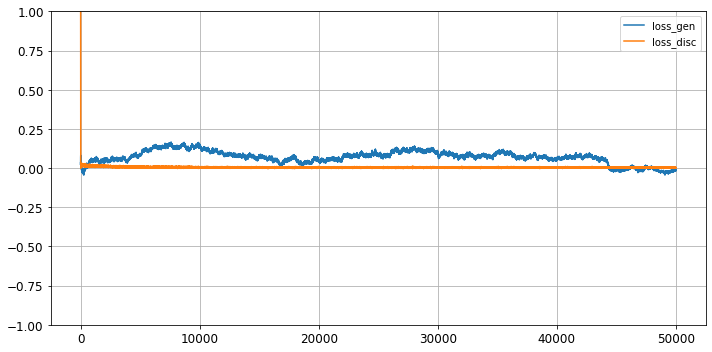

In [9]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-1,1])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [10]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### See the result of generator

Predicted Values: (1000, 3)
latent_space: 3
BATCH_SIZE: 100
use_bias: False
epochs: 50000
X-Y 2D slices:


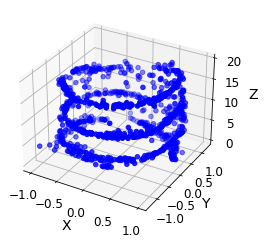

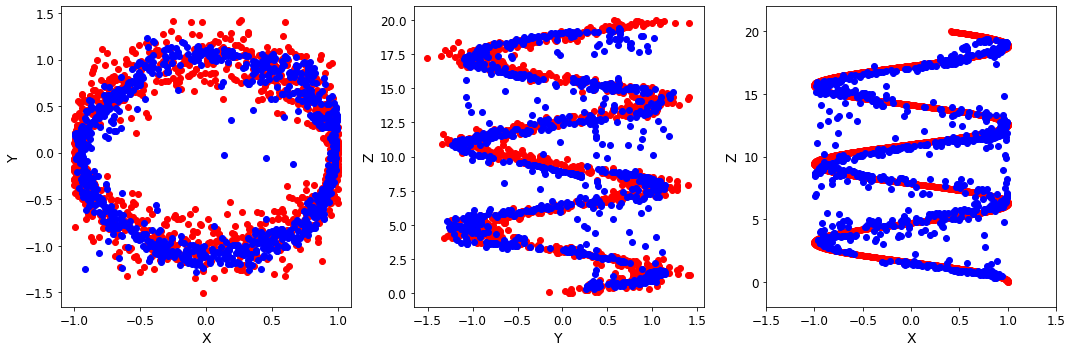

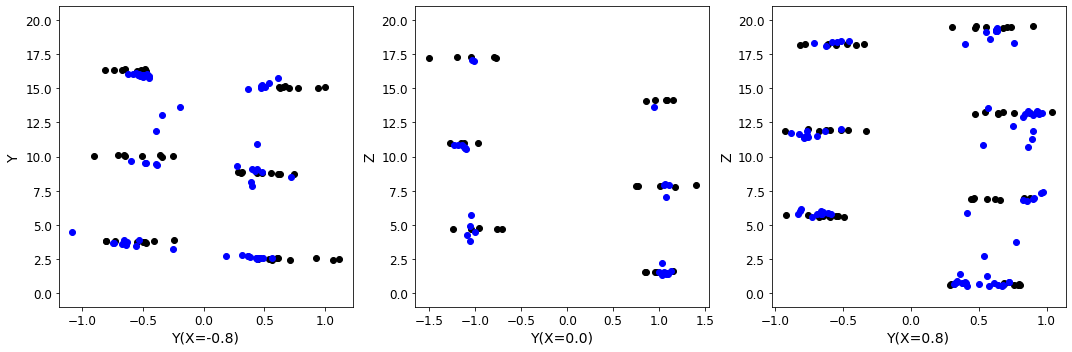

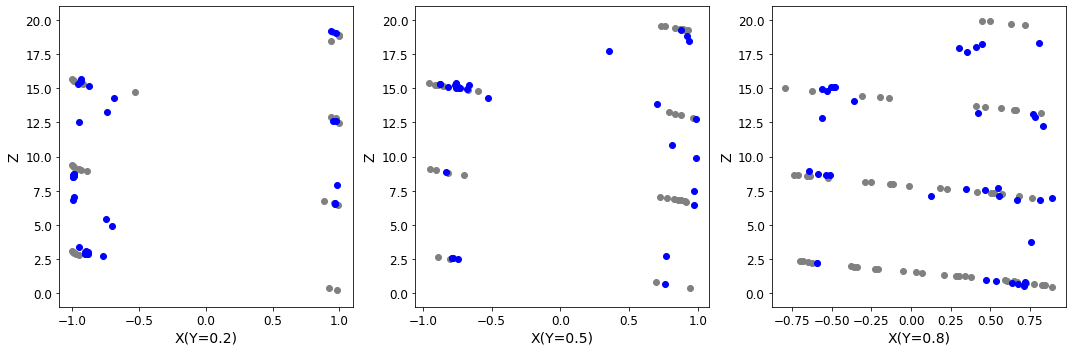

In [15]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='b')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train, c='gray')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

### Applying the prediction function

input_test : (400, 3)


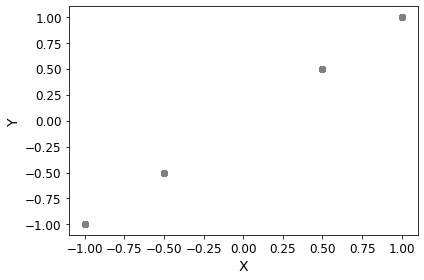

In [47]:
# define these for desired prediction
x_input = [-1,-0.5,0.5,1]
n_points = 400

# produces an input of fixed x coordinates with random y,z values
predict1 = np.full((n_points//4, n_features), x_input[0])
predict2 = np.full((n_points//4, n_features), x_input[1])
predict3 = np.full((n_points//4, n_features), x_input[2])
predict4 = np.full((n_points//4, n_features), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

input_test = predictthis.reshape(n_points, n_features).astype('float32')

print("input_test :",input_test.shape)

plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [44]:
X_generated = wgan.predict(input_test, scaler)

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

latent_space= 3
Epochs= 50000
BATCH_SIZE= 100
use_bias= False
X-Y 2D slices:


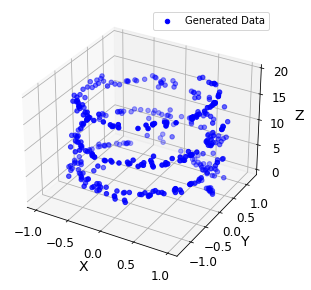

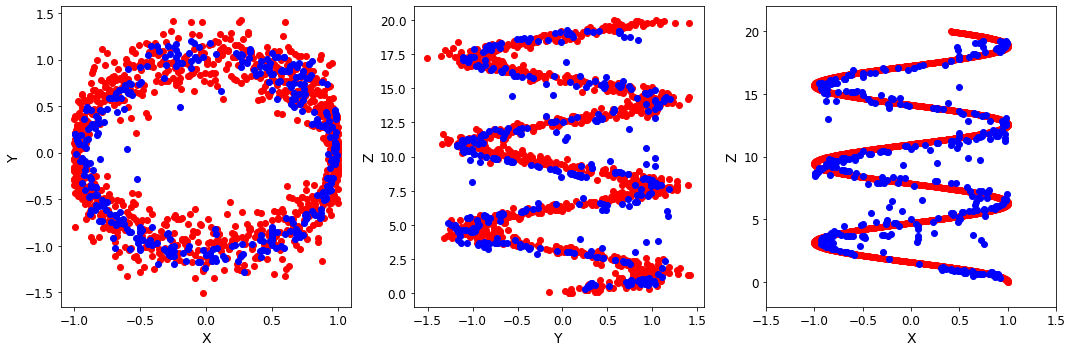

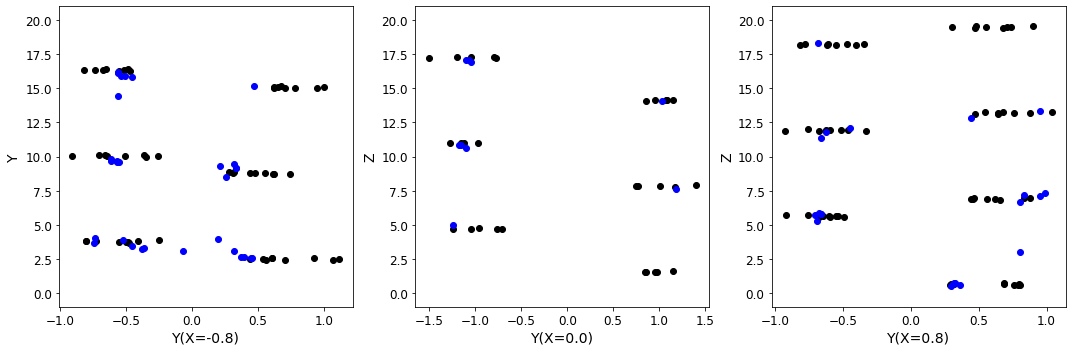

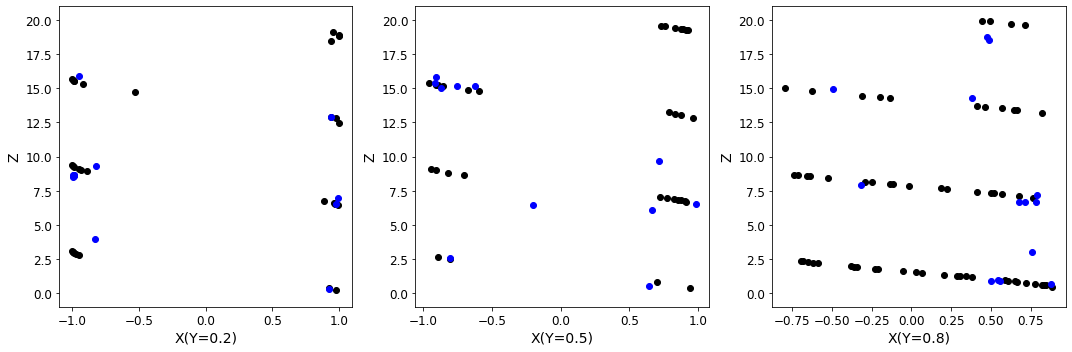

In [45]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(X_generated[:,0],X_generated[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(X_generated[:,1],X_generated[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(X_generated[:,0],X_generated[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='r',label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    